## Dataset

## Furniture Dataset from <a href="https://www.kaggle.com/datasets/rhtsingh/130k-images-512x512-universal-image-embeddings"> Kaggle</a>

In [1]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download rhtsingh/130k-images-512x512-universal-image-embeddings

100% 12.9G/12.9G [02:16<00:00, 135MB/s]
100% 12.9G/12.9G [02:16<00:00, 102MB/s]


In [9]:
!unzip /content/130k-images-512x512-universal-image-embeddings.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/storefronts/image2790.jpeg  
  inflating: /content/dataset/storefronts/image2791.jpeg  
  inflating: /content/dataset/storefronts/image2792.jpeg  
  inflating: /content/dataset/storefronts/image2793.jpeg  
  inflating: /content/dataset/storefronts/image2794.jpeg  
  inflating: /content/dataset/storefronts/image2795.jpeg  
  inflating: /content/dataset/storefronts/image2796.png  
  inflating: /content/dataset/storefronts/image2797.jpeg  
  inflating: /content/dataset/storefronts/image2798.jpeg  
  inflating: /content/dataset/storefronts/image2799.jpeg  
  inflating: /content/dataset/storefronts/image2800.jpeg  
  inflating: /content/dataset/storefronts/image2801.jpeg  
  inflating: /content/dataset/storefronts/image2802.jpeg  
  inflating: /content/dataset/storefronts/image2803.jpeg  
  inflating: /content/dataset/storefronts/image2804.jpeg  
  inflating: /content/dataset/storefronts/image2805.jpeg  
  infl

## Saved used images into my drive

In [10]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
import cv2
import random

count = 0

imgs = os.listdir("/content/dataset/furniture")
for img_path in imgs:
    img = cv2.imread("/content/dataset/furniture/"+img_path)
    img = cv2.resize(img,(224,224))
    #random_number = random.randint(1, 10)
    cv2.imwrite('/content/drive/MyDrive/Task3/{:05d}'.format(count)+".png", img)
    count+=1

In [24]:
len(os.listdir("/content/drive/MyDrive/Task3/"))

10488

## Create the Database Vector

In [21]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

In [17]:
model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [20]:

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3, 3, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [22]:
import cv2
import numpy as np
from numpy.linalg import norm

In [23]:
def extracted_features(img_path, model):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224,224))
  img = np.array(img)
  expand_img = np.expand_dims(img, axis=0)
  pre_img = preprocess_input(expand_img)
  result = model.predict(pre_img)
  normalized = result/norm(result)
  return normalized




In [25]:
filename = []
feature_list = []

for file in os.listdir("/content/drive/MyDrive/Task3/"):
  filename.append(os.path.join("/content/drive/MyDrive/Task3/", file))

filename[:5]

['/content/drive/MyDrive/Task3/00000.png',
 '/content/drive/MyDrive/Task3/00001.png',
 '/content/drive/MyDrive/Task3/00002.png',
 '/content/drive/MyDrive/Task3/00003.png',
 '/content/drive/MyDrive/Task3/00004.png']

In [26]:
len(filename)

10488

In [27]:
from tqdm import tqdm
for file in tqdm(filename):
  feature_list.append(extracted_features(file, model))

  0%|          | 0/10488 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


  0%|          | 1/10488 [00:04<14:17:05,  4.90s/it]

1/1 [==============================] - 0s 44ms/step


  0%|          | 2/10488 [00:05<6:18:59,  2.17s/it] 

1/1 [==============================] - 0s 35ms/step


  0%|          | 3/10488 [00:05<3:35:36,  1.23s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 5/10488 [00:05<1:42:01,  1.71it/s]

1/1 [==============================] - 0s 110ms/step


  0%|          | 7/10488 [00:05<1:10:46,  2.47it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 8/10488 [00:06<1:01:48,  2.83it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 9/10488 [00:06<51:32,  3.39it/s]  

1/1 [==============================] - 0s 39ms/step


  0%|          | 11/10488 [00:06<36:54,  4.73it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 12/10488 [00:06<33:36,  5.20it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 13/10488 [00:06<31:52,  5.48it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 14/10488 [00:06<29:34,  5.90it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 16/10488 [00:06<24:20,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 18/10488 [00:07<20:38,  8.45it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 20/10488 [00:07<19:19,  9.03it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 22/10488 [00:07<18:02,  9.66it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 24/10488 [00:07<17:09, 10.16it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 26/10488 [00:07<16:45, 10.40it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 28/10488 [00:08<16:17, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 30/10488 [00:08<15:40, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 32/10488 [00:08<15:41, 11.10it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 34/10488 [00:08<16:03, 10.85it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 36/10488 [00:08<15:44, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 38/10488 [00:08<15:43, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 40/10488 [00:09<15:54, 10.95it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 42/10488 [00:09<15:46, 11.04it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 44/10488 [00:09<15:33, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 46/10488 [00:09<15:58, 10.89it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 48/10488 [00:09<15:33, 11.18it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 50/10488 [00:09<15:31, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 52/10488 [00:10<15:15, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 54/10488 [00:10<15:27, 11.25it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 56/10488 [00:10<15:23, 11.29it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 58/10488 [00:10<17:01, 10.21it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 60/10488 [00:10<17:53,  9.71it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 61/10488 [00:11<18:10,  9.57it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 62/10488 [00:11<18:30,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 63/10488 [00:11<18:44,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 64/10488 [00:11<19:06,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 65/10488 [00:11<19:00,  9.14it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 66/10488 [00:11<19:27,  8.93it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 67/10488 [00:11<20:53,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 68/10488 [00:11<21:28,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 69/10488 [00:12<21:00,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 70/10488 [00:12<20:45,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 71/10488 [00:12<20:22,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 72/10488 [00:12<20:09,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 73/10488 [00:12<20:13,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 74/10488 [00:12<19:57,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 75/10488 [00:12<20:16,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 76/10488 [00:12<20:30,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 77/10488 [00:12<20:18,  8.55it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 78/10488 [00:13<21:15,  8.16it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 79/10488 [00:13<27:51,  6.23it/s]

1/1 [==============================] - 0s 145ms/step


  1%|          | 80/10488 [00:13<46:22,  3.74it/s]

1/1 [==============================] - 0s 190ms/step


  1%|          | 81/10488 [00:14<1:06:44,  2.60it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 82/10488 [00:14<1:06:14,  2.62it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 83/10488 [00:15<53:21,  3.25it/s]  

1/1 [==============================] - 0s 28ms/step


  1%|          | 84/10488 [00:15<43:37,  3.97it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 86/10488 [00:15<30:53,  5.61it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 88/10488 [00:15<24:24,  7.10it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 90/10488 [00:15<21:04,  8.22it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 92/10488 [00:15<19:20,  8.96it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 94/10488 [00:16<18:40,  9.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 96/10488 [00:16<17:35,  9.84it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 98/10488 [00:16<17:03, 10.16it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 100/10488 [00:16<16:03, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 102/10488 [00:16<15:31, 11.15it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 104/10488 [00:16<15:30, 11.16it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 106/10488 [00:17<15:16, 11.33it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 108/10488 [00:17<15:17, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 110/10488 [00:17<15:09, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 112/10488 [00:17<15:21, 11.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 114/10488 [00:17<15:16, 11.32it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 116/10488 [00:18<15:40, 11.02it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 118/10488 [00:18<15:26, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 120/10488 [00:18<15:45, 10.96it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 122/10488 [00:18<15:49, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 124/10488 [00:18<15:32, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 126/10488 [00:18<15:38, 11.04it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 128/10488 [00:19<15:02, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 130/10488 [00:19<14:55, 11.57it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 132/10488 [00:19<15:34, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 134/10488 [00:19<15:12, 11.35it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 136/10488 [00:19<15:16, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 138/10488 [00:19<15:08, 11.39it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 140/10488 [00:20<15:13, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 142/10488 [00:20<15:04, 11.44it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 144/10488 [00:20<14:37, 11.79it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 146/10488 [00:20<14:28, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 148/10488 [00:20<15:03, 11.45it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 150/10488 [00:21<16:01, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 152/10488 [00:21<15:42, 10.97it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 154/10488 [00:21<15:33, 11.07it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 156/10488 [00:21<15:04, 11.42it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 158/10488 [00:21<15:20, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 160/10488 [00:21<15:16, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 162/10488 [00:22<15:06, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 164/10488 [00:22<16:11, 10.62it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 166/10488 [00:22<15:49, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 168/10488 [00:22<15:39, 10.99it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 170/10488 [00:22<15:19, 11.22it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 172/10488 [00:23<15:35, 11.02it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 174/10488 [00:23<15:06, 11.38it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 176/10488 [00:23<14:52, 11.55it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 178/10488 [00:23<14:59, 11.46it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 180/10488 [00:23<14:45, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 182/10488 [00:23<14:35, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 184/10488 [00:24<15:03, 11.41it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 186/10488 [00:24<15:42, 10.93it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 188/10488 [00:24<15:33, 11.03it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 190/10488 [00:24<15:27, 11.10it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 192/10488 [00:24<15:52, 10.81it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 194/10488 [00:25<17:46,  9.65it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 195/10488 [00:25<18:14,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 196/10488 [00:25<18:37,  9.21it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 197/10488 [00:25<18:48,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 198/10488 [00:25<20:16,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 199/10488 [00:25<20:04,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 200/10488 [00:25<20:15,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 201/10488 [00:25<20:10,  8.50it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 202/10488 [00:26<23:16,  7.37it/s]

1/1 [==============================] - 0s 74ms/step


  2%|▏         | 203/10488 [00:26<33:53,  5.06it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 204/10488 [00:26<34:40,  4.94it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 205/10488 [00:26<30:16,  5.66it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 206/10488 [00:26<27:24,  6.25it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 207/10488 [00:27<29:44,  5.76it/s]

1/1 [==============================] - 0s 126ms/step


  2%|▏         | 208/10488 [00:27<42:33,  4.03it/s]

1/1 [==============================] - 0s 157ms/step


  2%|▏         | 209/10488 [00:27<49:08,  3.49it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 210/10488 [00:28<49:15,  3.48it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▏         | 211/10488 [00:28<48:14,  3.55it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 212/10488 [00:28<46:59,  3.64it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 213/10488 [00:28<45:02,  3.80it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 214/10488 [00:29<41:58,  4.08it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 215/10488 [00:29<36:24,  4.70it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 216/10488 [00:29<32:08,  5.33it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 218/10488 [00:29<24:07,  7.10it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 219/10488 [00:29<22:47,  7.51it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 220/10488 [00:29<22:57,  7.45it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 222/10488 [00:30<19:54,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 223/10488 [00:30<19:52,  8.61it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 225/10488 [00:30<17:59,  9.50it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 226/10488 [00:30<18:44,  9.13it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 227/10488 [00:30<20:48,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 228/10488 [00:30<21:35,  7.92it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 230/10488 [00:30<18:43,  9.13it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 232/10488 [00:31<17:50,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 233/10488 [00:31<19:05,  8.95it/s]

1/1 [==============================] - 0s 67ms/step


  2%|▏         | 234/10488 [00:31<22:12,  7.70it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 235/10488 [00:31<21:58,  7.77it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 237/10488 [00:31<18:53,  9.04it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 239/10488 [00:31<19:06,  8.94it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 240/10488 [00:32<20:54,  8.17it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 242/10488 [00:32<18:48,  9.08it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 244/10488 [00:32<17:43,  9.63it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 246/10488 [00:32<16:33, 10.31it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 248/10488 [00:32<16:04, 10.61it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 250/10488 [00:33<16:28, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 252/10488 [00:33<19:28,  8.76it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 254/10488 [00:33<18:27,  9.24it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 256/10488 [00:33<17:03, 10.00it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 258/10488 [00:33<17:11,  9.91it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 260/10488 [00:34<16:32, 10.30it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 262/10488 [00:34<19:34,  8.70it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 263/10488 [00:34<20:52,  8.17it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 265/10488 [00:34<18:56,  9.00it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 267/10488 [00:34<18:07,  9.40it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 269/10488 [00:35<17:21,  9.81it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 270/10488 [00:35<17:24,  9.78it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 272/10488 [00:35<16:23, 10.39it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 274/10488 [00:35<16:26, 10.35it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 276/10488 [00:35<15:56, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 278/10488 [00:35<15:46, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 280/10488 [00:36<15:29, 10.98it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 282/10488 [00:36<15:19, 11.10it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 284/10488 [00:36<15:26, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 286/10488 [00:36<15:05, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 288/10488 [00:36<15:06, 11.25it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 290/10488 [00:36<15:09, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 292/10488 [00:37<15:12, 11.18it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 294/10488 [00:37<15:22, 11.05it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 296/10488 [00:37<15:12, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 298/10488 [00:37<15:20, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 300/10488 [00:37<14:59, 11.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 302/10488 [00:38<14:59, 11.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 304/10488 [00:38<14:46, 11.49it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 306/10488 [00:38<14:45, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 308/10488 [00:38<14:46, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 310/10488 [00:38<15:04, 11.25it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 312/10488 [00:38<15:28, 10.95it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 314/10488 [00:39<16:13, 10.45it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 316/10488 [00:39<16:06, 10.53it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 318/10488 [00:39<18:16,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 319/10488 [00:39<18:31,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 320/10488 [00:39<19:07,  8.86it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 321/10488 [00:39<19:40,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 322/10488 [00:40<19:43,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 323/10488 [00:40<19:35,  8.65it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 324/10488 [00:40<30:23,  5.58it/s]

1/1 [==============================] - 0s 87ms/step


  3%|▎         | 325/10488 [00:40<39:20,  4.31it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 326/10488 [00:41<35:25,  4.78it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 327/10488 [00:41<34:35,  4.90it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 328/10488 [00:41<30:02,  5.64it/s]

1/1 [==============================] - 0s 86ms/step


  3%|▎         | 329/10488 [00:41<30:03,  5.63it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 330/10488 [00:41<27:46,  6.10it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 331/10488 [00:41<28:39,  5.91it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 332/10488 [00:42<40:48,  4.15it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 333/10488 [00:42<36:56,  4.58it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 334/10488 [00:42<32:27,  5.21it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 335/10488 [00:42<29:01,  5.83it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 336/10488 [00:42<26:54,  6.29it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 337/10488 [00:42<25:55,  6.53it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 338/10488 [00:43<24:43,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 339/10488 [00:43<24:06,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 340/10488 [00:43<23:25,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 341/10488 [00:43<22:38,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 342/10488 [00:43<22:03,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 343/10488 [00:43<20:38,  8.19it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 345/10488 [00:43<18:33,  9.11it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 347/10488 [00:44<16:55,  9.99it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 349/10488 [00:44<16:18, 10.36it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 351/10488 [00:44<18:15,  9.25it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 352/10488 [00:44<18:49,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 354/10488 [00:44<17:16,  9.78it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 356/10488 [00:44<16:30, 10.23it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 358/10488 [00:45<16:11, 10.43it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 360/10488 [00:45<15:37, 10.81it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 362/10488 [00:45<15:18, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 364/10488 [00:45<15:15, 11.05it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 366/10488 [00:45<17:43,  9.52it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 367/10488 [00:46<21:30,  7.84it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▎         | 368/10488 [00:46<23:10,  7.28it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▎         | 369/10488 [00:46<23:21,  7.22it/s]

1/1 [==============================] - 0s 81ms/step


  4%|▎         | 370/10488 [00:46<25:07,  6.71it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▎         | 371/10488 [00:46<24:50,  6.79it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 372/10488 [00:46<24:31,  6.87it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▎         | 373/10488 [00:47<30:48,  5.47it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▎         | 374/10488 [00:47<32:34,  5.17it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 375/10488 [00:47<28:08,  5.99it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 377/10488 [00:47<22:09,  7.61it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 379/10488 [00:47<19:13,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 380/10488 [00:48<18:58,  8.88it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 382/10488 [00:48<17:36,  9.56it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 384/10488 [00:48<16:42, 10.08it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 386/10488 [00:48<16:02, 10.49it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 388/10488 [00:48<16:08, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 390/10488 [00:48<15:47, 10.66it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 392/10488 [00:49<15:27, 10.89it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 394/10488 [00:49<15:50, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 396/10488 [00:49<15:35, 10.79it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 398/10488 [00:49<15:11, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 400/10488 [00:49<14:57, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 402/10488 [00:50<15:28, 10.86it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 404/10488 [00:50<15:09, 11.09it/s]

1/1 [==============================] - 0s 158ms/step


  4%|▍         | 406/10488 [00:50<25:56,  6.48it/s]

1/1 [==============================] - 0s 103ms/step


  4%|▍         | 407/10488 [00:51<30:30,  5.51it/s]

1/1 [==============================] - 0s 61ms/step


  4%|▍         | 408/10488 [00:51<34:57,  4.81it/s]

1/1 [==============================] - 0s 69ms/step


  4%|▍         | 409/10488 [00:51<34:49,  4.82it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▍         | 410/10488 [00:51<34:33,  4.86it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 411/10488 [00:52<35:31,  4.73it/s]

1/1 [==============================] - 0s 61ms/step


  4%|▍         | 412/10488 [00:52<34:10,  4.91it/s]

1/1 [==============================] - 0s 59ms/step


  4%|▍         | 413/10488 [00:52<34:19,  4.89it/s]

1/1 [==============================] - 0s 105ms/step


  4%|▍         | 414/10488 [00:52<40:25,  4.15it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▍         | 415/10488 [00:53<44:51,  3.74it/s]

1/1 [==============================] - 0s 63ms/step


  4%|▍         | 416/10488 [00:53<40:43,  4.12it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 417/10488 [00:53<35:53,  4.68it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 418/10488 [00:53<33:25,  5.02it/s]

1/1 [==============================] - 0s 166ms/step


  4%|▍         | 419/10488 [00:54<42:50,  3.92it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▍         | 420/10488 [00:54<1:01:43,  2.72it/s]

1/1 [==============================] - 0s 194ms/step


  4%|▍         | 421/10488 [00:55<1:19:08,  2.12it/s]

1/1 [==============================] - 0s 184ms/step


  4%|▍         | 422/10488 [00:55<1:20:50,  2.08it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 423/10488 [00:56<1:14:12,  2.26it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▍         | 424/10488 [00:56<1:04:38,  2.60it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 425/10488 [00:56<55:33,  3.02it/s]  

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 426/10488 [00:56<48:28,  3.46it/s]

1/1 [==============================] - 0s 69ms/step


  4%|▍         | 427/10488 [00:57<48:05,  3.49it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▍         | 428/10488 [00:57<45:41,  3.67it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 429/10488 [00:57<43:41,  3.84it/s]

1/1 [==============================] - 0s 84ms/step


  4%|▍         | 430/10488 [00:57<42:56,  3.90it/s]

1/1 [==============================] - 0s 121ms/step


  4%|▍         | 431/10488 [00:58<45:24,  3.69it/s]

1/1 [==============================] - 0s 68ms/step


  4%|▍         | 432/10488 [00:58<46:49,  3.58it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 434/10488 [00:58<32:07,  5.22it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 436/10488 [00:58<25:16,  6.63it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 438/10488 [00:59<21:31,  7.78it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 440/10488 [00:59<19:23,  8.64it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 442/10488 [00:59<18:01,  9.29it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 444/10488 [00:59<17:01,  9.83it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 446/10488 [00:59<16:29, 10.15it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 448/10488 [00:59<16:07, 10.38it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 450/10488 [01:00<15:51, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 452/10488 [01:00<16:23, 10.20it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 454/10488 [01:00<16:16, 10.28it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 456/10488 [01:00<15:58, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 458/10488 [01:00<15:55, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 460/10488 [01:01<15:46, 10.59it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 462/10488 [01:01<15:36, 10.71it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 464/10488 [01:01<15:24, 10.85it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 466/10488 [01:01<15:20, 10.89it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 468/10488 [01:01<15:00, 11.13it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 470/10488 [01:01<14:58, 11.15it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 472/10488 [01:02<14:56, 11.17it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 474/10488 [01:02<14:50, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 476/10488 [01:02<15:13, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 478/10488 [01:02<14:57, 11.15it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 480/10488 [01:02<14:56, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 482/10488 [01:03<15:17, 10.90it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 484/10488 [01:03<15:13, 10.96it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 486/10488 [01:03<15:07, 11.02it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 488/10488 [01:03<17:26,  9.56it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 490/10488 [01:03<16:27, 10.13it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 492/10488 [01:04<15:56, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 494/10488 [01:04<15:48, 10.54it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 496/10488 [01:04<15:33, 10.70it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 498/10488 [01:04<16:09, 10.30it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 500/10488 [01:04<16:07, 10.33it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 502/10488 [01:04<15:42, 10.59it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 504/10488 [01:05<15:26, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 506/10488 [01:05<15:28, 10.75it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 508/10488 [01:05<14:54, 11.16it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 510/10488 [01:05<14:59, 11.10it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 512/10488 [01:05<14:52, 11.18it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 514/10488 [01:06<14:58, 11.10it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 516/10488 [01:06<14:37, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 518/10488 [01:06<15:00, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 520/10488 [01:06<14:57, 11.10it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 522/10488 [01:06<14:56, 11.11it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 524/10488 [01:06<15:14, 10.89it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 526/10488 [01:07<15:00, 11.07it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 528/10488 [01:07<14:52, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 530/10488 [01:07<14:53, 11.14it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 532/10488 [01:07<14:54, 11.14it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 534/10488 [01:07<14:52, 11.16it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 536/10488 [01:08<16:51,  9.84it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 538/10488 [01:08<17:25,  9.52it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 540/10488 [01:08<16:34, 10.00it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 542/10488 [01:08<18:03,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 543/10488 [01:08<18:18,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▌         | 544/10488 [01:09<22:00,  7.53it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 545/10488 [01:09<24:12,  6.85it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 546/10488 [01:09<23:30,  7.05it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 547/10488 [01:09<23:35,  7.02it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 548/10488 [01:09<22:54,  7.23it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 549/10488 [01:09<23:00,  7.20it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 550/10488 [01:09<23:42,  6.99it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 551/10488 [01:10<22:58,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 552/10488 [01:10<22:18,  7.42it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 553/10488 [01:10<22:05,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 554/10488 [01:10<21:09,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 555/10488 [01:10<20:37,  8.02it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 556/10488 [01:10<21:17,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 557/10488 [01:10<21:08,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 558/10488 [01:10<20:33,  8.05it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 559/10488 [01:11<22:05,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 560/10488 [01:11<21:14,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 561/10488 [01:11<21:09,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 562/10488 [01:11<21:12,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 563/10488 [01:11<20:55,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 564/10488 [01:11<21:11,  7.81it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 565/10488 [01:11<22:14,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 566/10488 [01:12<21:59,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 567/10488 [01:12<21:56,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 568/10488 [01:12<21:31,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 569/10488 [01:12<21:46,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 570/10488 [01:12<21:13,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 571/10488 [01:12<20:49,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 572/10488 [01:12<20:49,  7.93it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 573/10488 [01:12<19:41,  8.40it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 574/10488 [01:13<19:15,  8.58it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 576/10488 [01:13<17:03,  9.69it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 578/10488 [01:13<16:09, 10.23it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 580/10488 [01:13<15:31, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 582/10488 [01:13<14:54, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 584/10488 [01:13<15:08, 10.91it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 586/10488 [01:14<15:15, 10.82it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 588/10488 [01:14<15:26, 10.69it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 590/10488 [01:14<14:58, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 592/10488 [01:14<15:05, 10.92it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 594/10488 [01:14<16:35,  9.93it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 596/10488 [01:15<19:08,  8.61it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 597/10488 [01:15<19:27,  8.47it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 599/10488 [01:15<17:40,  9.32it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 601/10488 [01:15<16:50,  9.79it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 602/10488 [01:15<17:12,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 603/10488 [01:15<17:10,  9.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 605/10488 [01:16<16:37,  9.90it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 607/10488 [01:16<15:23, 10.70it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 609/10488 [01:16<15:17, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 611/10488 [01:16<15:14, 10.80it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 613/10488 [01:16<15:27, 10.65it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 615/10488 [01:16<15:11, 10.83it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 617/10488 [01:17<19:29,  8.44it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 618/10488 [01:17<20:43,  7.93it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 619/10488 [01:17<22:16,  7.38it/s]

1/1 [==============================] - 0s 112ms/step


  6%|▌         | 620/10488 [01:17<27:34,  5.96it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 621/10488 [01:18<27:18,  6.02it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 622/10488 [01:18<26:21,  6.24it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 623/10488 [01:18<23:41,  6.94it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 625/10488 [01:18<19:43,  8.34it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 627/10488 [01:18<17:33,  9.36it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 628/10488 [01:18<17:27,  9.42it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 630/10488 [01:18<16:19, 10.07it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 632/10488 [01:19<19:33,  8.40it/s]

1/1 [==============================] - 0s 74ms/step


  6%|▌         | 633/10488 [01:19<23:04,  7.12it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 634/10488 [01:19<21:38,  7.59it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 636/10488 [01:19<18:39,  8.80it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 637/10488 [01:19<18:27,  8.90it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 639/10488 [01:20<18:04,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 640/10488 [01:20<20:45,  7.91it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 641/10488 [01:20<22:28,  7.30it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 643/10488 [01:20<19:14,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 645/10488 [01:20<18:14,  8.99it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 646/10488 [01:21<20:00,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 647/10488 [01:21<22:25,  7.31it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 648/10488 [01:21<21:44,  7.55it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 650/10488 [01:21<18:57,  8.65it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 652/10488 [01:21<17:29,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 654/10488 [01:21<16:42,  9.81it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 655/10488 [01:21<16:40,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 656/10488 [01:22<18:56,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▋         | 657/10488 [01:22<21:55,  7.47it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 658/10488 [01:22<22:14,  7.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 660/10488 [01:22<18:44,  8.74it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 662/10488 [01:22<16:58,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 663/10488 [01:22<17:21,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 664/10488 [01:23<18:35,  8.81it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 665/10488 [01:23<18:51,  8.68it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 666/10488 [01:23<19:59,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 667/10488 [01:23<21:15,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 668/10488 [01:23<21:17,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 669/10488 [01:23<20:39,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 670/10488 [01:23<20:38,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 671/10488 [01:23<20:31,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 672/10488 [01:24<20:07,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▋         | 673/10488 [01:24<21:28,  7.62it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 674/10488 [01:24<22:15,  7.35it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 675/10488 [01:24<21:34,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 676/10488 [01:24<21:38,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 677/10488 [01:24<20:55,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 678/10488 [01:24<21:26,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 679/10488 [01:25<21:22,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 680/10488 [01:25<21:16,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 681/10488 [01:25<20:56,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 682/10488 [01:25<25:26,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 683/10488 [01:25<24:52,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 684/10488 [01:25<23:34,  6.93it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 685/10488 [01:25<22:01,  7.42it/s]

1/1 [==============================] - 0s 60ms/step


  7%|▋         | 686/10488 [01:26<23:00,  7.10it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 687/10488 [01:26<22:30,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 688/10488 [01:26<21:43,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 689/10488 [01:26<21:12,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 690/10488 [01:26<20:57,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 691/10488 [01:26<20:43,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 692/10488 [01:26<20:59,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 693/10488 [01:26<21:07,  7.73it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 694/10488 [01:27<21:26,  7.61it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 695/10488 [01:27<21:55,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 696/10488 [01:27<21:05,  7.74it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 698/10488 [01:27<18:12,  8.96it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 700/10488 [01:27<16:48,  9.70it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 702/10488 [01:27<16:07, 10.11it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 704/10488 [01:28<16:55,  9.64it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 705/10488 [01:28<16:53,  9.66it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 706/10488 [01:28<17:21,  9.39it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 707/10488 [01:28<19:20,  8.43it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 708/10488 [01:28<21:12,  7.68it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 709/10488 [01:28<19:57,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 710/10488 [01:28<19:29,  8.36it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 711/10488 [01:29<37:34,  4.34it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 713/10488 [01:29<27:24,  5.94it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 714/10488 [01:29<25:37,  6.36it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 716/10488 [01:29<21:06,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 717/10488 [01:29<20:34,  7.91it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 718/10488 [01:30<19:33,  8.32it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 720/10488 [01:30<19:04,  8.54it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 722/10488 [01:30<17:38,  9.22it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 723/10488 [01:30<17:54,  9.08it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 724/10488 [01:30<18:37,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 725/10488 [01:30<19:20,  8.41it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 726/10488 [01:30<20:52,  7.79it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 728/10488 [01:31<18:26,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 729/10488 [01:31<19:02,  8.55it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 730/10488 [01:31<19:48,  8.21it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 732/10488 [01:31<18:26,  8.82it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 733/10488 [01:31<19:22,  8.39it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 735/10488 [01:31<17:25,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 736/10488 [01:32<19:06,  8.51it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 737/10488 [01:32<18:25,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 739/10488 [01:32<18:38,  8.72it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 740/10488 [01:32<19:52,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 741/10488 [01:32<22:22,  7.26it/s]

1/1 [==============================] - 0s 83ms/step


  7%|▋         | 742/10488 [01:33<29:38,  5.48it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 743/10488 [01:33<30:24,  5.34it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 744/10488 [01:33<28:29,  5.70it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 745/10488 [01:33<26:21,  6.16it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 746/10488 [01:33<23:40,  6.86it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 748/10488 [01:33<19:55,  8.15it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 750/10488 [01:34<17:58,  9.03it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 752/10488 [01:34<16:49,  9.64it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 754/10488 [01:34<18:25,  8.81it/s]

1/1 [==============================] - 0s 83ms/step


  7%|▋         | 755/10488 [01:34<23:13,  6.99it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 756/10488 [01:35<30:58,  5.24it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 757/10488 [01:35<29:04,  5.58it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 759/10488 [01:35<23:12,  6.99it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 761/10488 [01:35<19:54,  8.15it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 763/10488 [01:35<18:13,  8.90it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 764/10488 [01:35<18:32,  8.74it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 765/10488 [01:36<18:07,  8.94it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 766/10488 [01:36<18:20,  8.84it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 767/10488 [01:36<20:13,  8.01it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 768/10488 [01:36<20:49,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 770/10488 [01:36<18:35,  8.71it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 771/10488 [01:36<18:33,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 773/10488 [01:36<17:31,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 774/10488 [01:37<18:37,  8.69it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 775/10488 [01:37<20:54,  7.74it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 776/10488 [01:37<23:52,  6.78it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 777/10488 [01:37<22:46,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 778/10488 [01:37<22:09,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 779/10488 [01:37<21:13,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 780/10488 [01:37<22:13,  7.28it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 781/10488 [01:38<22:37,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 782/10488 [01:38<22:21,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 783/10488 [01:38<21:31,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 784/10488 [01:38<20:47,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 785/10488 [01:38<20:19,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 786/10488 [01:38<20:54,  7.73it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 787/10488 [01:38<21:53,  7.39it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 788/10488 [01:39<22:07,  7.31it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 789/10488 [01:39<21:17,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 790/10488 [01:39<21:14,  7.61it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 791/10488 [01:39<22:08,  7.30it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 792/10488 [01:39<22:12,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 793/10488 [01:39<22:03,  7.32it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 794/10488 [01:39<21:43,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 795/10488 [01:39<21:31,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 796/10488 [01:40<21:29,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 797/10488 [01:40<20:50,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 798/10488 [01:40<20:59,  7.69it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 799/10488 [01:40<20:56,  7.71it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 800/10488 [01:40<21:00,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 801/10488 [01:40<21:15,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 802/10488 [01:40<21:28,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 803/10488 [01:41<21:22,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 804/10488 [01:41<21:06,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 805/10488 [01:41<21:59,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 806/10488 [01:41<21:41,  7.44it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 807/10488 [01:41<21:10,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 808/10488 [01:41<20:59,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 809/10488 [01:41<20:48,  7.75it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 810/10488 [01:41<19:48,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 812/10488 [01:42<18:24,  8.76it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 814/10488 [01:42<16:57,  9.50it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 816/10488 [01:42<15:45, 10.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 818/10488 [01:42<14:55, 10.80it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 820/10488 [01:42<15:05, 10.68it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 822/10488 [01:43<14:49, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 824/10488 [01:43<14:45, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 826/10488 [01:43<15:06, 10.66it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 828/10488 [01:43<15:01, 10.72it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 830/10488 [01:43<14:46, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 832/10488 [01:43<14:38, 10.99it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 834/10488 [01:44<14:32, 11.06it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 836/10488 [01:44<14:51, 10.83it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 838/10488 [01:44<14:59, 10.73it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 840/10488 [01:44<14:50, 10.83it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 842/10488 [01:44<14:31, 11.07it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 844/10488 [01:45<14:46, 10.88it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 846/10488 [01:45<15:22, 10.45it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 848/10488 [01:45<15:29, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 850/10488 [01:45<15:03, 10.67it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 852/10488 [01:45<16:13,  9.90it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 854/10488 [01:46<21:01,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 855/10488 [01:46<23:11,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 856/10488 [01:46<22:56,  7.00it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 857/10488 [01:46<22:44,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 858/10488 [01:46<22:39,  7.09it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 859/10488 [01:47<26:45,  6.00it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 860/10488 [01:47<28:17,  5.67it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 861/10488 [01:47<26:24,  6.08it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 863/10488 [01:47<21:38,  7.41it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 864/10488 [01:47<23:16,  6.89it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 865/10488 [01:48<24:38,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 866/10488 [01:48<24:07,  6.65it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 868/10488 [01:48<20:15,  7.92it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 870/10488 [01:48<18:02,  8.88it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 872/10488 [01:48<16:37,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 873/10488 [01:48<16:49,  9.53it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 875/10488 [01:49<16:22,  9.78it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 877/10488 [01:49<15:39, 10.23it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 879/10488 [01:49<15:29, 10.34it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 881/10488 [01:49<14:51, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 883/10488 [01:49<14:57, 10.71it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 885/10488 [01:49<14:35, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 887/10488 [01:50<14:47, 10.82it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 889/10488 [01:50<14:32, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 891/10488 [01:50<14:47, 10.81it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 893/10488 [01:50<14:29, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 895/10488 [01:50<14:34, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 897/10488 [01:50<14:31, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 899/10488 [01:51<14:32, 11.00it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 901/10488 [01:51<14:43, 10.85it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 903/10488 [01:51<14:41, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 905/10488 [01:51<15:00, 10.64it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 907/10488 [01:51<16:03,  9.95it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 909/10488 [01:52<17:25,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 910/10488 [01:52<17:51,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 911/10488 [01:52<18:34,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 912/10488 [01:52<18:34,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 913/10488 [01:52<18:48,  8.49it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▊         | 914/10488 [01:52<22:52,  6.97it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▊         | 915/10488 [01:53<24:31,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 916/10488 [01:53<23:37,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 917/10488 [01:53<22:55,  6.96it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 918/10488 [01:53<23:27,  6.80it/s]

1/1 [==============================] - 0s 103ms/step


  9%|▉         | 919/10488 [01:53<29:37,  5.38it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 920/10488 [01:54<37:06,  4.30it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 921/10488 [01:54<33:00,  4.83it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 922/10488 [01:54<28:48,  5.54it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 923/10488 [01:54<26:26,  6.03it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 924/10488 [01:54<24:03,  6.63it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 925/10488 [01:54<22:15,  7.16it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 926/10488 [01:54<21:41,  7.35it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 927/10488 [01:55<21:35,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 928/10488 [01:55<21:41,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 929/10488 [01:55<21:26,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 930/10488 [01:55<21:07,  7.54it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 931/10488 [01:55<21:44,  7.32it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 932/10488 [01:55<21:34,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 933/10488 [01:55<21:45,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 934/10488 [01:56<21:42,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 935/10488 [01:56<21:35,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 936/10488 [01:56<20:47,  7.66it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 937/10488 [01:56<21:16,  7.48it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 938/10488 [01:56<20:06,  7.92it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 940/10488 [01:56<17:43,  8.98it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 942/10488 [01:56<16:20,  9.73it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 943/10488 [01:57<17:01,  9.35it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 945/10488 [01:57<15:50, 10.04it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 947/10488 [01:57<15:27, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 949/10488 [01:57<15:26, 10.30it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 951/10488 [01:57<15:01, 10.58it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 953/10488 [01:57<15:05, 10.53it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 955/10488 [01:58<14:57, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 957/10488 [01:58<15:02, 10.57it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 959/10488 [01:58<16:05,  9.87it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 960/10488 [01:58<18:02,  8.80it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 961/10488 [01:58<18:18,  8.67it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 963/10488 [01:59<17:13,  9.21it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 964/10488 [01:59<17:02,  9.32it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 966/10488 [01:59<16:09,  9.82it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 968/10488 [01:59<15:17, 10.38it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 970/10488 [01:59<14:49, 10.70it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 972/10488 [01:59<15:33, 10.20it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 974/10488 [02:00<16:30,  9.61it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 976/10488 [02:00<16:20,  9.70it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 977/10488 [02:00<18:03,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 978/10488 [02:00<19:26,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 979/10488 [02:00<18:56,  8.36it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 980/10488 [02:00<18:12,  8.70it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 981/10488 [02:00<18:12,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 983/10488 [02:01<18:04,  8.77it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 984/10488 [02:01<19:44,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 985/10488 [02:01<22:14,  7.12it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 987/10488 [02:01<18:53,  8.38it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 989/10488 [02:01<17:40,  8.96it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 991/10488 [02:02<16:36,  9.53it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 992/10488 [02:02<16:27,  9.62it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 994/10488 [02:02<15:48, 10.01it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 996/10488 [02:02<15:30, 10.21it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 998/10488 [02:02<15:11, 10.41it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1000/10488 [02:02<15:16, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 10%|▉         | 1002/10488 [02:03<17:44,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


 10%|▉         | 1003/10488 [02:03<17:57,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 1004/10488 [02:03<19:06,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 1006/10488 [02:03<17:37,  8.96it/s]

1/1 [==============================] - 0s 65ms/step


 10%|▉         | 1007/10488 [02:03<19:19,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 1008/10488 [02:04<20:04,  7.87it/s]

1/1 [==============================] - 0s 42ms/step


 10%|▉         | 1009/10488 [02:04<22:01,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 10%|▉         | 1010/10488 [02:04<22:11,  7.12it/s]

1/1 [==============================] - 0s 50ms/step


 10%|▉         | 1011/10488 [02:04<22:37,  6.98it/s]

1/1 [==============================] - 0s 72ms/step


 10%|▉         | 1012/10488 [02:04<25:15,  6.25it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 1013/10488 [02:04<26:43,  5.91it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1014/10488 [02:04<24:35,  6.42it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1016/10488 [02:05<19:56,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1018/10488 [02:05<18:06,  8.71it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1020/10488 [02:05<17:34,  8.98it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1022/10488 [02:05<16:34,  9.52it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 1023/10488 [02:05<16:46,  9.40it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1024/10488 [02:05<16:52,  9.35it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 1025/10488 [02:06<16:48,  9.39it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1027/10488 [02:06<15:49,  9.97it/s]

1/1 [==============================] - 0s 31ms/step


 10%|▉         | 1029/10488 [02:06<15:29, 10.17it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 1031/10488 [02:06<17:42,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 1032/10488 [02:06<18:12,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 1033/10488 [02:07<18:44,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 1034/10488 [02:07<19:27,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 10%|▉         | 1035/10488 [02:07<20:02,  7.86it/s]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 1036/10488 [02:07<20:31,  7.67it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 1037/10488 [02:07<21:04,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 1038/10488 [02:07<21:31,  7.32it/s]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 1039/10488 [02:07<21:38,  7.28it/s]

1/1 [==============================] - 0s 83ms/step


 10%|▉         | 1040/10488 [02:08<27:59,  5.62it/s]

1/1 [==============================] - 0s 71ms/step


 10%|▉         | 1041/10488 [02:08<30:32,  5.15it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 1042/10488 [02:08<30:38,  5.14it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 1043/10488 [02:08<27:19,  5.76it/s]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 1044/10488 [02:08<25:55,  6.07it/s]

1/1 [==============================] - 0s 96ms/step


 10%|▉         | 1045/10488 [02:09<31:35,  4.98it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 1046/10488 [02:09<32:37,  4.82it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 1047/10488 [02:09<28:48,  5.46it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 1048/10488 [02:09<27:22,  5.75it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 1049/10488 [02:09<25:43,  6.11it/s]

1/1 [==============================] - 0s 54ms/step


 10%|█         | 1050/10488 [02:09<26:14,  5.99it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 1051/10488 [02:10<25:45,  6.11it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 1052/10488 [02:10<25:18,  6.21it/s]

1/1 [==============================] - 0s 41ms/step


 10%|█         | 1053/10488 [02:10<25:11,  6.24it/s]

1/1 [==============================] - 0s 40ms/step


 10%|█         | 1054/10488 [02:10<24:54,  6.31it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 1055/10488 [02:10<25:05,  6.27it/s]

1/1 [==============================] - 0s 113ms/step


 10%|█         | 1056/10488 [02:10<30:10,  5.21it/s]

1/1 [==============================] - 0s 82ms/step


 10%|█         | 1057/10488 [02:11<33:08,  4.74it/s]

1/1 [==============================] - 0s 37ms/step


 10%|█         | 1058/10488 [02:11<30:10,  5.21it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1059/10488 [02:11<26:11,  6.00it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1061/10488 [02:11<20:55,  7.51it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1063/10488 [02:11<18:29,  8.49it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1064/10488 [02:11<17:59,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1066/10488 [02:12<16:44,  9.38it/s]

1/1 [==============================] - 0s 31ms/step


 10%|█         | 1067/10488 [02:12<16:32,  9.49it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1069/10488 [02:12<15:52,  9.89it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1071/10488 [02:12<15:24, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1073/10488 [02:12<15:17, 10.26it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1075/10488 [02:13<15:27, 10.15it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1077/10488 [02:13<15:44,  9.96it/s]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 1078/10488 [02:13<16:46,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 1079/10488 [02:13<18:45,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 1080/10488 [02:13<21:58,  7.14it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1081/10488 [02:13<20:48,  7.53it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1082/10488 [02:13<19:28,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1084/10488 [02:14<17:41,  8.86it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1085/10488 [02:14<17:28,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1087/10488 [02:14<16:26,  9.53it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1089/10488 [02:14<16:16,  9.63it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1091/10488 [02:14<15:56,  9.82it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1092/10488 [02:14<15:54,  9.84it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 1093/10488 [02:15<17:13,  9.09it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1094/10488 [02:15<17:31,  8.93it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1096/10488 [02:15<16:18,  9.60it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1098/10488 [02:15<15:57,  9.81it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1100/10488 [02:15<15:43,  9.95it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1102/10488 [02:15<15:10, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1104/10488 [02:16<15:08, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1106/10488 [02:16<15:05, 10.36it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1108/10488 [02:16<15:24, 10.15it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1110/10488 [02:16<15:31, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1112/10488 [02:16<15:17, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1114/10488 [02:17<14:54, 10.48it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1116/10488 [02:17<14:44, 10.60it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1118/10488 [02:17<15:05, 10.35it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1120/10488 [02:17<14:42, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1122/10488 [02:17<14:53, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1124/10488 [02:18<14:46, 10.56it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1126/10488 [02:18<14:56, 10.45it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1128/10488 [02:18<15:29, 10.07it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1130/10488 [02:18<15:14, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 1132/10488 [02:18<15:29, 10.07it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1134/10488 [02:19<15:14, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1136/10488 [02:19<15:29, 10.06it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1138/10488 [02:19<15:54,  9.79it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1139/10488 [02:19<16:06,  9.67it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 1140/10488 [02:19<18:59,  8.20it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1142/10488 [02:19<17:15,  9.03it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1143/10488 [02:20<17:37,  8.84it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1145/10488 [02:20<16:22,  9.51it/s]

1/1 [==============================] - 0s 50ms/step


 11%|█         | 1146/10488 [02:20<17:57,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 1147/10488 [02:20<20:59,  7.42it/s]

1/1 [==============================] - 0s 110ms/step


 11%|█         | 1148/10488 [02:20<26:37,  5.85it/s]

1/1 [==============================] - 0s 62ms/step


 11%|█         | 1149/10488 [02:21<28:44,  5.41it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1150/10488 [02:21<25:17,  6.15it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1152/10488 [02:21<20:26,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 1153/10488 [02:21<20:56,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 1154/10488 [02:21<21:31,  7.23it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1155/10488 [02:21<21:23,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 1156/10488 [02:21<21:47,  7.14it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1157/10488 [02:22<21:25,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1158/10488 [02:22<20:20,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 1159/10488 [02:22<20:18,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 1160/10488 [02:22<20:02,  7.76it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 1161/10488 [02:22<20:32,  7.57it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1162/10488 [02:22<20:27,  7.60it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 1163/10488 [02:22<22:02,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1164/10488 [02:23<22:18,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 1165/10488 [02:23<22:32,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 1166/10488 [02:23<21:41,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1167/10488 [02:23<21:51,  7.11it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 1168/10488 [02:23<21:48,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1169/10488 [02:23<22:07,  7.02it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1170/10488 [02:23<21:34,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1171/10488 [02:24<20:50,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1172/10488 [02:24<20:49,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1173/10488 [02:24<22:37,  6.86it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1174/10488 [02:24<22:02,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 1175/10488 [02:24<22:26,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 1176/10488 [02:24<21:39,  7.17it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 1177/10488 [02:24<22:17,  6.96it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1178/10488 [02:25<21:37,  7.18it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 1179/10488 [02:25<21:27,  7.23it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 1180/10488 [02:25<21:02,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█▏        | 1181/10488 [02:25<21:43,  7.14it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█▏        | 1182/10488 [02:25<21:51,  7.10it/s]

1/1 [==============================] - 0s 54ms/step


 11%|█▏        | 1183/10488 [02:25<23:04,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█▏        | 1184/10488 [02:25<23:16,  6.66it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█▏        | 1185/10488 [02:26<23:46,  6.52it/s]

1/1 [==============================] - 0s 75ms/step


 11%|█▏        | 1186/10488 [02:26<26:09,  5.93it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1187/10488 [02:26<26:31,  5.84it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1189/10488 [02:26<21:02,  7.37it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1191/10488 [02:26<18:57,  8.17it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 1192/10488 [02:26<18:36,  8.32it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1194/10488 [02:27<17:05,  9.06it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1196/10488 [02:27<15:59,  9.69it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1198/10488 [02:27<15:37,  9.90it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1200/10488 [02:27<15:11, 10.19it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1202/10488 [02:27<16:01,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 1204/10488 [02:28<15:44,  9.83it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1206/10488 [02:28<15:29,  9.99it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1208/10488 [02:28<15:22, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1210/10488 [02:28<15:18, 10.11it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 1212/10488 [02:28<16:13,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1214/10488 [02:29<15:44,  9.82it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1216/10488 [02:29<15:26, 10.01it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1218/10488 [02:29<15:02, 10.28it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 1220/10488 [02:30<22:49,  6.77it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1222/10488 [02:30<20:32,  7.52it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1223/10488 [02:30<19:39,  7.86it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1225/10488 [02:30<17:48,  8.67it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1227/10488 [02:30<16:49,  9.17it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1228/10488 [02:30<16:43,  9.23it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1230/10488 [02:31<16:02,  9.61it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1232/10488 [02:31<15:33,  9.92it/s]

1/1 [==============================] - 0s 74ms/step


 12%|█▏        | 1234/10488 [02:31<19:00,  8.12it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1235/10488 [02:31<23:17,  6.62it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 1236/10488 [02:32<27:48,  5.54it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1237/10488 [02:32<25:02,  6.16it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1239/10488 [02:32<20:29,  7.52it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1241/10488 [02:32<18:22,  8.39it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1243/10488 [02:32<17:00,  9.06it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1244/10488 [02:32<16:48,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 1246/10488 [02:33<16:21,  9.42it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1248/10488 [02:33<15:52,  9.70it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1250/10488 [02:33<15:19, 10.05it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1252/10488 [02:33<15:19, 10.05it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1254/10488 [02:33<15:03, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1256/10488 [02:34<15:00, 10.25it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1258/10488 [02:34<14:52, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1260/10488 [02:34<14:43, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1262/10488 [02:34<14:38, 10.50it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1264/10488 [02:34<14:54, 10.32it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1266/10488 [02:35<15:16, 10.06it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1268/10488 [02:35<15:20, 10.02it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1270/10488 [02:35<14:49, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1272/10488 [02:35<14:45, 10.41it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1274/10488 [02:35<14:45, 10.41it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1276/10488 [02:35<14:46, 10.39it/s]

1/1 [==============================] - 0s 116ms/step


 12%|█▏        | 1278/10488 [02:36<21:17,  7.21it/s]

1/1 [==============================] - 0s 264ms/step


 12%|█▏        | 1279/10488 [02:37<34:21,  4.47it/s]

1/1 [==============================] - 0s 132ms/step


 12%|█▏        | 1280/10488 [02:37<47:50,  3.21it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1281/10488 [02:37<44:48,  3.42it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1282/10488 [02:38<38:51,  3.95it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1283/10488 [02:38<34:45,  4.41it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1284/10488 [02:38<31:13,  4.91it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1285/10488 [02:38<27:31,  5.57it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1286/10488 [02:38<24:41,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1287/10488 [02:38<22:53,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1288/10488 [02:38<22:13,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1289/10488 [02:38<21:06,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1290/10488 [02:39<20:30,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1291/10488 [02:39<20:05,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1292/10488 [02:39<20:43,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1293/10488 [02:39<20:03,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1294/10488 [02:39<19:24,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1295/10488 [02:39<19:50,  7.72it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 1296/10488 [02:39<20:54,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1297/10488 [02:40<20:44,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1298/10488 [02:40<21:29,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 1299/10488 [02:40<21:38,  7.08it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1300/10488 [02:40<21:40,  7.07it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1301/10488 [02:40<22:15,  6.88it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1302/10488 [02:40<22:23,  6.84it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1303/10488 [02:40<24:12,  6.33it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1304/10488 [02:41<23:28,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1305/10488 [02:41<22:46,  6.72it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1306/10488 [02:41<21:53,  6.99it/s]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 1307/10488 [02:41<22:12,  6.89it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1308/10488 [02:41<21:44,  7.03it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1309/10488 [02:41<20:04,  7.62it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1310/10488 [02:41<18:46,  8.15it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▎        | 1311/10488 [02:41<18:17,  8.36it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1312/10488 [02:42<17:24,  8.79it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1314/10488 [02:42<15:54,  9.61it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1316/10488 [02:42<15:09, 10.08it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1317/10488 [02:42<15:27,  9.89it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1319/10488 [02:42<14:38, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1321/10488 [02:42<14:58, 10.21it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1323/10488 [02:43<14:52, 10.27it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1325/10488 [02:43<14:38, 10.43it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1327/10488 [02:43<14:39, 10.41it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1329/10488 [02:43<14:50, 10.29it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1331/10488 [02:43<14:35, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1333/10488 [02:44<14:27, 10.55it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1335/10488 [02:44<14:23, 10.60it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 1337/10488 [02:44<14:44, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1339/10488 [02:44<15:01, 10.15it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1341/10488 [02:44<14:48, 10.29it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1343/10488 [02:45<14:53, 10.23it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1345/10488 [02:45<14:36, 10.43it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1347/10488 [02:45<14:40, 10.38it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1349/10488 [02:45<14:27, 10.53it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1351/10488 [02:45<14:41, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1353/10488 [02:46<15:06, 10.08it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1355/10488 [02:46<14:50, 10.25it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1357/10488 [02:46<15:20,  9.92it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1359/10488 [02:46<15:07, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1361/10488 [02:46<15:07, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1363/10488 [02:47<15:49,  9.61it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1365/10488 [02:47<15:21,  9.90it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1367/10488 [02:47<15:19,  9.92it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1369/10488 [02:47<14:56, 10.17it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1371/10488 [02:47<15:02, 10.10it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1373/10488 [02:48<14:48, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1375/10488 [02:48<15:02, 10.10it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1377/10488 [02:48<14:57, 10.16it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1379/10488 [02:48<14:46, 10.28it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1381/10488 [02:48<14:52, 10.20it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1383/10488 [02:49<15:30,  9.78it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1385/10488 [02:49<15:00, 10.11it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1387/10488 [02:49<14:52, 10.20it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1389/10488 [02:49<14:59, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1391/10488 [02:49<15:01, 10.09it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1393/10488 [02:50<15:12,  9.97it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1394/10488 [02:50<15:14,  9.94it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1395/10488 [02:50<15:15,  9.93it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1397/10488 [02:50<14:41, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1399/10488 [02:50<14:39, 10.33it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1401/10488 [02:50<15:05, 10.03it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1403/10488 [02:51<15:30,  9.76it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1405/10488 [02:51<15:05, 10.03it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1407/10488 [02:51<17:21,  8.72it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1409/10488 [02:51<16:21,  9.25it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 1410/10488 [02:51<17:16,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1411/10488 [02:51<18:49,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1412/10488 [02:52<19:05,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1413/10488 [02:52<18:59,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1414/10488 [02:52<18:50,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1415/10488 [02:52<18:53,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1416/10488 [02:52<19:02,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1417/10488 [02:52<19:33,  7.73it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▎        | 1418/10488 [02:52<20:20,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1419/10488 [02:53<20:07,  7.51it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1420/10488 [02:53<20:39,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1421/10488 [02:53<21:30,  7.03it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 1422/10488 [02:53<20:46,  7.27it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1423/10488 [02:53<20:48,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1424/10488 [02:53<20:16,  7.45it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▎        | 1425/10488 [02:53<20:45,  7.28it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1426/10488 [02:54<20:43,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1427/10488 [02:54<20:21,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▎        | 1428/10488 [02:54<20:03,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▎        | 1429/10488 [02:54<20:48,  7.26it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▎        | 1430/10488 [02:54<21:16,  7.10it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1431/10488 [02:54<22:19,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▎        | 1432/10488 [02:54<22:07,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 1433/10488 [02:55<22:46,  6.63it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▎        | 1434/10488 [02:55<21:56,  6.88it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▎        | 1435/10488 [02:55<22:03,  6.84it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1436/10488 [02:55<21:30,  7.01it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1437/10488 [02:55<21:48,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1438/10488 [02:55<20:43,  7.28it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▎        | 1439/10488 [02:55<25:03,  6.02it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 1440/10488 [02:56<24:02,  6.27it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 1441/10488 [02:56<24:08,  6.25it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1442/10488 [02:56<22:42,  6.64it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1443/10488 [02:56<21:52,  6.89it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1444/10488 [02:56<22:33,  6.68it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1445/10488 [02:56<20:24,  7.39it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1447/10488 [02:56<17:37,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1448/10488 [02:57<17:42,  8.51it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1450/10488 [02:57<16:06,  9.35it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1452/10488 [02:57<15:33,  9.68it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1453/10488 [02:57<15:28,  9.73it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1454/10488 [02:57<15:23,  9.79it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1455/10488 [02:57<15:40,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1457/10488 [02:57<15:17,  9.84it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1458/10488 [02:58<15:16,  9.85it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1459/10488 [02:58<15:37,  9.63it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1460/10488 [02:58<15:40,  9.60it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1461/10488 [02:58<15:54,  9.46it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1463/10488 [02:58<14:57, 10.06it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1464/10488 [02:58<16:29,  9.12it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1465/10488 [02:58<16:26,  9.15it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1466/10488 [02:58<16:24,  9.17it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1467/10488 [02:59<16:03,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1468/10488 [02:59<15:50,  9.49it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1469/10488 [02:59<15:44,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1470/10488 [02:59<15:34,  9.65it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1472/10488 [02:59<14:59, 10.03it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1473/10488 [02:59<15:00, 10.01it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1474/10488 [02:59<15:04,  9.97it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1475/10488 [02:59<15:17,  9.82it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1477/10488 [03:00<15:15,  9.84it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1478/10488 [03:00<15:34,  9.64it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1480/10488 [03:00<15:11,  9.89it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1482/10488 [03:00<14:33, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1484/10488 [03:00<14:45, 10.17it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1486/10488 [03:00<14:35, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▍        | 1488/10488 [03:01<14:25, 10.40it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1490/10488 [03:01<14:53, 10.08it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1492/10488 [03:01<14:36, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1494/10488 [03:01<14:38, 10.24it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1496/10488 [03:01<14:40, 10.21it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1498/10488 [03:02<14:35, 10.27it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1500/10488 [03:02<14:47, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1502/10488 [03:02<14:22, 10.42it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1504/10488 [03:02<14:29, 10.34it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1506/10488 [03:02<14:31, 10.30it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1508/10488 [03:03<14:26, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1510/10488 [03:03<14:21, 10.42it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1512/10488 [03:03<14:44, 10.15it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1514/10488 [03:03<14:33, 10.28it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1516/10488 [03:03<14:53, 10.04it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1518/10488 [03:04<14:45, 10.13it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1520/10488 [03:04<14:36, 10.23it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1522/10488 [03:04<14:47, 10.10it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1524/10488 [03:04<14:28, 10.33it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1526/10488 [03:04<14:27, 10.33it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 1528/10488 [03:05<14:13, 10.50it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1530/10488 [03:05<14:41, 10.17it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1532/10488 [03:05<14:40, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1534/10488 [03:05<14:24, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1536/10488 [03:05<14:19, 10.41it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1538/10488 [03:05<14:21, 10.39it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1540/10488 [03:06<14:25, 10.34it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▍        | 1542/10488 [03:06<14:37, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1544/10488 [03:06<14:35, 10.21it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1546/10488 [03:06<15:06,  9.86it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 1547/10488 [03:06<15:54,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▍        | 1548/10488 [03:07<17:03,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▍        | 1549/10488 [03:07<17:19,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 1550/10488 [03:07<18:24,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1551/10488 [03:07<19:48,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▍        | 1552/10488 [03:07<20:35,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1553/10488 [03:07<20:22,  7.31it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1554/10488 [03:07<19:39,  7.57it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 1555/10488 [03:08<19:21,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▍        | 1556/10488 [03:08<18:40,  7.97it/s]

1/1 [==============================] - 0s 45ms/step


 15%|█▍        | 1557/10488 [03:08<19:51,  7.49it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1558/10488 [03:08<20:05,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 1559/10488 [03:08<19:53,  7.48it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1560/10488 [03:08<19:39,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 1561/10488 [03:08<20:43,  7.18it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1562/10488 [03:08<20:41,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1563/10488 [03:09<19:48,  7.51it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█▍        | 1564/10488 [03:09<19:31,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 1565/10488 [03:09<19:11,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▍        | 1566/10488 [03:09<19:51,  7.49it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▍        | 1567/10488 [03:09<21:19,  6.97it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 1568/10488 [03:09<21:08,  7.03it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1569/10488 [03:09<21:21,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1570/10488 [03:10<21:13,  7.00it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1571/10488 [03:10<20:57,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1572/10488 [03:10<20:59,  7.08it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 1573/10488 [03:10<20:53,  7.11it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1574/10488 [03:10<21:06,  7.04it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 1575/10488 [03:10<22:46,  6.52it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 1576/10488 [03:11<22:48,  6.51it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 1577/10488 [03:11<22:07,  6.71it/s]

1/1 [==============================] - 0s 45ms/step


 15%|█▌        | 1578/10488 [03:11<22:50,  6.50it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▌        | 1579/10488 [03:11<24:56,  5.95it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1580/10488 [03:11<23:05,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1581/10488 [03:11<21:52,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 1582/10488 [03:11<20:59,  7.07it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1583/10488 [03:12<20:06,  7.38it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1585/10488 [03:12<17:27,  8.50it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1586/10488 [03:12<16:51,  8.80it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1587/10488 [03:12<16:48,  8.83it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1589/10488 [03:12<15:25,  9.61it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1591/10488 [03:12<15:04,  9.84it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 1593/10488 [03:13<15:12,  9.74it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1594/10488 [03:13<17:48,  8.32it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1596/10488 [03:13<16:09,  9.17it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1597/10488 [03:13<15:56,  9.29it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1598/10488 [03:13<15:41,  9.44it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1600/10488 [03:13<15:03,  9.84it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1602/10488 [03:13<14:43, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1604/10488 [03:14<14:45, 10.04it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1606/10488 [03:14<14:32, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1608/10488 [03:14<14:33, 10.17it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1610/10488 [03:14<14:26, 10.25it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1612/10488 [03:14<14:31, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1614/10488 [03:15<14:30, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1616/10488 [03:15<14:24, 10.26it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1618/10488 [03:15<14:08, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1620/10488 [03:15<13:51, 10.67it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1622/10488 [03:15<14:16, 10.35it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1624/10488 [03:16<14:17, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1626/10488 [03:16<14:04, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1628/10488 [03:16<14:01, 10.53it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1630/10488 [03:16<14:31, 10.16it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▌        | 1632/10488 [03:16<14:28, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1634/10488 [03:17<14:20, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1636/10488 [03:17<14:13, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1638/10488 [03:17<13:59, 10.54it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1640/10488 [03:17<14:07, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1642/10488 [03:17<13:54, 10.60it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1644/10488 [03:18<14:10, 10.40it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1646/10488 [03:18<13:51, 10.63it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1648/10488 [03:18<13:45, 10.71it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1650/10488 [03:18<13:49, 10.66it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1652/10488 [03:18<14:01, 10.50it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1654/10488 [03:18<13:58, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1656/10488 [03:19<14:06, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1658/10488 [03:19<14:25, 10.20it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1660/10488 [03:19<14:01, 10.49it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1662/10488 [03:19<13:52, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1664/10488 [03:19<13:51, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1666/10488 [03:20<14:09, 10.38it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1668/10488 [03:20<14:18, 10.27it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1670/10488 [03:20<14:24, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1672/10488 [03:20<14:10, 10.37it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1674/10488 [03:20<15:31,  9.46it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1675/10488 [03:21<15:35,  9.42it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1676/10488 [03:21<15:39,  9.38it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1678/10488 [03:21<14:59,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1679/10488 [03:21<14:58,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1681/10488 [03:21<14:35, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1683/10488 [03:21<14:49,  9.90it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1684/10488 [03:21<14:51,  9.87it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1685/10488 [03:22<16:02,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 1686/10488 [03:22<16:48,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1687/10488 [03:22<17:05,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1688/10488 [03:22<17:36,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1689/10488 [03:22<17:34,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1690/10488 [03:22<17:21,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1691/10488 [03:22<17:34,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1692/10488 [03:22<17:20,  8.46it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1693/10488 [03:23<17:52,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1694/10488 [03:23<18:45,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1695/10488 [03:23<19:32,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1696/10488 [03:23<18:56,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1697/10488 [03:23<19:16,  7.60it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1698/10488 [03:23<19:36,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1699/10488 [03:23<19:44,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 1700/10488 [03:24<19:50,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 1701/10488 [03:24<19:44,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1702/10488 [03:24<19:32,  7.50it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 1703/10488 [03:24<20:05,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 1704/10488 [03:25<39:31,  3.70it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▋        | 1705/10488 [03:25<33:20,  4.39it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▋        | 1706/10488 [03:25<29:55,  4.89it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 1707/10488 [03:25<27:19,  5.36it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1708/10488 [03:25<25:17,  5.79it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 1709/10488 [03:25<24:19,  6.01it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 1710/10488 [03:25<23:15,  6.29it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▋        | 1711/10488 [03:26<22:53,  6.39it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1712/10488 [03:26<22:22,  6.54it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▋        | 1713/10488 [03:26<22:56,  6.38it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▋        | 1714/10488 [03:26<22:43,  6.44it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▋        | 1715/10488 [03:26<23:15,  6.29it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 1716/10488 [03:26<22:15,  6.57it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1717/10488 [03:26<21:06,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1718/10488 [03:27<20:50,  7.01it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▋        | 1719/10488 [03:27<20:07,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 1720/10488 [03:27<20:44,  7.05it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1721/10488 [03:27<19:02,  7.67it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1722/10488 [03:27<18:19,  7.97it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1724/10488 [03:27<16:10,  9.03it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 1725/10488 [03:27<16:04,  9.08it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1726/10488 [03:27<15:41,  9.30it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1727/10488 [03:28<16:35,  8.80it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1729/10488 [03:28<15:22,  9.50it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1730/10488 [03:28<15:21,  9.50it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1731/10488 [03:28<15:24,  9.48it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1732/10488 [03:28<15:22,  9.49it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1734/10488 [03:28<14:46,  9.88it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1736/10488 [03:28<14:26, 10.09it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1737/10488 [03:29<14:40,  9.93it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1738/10488 [03:29<15:11,  9.60it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1739/10488 [03:29<15:05,  9.66it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1740/10488 [03:29<16:44,  8.71it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1742/10488 [03:29<15:38,  9.32it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1744/10488 [03:29<15:00,  9.71it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1745/10488 [03:29<15:01,  9.70it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1746/10488 [03:30<15:01,  9.70it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1747/10488 [03:30<14:55,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1748/10488 [03:30<14:50,  9.81it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1749/10488 [03:30<14:50,  9.82it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1750/10488 [03:30<15:10,  9.60it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1752/10488 [03:30<15:59,  9.10it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1754/10488 [03:30<15:17,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1755/10488 [03:30<15:11,  9.59it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1757/10488 [03:31<14:35,  9.98it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1758/10488 [03:31<14:56,  9.74it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1760/10488 [03:31<14:43,  9.88it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1761/10488 [03:31<14:41,  9.90it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1763/10488 [03:31<14:12, 10.24it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1765/10488 [03:31<14:08, 10.28it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1767/10488 [03:32<14:01, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1769/10488 [03:32<14:18, 10.16it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1771/10488 [03:32<14:29, 10.03it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1773/10488 [03:32<14:49,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1774/10488 [03:32<15:06,  9.62it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1775/10488 [03:32<15:14,  9.53it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1776/10488 [03:33<15:36,  9.30it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1777/10488 [03:33<15:21,  9.45it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1779/10488 [03:33<14:39,  9.90it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1780/10488 [03:33<14:50,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1782/10488 [03:33<14:10, 10.24it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1784/10488 [03:33<14:19, 10.12it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1786/10488 [03:34<14:46,  9.82it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1788/10488 [03:34<14:26, 10.04it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1790/10488 [03:34<14:07, 10.27it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1792/10488 [03:34<14:17, 10.14it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1794/10488 [03:34<15:25,  9.39it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1795/10488 [03:35<18:22,  7.88it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1796/10488 [03:35<18:11,  7.96it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1797/10488 [03:35<17:33,  8.25it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1798/10488 [03:35<16:55,  8.56it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1799/10488 [03:35<16:39,  8.69it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1801/10488 [03:35<15:25,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1803/10488 [03:35<15:10,  9.54it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1804/10488 [03:36<15:13,  9.51it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1805/10488 [03:36<15:10,  9.54it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1807/10488 [03:36<14:35,  9.92it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1809/10488 [03:36<14:17, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1811/10488 [03:36<14:41,  9.84it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1812/10488 [03:36<15:00,  9.63it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1813/10488 [03:36<14:59,  9.64it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1815/10488 [03:37<14:20, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1816/10488 [03:37<14:34,  9.91it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1817/10488 [03:37<15:47,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1818/10488 [03:37<17:18,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1819/10488 [03:37<18:28,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1820/10488 [03:37<18:46,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1821/10488 [03:38<19:36,  7.37it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1822/10488 [03:38<19:58,  7.23it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1823/10488 [03:38<19:24,  7.44it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1824/10488 [03:38<19:13,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1825/10488 [03:38<18:36,  7.76it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1826/10488 [03:38<18:47,  7.68it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 1827/10488 [03:38<19:19,  7.47it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1828/10488 [03:38<19:33,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 1829/10488 [03:39<19:45,  7.31it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1830/10488 [03:39<20:20,  7.10it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1831/10488 [03:39<19:59,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1832/10488 [03:39<19:55,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1833/10488 [03:39<19:49,  7.27it/s]

1/1 [==============================] - 0s 53ms/step


 17%|█▋        | 1834/10488 [03:39<19:52,  7.26it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 1835/10488 [03:39<20:11,  7.14it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1836/10488 [03:40<20:24,  7.07it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1837/10488 [03:40<20:06,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1838/10488 [03:40<20:18,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1839/10488 [03:40<19:56,  7.23it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 1840/10488 [03:40<21:45,  6.63it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 1841/10488 [03:40<21:57,  6.56it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1842/10488 [03:40<21:49,  6.60it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 1843/10488 [03:41<22:21,  6.44it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 1844/10488 [03:41<22:33,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1845/10488 [03:41<22:19,  6.45it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 1846/10488 [03:41<21:43,  6.63it/s]

1/1 [==============================] - 0s 41ms/step


 18%|█▊        | 1847/10488 [03:41<21:01,  6.85it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1848/10488 [03:41<20:35,  7.00it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1849/10488 [03:42<21:27,  6.71it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 1850/10488 [03:42<21:21,  6.74it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 1851/10488 [03:42<21:21,  6.74it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1852/10488 [03:42<20:31,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 18%|█▊        | 1853/10488 [03:42<21:21,  6.74it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 1854/10488 [03:42<26:19,  5.47it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1855/10488 [03:42<23:19,  6.17it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1857/10488 [03:43<18:46,  7.66it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1858/10488 [03:43<17:57,  8.01it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1860/10488 [03:43<16:02,  8.96it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1862/10488 [03:43<15:20,  9.37it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1863/10488 [03:43<15:10,  9.48it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1864/10488 [03:43<15:17,  9.40it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1865/10488 [03:43<15:19,  9.37it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1866/10488 [03:44<15:46,  9.11it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1867/10488 [03:44<16:18,  8.81it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1868/10488 [03:44<15:57,  9.01it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1870/10488 [03:44<15:00,  9.57it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1872/10488 [03:44<14:17, 10.05it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1874/10488 [03:44<14:06, 10.17it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1876/10488 [03:45<14:24,  9.96it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1878/10488 [03:45<13:55, 10.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1880/10488 [03:45<14:00, 10.24it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1882/10488 [03:45<13:49, 10.37it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1884/10488 [03:45<13:58, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 1886/10488 [03:46<14:41,  9.76it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1887/10488 [03:46<14:38,  9.79it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1889/10488 [03:46<14:07, 10.15it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1891/10488 [03:46<13:53, 10.32it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1893/10488 [03:46<13:37, 10.51it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1895/10488 [03:46<13:46, 10.40it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1897/10488 [03:47<13:56, 10.27it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1899/10488 [03:47<13:47, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1901/10488 [03:47<13:35, 10.52it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1903/10488 [03:47<13:46, 10.38it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1905/10488 [03:47<13:45, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 1907/10488 [03:48<14:10, 10.09it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1909/10488 [03:48<14:08, 10.11it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1911/10488 [03:48<14:02, 10.18it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 1913/10488 [03:48<14:11, 10.06it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1915/10488 [03:48<14:22,  9.94it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1916/10488 [03:49<14:34,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1917/10488 [03:49<14:40,  9.73it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1918/10488 [03:49<14:43,  9.70it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1920/10488 [03:49<14:11, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1922/10488 [03:49<14:04, 10.15it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1924/10488 [03:49<13:49, 10.32it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1926/10488 [03:49<13:35, 10.50it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1928/10488 [03:50<14:18,  9.98it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1930/10488 [03:50<14:02, 10.16it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1932/10488 [03:50<14:05, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1934/10488 [03:50<14:15, 10.00it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1936/10488 [03:51<14:17,  9.98it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1937/10488 [03:51<14:24,  9.89it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1938/10488 [03:51<14:38,  9.73it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1939/10488 [03:51<14:48,  9.62it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1940/10488 [03:51<15:29,  9.20it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1941/10488 [03:51<15:28,  9.21it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1942/10488 [03:51<15:14,  9.35it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1943/10488 [03:51<15:08,  9.40it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 1944/10488 [03:51<15:12,  9.36it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1945/10488 [03:51<15:15,  9.33it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1947/10488 [03:52<14:28,  9.83it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 1948/10488 [03:52<14:49,  9.60it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1949/10488 [03:52<14:57,  9.51it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 1950/10488 [03:52<14:46,  9.63it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1951/10488 [03:52<14:56,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1952/10488 [03:52<14:56,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▊        | 1953/10488 [03:52<15:07,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▊        | 1954/10488 [03:52<17:09,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▊        | 1955/10488 [03:53<18:24,  7.73it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▊        | 1956/10488 [03:53<19:23,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▊        | 1957/10488 [03:53<19:28,  7.30it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▊        | 1958/10488 [03:53<20:40,  6.88it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▊        | 1959/10488 [03:53<20:12,  7.04it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 1960/10488 [03:53<19:46,  7.19it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▊        | 1961/10488 [03:53<20:02,  7.09it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▊        | 1962/10488 [03:54<20:07,  7.06it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▊        | 1963/10488 [03:54<21:39,  6.56it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▊        | 1964/10488 [03:54<21:24,  6.64it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▊        | 1965/10488 [03:54<21:09,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 1966/10488 [03:54<20:42,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1967/10488 [03:54<21:43,  6.54it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1968/10488 [03:55<20:52,  6.80it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▉        | 1969/10488 [03:55<22:18,  6.36it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 1970/10488 [03:55<22:11,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1971/10488 [03:55<22:14,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1972/10488 [03:55<20:57,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1973/10488 [03:55<20:02,  7.08it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1974/10488 [03:55<20:28,  6.93it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 1975/10488 [03:56<21:14,  6.68it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 1976/10488 [03:56<22:38,  6.27it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 1977/10488 [03:56<23:32,  6.03it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▉        | 1978/10488 [03:56<32:27,  4.37it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1979/10488 [03:56<28:18,  5.01it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 1980/10488 [03:57<26:22,  5.38it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1981/10488 [03:57<25:42,  5.52it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1982/10488 [03:57<24:06,  5.88it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 1983/10488 [03:57<23:46,  5.96it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1984/10488 [03:57<22:18,  6.36it/s]

1/1 [==============================] - 0s 58ms/step


 19%|█▉        | 1985/10488 [03:57<22:08,  6.40it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 1986/10488 [03:58<22:15,  6.37it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 1987/10488 [03:58<22:24,  6.32it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1989/10488 [03:58<18:48,  7.53it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1990/10488 [03:58<18:00,  7.86it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1991/10488 [03:58<17:23,  8.14it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1993/10488 [03:58<15:47,  8.97it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1994/10488 [03:58<16:14,  8.72it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1995/10488 [03:59<15:50,  8.94it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1997/10488 [03:59<15:25,  9.18it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1998/10488 [03:59<15:13,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 2000/10488 [03:59<14:45,  9.58it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2001/10488 [03:59<14:55,  9.47it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 2003/10488 [03:59<14:57,  9.45it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2004/10488 [03:59<15:00,  9.42it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2005/10488 [04:00<14:50,  9.53it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2006/10488 [04:00<15:08,  9.34it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2007/10488 [04:00<15:32,  9.09it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2008/10488 [04:00<15:21,  9.20it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2010/10488 [04:00<14:45,  9.57it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2011/10488 [04:00<14:51,  9.51it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 2012/10488 [04:00<15:32,  9.08it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 2013/10488 [04:00<15:30,  9.11it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2014/10488 [04:01<15:15,  9.26it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2015/10488 [04:01<15:03,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 2016/10488 [04:01<15:00,  9.41it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2017/10488 [04:01<15:02,  9.39it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2018/10488 [04:01<15:03,  9.37it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2019/10488 [04:01<14:54,  9.47it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2020/10488 [04:01<15:25,  9.15it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 2021/10488 [04:01<15:33,  9.07it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2022/10488 [04:01<15:35,  9.05it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2023/10488 [04:02<15:33,  9.07it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2024/10488 [04:02<15:24,  9.15it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2025/10488 [04:02<15:16,  9.23it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2026/10488 [04:02<15:13,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2027/10488 [04:02<15:01,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2028/10488 [04:02<14:54,  9.45it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2029/10488 [04:02<15:08,  9.31it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2030/10488 [04:02<15:05,  9.34it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 2031/10488 [04:02<15:18,  9.21it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2032/10488 [04:03<15:26,  9.13it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2033/10488 [04:03<15:09,  9.30it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2034/10488 [04:03<14:52,  9.47it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2035/10488 [04:03<15:22,  9.16it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 2036/10488 [04:03<15:58,  8.81it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 2037/10488 [04:03<15:34,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 2038/10488 [04:03<15:27,  9.11it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2039/10488 [04:03<15:45,  8.94it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 2040/10488 [04:03<15:44,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 2041/10488 [04:04<18:14,  7.72it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 2042/10488 [04:04<17:34,  8.01it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2043/10488 [04:04<16:46,  8.39it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2044/10488 [04:04<16:09,  8.71it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2045/10488 [04:04<15:51,  8.88it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2046/10488 [04:04<15:26,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2047/10488 [04:04<15:25,  9.12it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 2048/10488 [04:04<15:49,  8.89it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2049/10488 [04:04<15:33,  9.04it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2050/10488 [04:05<15:51,  8.86it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2051/10488 [04:05<15:38,  8.99it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 2052/10488 [04:05<15:20,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 2053/10488 [04:05<15:39,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2054/10488 [04:05<16:01,  8.77it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2055/10488 [04:05<15:37,  9.00it/s]

1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 2056/10488 [04:05<15:28,  9.08it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 2057/10488 [04:05<15:44,  8.93it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2058/10488 [04:05<15:22,  9.14it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2059/10488 [04:06<14:58,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2060/10488 [04:06<15:06,  9.30it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2061/10488 [04:06<14:51,  9.46it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 2063/10488 [04:06<14:15,  9.85it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2065/10488 [04:06<14:21,  9.77it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 2066/10488 [04:06<14:52,  9.44it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2067/10488 [04:06<15:07,  9.28it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2068/10488 [04:07<15:07,  9.28it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2069/10488 [04:07<15:07,  9.27it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 2070/10488 [04:07<15:27,  9.08it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2072/10488 [04:07<14:50,  9.45it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2073/10488 [04:07<14:44,  9.52it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2074/10488 [04:07<14:41,  9.55it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2075/10488 [04:07<14:59,  9.35it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2076/10488 [04:07<15:33,  9.01it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2077/10488 [04:07<15:27,  9.07it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2078/10488 [04:08<15:19,  9.15it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 2079/10488 [04:08<16:35,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 2080/10488 [04:08<17:46,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2081/10488 [04:08<17:26,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 2082/10488 [04:08<18:16,  7.67it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 2083/10488 [04:08<18:35,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 2084/10488 [04:08<20:04,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 2085/10488 [04:09<20:34,  6.81it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2086/10488 [04:09<19:42,  7.11it/s]

1/1 [==============================] - 0s 60ms/step


 20%|█▉        | 2087/10488 [04:09<20:19,  6.89it/s]

1/1 [==============================] - 0s 39ms/step


 20%|█▉        | 2088/10488 [04:09<20:05,  6.97it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2089/10488 [04:09<20:12,  6.93it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 2090/10488 [04:09<19:56,  7.02it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 2091/10488 [04:09<20:14,  6.91it/s]

1/1 [==============================] - 0s 56ms/step


 20%|█▉        | 2092/10488 [04:10<20:50,  6.72it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 2093/10488 [04:10<20:26,  6.85it/s]

1/1 [==============================] - 0s 51ms/step


 20%|█▉        | 2094/10488 [04:10<20:41,  6.76it/s]

1/1 [==============================] - 0s 53ms/step


 20%|█▉        | 2095/10488 [04:10<20:53,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 2096/10488 [04:10<20:08,  6.94it/s]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 2097/10488 [04:10<19:26,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 2098/10488 [04:10<20:20,  6.87it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 2099/10488 [04:11<20:43,  6.75it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2100/10488 [04:11<20:15,  6.90it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 2101/10488 [04:11<19:45,  7.08it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 2102/10488 [04:11<19:58,  7.00it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 2103/10488 [04:11<20:40,  6.76it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 2104/10488 [04:11<20:36,  6.78it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 2105/10488 [04:12<21:07,  6.62it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 2106/10488 [04:12<20:57,  6.67it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 2107/10488 [04:12<20:17,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 2108/10488 [04:12<20:13,  6.91it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 2109/10488 [04:12<19:49,  7.05it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 2110/10488 [04:12<19:11,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 2111/10488 [04:12<19:26,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 20%|██        | 2112/10488 [04:12<19:52,  7.02it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 2113/10488 [04:13<19:38,  7.11it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2114/10488 [04:13<19:21,  7.21it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 2115/10488 [04:13<20:00,  6.98it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 2116/10488 [04:13<19:34,  7.13it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2117/10488 [04:13<19:15,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 2118/10488 [04:13<19:38,  7.10it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2119/10488 [04:13<18:22,  7.59it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2120/10488 [04:14<17:22,  8.03it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2121/10488 [04:14<18:14,  7.64it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2122/10488 [04:14<17:19,  8.05it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2123/10488 [04:14<16:26,  8.48it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2124/10488 [04:14<15:46,  8.84it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2125/10488 [04:14<15:17,  9.11it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2127/10488 [04:14<14:19,  9.72it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 2129/10488 [04:15<14:23,  9.68it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2130/10488 [04:15<14:45,  9.44it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2131/10488 [04:15<15:09,  9.19it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2133/10488 [04:15<14:15,  9.76it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2135/10488 [04:15<13:58,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2136/10488 [04:15<13:58,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2137/10488 [04:15<14:02,  9.92it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2138/10488 [04:15<14:04,  9.89it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2139/10488 [04:16<14:11,  9.80it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2140/10488 [04:16<14:19,  9.71it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2141/10488 [04:16<14:33,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2142/10488 [04:16<14:38,  9.50it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2144/10488 [04:16<13:56,  9.97it/s]

1/1 [==============================] - 0s 40ms/step


 20%|██        | 2146/10488 [04:16<14:07,  9.84it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2147/10488 [04:16<14:11,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2148/10488 [04:16<14:11,  9.79it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2149/10488 [04:17<14:29,  9.59it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2150/10488 [04:17<14:21,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2151/10488 [04:17<14:49,  9.38it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2152/10488 [04:17<14:44,  9.42it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2153/10488 [04:17<14:38,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2154/10488 [04:17<15:09,  9.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2155/10488 [04:17<15:41,  8.85it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2156/10488 [04:17<15:16,  9.10it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2157/10488 [04:17<14:57,  9.28it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2158/10488 [04:18<14:54,  9.31it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2159/10488 [04:18<14:51,  9.34it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2161/10488 [04:18<14:23,  9.64it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2162/10488 [04:18<14:15,  9.73it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2163/10488 [04:18<14:15,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2164/10488 [04:18<14:09,  9.79it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2165/10488 [04:18<14:11,  9.78it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2166/10488 [04:18<14:08,  9.81it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2167/10488 [04:18<14:04,  9.85it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2168/10488 [04:19<14:05,  9.84it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2170/10488 [04:19<13:23, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2172/10488 [04:19<13:13, 10.47it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2174/10488 [04:19<13:11, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2176/10488 [04:19<13:11, 10.50it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2178/10488 [04:19<13:09, 10.52it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2180/10488 [04:20<13:19, 10.39it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2182/10488 [04:20<13:42, 10.10it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 2184/10488 [04:20<13:21, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2186/10488 [04:20<13:19, 10.39it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2188/10488 [04:20<13:14, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2190/10488 [04:21<13:33, 10.19it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2192/10488 [04:21<13:41, 10.10it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2194/10488 [04:21<13:46, 10.03it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2196/10488 [04:21<13:38, 10.13it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2198/10488 [04:21<13:30, 10.22it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2200/10488 [04:22<13:15, 10.42it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2202/10488 [04:22<13:17, 10.39it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2204/10488 [04:22<13:34, 10.17it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2206/10488 [04:22<13:07, 10.52it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2208/10488 [04:22<12:52, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2210/10488 [04:23<12:56, 10.66it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2212/10488 [04:23<13:12, 10.44it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██        | 2214/10488 [04:23<22:59,  6.00it/s]

1/1 [==============================] - 0s 110ms/step


 21%|██        | 2215/10488 [04:24<30:07,  4.58it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 2216/10488 [04:24<34:23,  4.01it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2217/10488 [04:24<31:07,  4.43it/s]

1/1 [==============================] - 0s 55ms/step


 21%|██        | 2218/10488 [04:25<28:34,  4.82it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██        | 2219/10488 [04:25<28:02,  4.91it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 2220/10488 [04:25<26:41,  5.16it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 2221/10488 [04:25<26:27,  5.21it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 2222/10488 [04:25<24:16,  5.67it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██        | 2223/10488 [04:25<22:32,  6.11it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 2224/10488 [04:26<21:03,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 2225/10488 [04:26<20:20,  6.77it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2226/10488 [04:26<19:37,  7.02it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2227/10488 [04:26<19:21,  7.11it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 2228/10488 [04:26<18:14,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██▏       | 2229/10488 [04:26<18:30,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██▏       | 2230/10488 [04:26<21:06,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██▏       | 2231/10488 [04:27<20:15,  6.79it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██▏       | 2232/10488 [04:27<19:41,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 2233/10488 [04:27<19:11,  7.17it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██▏       | 2234/10488 [04:27<19:22,  7.10it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 2235/10488 [04:27<19:07,  7.19it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██▏       | 2236/10488 [04:27<19:34,  7.02it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██▏       | 2237/10488 [04:27<21:05,  6.52it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██▏       | 2238/10488 [04:28<20:07,  6.83it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 2239/10488 [04:28<19:56,  6.90it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 2240/10488 [04:28<18:49,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 2241/10488 [04:28<18:24,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██▏       | 2242/10488 [04:28<18:56,  7.25it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██▏       | 2243/10488 [04:28<18:56,  7.25it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██▏       | 2244/10488 [04:28<18:55,  7.26it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 2245/10488 [04:28<19:35,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██▏       | 2246/10488 [04:29<19:06,  7.19it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██▏       | 2247/10488 [04:29<18:40,  7.35it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██▏       | 2248/10488 [04:29<19:18,  7.11it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██▏       | 2249/10488 [04:29<18:59,  7.23it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██▏       | 2250/10488 [04:29<19:26,  7.06it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██▏       | 2252/10488 [04:29<16:47,  8.17it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2253/10488 [04:29<16:03,  8.55it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2254/10488 [04:30<15:36,  8.79it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2255/10488 [04:30<15:19,  8.95it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2256/10488 [04:30<15:07,  9.07it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2257/10488 [04:30<15:09,  9.05it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2258/10488 [04:30<15:09,  9.05it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2259/10488 [04:30<14:46,  9.29it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2260/10488 [04:30<14:28,  9.47it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2262/10488 [04:30<13:42, 10.00it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2263/10488 [04:30<13:47,  9.94it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2264/10488 [04:31<14:10,  9.67it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2266/10488 [04:31<13:51,  9.89it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2268/10488 [04:31<13:27, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2270/10488 [04:31<13:36, 10.07it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2272/10488 [04:31<13:13, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2274/10488 [04:32<13:16, 10.31it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2276/10488 [04:32<13:23, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2278/10488 [04:32<13:18, 10.29it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2280/10488 [04:32<13:24, 10.21it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2282/10488 [04:32<13:09, 10.39it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 2284/10488 [04:33<13:39, 10.02it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2286/10488 [04:33<13:33, 10.08it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2288/10488 [04:33<13:22, 10.22it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2290/10488 [04:33<13:03, 10.46it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2292/10488 [04:33<12:58, 10.52it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2294/10488 [04:34<13:23, 10.19it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2296/10488 [04:34<13:18, 10.27it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2298/10488 [04:34<13:02, 10.47it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2300/10488 [04:34<13:00, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2302/10488 [04:34<13:07, 10.40it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2304/10488 [04:34<13:31, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2306/10488 [04:35<13:22, 10.20it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2308/10488 [04:35<13:29, 10.11it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2310/10488 [04:35<13:42,  9.94it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2312/10488 [04:35<13:25, 10.15it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2314/10488 [04:35<13:14, 10.29it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2316/10488 [04:36<13:24, 10.16it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2318/10488 [04:36<13:16, 10.26it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2320/10488 [04:36<13:01, 10.45it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2322/10488 [04:36<13:07, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2324/10488 [04:36<12:59, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2326/10488 [04:37<13:17, 10.23it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2328/10488 [04:37<13:02, 10.43it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2330/10488 [04:37<13:13, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2332/10488 [04:37<12:50, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2334/10488 [04:37<12:50, 10.58it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2336/10488 [04:38<12:54, 10.52it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2338/10488 [04:38<12:57, 10.49it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2340/10488 [04:38<13:21, 10.16it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2342/10488 [04:38<13:22, 10.15it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2344/10488 [04:38<13:15, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2346/10488 [04:39<15:06,  8.98it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2347/10488 [04:39<14:54,  9.10it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2348/10488 [04:39<14:45,  9.19it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2349/10488 [04:39<14:31,  9.34it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2350/10488 [04:39<14:56,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2351/10488 [04:39<14:57,  9.06it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2352/10488 [04:39<15:56,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2353/10488 [04:39<16:09,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2354/10488 [04:40<16:58,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 2355/10488 [04:40<17:19,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 2356/10488 [04:40<16:44,  8.10it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 2357/10488 [04:40<18:07,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 2358/10488 [04:40<17:47,  7.62it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2359/10488 [04:40<17:31,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2360/10488 [04:40<17:06,  7.92it/s]

1/1 [==============================] - 0s 75ms/step


 23%|██▎       | 2361/10488 [04:41<18:30,  7.32it/s]

1/1 [==============================] - 0s 66ms/step


 23%|██▎       | 2362/10488 [04:41<19:27,  6.96it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2363/10488 [04:41<19:25,  6.97it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 2364/10488 [04:41<19:41,  6.88it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2365/10488 [04:41<19:54,  6.80it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 2366/10488 [04:41<21:39,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2367/10488 [04:41<20:18,  6.66it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 2368/10488 [04:42<20:54,  6.47it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2369/10488 [04:42<20:06,  6.73it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 2370/10488 [04:42<20:03,  6.75it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2371/10488 [04:42<20:47,  6.51it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 2372/10488 [04:42<20:04,  6.74it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 2373/10488 [04:42<19:46,  6.84it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2374/10488 [04:42<18:45,  7.21it/s]

1/1 [==============================] - 0s 70ms/step


 23%|██▎       | 2375/10488 [04:43<20:19,  6.65it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2376/10488 [04:43<19:42,  6.86it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 2377/10488 [04:43<20:02,  6.75it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2378/10488 [04:43<19:16,  7.01it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 2379/10488 [04:43<20:08,  6.71it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2380/10488 [04:43<20:03,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2381/10488 [04:44<19:22,  6.97it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2382/10488 [04:44<19:03,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2383/10488 [04:44<18:16,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 2384/10488 [04:44<19:33,  6.91it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2385/10488 [04:44<20:16,  6.66it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2386/10488 [04:44<19:50,  6.81it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 2387/10488 [04:44<22:00,  6.13it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2388/10488 [04:45<20:48,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2389/10488 [04:45<20:27,  6.60it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2390/10488 [04:45<19:02,  7.09it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2391/10488 [04:45<17:26,  7.73it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 2392/10488 [04:45<16:46,  8.05it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2393/10488 [04:45<15:48,  8.53it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2394/10488 [04:45<15:24,  8.75it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2396/10488 [04:45<14:22,  9.38it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2397/10488 [04:46<14:13,  9.48it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2398/10488 [04:46<14:03,  9.60it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2399/10488 [04:46<13:54,  9.70it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2401/10488 [04:46<13:17, 10.15it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 2403/10488 [04:46<14:46,  9.12it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2404/10488 [04:46<14:38,  9.20it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2406/10488 [04:46<13:48,  9.75it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2407/10488 [04:47<13:54,  9.69it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2409/10488 [04:47<13:18, 10.11it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2411/10488 [04:47<13:08, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2413/10488 [04:47<13:22, 10.07it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2415/10488 [04:47<13:30,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2416/10488 [04:47<13:35,  9.90it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2417/10488 [04:48<14:01,  9.59it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2418/10488 [04:48<13:58,  9.62it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2420/10488 [04:48<13:27,  9.99it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2421/10488 [04:48<13:36,  9.88it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2422/10488 [04:48<13:45,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2424/10488 [04:48<13:29,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2425/10488 [04:48<13:32,  9.92it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2426/10488 [04:48<13:35,  9.88it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2428/10488 [04:49<13:12, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2430/10488 [04:49<13:07, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2432/10488 [04:49<13:01, 10.30it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2434/10488 [04:49<13:14, 10.14it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2436/10488 [04:49<13:05, 10.25it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2438/10488 [04:50<12:55, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2440/10488 [04:50<13:03, 10.27it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2442/10488 [04:50<12:43, 10.54it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2444/10488 [04:50<12:55, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2446/10488 [04:50<12:46, 10.49it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2448/10488 [04:51<13:14, 10.12it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2450/10488 [04:51<13:02, 10.27it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2452/10488 [04:51<12:51, 10.41it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2454/10488 [04:51<12:40, 10.56it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2456/10488 [04:51<12:56, 10.35it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2458/10488 [04:52<13:07, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2460/10488 [04:52<12:57, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2462/10488 [04:52<12:47, 10.46it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2464/10488 [04:52<12:49, 10.43it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2466/10488 [04:52<13:04, 10.22it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2468/10488 [04:53<13:03, 10.23it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2470/10488 [04:53<12:50, 10.41it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2472/10488 [04:53<13:00, 10.27it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2474/10488 [04:53<12:41, 10.52it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2476/10488 [04:53<12:55, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2478/10488 [04:54<12:51, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2480/10488 [04:54<12:52, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2482/10488 [04:54<12:48, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2484/10488 [04:54<13:36,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2486/10488 [04:54<13:23,  9.96it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2488/10488 [04:55<13:09, 10.13it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2490/10488 [04:55<12:59, 10.26it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2492/10488 [04:55<13:32,  9.84it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2493/10488 [04:55<14:24,  9.25it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2494/10488 [04:55<16:16,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 2495/10488 [04:55<17:07,  7.78it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 2496/10488 [04:56<18:24,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2497/10488 [04:56<17:52,  7.45it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 2498/10488 [04:56<17:51,  7.45it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2499/10488 [04:56<17:25,  7.64it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 2500/10488 [04:56<17:54,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2501/10488 [04:56<17:55,  7.43it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2502/10488 [04:56<17:54,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2503/10488 [04:57<19:22,  6.87it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 2504/10488 [04:57<19:05,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2505/10488 [04:57<18:55,  7.03it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2506/10488 [04:57<18:15,  7.29it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 2507/10488 [04:57<18:26,  7.22it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2508/10488 [04:57<17:56,  7.41it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 2509/10488 [04:57<18:38,  7.14it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2510/10488 [04:57<18:31,  7.18it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2511/10488 [04:58<18:15,  7.28it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 2512/10488 [04:58<17:55,  7.42it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2513/10488 [04:58<17:48,  7.46it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2514/10488 [04:58<18:26,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2515/10488 [04:58<18:05,  7.35it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▍       | 2516/10488 [04:58<18:57,  7.01it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2517/10488 [04:58<18:32,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 2518/10488 [04:59<19:12,  6.91it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2519/10488 [04:59<18:40,  7.11it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2520/10488 [04:59<18:24,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2521/10488 [04:59<18:44,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2522/10488 [04:59<18:44,  7.09it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 2523/10488 [04:59<18:29,  7.18it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2524/10488 [04:59<18:22,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2525/10488 [05:00<19:08,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2526/10488 [05:00<23:25,  5.67it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2527/10488 [05:00<21:38,  6.13it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 2528/10488 [05:00<21:10,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2529/10488 [05:00<19:33,  6.78it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▍       | 2530/10488 [05:00<19:11,  6.91it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2531/10488 [05:01<20:00,  6.63it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2532/10488 [05:01<18:30,  7.16it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2533/10488 [05:01<17:01,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2534/10488 [05:01<16:49,  7.88it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2536/10488 [05:01<14:37,  9.06it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2537/10488 [05:01<14:19,  9.26it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2539/10488 [05:01<13:18,  9.96it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2540/10488 [05:01<14:14,  9.30it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2542/10488 [05:02<13:27,  9.84it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2543/10488 [05:02<13:53,  9.54it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2544/10488 [05:02<13:51,  9.55it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2545/10488 [05:02<14:14,  9.30it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2547/10488 [05:02<13:31,  9.78it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2548/10488 [05:02<13:27,  9.83it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2549/10488 [05:02<13:28,  9.82it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2550/10488 [05:02<13:30,  9.80it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2551/10488 [05:03<13:42,  9.64it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2552/10488 [05:03<13:38,  9.70it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2553/10488 [05:03<14:39,  9.02it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2555/10488 [05:03<13:34,  9.74it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2557/10488 [05:03<12:55, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2559/10488 [05:03<13:11, 10.02it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2561/10488 [05:04<13:08, 10.05it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2563/10488 [05:04<12:53, 10.24it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2565/10488 [05:04<13:03, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2567/10488 [05:04<12:57, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2569/10488 [05:04<12:56, 10.19it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2571/10488 [05:05<12:47, 10.32it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2573/10488 [05:05<12:39, 10.42it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2575/10488 [05:05<12:44, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2577/10488 [05:05<13:08, 10.03it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2579/10488 [05:05<13:16,  9.93it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2580/10488 [05:05<13:23,  9.84it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2582/10488 [05:06<12:51, 10.25it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2584/10488 [05:06<12:49, 10.27it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2586/10488 [05:06<13:05, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2588/10488 [05:06<12:55, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2590/10488 [05:06<12:54, 10.19it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2592/10488 [05:07<13:00, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2594/10488 [05:07<12:58, 10.14it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2596/10488 [05:07<13:01, 10.10it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2598/10488 [05:07<13:59,  9.40it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2599/10488 [05:07<13:50,  9.50it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2600/10488 [05:07<13:55,  9.44it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2601/10488 [05:08<13:45,  9.56it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2603/10488 [05:08<13:27,  9.76it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2604/10488 [05:08<13:33,  9.69it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 2605/10488 [05:08<13:54,  9.45it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2607/10488 [05:08<13:23,  9.81it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2609/10488 [05:08<12:57, 10.14it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2611/10488 [05:09<12:46, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2613/10488 [05:09<12:50, 10.22it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2615/10488 [05:09<12:47, 10.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2617/10488 [05:09<12:51, 10.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2619/10488 [05:09<12:35, 10.42it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2621/10488 [05:10<12:41, 10.34it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2623/10488 [05:10<12:50, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2625/10488 [05:10<12:46, 10.26it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2627/10488 [05:10<12:46, 10.26it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2629/10488 [05:10<12:43, 10.30it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2631/10488 [05:11<12:47, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2633/10488 [05:11<14:38,  8.94it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 2634/10488 [05:11<15:05,  8.67it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▌       | 2635/10488 [05:11<16:15,  8.05it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 2636/10488 [05:11<16:41,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2637/10488 [05:11<16:17,  8.03it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 2638/10488 [05:12<17:33,  7.45it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 2639/10488 [05:12<18:37,  7.03it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 2640/10488 [05:12<18:03,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 2641/10488 [05:12<17:24,  7.51it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 2642/10488 [05:12<17:46,  7.36it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 2643/10488 [05:12<19:40,  6.64it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2644/10488 [05:12<19:30,  6.70it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2645/10488 [05:13<18:54,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 2646/10488 [05:13<18:45,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 2647/10488 [05:13<19:02,  6.86it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2648/10488 [05:13<18:25,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 2649/10488 [05:13<17:52,  7.31it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 2650/10488 [05:13<18:24,  7.10it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2651/10488 [05:13<17:46,  7.35it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 2652/10488 [05:14<17:44,  7.36it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2653/10488 [05:14<17:57,  7.27it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▌       | 2654/10488 [05:14<17:22,  7.52it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 2655/10488 [05:14<17:29,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 2656/10488 [05:14<17:23,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 2657/10488 [05:14<17:57,  7.27it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2658/10488 [05:14<18:07,  7.20it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 2659/10488 [05:15<19:39,  6.64it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2660/10488 [05:15<19:19,  6.75it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2661/10488 [05:15<19:03,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 2662/10488 [05:15<18:43,  6.97it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 2663/10488 [05:15<18:10,  7.18it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 2664/10488 [05:15<17:41,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 2665/10488 [05:15<18:37,  7.00it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▌       | 2666/10488 [05:15<18:15,  7.14it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 2667/10488 [05:16<21:13,  6.14it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 2668/10488 [05:16<22:10,  5.88it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 2669/10488 [05:16<21:47,  5.98it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 2670/10488 [05:16<20:17,  6.42it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 2671/10488 [05:16<20:15,  6.43it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 2672/10488 [05:16<20:16,  6.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2674/10488 [05:17<17:02,  7.64it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2675/10488 [05:17<16:20,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2676/10488 [05:17<15:48,  8.23it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2677/10488 [05:17<15:16,  8.52it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2678/10488 [05:17<14:38,  8.89it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2679/10488 [05:17<14:14,  9.14it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2681/10488 [05:17<13:11,  9.87it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 2682/10488 [05:18<13:36,  9.56it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2684/10488 [05:18<13:11,  9.86it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2685/10488 [05:18<13:30,  9.63it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2686/10488 [05:18<24:15,  5.36it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2687/10488 [05:18<21:29,  6.05it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2688/10488 [05:18<19:47,  6.57it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2689/10488 [05:19<18:00,  7.22it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2690/10488 [05:19<16:43,  7.77it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2691/10488 [05:19<15:50,  8.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2692/10488 [05:19<15:16,  8.50it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2693/10488 [05:19<14:42,  8.83it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2694/10488 [05:19<14:42,  8.83it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2695/10488 [05:19<14:23,  9.02it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2696/10488 [05:19<14:10,  9.16it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2697/10488 [05:19<14:05,  9.22it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2698/10488 [05:20<14:13,  9.13it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2699/10488 [05:20<14:12,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2700/10488 [05:20<13:53,  9.34it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2701/10488 [05:20<13:48,  9.40it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2702/10488 [05:20<13:39,  9.51it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2703/10488 [05:20<14:03,  9.23it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2705/10488 [05:20<13:19,  9.74it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2706/10488 [05:20<13:36,  9.53it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2707/10488 [05:20<13:47,  9.41it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2708/10488 [05:21<14:21,  9.03it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2709/10488 [05:21<14:07,  9.17it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2710/10488 [05:21<14:26,  8.98it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2711/10488 [05:21<14:19,  9.05it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2712/10488 [05:21<14:36,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2713/10488 [05:21<15:21,  8.44it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2714/10488 [05:21<19:33,  6.63it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2715/10488 [05:22<17:52,  7.25it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 2716/10488 [05:22<16:54,  7.66it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2717/10488 [05:22<16:02,  8.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2718/10488 [05:22<15:16,  8.47it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2720/10488 [05:22<14:04,  9.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2721/10488 [05:22<14:12,  9.11it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2722/10488 [05:22<13:59,  9.25it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2723/10488 [05:22<13:54,  9.31it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2724/10488 [05:23<14:38,  8.84it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2725/10488 [05:23<14:35,  8.87it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2726/10488 [05:23<14:13,  9.09it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2727/10488 [05:23<14:08,  9.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2729/10488 [05:23<13:14,  9.76it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2730/10488 [05:23<13:24,  9.64it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2731/10488 [05:23<13:45,  9.40it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2733/10488 [05:23<13:04,  9.89it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2734/10488 [05:24<13:18,  9.72it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2735/10488 [05:24<13:38,  9.47it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2736/10488 [05:24<13:45,  9.39it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2737/10488 [05:24<13:42,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2738/10488 [05:24<14:00,  9.23it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2739/10488 [05:24<14:20,  9.01it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2740/10488 [05:24<13:57,  9.25it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2741/10488 [05:24<13:44,  9.39it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2742/10488 [05:24<13:43,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2743/10488 [05:25<14:13,  9.07it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2745/10488 [05:25<13:35,  9.50it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2746/10488 [05:25<13:38,  9.46it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2748/10488 [05:25<13:32,  9.53it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2749/10488 [05:25<14:34,  8.85it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2750/10488 [05:25<14:23,  8.96it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2751/10488 [05:25<14:14,  9.05it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2752/10488 [05:25<14:00,  9.20it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2753/10488 [05:26<13:58,  9.22it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 2754/10488 [05:26<14:08,  9.12it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2755/10488 [05:26<14:07,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2757/10488 [05:26<13:33,  9.50it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▋       | 2758/10488 [05:26<13:54,  9.26it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2760/10488 [05:26<13:24,  9.60it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 2761/10488 [05:26<13:27,  9.57it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▋       | 2762/10488 [05:27<14:57,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▋       | 2763/10488 [05:27<15:24,  8.35it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▋       | 2764/10488 [05:27<16:10,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▋       | 2765/10488 [05:27<16:57,  7.59it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▋       | 2766/10488 [05:27<19:22,  6.64it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██▋       | 2767/10488 [05:27<19:51,  6.48it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▋       | 2768/10488 [05:28<19:54,  6.46it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▋       | 2769/10488 [05:28<18:35,  6.92it/s]

1/1 [==============================] - 0s 70ms/step


 26%|██▋       | 2770/10488 [05:28<19:03,  6.75it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 2771/10488 [05:28<18:44,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▋       | 2772/10488 [05:28<17:50,  7.21it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▋       | 2773/10488 [05:28<17:53,  7.18it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 2774/10488 [05:28<17:44,  7.25it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██▋       | 2775/10488 [05:29<18:34,  6.92it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▋       | 2776/10488 [05:29<21:06,  6.09it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▋       | 2777/10488 [05:29<20:59,  6.12it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▋       | 2778/10488 [05:29<19:35,  6.56it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 2779/10488 [05:29<18:12,  7.06it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2780/10488 [05:29<17:55,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2781/10488 [05:29<17:25,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2782/10488 [05:30<17:28,  7.35it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2783/10488 [05:30<17:50,  7.20it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2784/10488 [05:30<17:42,  7.25it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2785/10488 [05:30<17:33,  7.31it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2786/10488 [05:30<17:58,  7.14it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2787/10488 [05:30<19:59,  6.42it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██▋       | 2788/10488 [05:30<19:59,  6.42it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2789/10488 [05:31<20:10,  6.36it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 2790/10488 [05:31<20:11,  6.36it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 2791/10488 [05:31<20:21,  6.30it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 2792/10488 [05:31<21:46,  5.89it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2793/10488 [05:31<20:22,  6.29it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2794/10488 [05:31<20:24,  6.28it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2795/10488 [05:32<19:13,  6.67it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2796/10488 [05:32<19:20,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 2797/10488 [05:32<19:14,  6.66it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2798/10488 [05:32<19:19,  6.63it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2799/10488 [05:32<18:44,  6.84it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 2800/10488 [05:32<18:47,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2801/10488 [05:32<17:49,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2802/10488 [05:33<17:48,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2803/10488 [05:33<17:12,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2804/10488 [05:33<16:36,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2805/10488 [05:33<16:09,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2806/10488 [05:33<15:44,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2807/10488 [05:33<15:19,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2808/10488 [05:33<15:13,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2809/10488 [05:33<14:42,  8.70it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2810/10488 [05:33<15:21,  8.33it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2811/10488 [05:34<14:44,  8.67it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2812/10488 [05:34<14:46,  8.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2813/10488 [05:34<14:25,  8.87it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2815/10488 [05:34<13:33,  9.43it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2816/10488 [05:34<13:59,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2817/10488 [05:34<13:59,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2819/10488 [05:34<13:10,  9.70it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2820/10488 [05:35<13:19,  9.60it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2821/10488 [05:35<13:22,  9.55it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2822/10488 [05:35<13:28,  9.48it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2823/10488 [05:35<13:50,  9.23it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2824/10488 [05:35<13:53,  9.19it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2826/10488 [05:35<13:14,  9.64it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2827/10488 [05:35<14:09,  9.02it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2828/10488 [05:35<14:07,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2829/10488 [05:36<14:03,  9.08it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2830/10488 [05:36<14:25,  8.85it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2831/10488 [05:36<14:05,  9.06it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2832/10488 [05:36<13:58,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2833/10488 [05:36<13:58,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2835/10488 [05:36<13:12,  9.66it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2837/10488 [05:36<13:11,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2838/10488 [05:36<13:33,  9.40it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2839/10488 [05:37<13:58,  9.12it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2840/10488 [05:37<13:48,  9.23it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2841/10488 [05:37<13:53,  9.17it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2842/10488 [05:37<13:47,  9.24it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2843/10488 [05:37<13:48,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2844/10488 [05:37<14:04,  9.05it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2845/10488 [05:37<14:05,  9.04it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2846/10488 [05:37<14:04,  9.05it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2847/10488 [05:37<14:05,  9.04it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2848/10488 [05:38<14:25,  8.83it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2849/10488 [05:38<14:04,  9.05it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2850/10488 [05:38<13:50,  9.20it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2851/10488 [05:38<13:53,  9.17it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2852/10488 [05:38<13:36,  9.35it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2853/10488 [05:38<13:22,  9.51it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2854/10488 [05:38<13:13,  9.62it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2855/10488 [05:38<13:18,  9.55it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2856/10488 [05:38<13:21,  9.52it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2857/10488 [05:39<13:40,  9.30it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2858/10488 [05:39<14:07,  9.00it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2859/10488 [05:39<13:48,  9.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2860/10488 [05:39<13:46,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2861/10488 [05:39<13:54,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2862/10488 [05:39<13:38,  9.31it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2863/10488 [05:39<13:40,  9.30it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2864/10488 [05:39<13:42,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2865/10488 [05:39<13:48,  9.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2866/10488 [05:40<14:08,  8.98it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2867/10488 [05:40<14:06,  9.00it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2868/10488 [05:40<13:50,  9.17it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2869/10488 [05:40<13:37,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2870/10488 [05:40<13:37,  9.32it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2871/10488 [05:40<13:28,  9.42it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2873/10488 [05:40<12:59,  9.77it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2874/10488 [05:40<13:02,  9.73it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2875/10488 [05:40<14:02,  9.04it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2876/10488 [05:41<13:49,  9.18it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2877/10488 [05:41<13:35,  9.33it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2878/10488 [05:41<13:38,  9.30it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2879/10488 [05:41<13:39,  9.29it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2880/10488 [05:41<13:34,  9.34it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2881/10488 [05:41<13:39,  9.28it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2882/10488 [05:41<13:30,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2883/10488 [05:41<13:26,  9.43it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2884/10488 [05:41<13:37,  9.30it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2885/10488 [05:42<13:43,  9.23it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2886/10488 [05:42<13:50,  9.15it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2887/10488 [05:42<13:52,  9.13it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2888/10488 [05:42<14:02,  9.02it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2889/10488 [05:42<13:51,  9.13it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2890/10488 [05:42<13:54,  9.10it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2891/10488 [05:42<14:08,  8.95it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2892/10488 [05:42<14:04,  8.99it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2893/10488 [05:42<14:21,  8.82it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 2894/10488 [05:43<17:22,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2895/10488 [05:43<21:12,  5.97it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 2896/10488 [05:43<20:26,  6.19it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2897/10488 [05:43<19:19,  6.54it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2898/10488 [05:43<18:21,  6.89it/s]

1/1 [==============================] - 0s 70ms/step


 28%|██▊       | 2899/10488 [05:43<18:59,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2900/10488 [05:44<18:49,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2901/10488 [05:44<18:04,  7.00it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2902/10488 [05:44<18:53,  6.69it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2903/10488 [05:44<18:20,  6.89it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2904/10488 [05:44<18:47,  6.73it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 2905/10488 [05:44<19:00,  6.65it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2906/10488 [05:44<18:22,  6.87it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2907/10488 [05:45<18:00,  7.01it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 2908/10488 [05:45<19:12,  6.58it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2909/10488 [05:45<19:04,  6.62it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2910/10488 [05:45<18:01,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 2911/10488 [05:45<19:24,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2912/10488 [05:45<18:44,  6.74it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2913/10488 [05:46<19:36,  6.44it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2914/10488 [05:46<18:52,  6.69it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2915/10488 [05:46<18:08,  6.96it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2916/10488 [05:46<17:23,  7.25it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2917/10488 [05:46<16:22,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2918/10488 [05:46<15:39,  8.05it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2919/10488 [05:46<16:22,  7.71it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 2920/10488 [05:46<17:24,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2921/10488 [05:47<17:50,  7.07it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 2922/10488 [05:47<17:38,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2923/10488 [05:47<18:48,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2924/10488 [05:47<19:02,  6.62it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 2925/10488 [05:47<19:35,  6.43it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2926/10488 [05:47<18:28,  6.82it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2927/10488 [05:47<18:16,  6.90it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2928/10488 [05:48<17:53,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2929/10488 [05:48<18:38,  6.76it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 2930/10488 [05:48<19:09,  6.57it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2931/10488 [05:48<19:07,  6.59it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 2932/10488 [05:48<19:41,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2933/10488 [05:48<19:03,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2934/10488 [05:49<18:24,  6.84it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2935/10488 [05:49<19:00,  6.62it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2936/10488 [05:49<17:54,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2937/10488 [05:49<17:10,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2938/10488 [05:49<17:07,  7.35it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2939/10488 [05:49<16:21,  7.69it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2940/10488 [05:49<15:34,  8.08it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2941/10488 [05:49<14:59,  8.39it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2942/10488 [05:50<14:50,  8.47it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2943/10488 [05:50<14:15,  8.82it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2944/10488 [05:50<13:59,  8.99it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2945/10488 [05:50<14:45,  8.52it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2946/10488 [05:50<14:44,  8.53it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2947/10488 [05:50<14:41,  8.56it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2948/10488 [05:50<15:24,  8.15it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2949/10488 [05:50<16:10,  7.77it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2951/10488 [05:51<14:09,  8.87it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2952/10488 [05:51<13:53,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2953/10488 [05:51<14:00,  8.96it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2954/10488 [05:51<14:16,  8.80it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2955/10488 [05:51<14:53,  8.43it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2956/10488 [05:51<14:23,  8.73it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2957/10488 [05:51<14:05,  8.90it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2958/10488 [05:51<13:43,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2959/10488 [05:51<13:41,  9.17it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2961/10488 [05:52<12:57,  9.69it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2962/10488 [05:52<13:01,  9.63it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2963/10488 [05:52<13:07,  9.56it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2964/10488 [05:52<13:15,  9.46it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2965/10488 [05:52<14:32,  8.62it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2966/10488 [05:52<14:12,  8.82it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2967/10488 [05:52<14:00,  8.95it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2968/10488 [05:52<13:59,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2969/10488 [05:53<14:10,  8.84it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2970/10488 [05:53<13:54,  9.01it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2972/10488 [05:53<12:59,  9.64it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2973/10488 [05:53<13:15,  9.45it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2974/10488 [05:53<13:41,  9.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2976/10488 [05:53<12:54,  9.70it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2977/10488 [05:53<12:58,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2979/10488 [05:54<12:45,  9.80it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2980/10488 [05:54<12:43,  9.83it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2981/10488 [05:54<12:58,  9.64it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2982/10488 [05:54<13:15,  9.44it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2983/10488 [05:54<13:16,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2984/10488 [05:54<13:37,  9.17it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2985/10488 [05:54<13:47,  9.07it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2986/10488 [05:54<13:31,  9.25it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2987/10488 [05:54<13:15,  9.42it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2988/10488 [05:55<13:28,  9.28it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2989/10488 [05:55<13:21,  9.36it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2991/10488 [05:55<13:00,  9.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2992/10488 [05:55<13:06,  9.54it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 2993/10488 [05:55<13:25,  9.31it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2994/10488 [05:55<13:33,  9.21it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2996/10488 [05:55<12:51,  9.71it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▊       | 2997/10488 [05:55<13:03,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 2998/10488 [05:56<13:04,  9.55it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2999/10488 [05:56<13:04,  9.55it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 3000/10488 [05:56<13:07,  9.51it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 3001/10488 [05:56<13:56,  8.95it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▊       | 3002/10488 [05:56<13:33,  9.21it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 3003/10488 [05:56<13:34,  9.19it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 3004/10488 [05:56<13:50,  9.01it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 3005/10488 [05:56<13:35,  9.18it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 3006/10488 [05:56<13:45,  9.06it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3007/10488 [05:57<13:34,  9.18it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 3009/10488 [05:57<12:49,  9.72it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3010/10488 [05:57<13:05,  9.52it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3012/10488 [05:57<12:25, 10.03it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▊       | 3013/10488 [05:57<12:50,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 3014/10488 [05:57<13:12,  9.43it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 3015/10488 [05:57<13:01,  9.56it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3016/10488 [05:58<13:12,  9.43it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3017/10488 [05:58<13:04,  9.53it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3018/10488 [05:58<13:04,  9.52it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3019/10488 [05:58<13:15,  9.39it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3021/10488 [05:58<12:40,  9.82it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 3022/10488 [05:58<12:59,  9.58it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3023/10488 [05:58<12:53,  9.66it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 3024/10488 [05:58<13:22,  9.30it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3025/10488 [05:58<13:18,  9.35it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3027/10488 [05:59<12:55,  9.62it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 3028/10488 [05:59<13:06,  9.48it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 3029/10488 [05:59<14:22,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3030/10488 [05:59<14:26,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3031/10488 [05:59<14:30,  8.56it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 3032/10488 [05:59<16:09,  7.69it/s]

1/1 [==============================] - 0s 69ms/step


 29%|██▉       | 3033/10488 [06:00<18:02,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3034/10488 [06:00<17:44,  7.00it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 3035/10488 [06:00<17:30,  7.09it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▉       | 3036/10488 [06:00<18:12,  6.82it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 3037/10488 [06:00<18:26,  6.74it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 3038/10488 [06:00<19:43,  6.29it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 3039/10488 [06:00<19:52,  6.24it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 3040/10488 [06:01<19:55,  6.23it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 3041/10488 [06:01<19:41,  6.31it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 3042/10488 [06:01<18:46,  6.61it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 3043/10488 [06:01<18:38,  6.66it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 3044/10488 [06:01<18:38,  6.65it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3045/10488 [06:01<18:01,  6.88it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 3046/10488 [06:01<18:52,  6.57it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3047/10488 [06:02<18:53,  6.56it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 3048/10488 [06:02<17:57,  6.91it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 3049/10488 [06:02<20:26,  6.06it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 3050/10488 [06:02<19:50,  6.25it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 3051/10488 [06:02<19:11,  6.46it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 3052/10488 [06:02<19:35,  6.33it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 3053/10488 [06:03<18:44,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 3054/10488 [06:03<17:54,  6.92it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 3055/10488 [06:03<17:24,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 3056/10488 [06:03<17:25,  7.11it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 3057/10488 [06:03<17:22,  7.13it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3058/10488 [06:03<17:03,  7.26it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 3059/10488 [06:03<17:23,  7.12it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 3060/10488 [06:04<17:40,  7.01it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 3061/10488 [06:04<17:35,  7.04it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 3062/10488 [06:04<18:06,  6.83it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 3063/10488 [06:04<17:33,  7.05it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 3064/10488 [06:04<17:50,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 3065/10488 [06:04<18:23,  6.73it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▉       | 3066/10488 [06:04<18:41,  6.62it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 3067/10488 [06:05<20:15,  6.11it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 3068/10488 [06:05<20:17,  6.10it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 3069/10488 [06:05<19:34,  6.32it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 3070/10488 [06:05<17:49,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3071/10488 [06:05<16:46,  7.37it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3072/10488 [06:05<15:55,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3073/10488 [06:05<15:22,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3074/10488 [06:06<15:45,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3075/10488 [06:06<15:20,  8.05it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 3076/10488 [06:06<15:44,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 3077/10488 [06:06<16:00,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3078/10488 [06:06<15:23,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3079/10488 [06:06<14:45,  8.36it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 3080/10488 [06:06<15:09,  8.14it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3081/10488 [06:06<14:33,  8.48it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3083/10488 [06:07<13:16,  9.30it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3084/10488 [06:07<13:32,  9.12it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 3085/10488 [06:07<13:37,  9.06it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3086/10488 [06:07<13:33,  9.09it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3087/10488 [06:07<25:57,  4.75it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 3088/10488 [06:07<22:36,  5.45it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 3089/10488 [06:08<19:46,  6.24it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3090/10488 [06:08<17:56,  6.87it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3091/10488 [06:08<17:02,  7.23it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 3092/10488 [06:08<16:06,  7.66it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3093/10488 [06:08<15:21,  8.02it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 3094/10488 [06:08<14:49,  8.31it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3095/10488 [06:08<14:25,  8.54it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 3096/10488 [06:08<14:01,  8.78it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 3097/10488 [06:08<13:48,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3098/10488 [06:09<13:56,  8.83it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3099/10488 [06:09<13:46,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 3100/10488 [06:09<14:19,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 3101/10488 [06:09<14:20,  8.58it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3102/10488 [06:09<14:10,  8.68it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 3103/10488 [06:09<13:56,  8.83it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3104/10488 [06:09<13:29,  9.12it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 3105/10488 [06:09<13:31,  9.10it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 3106/10488 [06:09<13:17,  9.26it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3108/10488 [06:10<12:41,  9.69it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3109/10488 [06:10<12:41,  9.70it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3110/10488 [06:10<13:08,  9.36it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3111/10488 [06:10<13:18,  9.24it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 3112/10488 [06:10<13:11,  9.32it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3114/10488 [06:10<12:35,  9.75it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 3115/10488 [06:10<12:43,  9.66it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3117/10488 [06:11<12:17, 10.00it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 3118/10488 [06:11<12:36,  9.74it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3120/10488 [06:11<12:47,  9.60it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 3121/10488 [06:11<12:50,  9.56it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3123/10488 [06:11<12:40,  9.68it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 3124/10488 [06:11<12:43,  9.64it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3125/10488 [06:11<12:44,  9.63it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 3126/10488 [06:12<12:45,  9.61it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3127/10488 [06:12<13:18,  9.21it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 3129/10488 [06:12<12:43,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3130/10488 [06:12<12:52,  9.53it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 3131/10488 [06:12<13:03,  9.39it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██▉       | 3132/10488 [06:12<13:21,  9.18it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██▉       | 3133/10488 [06:12<13:33,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3134/10488 [06:12<14:10,  8.65it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 3135/10488 [06:13<14:09,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 3136/10488 [06:13<14:39,  8.36it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 3137/10488 [06:13<14:24,  8.50it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3138/10488 [06:13<14:22,  8.53it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3139/10488 [06:13<14:32,  8.42it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 3140/10488 [06:13<13:57,  8.78it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 3141/10488 [06:13<14:01,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3143/10488 [06:13<13:04,  9.36it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 3144/10488 [06:14<13:03,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3145/10488 [06:14<13:09,  9.30it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 3146/10488 [06:14<12:59,  9.42it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3147/10488 [06:14<13:12,  9.26it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3148/10488 [06:14<12:59,  9.42it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 3149/10488 [06:14<13:13,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3150/10488 [06:14<13:21,  9.16it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███       | 3151/10488 [06:14<15:25,  7.93it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███       | 3152/10488 [06:15<16:43,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3153/10488 [06:15<18:02,  6.78it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3154/10488 [06:15<17:41,  6.91it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3155/10488 [06:15<18:05,  6.75it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3156/10488 [06:15<18:18,  6.68it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3157/10488 [06:15<17:15,  7.08it/s]

1/1 [==============================] - 0s 79ms/step


 30%|███       | 3158/10488 [06:15<19:19,  6.32it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3159/10488 [06:16<18:13,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3160/10488 [06:16<17:33,  6.96it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3161/10488 [06:16<16:56,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3162/10488 [06:16<16:14,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 3163/10488 [06:16<15:15,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3164/10488 [06:16<15:19,  7.97it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 3165/10488 [06:16<16:44,  7.29it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3166/10488 [06:17<16:56,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 3167/10488 [06:17<17:11,  7.10it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3168/10488 [06:17<17:01,  7.16it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3169/10488 [06:17<17:28,  6.98it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3170/10488 [06:17<17:14,  7.08it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3171/10488 [06:17<17:32,  6.95it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3172/10488 [06:17<16:38,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 3173/10488 [06:17<16:25,  7.42it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3174/10488 [06:18<16:28,  7.40it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3175/10488 [06:18<17:22,  7.01it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3176/10488 [06:18<16:50,  7.24it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 3177/10488 [06:18<17:21,  7.02it/s]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 3178/10488 [06:18<17:06,  7.12it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3179/10488 [06:18<16:45,  7.27it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3180/10488 [06:18<16:51,  7.23it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3181/10488 [06:19<16:04,  7.58it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3182/10488 [06:19<15:59,  7.62it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 3183/10488 [06:19<16:18,  7.46it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3184/10488 [06:19<16:56,  7.18it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 3185/10488 [06:19<18:42,  6.51it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3186/10488 [06:19<18:48,  6.47it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 3187/10488 [06:20<19:03,  6.38it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 3188/10488 [06:20<18:00,  6.76it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 3189/10488 [06:20<17:38,  6.89it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 3190/10488 [06:20<17:44,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3191/10488 [06:20<16:49,  7.23it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3192/10488 [06:20<17:02,  7.14it/s]

1/1 [==============================] - 0s 62ms/step


 30%|███       | 3193/10488 [06:20<17:37,  6.90it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3194/10488 [06:21<18:04,  6.73it/s]

1/1 [==============================] - 0s 74ms/step


 30%|███       | 3195/10488 [06:21<19:02,  6.38it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3196/10488 [06:21<18:56,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3197/10488 [06:21<18:06,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3198/10488 [06:21<17:06,  7.10it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3199/10488 [06:21<15:54,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3200/10488 [06:21<15:14,  7.97it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 3201/10488 [06:21<15:52,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3202/10488 [06:22<15:17,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3203/10488 [06:22<15:14,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3204/10488 [06:22<14:57,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3205/10488 [06:22<14:56,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3206/10488 [06:22<14:19,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3207/10488 [06:22<14:06,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3208/10488 [06:22<14:02,  8.64it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3209/10488 [06:22<14:07,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3210/10488 [06:23<14:32,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3211/10488 [06:23<14:14,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3212/10488 [06:23<14:16,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3213/10488 [06:23<14:09,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3214/10488 [06:23<13:55,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3215/10488 [06:23<13:47,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3216/10488 [06:23<13:51,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3217/10488 [06:23<13:38,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3218/10488 [06:23<13:38,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3219/10488 [06:24<14:17,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3220/10488 [06:24<14:09,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3221/10488 [06:24<14:18,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3222/10488 [06:24<14:09,  8.55it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3223/10488 [06:24<13:50,  8.75it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3224/10488 [06:24<13:31,  8.96it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3225/10488 [06:24<13:31,  8.95it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3226/10488 [06:24<13:16,  9.11it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3227/10488 [06:24<13:07,  9.22it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3228/10488 [06:25<13:36,  8.89it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3229/10488 [06:25<13:21,  9.05it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3230/10488 [06:25<13:39,  8.86it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3231/10488 [06:25<13:17,  9.09it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3232/10488 [06:25<12:59,  9.31it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3233/10488 [06:25<13:02,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3234/10488 [06:25<13:04,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3235/10488 [06:25<12:58,  9.32it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3236/10488 [06:25<12:57,  9.32it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3237/10488 [06:26<13:03,  9.26it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3238/10488 [06:26<13:09,  9.18it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3239/10488 [06:26<13:11,  9.16it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3240/10488 [06:26<13:17,  9.09it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3241/10488 [06:26<13:10,  9.17it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3242/10488 [06:26<12:57,  9.32it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3243/10488 [06:26<12:59,  9.30it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3244/10488 [06:26<13:24,  9.00it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3245/10488 [06:26<13:51,  8.71it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3246/10488 [06:27<13:39,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3247/10488 [06:27<13:56,  8.66it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3248/10488 [06:27<14:03,  8.58it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3249/10488 [06:27<13:43,  8.79it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3250/10488 [06:27<13:31,  8.92it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3251/10488 [06:27<13:16,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3252/10488 [06:27<13:16,  9.09it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3253/10488 [06:27<13:16,  9.08it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3254/10488 [06:27<13:05,  9.21it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3255/10488 [06:28<13:15,  9.10it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3256/10488 [06:28<13:05,  9.21it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3257/10488 [06:28<13:31,  8.91it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3258/10488 [06:28<13:15,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3259/10488 [06:28<13:12,  9.12it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3260/10488 [06:28<13:14,  9.09it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3261/10488 [06:28<13:20,  9.02it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3262/10488 [06:28<13:29,  8.93it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3263/10488 [06:28<13:48,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3264/10488 [06:29<13:48,  8.72it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3265/10488 [06:29<13:21,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3266/10488 [06:29<14:09,  8.50it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3267/10488 [06:29<13:44,  8.76it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3268/10488 [06:29<13:28,  8.94it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3269/10488 [06:29<13:05,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3270/10488 [06:29<12:51,  9.35it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3271/10488 [06:29<12:40,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3272/10488 [06:29<13:01,  9.23it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3273/10488 [06:30<13:13,  9.09it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3274/10488 [06:30<13:07,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3275/10488 [06:30<13:25,  8.95it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3276/10488 [06:30<13:28,  8.92it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3277/10488 [06:30<13:25,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 3278/10488 [06:30<13:08,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 3279/10488 [06:30<13:12,  9.10it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3280/10488 [06:30<13:04,  9.19it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3281/10488 [06:30<13:01,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3282/10488 [06:31<13:08,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3284/10488 [06:31<13:00,  9.23it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3285/10488 [06:31<14:11,  8.46it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 3286/10488 [06:31<13:52,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 3287/10488 [06:31<14:04,  8.53it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 3288/10488 [06:31<14:51,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 3289/10488 [06:31<16:03,  7.47it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███▏      | 3290/10488 [06:32<16:28,  7.28it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 3291/10488 [06:32<16:42,  7.18it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███▏      | 3292/10488 [06:32<16:28,  7.28it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███▏      | 3293/10488 [06:32<16:44,  7.16it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███▏      | 3294/10488 [06:33<39:17,  3.05it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███▏      | 3295/10488 [06:33<34:21,  3.49it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███▏      | 3296/10488 [06:33<29:11,  4.11it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███▏      | 3297/10488 [06:33<25:50,  4.64it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███▏      | 3298/10488 [06:33<23:22,  5.13it/s]

1/1 [==============================] - 0s 69ms/step


 31%|███▏      | 3299/10488 [06:34<22:31,  5.32it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 3300/10488 [06:34<20:24,  5.87it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3301/10488 [06:34<19:23,  6.18it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███▏      | 3302/10488 [06:34<19:19,  6.20it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 3303/10488 [06:34<18:27,  6.49it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3304/10488 [06:34<17:28,  6.85it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▏      | 3305/10488 [06:34<17:04,  7.01it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3306/10488 [06:35<16:22,  7.31it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3307/10488 [06:35<17:01,  7.03it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3308/10488 [06:35<16:52,  7.09it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 3309/10488 [06:35<17:28,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3310/10488 [06:35<16:54,  7.07it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3311/10488 [06:35<17:21,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


 32%|███▏      | 3312/10488 [06:35<18:58,  6.30it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3313/10488 [06:36<18:05,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3314/10488 [06:36<17:45,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3315/10488 [06:36<17:57,  6.66it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 3316/10488 [06:36<18:35,  6.43it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 3317/10488 [06:36<18:41,  6.39it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3318/10488 [06:36<18:41,  6.39it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3319/10488 [06:37<18:45,  6.37it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3320/10488 [06:37<18:23,  6.50it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 3321/10488 [06:37<18:03,  6.61it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3322/10488 [06:37<17:24,  6.86it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3323/10488 [06:37<16:30,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3324/10488 [06:37<16:04,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3325/10488 [06:37<15:16,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3326/10488 [06:37<14:54,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3327/10488 [06:38<14:28,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3328/10488 [06:38<14:00,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3329/10488 [06:38<13:52,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3330/10488 [06:38<14:02,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3331/10488 [06:38<13:46,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3332/10488 [06:38<13:43,  8.69it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3333/10488 [06:38<14:01,  8.50it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3334/10488 [06:38<16:38,  7.16it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3335/10488 [06:39<15:33,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3336/10488 [06:39<14:50,  8.03it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3337/10488 [06:39<14:46,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3338/10488 [06:39<14:37,  8.15it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3339/10488 [06:39<13:58,  8.53it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3340/10488 [06:39<13:37,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3341/10488 [06:39<13:17,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3342/10488 [06:39<13:38,  8.73it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3343/10488 [06:39<13:35,  8.76it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3344/10488 [06:40<13:34,  8.77it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3345/10488 [06:40<13:28,  8.84it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3346/10488 [06:40<13:01,  9.14it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3347/10488 [06:40<13:11,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3348/10488 [06:40<13:20,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3349/10488 [06:40<15:37,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3350/10488 [06:40<17:00,  7.00it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3351/10488 [06:40<18:22,  6.47it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3352/10488 [06:41<18:16,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3353/10488 [06:41<17:07,  6.95it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3354/10488 [06:41<15:33,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3355/10488 [06:41<14:37,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3356/10488 [06:41<14:06,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3357/10488 [06:41<13:40,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3358/10488 [06:41<13:51,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3359/10488 [06:41<13:49,  8.60it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3360/10488 [06:42<13:26,  8.84it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3361/10488 [06:42<13:01,  9.12it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3362/10488 [06:42<13:07,  9.05it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3363/10488 [06:42<13:09,  9.02it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3364/10488 [06:42<12:57,  9.16it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3365/10488 [06:42<12:46,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3366/10488 [06:42<12:53,  9.21it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3367/10488 [06:42<13:01,  9.12it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3368/10488 [06:42<13:44,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3369/10488 [06:43<14:24,  8.24it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3370/10488 [06:43<14:09,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3371/10488 [06:43<13:51,  8.56it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3372/10488 [06:43<13:43,  8.64it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3373/10488 [06:43<13:27,  8.81it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3374/10488 [06:43<14:07,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3375/10488 [06:43<14:19,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3376/10488 [06:43<14:32,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3377/10488 [06:44<14:35,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3378/10488 [06:44<14:10,  8.36it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3379/10488 [06:44<13:50,  8.56it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3380/10488 [06:44<13:30,  8.77it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3381/10488 [06:44<13:29,  8.78it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3382/10488 [06:44<13:14,  8.95it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3383/10488 [06:44<13:02,  9.08it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3384/10488 [06:44<12:51,  9.21it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3385/10488 [06:44<13:05,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3386/10488 [06:44<13:05,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3387/10488 [06:45<13:05,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3388/10488 [06:45<12:52,  9.19it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3389/10488 [06:45<12:57,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3390/10488 [06:45<12:44,  9.28it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3391/10488 [06:45<12:49,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3392/10488 [06:45<12:51,  9.20it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3393/10488 [06:45<12:39,  9.34it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3394/10488 [06:45<13:06,  9.02it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3395/10488 [06:45<13:35,  8.70it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3396/10488 [06:46<13:40,  8.65it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3397/10488 [06:46<13:25,  8.81it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3398/10488 [06:46<13:18,  8.88it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3399/10488 [06:46<13:14,  8.92it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3400/10488 [06:46<13:07,  9.01it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3401/10488 [06:46<12:57,  9.12it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3402/10488 [06:46<12:43,  9.28it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3403/10488 [06:46<12:59,  9.09it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3404/10488 [06:46<13:13,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3405/10488 [06:47<13:21,  8.84it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3406/10488 [06:47<13:04,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3407/10488 [06:47<13:05,  9.01it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3408/10488 [06:47<13:07,  8.99it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3409/10488 [06:47<13:39,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3410/10488 [06:47<14:09,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3411/10488 [06:47<14:38,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3412/10488 [06:47<15:43,  7.50it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 3413/10488 [06:48<17:02,  6.92it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 3414/10488 [06:48<17:02,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3415/10488 [06:48<16:08,  7.30it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3416/10488 [06:48<17:29,  6.74it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3417/10488 [06:48<16:52,  6.99it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3418/10488 [06:48<16:57,  6.95it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 3419/10488 [06:49<16:42,  7.05it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 3420/10488 [06:49<16:57,  6.95it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3421/10488 [06:49<17:04,  6.90it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3422/10488 [06:49<17:19,  6.80it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3423/10488 [06:49<16:48,  7.00it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3424/10488 [06:49<16:09,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3425/10488 [06:49<16:08,  7.29it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3426/10488 [06:49<16:33,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3427/10488 [06:50<15:58,  7.36it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3428/10488 [06:50<16:11,  7.27it/s]

1/1 [==============================] - 0s 71ms/step


 33%|███▎      | 3429/10488 [06:50<17:20,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 3430/10488 [06:50<18:01,  6.53it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3431/10488 [06:50<17:08,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3432/10488 [06:50<16:08,  7.29it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3433/10488 [06:50<16:15,  7.23it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 3434/10488 [06:51<16:52,  6.97it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 3435/10488 [06:51<17:07,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3436/10488 [06:51<16:58,  6.93it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3437/10488 [06:51<16:43,  7.02it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 3438/10488 [06:51<17:16,  6.80it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3439/10488 [06:51<17:25,  6.74it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 3440/10488 [06:52<18:21,  6.40it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 3441/10488 [06:52<18:44,  6.26it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 3442/10488 [06:52<18:35,  6.32it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3443/10488 [06:52<17:37,  6.66it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3444/10488 [06:52<17:29,  6.71it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 3445/10488 [06:52<17:23,  6.75it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 3446/10488 [06:52<17:09,  6.84it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 3447/10488 [06:53<17:12,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 3448/10488 [06:53<16:52,  6.95it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 3449/10488 [06:53<17:26,  6.72it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3450/10488 [06:53<17:02,  6.88it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3451/10488 [06:53<17:46,  6.60it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3452/10488 [06:53<18:08,  6.47it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3453/10488 [06:53<17:19,  6.77it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3454/10488 [06:54<15:47,  7.42it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3455/10488 [06:54<14:57,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3456/10488 [06:54<14:32,  8.06it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3457/10488 [06:54<14:27,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3458/10488 [06:54<14:36,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3459/10488 [06:54<14:12,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3460/10488 [06:54<13:46,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3461/10488 [06:54<13:45,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3462/10488 [06:55<13:29,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3463/10488 [06:55<13:30,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3464/10488 [06:55<13:23,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3465/10488 [06:55<13:03,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3466/10488 [06:55<12:49,  9.13it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3467/10488 [06:55<13:44,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3468/10488 [06:55<13:26,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3469/10488 [06:55<14:36,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3470/10488 [06:55<14:12,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3471/10488 [06:56<13:59,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3472/10488 [06:56<13:38,  8.57it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3473/10488 [06:56<13:27,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3474/10488 [06:56<13:23,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3475/10488 [06:56<13:26,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3476/10488 [06:56<13:54,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3477/10488 [06:56<13:32,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3478/10488 [06:56<13:19,  8.77it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3479/10488 [06:56<13:22,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3480/10488 [06:57<13:14,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3481/10488 [06:57<13:09,  8.88it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3482/10488 [06:57<13:40,  8.54it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3483/10488 [06:57<31:37,  3.69it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3484/10488 [06:58<25:59,  4.49it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3485/10488 [06:58<22:16,  5.24it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3486/10488 [06:58<19:24,  6.01it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3487/10488 [06:58<17:14,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3488/10488 [06:58<16:04,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3489/10488 [06:58<16:02,  7.27it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3490/10488 [06:58<15:22,  7.59it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3491/10488 [06:58<14:45,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3492/10488 [06:58<14:07,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3493/10488 [06:59<13:39,  8.54it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3494/10488 [06:59<13:45,  8.47it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 3495/10488 [06:59<13:24,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3496/10488 [06:59<13:00,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3497/10488 [06:59<12:46,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3498/10488 [06:59<12:59,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3499/10488 [06:59<13:08,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3500/10488 [06:59<12:49,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3501/10488 [06:59<12:55,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3502/10488 [07:00<13:23,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3503/10488 [07:00<13:38,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3504/10488 [07:00<13:29,  8.63it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3505/10488 [07:00<13:20,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3506/10488 [07:00<13:05,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3507/10488 [07:00<12:52,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3508/10488 [07:00<13:16,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3509/10488 [07:00<13:17,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3510/10488 [07:01<12:54,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3511/10488 [07:01<12:44,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3512/10488 [07:01<13:15,  8.77it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3513/10488 [07:01<13:29,  8.62it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 3514/10488 [07:01<13:25,  8.66it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3515/10488 [07:01<13:10,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3516/10488 [07:01<13:06,  8.87it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 3517/10488 [07:01<13:12,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3518/10488 [07:01<12:57,  8.96it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 3519/10488 [07:02<12:48,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3520/10488 [07:02<12:47,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 3521/10488 [07:02<13:36,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 3522/10488 [07:02<13:36,  8.53it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 3523/10488 [07:02<13:34,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3524/10488 [07:02<13:22,  8.68it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 3525/10488 [07:02<13:08,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 3526/10488 [07:02<13:24,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3527/10488 [07:02<13:18,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3528/10488 [07:03<13:19,  8.70it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 3529/10488 [07:03<13:06,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 3530/10488 [07:03<13:09,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3531/10488 [07:03<12:54,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 3532/10488 [07:03<13:15,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3533/10488 [07:03<13:32,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3534/10488 [07:03<13:20,  8.68it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 3535/10488 [07:03<14:19,  8.09it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▎      | 3536/10488 [07:04<14:38,  7.91it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 3537/10488 [07:04<16:28,  7.03it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▎      | 3538/10488 [07:04<16:24,  7.06it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▎      | 3539/10488 [07:04<16:32,  7.00it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3540/10488 [07:04<15:33,  7.45it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 3541/10488 [07:04<16:01,  7.23it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 3542/10488 [07:04<16:30,  7.01it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3543/10488 [07:05<17:31,  6.60it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3544/10488 [07:05<17:17,  6.69it/s]

1/1 [==============================] - 0s 77ms/step


 34%|███▍      | 3545/10488 [07:05<18:48,  6.15it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3546/10488 [07:05<19:48,  5.84it/s]

1/1 [==============================] - 0s 74ms/step


 34%|███▍      | 3547/10488 [07:05<21:10,  5.46it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 3548/10488 [07:06<23:16,  4.97it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 3549/10488 [07:06<28:25,  4.07it/s]

1/1 [==============================] - 0s 85ms/step


 34%|███▍      | 3550/10488 [07:06<26:33,  4.35it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3551/10488 [07:06<23:31,  4.92it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3552/10488 [07:06<21:21,  5.41it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 3553/10488 [07:07<20:56,  5.52it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3554/10488 [07:07<19:51,  5.82it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 3555/10488 [07:07<19:55,  5.80it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 3556/10488 [07:07<19:36,  5.89it/s]

1/1 [==============================] - 0s 78ms/step


 34%|███▍      | 3557/10488 [07:07<20:11,  5.72it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3558/10488 [07:07<19:13,  6.01it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3559/10488 [07:08<18:24,  6.27it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3560/10488 [07:08<18:43,  6.17it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 3561/10488 [07:08<18:12,  6.34it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3562/10488 [07:08<18:05,  6.38it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 3563/10488 [07:08<17:56,  6.43it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 3564/10488 [07:08<17:38,  6.54it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3565/10488 [07:08<17:01,  6.77it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 3566/10488 [07:09<17:43,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3567/10488 [07:09<17:15,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3568/10488 [07:09<16:59,  6.78it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3569/10488 [07:09<16:07,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3570/10488 [07:09<16:58,  6.79it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 3571/10488 [07:09<17:02,  6.77it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 3572/10488 [07:09<16:46,  6.87it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 3573/10488 [07:10<18:48,  6.13it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 3574/10488 [07:10<18:15,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3575/10488 [07:10<17:03,  6.75it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 3576/10488 [07:10<17:41,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3577/10488 [07:10<16:04,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3578/10488 [07:10<15:16,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3579/10488 [07:10<14:28,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3580/10488 [07:11<14:00,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3581/10488 [07:11<13:44,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 3582/10488 [07:11<13:53,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3583/10488 [07:11<13:18,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3584/10488 [07:11<13:12,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3585/10488 [07:11<13:30,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3586/10488 [07:11<13:25,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3587/10488 [07:11<13:17,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3588/10488 [07:11<13:19,  8.63it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3589/10488 [07:12<13:25,  8.57it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3590/10488 [07:12<13:37,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 3591/10488 [07:12<14:59,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3592/10488 [07:12<14:54,  7.71it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3593/10488 [07:12<14:19,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3594/10488 [07:12<14:14,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3595/10488 [07:12<13:51,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3596/10488 [07:12<13:48,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3597/10488 [07:13<13:30,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3598/10488 [07:13<13:25,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3599/10488 [07:13<13:30,  8.50it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3600/10488 [07:13<14:14,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3601/10488 [07:13<14:50,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3602/10488 [07:13<14:40,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3603/10488 [07:13<15:02,  7.63it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3604/10488 [07:13<14:52,  7.72it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3605/10488 [07:14<14:39,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3606/10488 [07:14<14:14,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3607/10488 [07:14<13:58,  8.20it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3608/10488 [07:14<14:11,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3609/10488 [07:14<14:00,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3610/10488 [07:14<13:46,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3611/10488 [07:14<13:36,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3612/10488 [07:14<13:47,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3613/10488 [07:15<13:24,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3614/10488 [07:15<13:24,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3615/10488 [07:15<13:18,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3616/10488 [07:15<13:11,  8.68it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3617/10488 [07:15<13:24,  8.54it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3618/10488 [07:15<13:20,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3619/10488 [07:15<13:22,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3620/10488 [07:15<13:13,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3621/10488 [07:15<13:38,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3622/10488 [07:16<13:22,  8.56it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 3623/10488 [07:16<13:10,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3624/10488 [07:16<13:06,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3625/10488 [07:16<13:01,  8.78it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▍      | 3626/10488 [07:16<13:00,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 3627/10488 [07:16<13:09,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3628/10488 [07:16<13:24,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3629/10488 [07:16<13:25,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3630/10488 [07:17<13:20,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 3631/10488 [07:17<13:39,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3632/10488 [07:17<13:30,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3633/10488 [07:17<13:29,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3634/10488 [07:17<13:20,  8.56it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 3635/10488 [07:17<14:47,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3636/10488 [07:17<14:30,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3637/10488 [07:17<14:03,  8.12it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 3638/10488 [07:18<13:53,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3639/10488 [07:18<13:38,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3640/10488 [07:18<14:39,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3641/10488 [07:18<14:10,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3642/10488 [07:18<13:54,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3643/10488 [07:18<13:23,  8.52it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3644/10488 [07:18<13:50,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3645/10488 [07:18<13:35,  8.40it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3646/10488 [07:18<13:33,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3647/10488 [07:19<13:25,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3648/10488 [07:19<13:14,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3649/10488 [07:19<13:48,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3650/10488 [07:19<13:40,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 3651/10488 [07:19<13:20,  8.54it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 3652/10488 [07:19<13:26,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3653/10488 [07:19<13:26,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3654/10488 [07:19<13:28,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3655/10488 [07:20<13:25,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▍      | 3656/10488 [07:20<13:34,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3657/10488 [07:20<13:55,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3658/10488 [07:20<14:01,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 3659/10488 [07:20<13:29,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▍      | 3660/10488 [07:20<14:01,  8.12it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3661/10488 [07:20<15:03,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 3662/10488 [07:20<15:22,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3663/10488 [07:21<15:22,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 3664/10488 [07:21<15:32,  7.32it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3665/10488 [07:21<16:10,  7.03it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 3666/10488 [07:21<16:03,  7.08it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 3667/10488 [07:21<16:36,  6.85it/s]

1/1 [==============================] - 0s 71ms/step


 35%|███▍      | 3668/10488 [07:22<52:07,  2.18it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3669/10488 [07:23<46:40,  2.43it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▍      | 3670/10488 [07:23<38:27,  2.95it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▌      | 3671/10488 [07:23<32:37,  3.48it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3672/10488 [07:23<27:51,  4.08it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3673/10488 [07:23<24:36,  4.61it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 3674/10488 [07:23<22:37,  5.02it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3675/10488 [07:24<20:17,  5.60it/s]

1/1 [==============================] - 0s 52ms/step


 35%|███▌      | 3676/10488 [07:24<19:10,  5.92it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3677/10488 [07:24<18:40,  6.08it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 3678/10488 [07:24<18:13,  6.22it/s]

1/1 [==============================] - 0s 72ms/step


 35%|███▌      | 3679/10488 [07:24<19:07,  5.93it/s]

1/1 [==============================] - 0s 52ms/step


 35%|███▌      | 3680/10488 [07:24<18:47,  6.04it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▌      | 3681/10488 [07:25<18:26,  6.15it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 3682/10488 [07:25<18:02,  6.28it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 3683/10488 [07:25<18:54,  6.00it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▌      | 3684/10488 [07:25<19:25,  5.84it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▌      | 3685/10488 [07:25<20:08,  5.63it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3686/10488 [07:25<19:47,  5.73it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 3687/10488 [07:26<18:37,  6.08it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 3688/10488 [07:26<18:10,  6.23it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 3689/10488 [07:26<17:50,  6.35it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3690/10488 [07:26<17:23,  6.52it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 3691/10488 [07:26<18:05,  6.26it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 3692/10488 [07:26<17:52,  6.34it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 3693/10488 [07:27<18:22,  6.16it/s]

1/1 [==============================] - 0s 83ms/step


 35%|███▌      | 3694/10488 [07:27<19:17,  5.87it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 3695/10488 [07:27<20:17,  5.58it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 3696/10488 [07:27<20:14,  5.59it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3697/10488 [07:27<18:54,  5.98it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3698/10488 [07:27<17:28,  6.48it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3699/10488 [07:27<16:23,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3700/10488 [07:28<15:28,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3701/10488 [07:28<15:00,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3702/10488 [07:28<14:53,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3703/10488 [07:28<14:20,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3704/10488 [07:28<14:42,  7.69it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 3705/10488 [07:28<15:14,  7.41it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 3706/10488 [07:28<14:50,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3707/10488 [07:28<14:38,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3708/10488 [07:29<14:39,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3709/10488 [07:29<15:06,  7.48it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 3710/10488 [07:29<14:57,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3711/10488 [07:29<14:36,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3712/10488 [07:29<14:38,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3713/10488 [07:29<15:11,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3714/10488 [07:29<14:55,  7.56it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3715/10488 [07:30<14:54,  7.57it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3716/10488 [07:30<14:19,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3717/10488 [07:30<14:01,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3718/10488 [07:30<14:10,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3719/10488 [07:30<14:11,  7.95it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 3720/10488 [07:30<14:56,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 3721/10488 [07:30<17:46,  6.35it/s]

1/1 [==============================] - 0s 77ms/step


 35%|███▌      | 3722/10488 [07:31<19:18,  5.84it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▌      | 3723/10488 [07:31<20:35,  5.48it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3724/10488 [07:31<20:17,  5.56it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3725/10488 [07:31<18:13,  6.18it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3726/10488 [07:31<16:49,  6.70it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3727/10488 [07:31<15:33,  7.24it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3728/10488 [07:31<14:52,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3729/10488 [07:32<14:31,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3730/10488 [07:32<14:04,  8.00it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3731/10488 [07:32<14:23,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3732/10488 [07:32<14:33,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3733/10488 [07:32<14:15,  7.89it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3734/10488 [07:32<14:01,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3735/10488 [07:32<13:33,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3736/10488 [07:32<13:45,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3737/10488 [07:33<14:04,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3738/10488 [07:33<14:06,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 3739/10488 [07:33<14:00,  8.03it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3740/10488 [07:33<14:10,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3741/10488 [07:33<14:23,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3742/10488 [07:33<14:20,  7.84it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3743/10488 [07:33<14:03,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3744/10488 [07:33<14:24,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3745/10488 [07:34<14:22,  7.82it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 3746/10488 [07:34<14:15,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3747/10488 [07:34<14:01,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3748/10488 [07:34<14:36,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3749/10488 [07:34<14:57,  7.51it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3750/10488 [07:34<14:25,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3751/10488 [07:34<13:54,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3752/10488 [07:34<13:52,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3753/10488 [07:35<13:53,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3754/10488 [07:35<13:34,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3755/10488 [07:35<13:36,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3756/10488 [07:35<13:49,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 3757/10488 [07:35<14:09,  7.92it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3758/10488 [07:35<14:34,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3759/10488 [07:35<14:00,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3760/10488 [07:35<13:46,  8.14it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 3761/10488 [07:36<14:10,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3762/10488 [07:36<13:55,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 3763/10488 [07:36<14:28,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3764/10488 [07:36<14:16,  7.85it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3765/10488 [07:36<14:07,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3766/10488 [07:36<14:08,  7.92it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3767/10488 [07:36<15:39,  7.16it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 3768/10488 [07:37<15:15,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3769/10488 [07:37<14:39,  7.64it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3770/10488 [07:37<14:24,  7.77it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3771/10488 [07:37<14:07,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3772/10488 [07:37<13:52,  8.07it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 3773/10488 [07:37<14:59,  7.46it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 3774/10488 [07:37<15:28,  7.23it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 3775/10488 [07:37<15:31,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3776/10488 [07:38<16:10,  6.92it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▌      | 3777/10488 [07:38<17:19,  6.46it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3778/10488 [07:38<17:58,  6.22it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3779/10488 [07:38<17:13,  6.49it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3780/10488 [07:38<16:55,  6.61it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 3781/10488 [07:38<16:59,  6.58it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3782/10488 [07:39<16:18,  6.85it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3783/10488 [07:39<16:26,  6.79it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 3784/10488 [07:39<16:50,  6.64it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3785/10488 [07:39<16:52,  6.62it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 3786/10488 [07:39<17:40,  6.32it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3787/10488 [07:39<17:38,  6.33it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3788/10488 [07:39<17:26,  6.40it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 3789/10488 [07:40<17:37,  6.33it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 3790/10488 [07:40<17:06,  6.52it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 3791/10488 [07:40<16:56,  6.59it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3792/10488 [07:40<16:43,  6.68it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 3793/10488 [07:40<16:53,  6.61it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 3794/10488 [07:40<18:22,  6.07it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 3795/10488 [07:41<18:55,  5.90it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3796/10488 [07:41<17:44,  6.29it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 3797/10488 [07:41<18:23,  6.06it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 3798/10488 [07:41<19:13,  5.80it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 3799/10488 [07:41<18:56,  5.89it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3800/10488 [07:41<18:54,  5.89it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3801/10488 [07:42<18:20,  6.08it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 3802/10488 [07:42<17:59,  6.19it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3803/10488 [07:42<17:05,  6.52it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▋      | 3804/10488 [07:42<18:10,  6.13it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 3805/10488 [07:42<16:42,  6.67it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 3806/10488 [07:42<15:51,  7.03it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▋      | 3807/10488 [07:42<16:22,  6.80it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 3808/10488 [07:43<16:23,  6.79it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▋      | 3809/10488 [07:43<16:57,  6.57it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▋      | 3810/10488 [07:43<17:02,  6.53it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▋      | 3811/10488 [07:43<17:30,  6.36it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▋      | 3812/10488 [07:43<17:55,  6.21it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▋      | 3813/10488 [07:43<18:10,  6.12it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▋      | 3814/10488 [07:44<19:00,  5.85it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▋      | 3815/10488 [07:44<20:30,  5.42it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3816/10488 [07:44<19:00,  5.85it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3817/10488 [07:44<17:31,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3818/10488 [07:44<16:42,  6.66it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 3819/10488 [07:44<16:02,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3820/10488 [07:45<15:47,  7.03it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 3821/10488 [07:45<15:23,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 3822/10488 [07:45<14:58,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 3823/10488 [07:45<14:23,  7.72it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 3824/10488 [07:45<15:15,  7.28it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 3825/10488 [07:45<21:09,  5.25it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 3826/10488 [07:45<18:56,  5.86it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▋      | 3827/10488 [07:46<17:31,  6.33it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 3828/10488 [07:46<16:29,  6.73it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3829/10488 [07:46<15:44,  7.05it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3830/10488 [07:46<14:47,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3831/10488 [07:46<14:49,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3832/10488 [07:46<14:24,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3833/10488 [07:46<14:21,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3834/10488 [07:46<14:16,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3835/10488 [07:47<14:18,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3836/10488 [07:47<14:17,  7.76it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3837/10488 [07:47<14:03,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3838/10488 [07:47<13:52,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3839/10488 [07:47<13:22,  8.29it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3840/10488 [07:47<13:40,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3841/10488 [07:47<13:30,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3842/10488 [07:47<13:33,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3843/10488 [07:48<13:38,  8.12it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3844/10488 [07:48<14:06,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3845/10488 [07:48<13:46,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3846/10488 [07:48<13:31,  8.19it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3847/10488 [07:48<14:05,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3848/10488 [07:48<13:37,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3849/10488 [07:48<13:28,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3850/10488 [07:48<14:05,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3851/10488 [07:49<13:56,  7.94it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3852/10488 [07:49<13:35,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3853/10488 [07:49<13:50,  7.99it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3854/10488 [07:49<13:30,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3855/10488 [07:49<13:26,  8.22it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3856/10488 [07:49<13:19,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3857/10488 [07:49<13:24,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3858/10488 [07:49<13:30,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3859/10488 [07:50<13:53,  7.95it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 3860/10488 [07:50<14:03,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3861/10488 [07:50<14:20,  7.70it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3862/10488 [07:50<13:59,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3863/10488 [07:50<14:03,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3864/10488 [07:50<14:36,  7.56it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3865/10488 [07:50<14:04,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3866/10488 [07:50<14:07,  7.81it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3867/10488 [07:51<14:23,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3868/10488 [07:51<14:26,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3869/10488 [07:51<14:47,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3870/10488 [07:51<14:14,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3871/10488 [07:51<13:50,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3872/10488 [07:51<13:27,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3873/10488 [07:51<13:28,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3874/10488 [07:51<13:32,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3875/10488 [07:52<13:11,  8.36it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3876/10488 [07:52<14:41,  7.50it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3877/10488 [07:52<15:50,  6.96it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3878/10488 [07:52<15:10,  7.26it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3879/10488 [07:52<14:32,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3880/10488 [07:52<14:06,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3881/10488 [07:52<14:04,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3882/10488 [07:53<14:00,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3883/10488 [07:53<13:46,  7.99it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3884/10488 [07:53<13:45,  8.00it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3885/10488 [07:53<13:40,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3886/10488 [07:53<14:28,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3887/10488 [07:53<14:03,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3888/10488 [07:53<13:37,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3889/10488 [07:53<13:35,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3890/10488 [07:54<13:40,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3891/10488 [07:54<13:28,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3892/10488 [07:54<13:13,  8.32it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3893/10488 [07:54<13:38,  8.06it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3894/10488 [07:54<14:51,  7.40it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3895/10488 [07:54<15:55,  6.90it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 3896/10488 [07:54<15:57,  6.89it/s]

1/1 [==============================] - 0s 73ms/step


 37%|███▋      | 3897/10488 [07:55<17:24,  6.31it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 3898/10488 [07:55<16:35,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3899/10488 [07:55<16:40,  6.59it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3900/10488 [07:55<16:18,  6.73it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3901/10488 [07:55<16:04,  6.83it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3902/10488 [07:55<16:40,  6.58it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3903/10488 [07:55<15:53,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3904/10488 [07:56<15:18,  7.17it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3905/10488 [07:56<16:09,  6.79it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3906/10488 [07:56<16:09,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3907/10488 [07:56<16:06,  6.81it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 3908/10488 [07:56<16:47,  6.53it/s]

1/1 [==============================] - 0s 74ms/step


 37%|███▋      | 3909/10488 [07:56<17:38,  6.21it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3910/10488 [07:57<18:56,  5.79it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 3911/10488 [07:57<19:23,  5.65it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3912/10488 [07:57<18:43,  5.85it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3913/10488 [07:57<17:27,  6.28it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3914/10488 [07:57<18:14,  6.01it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3915/10488 [07:57<17:31,  6.25it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3916/10488 [07:58<17:10,  6.38it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3917/10488 [07:58<16:04,  6.81it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3918/10488 [07:58<15:42,  6.97it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3919/10488 [07:58<15:31,  7.05it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3920/10488 [07:58<15:42,  6.97it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 3921/10488 [07:58<15:44,  6.95it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3922/10488 [07:58<15:40,  6.98it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3923/10488 [07:59<16:16,  6.72it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3924/10488 [07:59<15:47,  6.93it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3925/10488 [07:59<15:04,  7.26it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3926/10488 [07:59<15:29,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3927/10488 [07:59<15:11,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3928/10488 [07:59<15:04,  7.25it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3929/10488 [07:59<15:45,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3930/10488 [08:00<16:07,  6.78it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3931/10488 [08:00<15:55,  6.86it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3932/10488 [08:00<16:56,  6.45it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3933/10488 [08:00<17:06,  6.38it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 3934/10488 [08:00<17:20,  6.30it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3935/10488 [08:00<17:11,  6.35it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 3936/10488 [08:00<18:21,  5.95it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3937/10488 [08:01<16:53,  6.46it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3938/10488 [08:01<16:57,  6.44it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3939/10488 [08:01<16:02,  6.81it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3940/10488 [08:01<15:06,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3941/10488 [08:01<15:25,  7.07it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3942/10488 [08:01<14:41,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 3943/10488 [08:01<14:45,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3944/10488 [08:02<14:16,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3945/10488 [08:02<13:37,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3946/10488 [08:02<13:26,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3947/10488 [08:02<13:12,  8.25it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3948/10488 [08:02<13:06,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3949/10488 [08:02<13:03,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3950/10488 [08:02<13:44,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3951/10488 [08:02<13:32,  8.05it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3952/10488 [08:03<13:55,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3953/10488 [08:03<13:51,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3954/10488 [08:03<13:38,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3955/10488 [08:03<13:28,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3956/10488 [08:03<13:21,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3957/10488 [08:03<13:20,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3958/10488 [08:03<13:12,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3959/10488 [08:03<13:32,  8.03it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3960/10488 [08:04<13:34,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3961/10488 [08:04<13:35,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3962/10488 [08:04<13:14,  8.21it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3963/10488 [08:04<13:08,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3964/10488 [08:04<12:50,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3965/10488 [08:04<12:37,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3966/10488 [08:04<12:47,  8.49it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3967/10488 [08:04<14:07,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3968/10488 [08:05<14:12,  7.65it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3969/10488 [08:05<16:00,  6.78it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3970/10488 [08:05<15:22,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3971/10488 [08:05<14:26,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3972/10488 [08:05<14:05,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3973/10488 [08:05<14:01,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3974/10488 [08:05<14:00,  7.75it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3975/10488 [08:05<14:03,  7.72it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3976/10488 [08:06<14:07,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3977/10488 [08:06<14:55,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3978/10488 [08:06<14:33,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3979/10488 [08:06<15:08,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3980/10488 [08:06<14:25,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3981/10488 [08:06<13:47,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3982/10488 [08:06<13:30,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3983/10488 [08:06<12:56,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3984/10488 [08:07<12:46,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3985/10488 [08:07<12:44,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3986/10488 [08:07<13:20,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3987/10488 [08:07<13:10,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3988/10488 [08:07<12:50,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3989/10488 [08:07<12:51,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3990/10488 [08:07<12:51,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3991/10488 [08:07<12:47,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3992/10488 [08:08<12:55,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3993/10488 [08:08<12:45,  8.49it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3994/10488 [08:08<13:15,  8.16it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3995/10488 [08:08<13:21,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3996/10488 [08:08<13:12,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3997/10488 [08:08<13:07,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3998/10488 [08:08<13:03,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3999/10488 [08:08<12:46,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4000/10488 [08:08<12:30,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4001/10488 [08:09<12:26,  8.69it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4002/10488 [08:09<12:02,  8.98it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 4003/10488 [08:09<12:36,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4004/10488 [08:09<12:36,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4005/10488 [08:09<12:25,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4006/10488 [08:09<12:23,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4007/10488 [08:09<12:17,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4008/10488 [08:09<12:09,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 4009/10488 [08:10<12:04,  8.94it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4010/10488 [08:10<12:17,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4011/10488 [08:10<12:15,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 4012/10488 [08:10<12:30,  8.63it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 4013/10488 [08:10<12:36,  8.56it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4014/10488 [08:10<12:32,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4015/10488 [08:10<12:31,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4016/10488 [08:10<12:23,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4017/10488 [08:10<12:33,  8.59it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 4018/10488 [08:11<13:40,  7.89it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 4019/10488 [08:11<15:13,  7.08it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 4020/10488 [08:11<15:13,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4021/10488 [08:11<14:47,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4022/10488 [08:11<14:29,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4023/10488 [08:11<14:38,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4024/10488 [08:11<14:13,  7.58it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 4025/10488 [08:12<14:24,  7.47it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 4026/10488 [08:12<15:12,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4027/10488 [08:12<14:41,  7.33it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 4028/10488 [08:12<15:28,  6.96it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 4029/10488 [08:12<15:57,  6.75it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 4030/10488 [08:12<15:47,  6.81it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 4031/10488 [08:13<17:02,  6.31it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 4032/10488 [08:13<17:49,  6.04it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 4033/10488 [08:13<16:55,  6.36it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 4034/10488 [08:13<16:04,  6.69it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 4035/10488 [08:13<16:07,  6.67it/s]

1/1 [==============================] - 0s 70ms/step


 38%|███▊      | 4036/10488 [08:13<16:42,  6.44it/s]

1/1 [==============================] - 0s 73ms/step


 38%|███▊      | 4037/10488 [08:13<17:18,  6.21it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▊      | 4038/10488 [08:14<17:24,  6.18it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 4039/10488 [08:14<17:17,  6.22it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 4040/10488 [08:14<16:29,  6.51it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 4041/10488 [08:14<16:26,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▊      | 4042/10488 [08:14<15:34,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▊      | 4043/10488 [08:14<15:34,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▊      | 4044/10488 [08:14<15:49,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▊      | 4045/10488 [08:15<15:44,  6.82it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▊      | 4046/10488 [08:15<16:14,  6.61it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▊      | 4047/10488 [08:15<15:17,  7.02it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▊      | 4048/10488 [08:15<15:36,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▊      | 4049/10488 [08:15<15:39,  6.86it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▊      | 4050/10488 [08:15<15:28,  6.94it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 4051/10488 [08:16<16:44,  6.41it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 4052/10488 [08:16<15:42,  6.83it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▊      | 4053/10488 [08:16<15:47,  6.79it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▊      | 4054/10488 [08:16<15:55,  6.74it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▊      | 4055/10488 [08:16<16:22,  6.55it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 4056/10488 [08:16<16:53,  6.35it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▊      | 4057/10488 [08:16<17:24,  6.15it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▊      | 4058/10488 [08:17<17:22,  6.17it/s]

1/1 [==============================] - 0s 71ms/step


 39%|███▊      | 4059/10488 [08:17<17:27,  6.14it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▊      | 4060/10488 [08:17<17:29,  6.13it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 4061/10488 [08:17<16:28,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 4062/10488 [08:17<15:00,  7.13it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▊      | 4063/10488 [08:17<14:41,  7.29it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 4064/10488 [08:17<14:22,  7.45it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4065/10488 [08:18<14:03,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 4066/10488 [08:18<14:07,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4067/10488 [08:18<13:48,  7.75it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4068/10488 [08:18<13:25,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 4069/10488 [08:18<13:28,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4070/10488 [08:18<12:59,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4071/10488 [08:18<12:40,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4072/10488 [08:18<12:35,  8.49it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 4073/10488 [08:19<12:22,  8.64it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4074/10488 [08:19<12:10,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4075/10488 [08:19<12:44,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4076/10488 [08:19<12:20,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4077/10488 [08:19<12:10,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4078/10488 [08:19<12:44,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4079/10488 [08:19<12:30,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4080/10488 [08:19<12:35,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4081/10488 [08:19<12:51,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4082/10488 [08:20<12:37,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4083/10488 [08:20<12:27,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4084/10488 [08:20<12:30,  8.53it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4085/10488 [08:20<12:11,  8.75it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4086/10488 [08:20<12:19,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4087/10488 [08:20<12:31,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4088/10488 [08:20<12:36,  8.46it/s]

1/1 [==============================] - 0s 50ms/step


 39%|███▉      | 4089/10488 [08:20<13:08,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4090/10488 [08:21<12:56,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4091/10488 [08:21<12:30,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4092/10488 [08:21<12:12,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4093/10488 [08:21<12:11,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4094/10488 [08:21<11:55,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4095/10488 [08:21<12:03,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4096/10488 [08:21<12:14,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4097/10488 [08:21<12:20,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 4098/10488 [08:21<12:55,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4099/10488 [08:22<13:11,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4100/10488 [08:22<12:55,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4101/10488 [08:22<12:41,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4102/10488 [08:22<12:26,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4103/10488 [08:22<12:22,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4104/10488 [08:22<12:24,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4105/10488 [08:22<12:33,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4106/10488 [08:22<12:42,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4107/10488 [08:23<12:33,  8.47it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 4108/10488 [08:23<13:05,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4109/10488 [08:23<12:52,  8.26it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4110/10488 [08:23<12:45,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 4111/10488 [08:23<13:09,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4112/10488 [08:23<12:55,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4113/10488 [08:23<12:35,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4114/10488 [08:23<12:49,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4115/10488 [08:23<12:44,  8.34it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4116/10488 [08:24<12:50,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4117/10488 [08:24<12:40,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4118/10488 [08:24<12:18,  8.62it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4119/10488 [08:24<12:20,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4120/10488 [08:24<12:18,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4121/10488 [08:24<11:56,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4122/10488 [08:24<11:52,  8.93it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 4123/10488 [08:24<12:16,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4124/10488 [08:25<12:21,  8.59it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 4125/10488 [08:25<12:46,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4126/10488 [08:25<12:39,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4127/10488 [08:25<12:26,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4128/10488 [08:25<12:09,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4129/10488 [08:25<12:05,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4130/10488 [08:25<12:03,  8.78it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4131/10488 [08:25<12:00,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4132/10488 [08:25<12:26,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4133/10488 [08:26<12:21,  8.57it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 4134/10488 [08:26<12:24,  8.53it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4135/10488 [08:26<12:27,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4136/10488 [08:26<12:12,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4137/10488 [08:26<13:05,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4138/10488 [08:26<12:48,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4139/10488 [08:26<12:32,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4140/10488 [08:26<12:29,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4141/10488 [08:27<12:35,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4142/10488 [08:27<12:20,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 4143/10488 [08:27<12:40,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 4144/10488 [08:27<12:26,  8.50it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███▉      | 4145/10488 [08:27<13:16,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4146/10488 [08:27<13:24,  7.89it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 4147/10488 [08:27<14:09,  7.46it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 4148/10488 [08:27<14:46,  7.15it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 4149/10488 [08:28<15:12,  6.95it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 4150/10488 [08:28<14:40,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 4151/10488 [08:28<14:43,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 4152/10488 [08:28<14:28,  7.30it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 4153/10488 [08:28<14:39,  7.20it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 4154/10488 [08:28<14:37,  7.22it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 4155/10488 [08:28<15:28,  6.82it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 4156/10488 [08:29<15:56,  6.62it/s]

1/1 [==============================] - 0s 72ms/step


 40%|███▉      | 4157/10488 [08:29<16:17,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 4158/10488 [08:29<16:21,  6.45it/s]

1/1 [==============================] - 0s 52ms/step


 40%|███▉      | 4159/10488 [08:29<16:18,  6.47it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 4160/10488 [08:29<17:06,  6.17it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4161/10488 [08:29<15:57,  6.60it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 4162/10488 [08:30<15:49,  6.66it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4163/10488 [08:30<15:38,  6.74it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 4164/10488 [08:30<14:40,  7.18it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 4165/10488 [08:30<14:17,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


 40%|███▉      | 4166/10488 [08:30<15:36,  6.75it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 4167/10488 [08:30<15:52,  6.63it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 4168/10488 [08:30<15:07,  6.97it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 4169/10488 [08:31<15:18,  6.88it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 4170/10488 [08:31<14:46,  7.13it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███▉      | 4171/10488 [08:31<15:38,  6.73it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 4172/10488 [08:31<15:45,  6.68it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 4173/10488 [08:31<16:01,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 4174/10488 [08:31<15:02,  7.00it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███▉      | 4175/10488 [08:31<15:45,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 4176/10488 [08:32<16:27,  6.39it/s]

1/1 [==============================] - 0s 76ms/step


 40%|███▉      | 4177/10488 [08:32<17:11,  6.12it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 4178/10488 [08:32<16:33,  6.35it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 4179/10488 [08:32<16:20,  6.44it/s]

1/1 [==============================] - 0s 63ms/step


 40%|███▉      | 4180/10488 [08:32<16:47,  6.26it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 4181/10488 [08:32<16:27,  6.39it/s]

1/1 [==============================] - 0s 53ms/step


 40%|███▉      | 4182/10488 [08:33<16:23,  6.41it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 4183/10488 [08:33<16:39,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 4184/10488 [08:33<16:56,  6.20it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 4185/10488 [08:33<15:54,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 4186/10488 [08:33<15:16,  6.88it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 4187/10488 [08:33<14:26,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 4188/10488 [08:33<14:19,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 4189/10488 [08:34<13:56,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 4190/10488 [08:34<13:25,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 4191/10488 [08:34<13:00,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 4192/10488 [08:34<12:36,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 4193/10488 [08:34<12:22,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 4194/10488 [08:34<12:03,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 4195/10488 [08:34<12:08,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4196/10488 [08:34<12:04,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4197/10488 [08:34<12:22,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4198/10488 [08:35<12:17,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4199/10488 [08:35<12:05,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4200/10488 [08:35<12:10,  8.60it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4201/10488 [08:35<12:13,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4202/10488 [08:35<12:03,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4203/10488 [08:35<11:56,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4204/10488 [08:35<12:18,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4205/10488 [08:35<12:04,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4206/10488 [08:36<12:26,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4207/10488 [08:36<12:18,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4208/10488 [08:36<12:08,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4209/10488 [08:36<12:00,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4210/10488 [08:36<12:00,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4211/10488 [08:36<11:58,  8.73it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4212/10488 [08:36<12:17,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4213/10488 [08:36<12:31,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4214/10488 [08:36<12:22,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4215/10488 [08:37<13:14,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4216/10488 [08:37<12:48,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4217/10488 [08:37<12:23,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4218/10488 [08:37<12:15,  8.52it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4219/10488 [08:37<12:00,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4220/10488 [08:37<11:51,  8.81it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4221/10488 [08:37<12:11,  8.57it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4222/10488 [08:37<12:04,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4223/10488 [08:37<11:51,  8.80it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4224/10488 [08:38<12:08,  8.60it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4225/10488 [08:38<11:57,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4226/10488 [08:38<11:55,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4227/10488 [08:38<11:38,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4228/10488 [08:38<11:42,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4229/10488 [08:38<12:00,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4230/10488 [08:38<12:11,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4231/10488 [08:38<12:21,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4232/10488 [08:39<12:22,  8.43it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4233/10488 [08:39<12:30,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4234/10488 [08:39<12:10,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4235/10488 [08:39<11:51,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4236/10488 [08:39<11:41,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4237/10488 [08:39<11:44,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4238/10488 [08:39<11:45,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4239/10488 [08:39<11:38,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4240/10488 [08:39<12:17,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4241/10488 [08:40<11:54,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4242/10488 [08:40<12:40,  8.21it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4243/10488 [08:40<12:27,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4244/10488 [08:40<12:20,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4245/10488 [08:40<12:13,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4246/10488 [08:40<12:01,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4247/10488 [08:40<11:41,  8.90it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4248/10488 [08:40<11:42,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4249/10488 [08:40<11:56,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4250/10488 [08:41<11:55,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4251/10488 [08:41<12:04,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4252/10488 [08:41<13:09,  7.89it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4253/10488 [08:41<12:41,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4254/10488 [08:41<12:43,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4255/10488 [08:41<12:18,  8.44it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4256/10488 [08:41<11:52,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4257/10488 [08:41<11:48,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4258/10488 [08:42<12:02,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4259/10488 [08:42<11:41,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4260/10488 [08:42<12:01,  8.63it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4261/10488 [08:42<12:00,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4262/10488 [08:42<11:50,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4263/10488 [08:42<12:02,  8.61it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4264/10488 [08:42<11:54,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4265/10488 [08:42<11:51,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4266/10488 [08:42<12:04,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4267/10488 [08:43<11:50,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4268/10488 [08:43<11:50,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4269/10488 [08:43<12:07,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4270/10488 [08:43<11:54,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4271/10488 [08:43<11:53,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4272/10488 [08:43<11:41,  8.86it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4273/10488 [08:43<11:45,  8.81it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4274/10488 [08:43<12:19,  8.40it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 4275/10488 [08:44<13:04,  7.92it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4276/10488 [08:44<13:32,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 4277/10488 [08:44<14:11,  7.30it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4278/10488 [08:44<15:01,  6.89it/s]

1/1 [==============================] - 0s 78ms/step


 41%|████      | 4279/10488 [08:44<16:03,  6.44it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4280/10488 [08:44<15:37,  6.62it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4281/10488 [08:44<15:11,  6.81it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4282/10488 [08:45<14:39,  7.06it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4283/10488 [08:45<14:41,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4284/10488 [08:45<14:13,  7.27it/s]

1/1 [==============================] - 0s 69ms/step


 41%|████      | 4285/10488 [08:45<14:34,  7.09it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4286/10488 [08:45<14:27,  7.15it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████      | 4287/10488 [08:45<15:17,  6.76it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4288/10488 [08:45<15:11,  6.80it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 4289/10488 [08:46<14:55,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 4290/10488 [08:46<15:07,  6.83it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 4291/10488 [08:46<15:11,  6.80it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4292/10488 [08:46<15:32,  6.64it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4293/10488 [08:46<15:25,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 4294/10488 [08:46<15:05,  6.84it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 4295/10488 [08:46<15:08,  6.82it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 4296/10488 [08:47<15:27,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4297/10488 [08:47<16:14,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4298/10488 [08:47<15:29,  6.66it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4299/10488 [08:47<14:44,  7.00it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 4300/10488 [08:47<15:47,  6.53it/s]

1/1 [==============================] - 0s 67ms/step


 41%|████      | 4301/10488 [08:47<16:44,  6.16it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4302/10488 [08:48<16:00,  6.44it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████      | 4303/10488 [08:48<16:35,  6.22it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4304/10488 [08:48<15:56,  6.47it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4305/10488 [08:48<15:47,  6.53it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4306/10488 [08:48<15:54,  6.48it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4307/10488 [08:48<15:52,  6.49it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4308/10488 [08:49<15:45,  6.54it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4309/10488 [08:49<15:06,  6.81it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4310/10488 [08:49<14:24,  7.15it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4311/10488 [08:49<14:35,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 4312/10488 [08:49<15:01,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4313/10488 [08:49<14:41,  7.00it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4314/10488 [08:49<14:50,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4315/10488 [08:49<14:15,  7.22it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4316/10488 [08:50<14:51,  6.92it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 4317/10488 [08:50<15:26,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4318/10488 [08:50<14:54,  6.89it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 4319/10488 [08:50<15:18,  6.72it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4320/10488 [08:50<15:19,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4321/10488 [08:50<14:41,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4322/10488 [08:50<13:44,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4323/10488 [08:51<12:57,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4324/10488 [08:51<12:28,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4325/10488 [08:51<12:48,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4326/10488 [08:51<12:41,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 4327/10488 [08:51<12:44,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 4328/10488 [08:51<12:19,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4329/10488 [08:51<11:45,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4330/10488 [08:51<12:34,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4331/10488 [08:52<12:28,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4332/10488 [08:52<12:16,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4333/10488 [08:52<12:08,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4334/10488 [08:52<12:18,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 4335/10488 [08:52<12:07,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4336/10488 [08:52<12:09,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4337/10488 [08:52<11:54,  8.61it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4338/10488 [08:52<11:46,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4339/10488 [08:52<11:46,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 4340/10488 [08:53<11:50,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4341/10488 [08:53<11:44,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4342/10488 [08:53<11:35,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 4343/10488 [08:53<11:36,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4344/10488 [08:53<11:14,  9.11it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████▏     | 4345/10488 [08:53<11:49,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4346/10488 [08:53<11:38,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4347/10488 [08:53<11:34,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 4348/10488 [08:53<11:13,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4349/10488 [08:54<11:54,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 4350/10488 [08:54<11:56,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 4351/10488 [08:54<12:14,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4352/10488 [08:54<12:29,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4353/10488 [08:54<12:09,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4354/10488 [08:54<12:18,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4355/10488 [08:54<12:14,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4356/10488 [08:54<12:07,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4357/10488 [08:55<12:08,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4358/10488 [08:55<11:43,  8.71it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 4359/10488 [08:55<13:05,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4360/10488 [08:55<12:24,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4361/10488 [08:55<12:13,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4362/10488 [08:55<12:14,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4363/10488 [08:55<12:16,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4364/10488 [08:55<12:14,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4365/10488 [08:56<11:57,  8.54it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4366/10488 [08:56<11:56,  8.54it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4367/10488 [08:56<12:07,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4368/10488 [08:56<12:02,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4369/10488 [08:56<12:42,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4370/10488 [08:56<12:45,  8.00it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 4371/10488 [08:56<12:24,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4372/10488 [08:56<12:12,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4373/10488 [08:56<12:06,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4374/10488 [08:57<12:12,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4375/10488 [08:57<11:51,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4376/10488 [08:57<11:43,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4377/10488 [08:57<11:28,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4378/10488 [08:57<11:31,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4379/10488 [08:57<11:35,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4380/10488 [08:57<11:56,  8.52it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4381/10488 [08:57<12:08,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4382/10488 [08:58<12:08,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4383/10488 [08:58<11:51,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4384/10488 [08:58<11:52,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4385/10488 [08:58<11:51,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4386/10488 [08:58<11:45,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4387/10488 [08:58<12:56,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4388/10488 [08:58<13:15,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4389/10488 [08:58<13:32,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4390/10488 [08:59<12:40,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4391/10488 [08:59<12:00,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4392/10488 [08:59<11:46,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4393/10488 [08:59<11:47,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4394/10488 [08:59<11:41,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4395/10488 [08:59<11:30,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4396/10488 [08:59<11:21,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4397/10488 [08:59<11:22,  8.93it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4398/10488 [08:59<12:10,  8.34it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4399/10488 [09:00<11:50,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4400/10488 [09:00<12:05,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4401/10488 [09:00<12:11,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4402/10488 [09:00<12:14,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4403/10488 [09:00<11:59,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4404/10488 [09:00<11:59,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4405/10488 [09:00<12:07,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4406/10488 [09:00<12:06,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4407/10488 [09:01<12:59,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4408/10488 [09:01<13:59,  7.24it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 4409/10488 [09:01<14:32,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4410/10488 [09:01<14:27,  7.01it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4411/10488 [09:01<14:18,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4412/10488 [09:01<13:59,  7.24it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4413/10488 [09:01<14:17,  7.08it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4414/10488 [09:02<14:50,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4415/10488 [09:02<14:26,  7.00it/s]

1/1 [==============================] - 0s 85ms/step


 42%|████▏     | 4416/10488 [09:02<16:12,  6.24it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4417/10488 [09:02<14:44,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 4418/10488 [09:02<14:43,  6.87it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4419/10488 [09:02<14:07,  7.16it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4420/10488 [09:02<14:38,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4421/10488 [09:03<14:24,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4422/10488 [09:03<14:14,  7.10it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4423/10488 [09:03<14:21,  7.04it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 4424/10488 [09:03<14:19,  7.06it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 4425/10488 [09:03<15:40,  6.45it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4426/10488 [09:03<14:47,  6.83it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 4427/10488 [09:04<15:32,  6.50it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4428/10488 [09:04<15:13,  6.63it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4429/10488 [09:04<14:27,  6.98it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 4430/10488 [09:04<13:42,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4431/10488 [09:04<14:26,  6.99it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4432/10488 [09:04<13:27,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4433/10488 [09:04<13:02,  7.74it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 4434/10488 [09:04<13:33,  7.44it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 4435/10488 [09:05<14:08,  7.14it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4436/10488 [09:05<14:07,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4437/10488 [09:05<13:57,  7.23it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4438/10488 [09:05<14:26,  6.98it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4439/10488 [09:05<14:17,  7.06it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4440/10488 [09:05<15:10,  6.64it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4441/10488 [09:05<14:54,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4442/10488 [09:06<14:57,  6.74it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████▏     | 4443/10488 [09:06<16:09,  6.23it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▏     | 4444/10488 [09:06<16:17,  6.18it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 4445/10488 [09:06<16:19,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4446/10488 [09:06<15:36,  6.45it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4447/10488 [09:06<16:00,  6.29it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4448/10488 [09:07<15:35,  6.45it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4449/10488 [09:07<15:41,  6.41it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4450/10488 [09:07<14:32,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4451/10488 [09:07<13:52,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4452/10488 [09:07<13:27,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4453/10488 [09:07<12:59,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4454/10488 [09:07<12:46,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4455/10488 [09:07<12:35,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4456/10488 [09:08<12:05,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4457/10488 [09:08<11:42,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4458/10488 [09:08<11:36,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4459/10488 [09:08<11:22,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4460/10488 [09:08<11:32,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4461/10488 [09:08<11:36,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4462/10488 [09:08<11:31,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4463/10488 [09:08<11:22,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4464/10488 [09:08<11:39,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4465/10488 [09:09<11:43,  8.56it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4466/10488 [09:09<11:48,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4467/10488 [09:09<11:40,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4468/10488 [09:09<11:32,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4469/10488 [09:09<11:22,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4470/10488 [09:09<11:43,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4471/10488 [09:09<11:32,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4472/10488 [09:09<11:21,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4473/10488 [09:10<11:26,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4474/10488 [09:10<11:21,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4475/10488 [09:10<11:16,  8.88it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4476/10488 [09:10<11:16,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4477/10488 [09:10<11:03,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4478/10488 [09:10<11:24,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4479/10488 [09:10<11:53,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4480/10488 [09:10<11:55,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4481/10488 [09:10<11:55,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4482/10488 [09:11<11:29,  8.71it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4483/10488 [09:11<11:19,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4484/10488 [09:11<11:25,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4485/10488 [09:11<11:20,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4486/10488 [09:11<11:57,  8.37it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4487/10488 [09:11<12:18,  8.12it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4488/10488 [09:11<12:20,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4489/10488 [09:11<12:05,  8.26it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4490/10488 [09:12<11:54,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4491/10488 [09:12<11:38,  8.58it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4492/10488 [09:12<11:45,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4493/10488 [09:12<11:44,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4494/10488 [09:12<11:40,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4495/10488 [09:12<11:24,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4496/10488 [09:12<12:19,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4497/10488 [09:12<12:13,  8.16it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 4498/10488 [09:12<12:12,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4499/10488 [09:13<12:03,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4500/10488 [09:13<12:06,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 4501/10488 [09:13<12:20,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4502/10488 [09:13<11:57,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4503/10488 [09:13<11:43,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4504/10488 [09:13<11:23,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4505/10488 [09:13<11:42,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4506/10488 [09:13<11:50,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4507/10488 [09:14<11:46,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4508/10488 [09:14<11:33,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4509/10488 [09:14<11:14,  8.86it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4510/10488 [09:14<11:20,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4511/10488 [09:14<11:35,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 4512/10488 [09:14<12:41,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4513/10488 [09:14<13:21,  7.45it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4514/10488 [09:14<12:44,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4515/10488 [09:15<12:24,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4516/10488 [09:15<12:52,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4517/10488 [09:15<12:28,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4518/10488 [09:15<12:17,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4519/10488 [09:15<12:04,  8.24it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4520/10488 [09:15<12:15,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4521/10488 [09:15<12:09,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4522/10488 [09:15<12:16,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4523/10488 [09:15<12:03,  8.25it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4524/10488 [09:16<11:51,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4525/10488 [09:16<12:16,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4526/10488 [09:16<12:41,  7.83it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4527/10488 [09:16<12:15,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4528/10488 [09:16<12:08,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4529/10488 [09:16<12:00,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 4530/10488 [09:16<12:27,  7.98it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4531/10488 [09:17<12:40,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4532/10488 [09:17<12:20,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 4533/10488 [09:17<12:29,  7.94it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 4534/10488 [09:17<13:07,  7.56it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4535/10488 [09:17<14:01,  7.08it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4536/10488 [09:17<14:46,  6.72it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 4537/10488 [09:17<14:54,  6.65it/s]

1/1 [==============================] - 0s 71ms/step


 43%|████▎     | 4538/10488 [09:18<15:46,  6.29it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4539/10488 [09:18<15:12,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4540/10488 [09:18<15:08,  6.55it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4541/10488 [09:18<15:09,  6.54it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4542/10488 [09:18<14:40,  6.75it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4543/10488 [09:18<14:10,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4544/10488 [09:18<13:18,  7.44it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 4545/10488 [09:19<14:00,  7.07it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4546/10488 [09:19<13:29,  7.34it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4547/10488 [09:19<14:11,  6.98it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 4548/10488 [09:19<13:53,  7.12it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 4549/10488 [09:19<14:04,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4550/10488 [09:19<13:36,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4551/10488 [09:19<13:13,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 4552/10488 [09:19<13:24,  7.38it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4553/10488 [09:20<12:49,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4554/10488 [09:20<12:34,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4555/10488 [09:20<12:40,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4556/10488 [09:20<12:23,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4557/10488 [09:20<12:06,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4558/10488 [09:20<11:46,  8.40it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4559/10488 [09:20<13:06,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4560/10488 [09:21<13:14,  7.46it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 4561/10488 [09:21<13:51,  7.13it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 4562/10488 [09:21<14:22,  6.87it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 4563/10488 [09:21<13:57,  7.08it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▎     | 4564/10488 [09:21<15:10,  6.51it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▎     | 4565/10488 [09:21<14:09,  6.97it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 4566/10488 [09:21<14:23,  6.85it/s]

1/1 [==============================] - 0s 78ms/step


 44%|████▎     | 4567/10488 [09:22<15:29,  6.37it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▎     | 4568/10488 [09:22<15:24,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▎     | 4569/10488 [09:22<14:27,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 4570/10488 [09:22<14:17,  6.91it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 4571/10488 [09:22<14:38,  6.74it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▎     | 4572/10488 [09:22<14:41,  6.71it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▎     | 4573/10488 [09:22<15:21,  6.42it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 4574/10488 [09:23<15:38,  6.30it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 4575/10488 [09:23<15:17,  6.44it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▎     | 4576/10488 [09:23<15:26,  6.38it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 4577/10488 [09:23<14:24,  6.84it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▎     | 4578/10488 [09:23<14:55,  6.60it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▎     | 4579/10488 [09:23<15:50,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4580/10488 [09:24<15:40,  6.28it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 4581/10488 [09:24<14:08,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4582/10488 [09:24<13:53,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 4583/10488 [09:24<12:56,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4584/10488 [09:24<12:20,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4585/10488 [09:24<11:57,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4586/10488 [09:24<12:00,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 4587/10488 [09:24<11:54,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4588/10488 [09:25<11:59,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4589/10488 [09:25<12:14,  8.03it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4590/10488 [09:25<11:50,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4591/10488 [09:25<12:37,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4592/10488 [09:25<12:13,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4593/10488 [09:25<11:50,  8.30it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4594/10488 [09:25<11:56,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4595/10488 [09:25<11:35,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 4596/10488 [09:26<12:14,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4597/10488 [09:26<12:08,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4598/10488 [09:26<12:01,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4599/10488 [09:26<12:05,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4600/10488 [09:26<12:02,  8.15it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4601/10488 [09:26<11:55,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4602/10488 [09:26<11:30,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4603/10488 [09:26<12:09,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4604/10488 [09:26<12:04,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4605/10488 [09:27<11:58,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4606/10488 [09:27<11:40,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4607/10488 [09:27<11:59,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4608/10488 [09:27<12:01,  8.16it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4609/10488 [09:27<11:51,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4610/10488 [09:27<11:36,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4611/10488 [09:27<11:36,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4612/10488 [09:27<11:44,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4613/10488 [09:28<11:26,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4614/10488 [09:28<11:27,  8.55it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4615/10488 [09:28<11:11,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4616/10488 [09:28<11:36,  8.43it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4617/10488 [09:28<12:04,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4618/10488 [09:28<11:43,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4619/10488 [09:28<11:37,  8.42it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4620/10488 [09:28<11:59,  8.15it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4621/10488 [09:29<12:04,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4622/10488 [09:29<11:58,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4623/10488 [09:29<11:48,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4624/10488 [09:29<11:33,  8.46it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4625/10488 [09:29<12:54,  7.57it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4626/10488 [09:29<13:51,  7.05it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4627/10488 [09:29<13:11,  7.40it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4628/10488 [09:29<12:59,  7.52it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4629/10488 [09:30<12:35,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4630/10488 [09:30<12:39,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4631/10488 [09:30<12:30,  7.80it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4632/10488 [09:30<13:33,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4633/10488 [09:30<13:07,  7.43it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4634/10488 [09:30<12:58,  7.52it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4635/10488 [09:30<13:15,  7.36it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4636/10488 [09:31<12:41,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4637/10488 [09:31<12:24,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4638/10488 [09:31<12:29,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4639/10488 [09:31<12:15,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4640/10488 [09:31<12:03,  8.08it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4641/10488 [09:31<12:07,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4642/10488 [09:31<12:41,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4643/10488 [09:31<12:48,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4644/10488 [09:32<12:27,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4645/10488 [09:32<12:03,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4646/10488 [09:32<11:52,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4647/10488 [09:32<12:01,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4648/10488 [09:32<11:42,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4649/10488 [09:32<11:35,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4650/10488 [09:32<11:59,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4651/10488 [09:32<12:02,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4652/10488 [09:32<12:04,  8.05it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 4653/10488 [09:33<13:27,  7.23it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 4654/10488 [09:33<13:11,  7.37it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4655/10488 [09:33<12:40,  7.67it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4656/10488 [09:33<12:56,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4657/10488 [09:33<12:46,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 4658/10488 [09:33<13:55,  6.98it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4659/10488 [09:33<13:41,  7.09it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▍     | 4660/10488 [09:34<15:34,  6.24it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4661/10488 [09:34<16:01,  6.06it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4662/10488 [09:34<14:53,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4663/10488 [09:34<14:20,  6.77it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 4664/10488 [09:34<14:39,  6.62it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4665/10488 [09:34<13:54,  6.98it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 4666/10488 [09:35<14:28,  6.70it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4667/10488 [09:35<14:28,  6.70it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 4668/10488 [09:35<14:44,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 4669/10488 [09:35<14:30,  6.68it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4670/10488 [09:35<14:51,  6.53it/s]

1/1 [==============================] - 0s 68ms/step


 45%|████▍     | 4671/10488 [09:36<30:49,  3.15it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 4672/10488 [09:36<26:05,  3.71it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▍     | 4673/10488 [09:36<23:02,  4.21it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▍     | 4674/10488 [09:36<20:28,  4.73it/s]

1/1 [==============================] - 0s 64ms/step


 45%|████▍     | 4675/10488 [09:37<19:26,  4.98it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 4676/10488 [09:37<17:44,  5.46it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▍     | 4677/10488 [09:37<17:59,  5.38it/s]

1/1 [==============================] - 0s 83ms/step


 45%|████▍     | 4678/10488 [09:37<18:02,  5.37it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4679/10488 [09:37<17:16,  5.61it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4680/10488 [09:37<16:07,  6.01it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▍     | 4681/10488 [09:38<17:03,  5.67it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▍     | 4682/10488 [09:38<16:55,  5.72it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 4683/10488 [09:38<15:52,  6.10it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 4684/10488 [09:38<15:26,  6.27it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▍     | 4685/10488 [09:38<15:55,  6.07it/s]

1/1 [==============================] - 0s 80ms/step


 45%|████▍     | 4686/10488 [09:38<17:00,  5.68it/s]

1/1 [==============================] - 0s 64ms/step


 45%|████▍     | 4687/10488 [09:39<18:01,  5.36it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 4688/10488 [09:39<17:26,  5.54it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▍     | 4689/10488 [09:39<16:38,  5.81it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▍     | 4690/10488 [09:39<16:14,  5.95it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4691/10488 [09:39<15:23,  6.28it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 4692/10488 [09:39<15:09,  6.37it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4693/10488 [09:40<15:00,  6.43it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 4694/10488 [09:40<15:11,  6.35it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▍     | 4695/10488 [09:40<15:28,  6.24it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 4696/10488 [09:40<15:31,  6.22it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▍     | 4697/10488 [09:40<16:19,  5.91it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▍     | 4698/10488 [09:40<16:28,  5.86it/s]

1/1 [==============================] - 0s 83ms/step


 45%|████▍     | 4699/10488 [09:41<17:17,  5.58it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4700/10488 [09:41<15:56,  6.05it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 4701/10488 [09:41<14:53,  6.48it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 4702/10488 [09:41<14:11,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4703/10488 [09:41<13:12,  7.30it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4704/10488 [09:41<13:03,  7.38it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4705/10488 [09:41<12:39,  7.62it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 4706/10488 [09:41<13:02,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4707/10488 [09:42<13:11,  7.30it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 4708/10488 [09:42<13:07,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4709/10488 [09:42<13:01,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4710/10488 [09:42<12:44,  7.56it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4711/10488 [09:42<12:25,  7.75it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 4712/10488 [09:42<12:33,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4713/10488 [09:42<12:17,  7.83it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4714/10488 [09:43<12:22,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4715/10488 [09:43<12:28,  7.71it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▍     | 4716/10488 [09:43<12:52,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4717/10488 [09:43<12:42,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4718/10488 [09:43<12:48,  7.51it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4719/10488 [09:43<13:13,  7.27it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 4720/10488 [09:43<12:56,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4721/10488 [09:43<12:36,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4722/10488 [09:44<12:11,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4723/10488 [09:44<11:52,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4724/10488 [09:44<12:45,  7.53it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4725/10488 [09:44<12:26,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4726/10488 [09:44<12:14,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4727/10488 [09:44<11:57,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4728/10488 [09:44<11:54,  8.07it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4729/10488 [09:44<12:14,  7.84it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 4730/10488 [09:45<12:23,  7.75it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4731/10488 [09:45<12:15,  7.82it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 4732/10488 [09:45<12:45,  7.52it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4733/10488 [09:45<13:24,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 4734/10488 [09:45<13:01,  7.36it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 4735/10488 [09:45<12:57,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 4736/10488 [09:45<12:46,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4737/10488 [09:46<12:43,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 4738/10488 [09:46<12:32,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 4739/10488 [09:46<12:31,  7.65it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4740/10488 [09:46<13:04,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4741/10488 [09:46<12:55,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4742/10488 [09:46<13:24,  7.14it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4743/10488 [09:46<13:47,  6.94it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 4744/10488 [09:47<13:32,  7.07it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4745/10488 [09:47<12:53,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4746/10488 [09:47<12:25,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4747/10488 [09:47<12:12,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4748/10488 [09:47<12:23,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 4749/10488 [09:47<12:16,  7.80it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 4750/10488 [09:47<12:26,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4751/10488 [09:47<12:37,  7.57it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4752/10488 [09:48<13:13,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4753/10488 [09:48<12:55,  7.40it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4754/10488 [09:48<12:44,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4755/10488 [09:48<12:35,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4756/10488 [09:48<12:16,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 4757/10488 [09:48<11:49,  8.07it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4758/10488 [09:48<12:19,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4759/10488 [09:48<12:08,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4760/10488 [09:49<11:55,  8.01it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 4761/10488 [09:49<12:27,  7.66it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4762/10488 [09:49<12:33,  7.60it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 4763/10488 [09:49<13:36,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 4764/10488 [09:49<13:00,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4765/10488 [09:49<12:22,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 4766/10488 [09:49<12:06,  7.87it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4767/10488 [09:50<12:12,  7.81it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▌     | 4768/10488 [09:50<12:11,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4769/10488 [09:50<11:50,  8.04it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4770/10488 [09:50<12:36,  7.56it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 4771/10488 [09:50<12:42,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 4772/10488 [09:50<12:11,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4773/10488 [09:50<11:57,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4774/10488 [09:50<12:01,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4775/10488 [09:51<12:03,  7.90it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4776/10488 [09:51<13:42,  6.94it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 4777/10488 [09:51<14:19,  6.65it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▌     | 4778/10488 [09:51<14:36,  6.51it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4779/10488 [09:51<15:29,  6.14it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4780/10488 [09:51<15:23,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4781/10488 [09:52<14:47,  6.43it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4782/10488 [09:52<14:20,  6.63it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4783/10488 [09:52<14:20,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 4784/10488 [09:52<13:49,  6.88it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 4785/10488 [09:52<13:45,  6.90it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 4786/10488 [09:52<14:18,  6.64it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 4787/10488 [09:52<14:03,  6.76it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 4788/10488 [09:53<14:55,  6.37it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4789/10488 [09:53<14:44,  6.44it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 4790/10488 [09:53<15:14,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4791/10488 [09:53<15:03,  6.31it/s]

1/1 [==============================] - 0s 80ms/step


 46%|████▌     | 4792/10488 [09:53<15:46,  6.02it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 4793/10488 [09:53<15:40,  6.05it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▌     | 4794/10488 [09:54<16:05,  5.90it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4795/10488 [09:54<15:14,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4796/10488 [09:54<15:32,  6.10it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4797/10488 [09:54<16:11,  5.86it/s]

1/1 [==============================] - 0s 79ms/step


 46%|████▌     | 4798/10488 [09:54<17:02,  5.57it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4799/10488 [09:54<15:36,  6.07it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4800/10488 [09:55<15:48,  6.00it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4801/10488 [09:55<15:22,  6.17it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 4802/10488 [09:55<16:23,  5.78it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4803/10488 [09:55<16:04,  5.90it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4804/10488 [09:55<15:15,  6.21it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4805/10488 [09:55<15:27,  6.13it/s]

1/1 [==============================] - 0s 72ms/step


 46%|████▌     | 4806/10488 [09:56<16:41,  5.67it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 4807/10488 [09:56<16:06,  5.88it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 4808/10488 [09:56<16:04,  5.89it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 4809/10488 [09:56<16:23,  5.77it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4810/10488 [09:56<16:00,  5.91it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4811/10488 [09:56<15:53,  5.95it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 4812/10488 [09:57<15:48,  5.98it/s]

1/1 [==============================] - 0s 80ms/step


 46%|████▌     | 4813/10488 [09:57<16:30,  5.73it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4814/10488 [09:57<15:53,  5.95it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 4815/10488 [09:57<16:27,  5.74it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4816/10488 [09:57<15:18,  6.17it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4817/10488 [09:57<14:35,  6.48it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4818/10488 [09:58<13:56,  6.78it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4819/10488 [09:58<13:12,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4820/10488 [09:58<12:49,  7.37it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4821/10488 [09:58<12:33,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4822/10488 [09:58<12:09,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4823/10488 [09:58<12:00,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4824/10488 [09:58<12:16,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4825/10488 [09:58<12:47,  7.38it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4826/10488 [09:59<13:28,  7.00it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4827/10488 [09:59<12:55,  7.30it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 4828/10488 [09:59<12:47,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4829/10488 [09:59<12:31,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4830/10488 [09:59<12:20,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4831/10488 [09:59<12:08,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4832/10488 [09:59<12:08,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4833/10488 [09:59<11:56,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4834/10488 [10:00<12:43,  7.41it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4835/10488 [10:00<12:33,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4836/10488 [10:00<12:51,  7.33it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4837/10488 [10:00<12:41,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4838/10488 [10:00<12:31,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4839/10488 [10:00<12:19,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4840/10488 [10:00<12:12,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4841/10488 [10:01<12:07,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 4842/10488 [10:01<12:43,  7.39it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4843/10488 [10:01<12:44,  7.38it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4844/10488 [10:01<12:33,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4845/10488 [10:01<12:24,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4846/10488 [10:01<12:14,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4847/10488 [10:01<11:52,  7.91it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4848/10488 [10:01<12:02,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4849/10488 [10:02<12:22,  7.60it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 4850/10488 [10:02<12:27,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 4851/10488 [10:02<12:19,  7.63it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▋     | 4852/10488 [10:02<12:32,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 4853/10488 [10:02<12:17,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▋     | 4854/10488 [10:02<12:07,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4855/10488 [10:02<11:53,  7.90it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 4856/10488 [10:03<12:05,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4857/10488 [10:03<12:11,  7.70it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▋     | 4858/10488 [10:03<12:37,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▋     | 4859/10488 [10:03<12:04,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 4860/10488 [10:03<11:32,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4861/10488 [10:03<12:06,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 4862/10488 [10:03<11:56,  7.86it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 4863/10488 [10:03<12:01,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4864/10488 [10:04<11:45,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 4865/10488 [10:04<11:51,  7.90it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▋     | 4866/10488 [10:04<12:11,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▋     | 4867/10488 [10:04<12:01,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 4868/10488 [10:04<11:49,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4869/10488 [10:04<11:41,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▋     | 4870/10488 [10:04<11:35,  8.08it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 4871/10488 [10:04<12:14,  7.65it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 4872/10488 [10:05<11:58,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4873/10488 [10:05<11:53,  7.87it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▋     | 4874/10488 [10:05<12:09,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 4875/10488 [10:05<12:01,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 4876/10488 [10:05<12:19,  7.59it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4877/10488 [10:05<12:05,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4878/10488 [10:05<11:37,  8.05it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4879/10488 [10:05<11:27,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4880/10488 [10:06<11:54,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4881/10488 [10:06<11:45,  7.95it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4882/10488 [10:06<11:40,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4883/10488 [10:06<11:50,  7.89it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4884/10488 [10:06<11:54,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4885/10488 [10:06<11:44,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4886/10488 [10:06<11:33,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4887/10488 [10:06<11:26,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4888/10488 [10:07<11:33,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4889/10488 [10:07<12:14,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4890/10488 [10:07<12:12,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4891/10488 [10:07<12:28,  7.48it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4892/10488 [10:07<12:24,  7.52it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4893/10488 [10:07<12:28,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4894/10488 [10:07<12:17,  7.58it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 4895/10488 [10:08<12:47,  7.29it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4896/10488 [10:08<12:49,  7.26it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4897/10488 [10:08<13:26,  6.93it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4898/10488 [10:08<13:40,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4899/10488 [10:08<13:27,  6.92it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 4900/10488 [10:08<13:29,  6.90it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4901/10488 [10:08<13:35,  6.85it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 4902/10488 [10:09<13:54,  6.69it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 4903/10488 [10:09<14:18,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4904/10488 [10:09<13:23,  6.95it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4905/10488 [10:09<13:11,  7.05it/s]

1/1 [==============================] - 0s 75ms/step


 47%|████▋     | 4906/10488 [10:09<14:47,  6.29it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 4907/10488 [10:09<16:05,  5.78it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 4908/10488 [10:10<16:07,  5.77it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 4909/10488 [10:10<15:31,  5.99it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4910/10488 [10:10<15:18,  6.07it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4911/10488 [10:10<14:26,  6.43it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4912/10488 [10:10<14:03,  6.61it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 4913/10488 [10:10<14:39,  6.34it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 4914/10488 [10:10<14:22,  6.46it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4915/10488 [10:11<13:59,  6.64it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4916/10488 [10:11<14:29,  6.41it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4917/10488 [10:11<13:54,  6.67it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4918/10488 [10:11<13:58,  6.64it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 4919/10488 [10:11<14:09,  6.55it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4920/10488 [10:11<14:16,  6.50it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4921/10488 [10:12<14:22,  6.45it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4922/10488 [10:12<14:24,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4923/10488 [10:12<13:57,  6.64it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4924/10488 [10:12<14:19,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4925/10488 [10:12<14:32,  6.38it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4926/10488 [10:12<14:36,  6.34it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4927/10488 [10:13<15:11,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4928/10488 [10:13<14:49,  6.25it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4929/10488 [10:13<14:18,  6.47it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4930/10488 [10:13<14:36,  6.34it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4931/10488 [10:13<14:48,  6.25it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 4932/10488 [10:13<14:45,  6.28it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4933/10488 [10:13<14:16,  6.49it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 4934/10488 [10:14<14:28,  6.40it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4935/10488 [10:14<13:57,  6.63it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4936/10488 [10:14<13:50,  6.68it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4937/10488 [10:14<14:00,  6.60it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 4938/10488 [10:14<13:48,  6.70it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4939/10488 [10:14<13:00,  7.11it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4940/10488 [10:14<13:24,  6.90it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4941/10488 [10:15<12:44,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4942/10488 [10:15<12:12,  7.57it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4943/10488 [10:15<12:05,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 4944/10488 [10:15<12:29,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4945/10488 [10:15<12:07,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4946/10488 [10:15<11:55,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4947/10488 [10:15<11:45,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 4948/10488 [10:15<12:20,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4949/10488 [10:16<11:55,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4950/10488 [10:16<11:33,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4951/10488 [10:16<11:22,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4952/10488 [10:16<11:20,  8.14it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 4953/10488 [10:16<12:00,  7.68it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4954/10488 [10:16<12:01,  7.67it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4955/10488 [10:16<12:34,  7.33it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4956/10488 [10:17<12:36,  7.31it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4957/10488 [10:17<12:25,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4958/10488 [10:17<12:15,  7.52it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4959/10488 [10:17<12:00,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4960/10488 [10:17<11:45,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4961/10488 [10:17<11:40,  7.89it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4962/10488 [10:17<11:52,  7.76it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4963/10488 [10:17<12:11,  7.55it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 4964/10488 [10:18<12:55,  7.13it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4965/10488 [10:18<12:42,  7.25it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4966/10488 [10:18<12:50,  7.17it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 4967/10488 [10:18<12:46,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4968/10488 [10:18<12:31,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4969/10488 [10:18<12:06,  7.60it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 4970/10488 [10:18<12:15,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 4971/10488 [10:19<12:41,  7.24it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 4972/10488 [10:19<12:41,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4973/10488 [10:19<12:36,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4974/10488 [10:19<12:23,  7.41it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4975/10488 [10:19<12:05,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4976/10488 [10:19<11:55,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4977/10488 [10:19<11:43,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4978/10488 [10:19<11:42,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4979/10488 [10:20<11:34,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4980/10488 [10:20<12:08,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4981/10488 [10:20<12:13,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4982/10488 [10:20<12:04,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4983/10488 [10:20<12:12,  7.52it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 4984/10488 [10:20<13:06,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4985/10488 [10:20<12:46,  7.18it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4986/10488 [10:21<12:33,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4987/10488 [10:21<12:18,  7.44it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4988/10488 [10:21<12:06,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4989/10488 [10:21<12:15,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4990/10488 [10:21<12:23,  7.39it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4991/10488 [10:21<11:57,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4992/10488 [10:21<11:40,  7.85it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 4993/10488 [10:21<11:55,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4994/10488 [10:22<12:12,  7.50it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 4995/10488 [10:22<12:10,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4996/10488 [10:22<11:57,  7.66it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 4997/10488 [10:22<11:56,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4998/10488 [10:22<11:59,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4999/10488 [10:22<11:32,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5000/10488 [10:22<11:44,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5001/10488 [10:22<11:46,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5002/10488 [10:23<11:28,  7.97it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5003/10488 [10:23<11:15,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5004/10488 [10:23<11:32,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5005/10488 [10:23<11:18,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5006/10488 [10:23<11:11,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5007/10488 [10:23<11:08,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5008/10488 [10:23<11:29,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5009/10488 [10:23<11:23,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5010/10488 [10:24<11:10,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5011/10488 [10:24<11:01,  8.28it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 5012/10488 [10:24<11:30,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5013/10488 [10:24<11:13,  8.13it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5014/10488 [10:24<11:01,  8.27it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 5015/10488 [10:24<11:18,  8.06it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5016/10488 [10:24<11:31,  7.91it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 5017/10488 [10:25<12:58,  7.03it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 5018/10488 [10:25<13:23,  6.81it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5019/10488 [10:25<13:08,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5020/10488 [10:25<13:06,  6.95it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5021/10488 [10:25<13:28,  6.76it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 5022/10488 [10:25<14:58,  6.08it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 5023/10488 [10:25<14:52,  6.12it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 5024/10488 [10:26<14:43,  6.18it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5025/10488 [10:26<13:56,  6.53it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 5026/10488 [10:26<14:57,  6.08it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5027/10488 [10:26<14:19,  6.35it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 5028/10488 [10:26<13:42,  6.64it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 5029/10488 [10:26<14:09,  6.43it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 5030/10488 [10:27<14:44,  6.17it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 5031/10488 [10:27<14:21,  6.34it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 5032/10488 [10:27<15:39,  5.81it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 5033/10488 [10:27<15:59,  5.69it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 5034/10488 [10:27<15:19,  5.93it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 5035/10488 [10:27<15:57,  5.69it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 5036/10488 [10:28<14:54,  6.09it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5037/10488 [10:28<14:17,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5038/10488 [10:28<14:06,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5039/10488 [10:28<13:22,  6.79it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5040/10488 [10:28<13:20,  6.80it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 5041/10488 [10:28<13:50,  6.56it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 5042/10488 [10:29<14:51,  6.11it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 5043/10488 [10:29<15:14,  5.95it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 5044/10488 [10:29<15:39,  5.80it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 5045/10488 [10:29<15:42,  5.77it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 5046/10488 [10:29<14:45,  6.14it/s]

1/1 [==============================] - 0s 75ms/step


 48%|████▊     | 5047/10488 [10:29<15:06,  6.00it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 5048/10488 [10:30<14:32,  6.23it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5049/10488 [10:30<13:54,  6.52it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 5050/10488 [10:30<14:51,  6.10it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 5051/10488 [10:30<14:56,  6.07it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 5052/10488 [10:30<14:39,  6.18it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5053/10488 [10:30<14:14,  6.36it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 5054/10488 [10:30<14:48,  6.11it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5055/10488 [10:31<13:41,  6.61it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5056/10488 [10:31<12:52,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5057/10488 [10:31<12:28,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5058/10488 [10:31<12:00,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5059/10488 [10:31<11:40,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5060/10488 [10:31<11:26,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5061/10488 [10:31<11:23,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5062/10488 [10:31<11:54,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5063/10488 [10:32<11:39,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5064/10488 [10:32<11:25,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5065/10488 [10:32<11:15,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5066/10488 [10:32<11:23,  7.93it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 5067/10488 [10:32<11:50,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5068/10488 [10:32<11:37,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 5069/10488 [10:32<11:54,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5070/10488 [10:33<11:35,  7.79it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5071/10488 [10:33<11:57,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5072/10488 [10:33<12:24,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5073/10488 [10:33<12:06,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 5074/10488 [10:33<11:52,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5075/10488 [10:33<11:31,  7.82it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 5076/10488 [10:33<11:34,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5077/10488 [10:33<11:28,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5078/10488 [10:34<11:32,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5079/10488 [10:34<11:25,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5080/10488 [10:34<11:40,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5081/10488 [10:34<11:14,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5082/10488 [10:34<11:02,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5083/10488 [10:34<10:54,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5084/10488 [10:34<10:41,  8.43it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 5085/10488 [10:34<11:14,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5086/10488 [10:35<11:20,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 5087/10488 [10:35<11:03,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 5088/10488 [10:35<10:59,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 5089/10488 [10:35<11:23,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 5090/10488 [10:35<11:16,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 5091/10488 [10:35<11:10,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▊     | 5092/10488 [10:35<11:25,  7.87it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▊     | 5093/10488 [10:35<12:58,  6.93it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 5094/10488 [10:36<13:39,  6.59it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 5095/10488 [10:36<12:58,  6.93it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 5096/10488 [10:36<12:28,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▊     | 5097/10488 [10:36<11:39,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 5098/10488 [10:36<11:33,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▊     | 5099/10488 [10:36<11:45,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▊     | 5100/10488 [10:36<11:39,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 5101/10488 [10:37<12:14,  7.34it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▊     | 5102/10488 [10:37<11:59,  7.49it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 5103/10488 [10:37<11:39,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 5104/10488 [10:37<12:01,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 5105/10488 [10:37<11:49,  7.59it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 5106/10488 [10:37<11:43,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 5107/10488 [10:37<11:38,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▊     | 5108/10488 [10:37<11:17,  7.94it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▊     | 5109/10488 [10:38<11:45,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 5110/10488 [10:38<11:21,  7.89it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 5111/10488 [10:38<11:48,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▊     | 5112/10488 [10:38<11:28,  7.81it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5113/10488 [10:38<11:29,  7.80it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5114/10488 [10:38<11:25,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5115/10488 [10:38<11:15,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5116/10488 [10:38<11:24,  7.85it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5117/10488 [10:39<10:59,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5118/10488 [10:39<11:00,  8.13it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 5119/10488 [10:39<11:19,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5120/10488 [10:39<10:59,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5121/10488 [10:39<10:50,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5122/10488 [10:39<10:33,  8.48it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5123/10488 [10:39<10:29,  8.52it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5124/10488 [10:39<10:55,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5125/10488 [10:40<11:06,  8.05it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 5126/10488 [10:40<11:53,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5127/10488 [10:40<11:29,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5128/10488 [10:40<11:19,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5129/10488 [10:40<11:13,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5130/10488 [10:40<11:14,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5131/10488 [10:40<11:02,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5132/10488 [10:40<10:56,  8.15it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5133/10488 [10:41<11:26,  7.81it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 5134/10488 [10:41<12:14,  7.29it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5135/10488 [10:41<12:14,  7.29it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 5136/10488 [10:41<12:17,  7.25it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 5137/10488 [10:41<12:52,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5138/10488 [10:41<12:37,  7.07it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5139/10488 [10:41<12:52,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5140/10488 [10:42<11:58,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5141/10488 [10:42<11:25,  7.80it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 5142/10488 [10:42<11:50,  7.53it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5143/10488 [10:42<12:17,  7.25it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5144/10488 [10:42<12:38,  7.05it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 5145/10488 [10:42<12:46,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 5146/10488 [10:42<13:14,  6.73it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 5147/10488 [10:43<13:30,  6.59it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 5148/10488 [10:43<14:09,  6.29it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 5149/10488 [10:43<14:22,  6.19it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 5150/10488 [10:43<14:22,  6.19it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5151/10488 [10:43<13:23,  6.64it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5152/10488 [10:43<12:57,  6.86it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5153/10488 [10:44<12:47,  6.95it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5154/10488 [10:44<12:40,  7.01it/s]

1/1 [==============================] - 0s 83ms/step


 49%|████▉     | 5155/10488 [10:44<14:05,  6.31it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 5156/10488 [10:44<14:20,  6.19it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5157/10488 [10:44<13:35,  6.54it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5158/10488 [10:44<13:06,  6.78it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 5159/10488 [10:44<13:16,  6.69it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 5160/10488 [10:45<14:11,  6.26it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 5161/10488 [10:45<14:28,  6.13it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5162/10488 [10:45<13:57,  6.36it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 5163/10488 [10:45<14:02,  6.32it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 5164/10488 [10:45<14:01,  6.33it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5165/10488 [10:45<13:58,  6.35it/s]

1/1 [==============================] - 0s 87ms/step


 49%|████▉     | 5166/10488 [10:46<15:07,  5.87it/s]

1/1 [==============================] - 0s 76ms/step


 49%|████▉     | 5167/10488 [10:46<15:36,  5.68it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5168/10488 [10:46<14:17,  6.20it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▉     | 5169/10488 [10:46<14:01,  6.32it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 5170/10488 [10:46<13:48,  6.42it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 5171/10488 [10:46<14:57,  5.93it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5172/10488 [10:47<14:54,  5.94it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 5173/10488 [10:47<13:44,  6.45it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5174/10488 [10:47<13:48,  6.42it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 5175/10488 [10:47<12:57,  6.83it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 5176/10488 [10:47<12:43,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5177/10488 [10:47<12:09,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5178/10488 [10:47<11:42,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5179/10488 [10:47<11:22,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 5180/10488 [10:48<11:11,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5181/10488 [10:48<11:30,  7.69it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5182/10488 [10:48<11:28,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5183/10488 [10:48<11:24,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5184/10488 [10:48<11:12,  7.89it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 5185/10488 [10:48<12:06,  7.30it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5186/10488 [10:48<11:55,  7.41it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▉     | 5187/10488 [10:49<12:19,  7.16it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5188/10488 [10:49<11:37,  7.60it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5189/10488 [10:49<11:58,  7.37it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5190/10488 [10:49<11:23,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5191/10488 [10:49<11:25,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 5192/10488 [10:49<11:01,  8.01it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 5193/10488 [10:49<11:15,  7.84it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5194/10488 [10:49<11:03,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5195/10488 [10:50<10:57,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5196/10488 [10:50<10:42,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5197/10488 [10:50<10:25,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 5198/10488 [10:50<10:21,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5199/10488 [10:50<10:17,  8.56it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 5200/10488 [10:50<11:12,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5201/10488 [10:50<11:03,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 5202/10488 [10:50<11:02,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5203/10488 [10:51<10:38,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 5204/10488 [10:51<10:37,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 5205/10488 [10:51<10:30,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5206/10488 [10:51<10:23,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5207/10488 [10:51<10:45,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5208/10488 [10:51<10:49,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5209/10488 [10:51<11:05,  7.93it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 5210/10488 [10:51<11:09,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5211/10488 [10:52<10:57,  8.03it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 5212/10488 [10:52<11:04,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5213/10488 [10:52<10:45,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5214/10488 [10:52<10:48,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 5215/10488 [10:52<10:31,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 5216/10488 [10:52<10:48,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5217/10488 [10:52<10:36,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5218/10488 [10:52<10:51,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 50%|████▉     | 5219/10488 [10:53<11:41,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5220/10488 [10:53<11:17,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5221/10488 [10:53<10:54,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5222/10488 [10:53<10:34,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5223/10488 [10:53<10:26,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5224/10488 [10:53<10:42,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5225/10488 [10:53<10:33,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5226/10488 [10:53<10:24,  8.42it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 5227/10488 [10:54<11:16,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5228/10488 [10:54<11:22,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5229/10488 [10:54<10:56,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5230/10488 [10:54<10:49,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 5231/10488 [10:54<10:45,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5232/10488 [10:54<10:43,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5233/10488 [10:54<10:30,  8.33it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 5234/10488 [10:54<10:31,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 5235/10488 [10:54<11:06,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5236/10488 [10:55<11:28,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5237/10488 [10:55<11:11,  7.82it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 5238/10488 [10:55<11:09,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5239/10488 [10:55<10:51,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5240/10488 [10:55<10:44,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5241/10488 [10:55<10:32,  8.30it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 5242/10488 [10:55<10:39,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 5243/10488 [10:55<10:31,  8.30it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 5244/10488 [10:56<11:05,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5245/10488 [10:56<11:29,  7.60it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5246/10488 [10:56<11:17,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5247/10488 [10:56<10:51,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5248/10488 [10:56<10:45,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5249/10488 [10:56<10:33,  8.28it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 5250/10488 [10:56<10:39,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5251/10488 [10:56<10:37,  8.21it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5252/10488 [10:57<10:21,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5253/10488 [10:57<10:44,  8.12it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 5254/10488 [10:57<11:06,  7.86it/s]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 5255/10488 [10:57<11:37,  7.50it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 5256/10488 [10:57<11:57,  7.29it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 5257/10488 [10:57<12:53,  6.76it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5258/10488 [10:57<13:23,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5259/10488 [10:58<13:02,  6.68it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 5260/10488 [10:58<14:21,  6.07it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 5261/10488 [10:58<14:23,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5262/10488 [10:58<13:42,  6.35it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5263/10488 [10:58<13:20,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 5264/10488 [10:58<12:40,  6.87it/s]

1/1 [==============================] - 0s 80ms/step


 50%|█████     | 5265/10488 [10:59<13:31,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 5266/10488 [10:59<14:20,  6.07it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 5267/10488 [10:59<14:25,  6.03it/s]

1/1 [==============================] - 0s 47ms/step


 50%|█████     | 5268/10488 [10:59<13:54,  6.26it/s]

1/1 [==============================] - 0s 77ms/step


 50%|█████     | 5269/10488 [10:59<14:41,  5.92it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 5270/10488 [10:59<14:00,  6.21it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 5271/10488 [11:00<13:20,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5272/10488 [11:00<13:31,  6.43it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5273/10488 [11:00<13:50,  6.28it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 5274/10488 [11:00<13:35,  6.40it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 5275/10488 [11:00<13:35,  6.39it/s]

1/1 [==============================] - 0s 84ms/step


 50%|█████     | 5276/10488 [11:00<14:37,  5.94it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 5277/10488 [11:01<15:24,  5.63it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 5278/10488 [11:01<14:43,  5.90it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 5279/10488 [11:01<15:10,  5.72it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 5280/10488 [11:01<15:52,  5.47it/s]

1/1 [==============================] - 0s 47ms/step


 50%|█████     | 5281/10488 [11:01<15:18,  5.67it/s]

1/1 [==============================] - 0s 70ms/step


 50%|█████     | 5282/10488 [11:01<15:32,  5.59it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 5283/10488 [11:02<15:00,  5.78it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 5284/10488 [11:02<14:29,  5.99it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 5285/10488 [11:02<14:27,  6.00it/s]

1/1 [==============================] - 0s 77ms/step


 50%|█████     | 5286/10488 [11:02<14:55,  5.81it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 5287/10488 [11:02<14:20,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5288/10488 [11:02<14:10,  6.11it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5289/10488 [11:03<13:56,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 5290/10488 [11:03<14:46,  5.86it/s]

1/1 [==============================] - 0s 76ms/step


 50%|█████     | 5291/10488 [11:03<16:07,  5.37it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5292/10488 [11:03<14:56,  5.80it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 5293/10488 [11:03<14:05,  6.15it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 5294/10488 [11:03<14:18,  6.05it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5295/10488 [11:04<13:43,  6.30it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 5296/10488 [11:04<12:36,  6.86it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5297/10488 [11:04<12:03,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5298/10488 [11:04<11:54,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5299/10488 [11:04<12:08,  7.13it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5300/10488 [11:04<11:46,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5301/10488 [11:04<11:24,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5302/10488 [11:04<11:01,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5303/10488 [11:05<11:00,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5304/10488 [11:05<10:39,  8.10it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5305/10488 [11:05<10:47,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5306/10488 [11:05<11:20,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5307/10488 [11:05<11:22,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5308/10488 [11:05<11:20,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5309/10488 [11:05<11:09,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5310/10488 [11:06<10:50,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5311/10488 [11:06<10:38,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5312/10488 [11:06<10:50,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5313/10488 [11:06<10:39,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5314/10488 [11:06<10:20,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5315/10488 [11:06<10:18,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5316/10488 [11:06<10:26,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5317/10488 [11:06<10:07,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5318/10488 [11:06<10:37,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5319/10488 [11:07<10:27,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5320/10488 [11:07<10:17,  8.37it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5321/10488 [11:07<10:38,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5322/10488 [11:07<10:36,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5323/10488 [11:07<10:35,  8.13it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5324/10488 [11:07<10:24,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5325/10488 [11:07<10:29,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5326/10488 [11:07<10:24,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5327/10488 [11:08<10:35,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5328/10488 [11:08<10:28,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5329/10488 [11:08<10:40,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5330/10488 [11:08<10:32,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5331/10488 [11:08<10:22,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5332/10488 [11:08<10:30,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5333/10488 [11:08<10:56,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 5334/10488 [11:08<10:56,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5335/10488 [11:09<10:55,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5336/10488 [11:09<11:21,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5337/10488 [11:09<11:08,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5338/10488 [11:09<10:48,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5339/10488 [11:09<10:28,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5340/10488 [11:09<10:39,  8.05it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████     | 5341/10488 [11:09<11:07,  7.71it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5342/10488 [11:09<10:53,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5343/10488 [11:10<10:34,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5344/10488 [11:10<10:19,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5345/10488 [11:10<11:07,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5346/10488 [11:10<10:48,  7.93it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5347/10488 [11:10<10:58,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5348/10488 [11:10<10:57,  7.82it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5349/10488 [11:10<11:03,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5350/10488 [11:10<10:53,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5351/10488 [11:11<10:36,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5352/10488 [11:11<10:28,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5353/10488 [11:11<10:26,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5354/10488 [11:11<10:34,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5355/10488 [11:11<10:17,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5356/10488 [11:11<10:30,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5357/10488 [11:11<10:38,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5358/10488 [11:11<11:00,  7.76it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5359/10488 [11:12<10:52,  7.86it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5360/10488 [11:12<10:36,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5361/10488 [11:12<10:25,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5362/10488 [11:12<10:21,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5363/10488 [11:12<10:29,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5364/10488 [11:12<10:20,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5365/10488 [11:12<10:01,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5366/10488 [11:12<10:00,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5367/10488 [11:13<10:10,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5368/10488 [11:13<10:14,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5369/10488 [11:13<10:17,  8.29it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5370/10488 [11:13<10:28,  8.14it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5371/10488 [11:13<10:21,  8.23it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5372/10488 [11:13<10:30,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5373/10488 [11:13<10:20,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5374/10488 [11:13<10:18,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5375/10488 [11:14<10:34,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 5376/10488 [11:14<10:50,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████▏    | 5377/10488 [11:14<11:09,  7.63it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████▏    | 5378/10488 [11:14<11:57,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 5379/10488 [11:14<11:54,  7.15it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████▏    | 5380/10488 [11:14<12:34,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 5381/10488 [11:14<12:26,  6.84it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5382/10488 [11:15<12:59,  6.55it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████▏    | 5383/10488 [11:15<13:02,  6.53it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████▏    | 5384/10488 [11:15<12:45,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 5385/10488 [11:15<13:08,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 5386/10488 [11:15<12:26,  6.84it/s]

1/1 [==============================] - 0s 69ms/step


 51%|█████▏    | 5387/10488 [11:15<13:03,  6.51it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 5388/10488 [11:16<12:59,  6.54it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 5389/10488 [11:16<12:44,  6.67it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████▏    | 5390/10488 [11:16<14:04,  6.04it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████▏    | 5391/10488 [11:16<13:12,  6.44it/s]

1/1 [==============================] - 0s 79ms/step


 51%|█████▏    | 5392/10488 [11:16<13:52,  6.12it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████▏    | 5393/10488 [11:16<13:49,  6.15it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 5394/10488 [11:16<12:44,  6.66it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████▏    | 5395/10488 [11:17<12:02,  7.05it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████▏    | 5396/10488 [11:17<12:20,  6.88it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████▏    | 5397/10488 [11:17<12:37,  6.72it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████▏    | 5398/10488 [11:17<12:49,  6.61it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 5399/10488 [11:17<12:48,  6.62it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████▏    | 5400/10488 [11:17<12:28,  6.79it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████▏    | 5401/10488 [11:17<12:11,  6.95it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5402/10488 [11:18<12:37,  6.72it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5403/10488 [11:18<13:03,  6.49it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 5404/10488 [11:18<13:40,  6.20it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5405/10488 [11:18<13:51,  6.12it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5406/10488 [11:18<13:23,  6.32it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5407/10488 [11:18<13:00,  6.51it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5408/10488 [11:19<13:04,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5409/10488 [11:19<12:43,  6.66it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5410/10488 [11:19<12:20,  6.85it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5411/10488 [11:19<12:11,  6.94it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 5412/10488 [11:19<13:02,  6.48it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5413/10488 [11:19<13:11,  6.41it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5414/10488 [11:19<13:08,  6.43it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5415/10488 [11:20<12:29,  6.77it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5416/10488 [11:20<12:17,  6.88it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 5417/10488 [11:20<12:33,  6.73it/s]

1/1 [==============================] - 0s 73ms/step


 52%|█████▏    | 5418/10488 [11:20<13:18,  6.35it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5419/10488 [11:20<12:37,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5420/10488 [11:20<11:44,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5421/10488 [11:20<11:08,  7.58it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5422/10488 [11:21<10:53,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5423/10488 [11:21<11:27,  7.37it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5424/10488 [11:21<10:53,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5425/10488 [11:21<10:45,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5426/10488 [11:21<10:31,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5427/10488 [11:21<10:39,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5428/10488 [11:21<10:17,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5429/10488 [11:21<10:19,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5430/10488 [11:22<10:11,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5431/10488 [11:22<10:03,  8.39it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5432/10488 [11:22<10:16,  8.21it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 5433/10488 [11:22<10:28,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5434/10488 [11:22<10:22,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5435/10488 [11:22<10:22,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5436/10488 [11:22<10:34,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5437/10488 [11:22<10:30,  8.02it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 5438/10488 [11:23<10:31,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5439/10488 [11:23<10:23,  8.10it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 5440/10488 [11:23<10:21,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5441/10488 [11:23<09:59,  8.42it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5442/10488 [11:23<10:22,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5443/10488 [11:23<10:16,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5444/10488 [11:23<10:00,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5445/10488 [11:23<10:02,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5446/10488 [11:24<09:58,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5447/10488 [11:24<09:57,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5448/10488 [11:24<09:57,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5449/10488 [11:24<10:03,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 5450/10488 [11:24<10:09,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5451/10488 [11:24<10:10,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5452/10488 [11:24<10:02,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5453/10488 [11:24<09:58,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5454/10488 [11:24<10:05,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5455/10488 [11:25<10:23,  8.07it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5456/10488 [11:25<10:15,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5457/10488 [11:25<10:07,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5458/10488 [11:25<10:00,  8.38it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 5459/10488 [11:25<10:04,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5460/10488 [11:25<09:56,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5461/10488 [11:25<09:48,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5462/10488 [11:25<10:18,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5463/10488 [11:26<09:58,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5464/10488 [11:26<10:06,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5465/10488 [11:26<10:04,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5466/10488 [11:26<09:53,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5467/10488 [11:26<09:56,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5468/10488 [11:26<10:22,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5469/10488 [11:26<10:17,  8.13it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5470/10488 [11:26<10:11,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5471/10488 [11:27<10:00,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5472/10488 [11:27<09:52,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5473/10488 [11:27<10:15,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5474/10488 [11:27<10:00,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5475/10488 [11:27<10:08,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5476/10488 [11:27<09:54,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5477/10488 [11:27<10:03,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5478/10488 [11:27<09:46,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5479/10488 [11:27<09:46,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5480/10488 [11:28<09:53,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5481/10488 [11:28<09:59,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5482/10488 [11:28<10:13,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5483/10488 [11:28<10:21,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5484/10488 [11:28<10:02,  8.31it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 5485/10488 [11:28<10:53,  7.65it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5486/10488 [11:28<10:38,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5487/10488 [11:28<10:35,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5488/10488 [11:29<10:08,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5489/10488 [11:29<09:45,  8.54it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5490/10488 [11:29<09:40,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5491/10488 [11:29<09:39,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5492/10488 [11:29<09:24,  8.85it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5493/10488 [11:29<09:50,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5494/10488 [11:29<09:55,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5495/10488 [11:29<09:41,  8.59it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 5496/10488 [11:30<09:57,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5497/10488 [11:30<09:51,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5498/10488 [11:30<09:41,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5499/10488 [11:30<09:37,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5500/10488 [11:30<09:49,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 5501/10488 [11:30<10:56,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 5502/10488 [11:30<11:32,  7.20it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5503/10488 [11:30<11:46,  7.06it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5504/10488 [11:31<11:53,  6.98it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5505/10488 [11:31<12:00,  6.92it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5506/10488 [11:31<11:44,  7.07it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5507/10488 [11:31<12:15,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5508/10488 [11:31<11:45,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5509/10488 [11:31<12:28,  6.65it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5510/10488 [11:32<12:31,  6.62it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5511/10488 [11:32<12:13,  6.78it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5512/10488 [11:32<11:57,  6.94it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5513/10488 [11:32<12:16,  6.75it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5514/10488 [11:32<12:50,  6.45it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5515/10488 [11:32<12:54,  6.42it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 5516/10488 [11:32<13:29,  6.14it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5517/10488 [11:33<12:32,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5518/10488 [11:33<12:34,  6.59it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 5519/10488 [11:33<12:59,  6.37it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5520/10488 [11:33<12:50,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 5521/10488 [11:33<12:43,  6.51it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5522/10488 [11:33<12:52,  6.43it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 5523/10488 [11:34<13:03,  6.34it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5524/10488 [11:34<12:35,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5525/10488 [11:34<11:45,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5526/10488 [11:34<11:26,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5527/10488 [11:34<11:35,  7.14it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5528/10488 [11:34<11:43,  7.05it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 5529/10488 [11:34<12:39,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5530/10488 [11:35<12:54,  6.40it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5531/10488 [11:35<12:52,  6.42it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5532/10488 [11:35<12:47,  6.45it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5533/10488 [11:35<12:26,  6.63it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5534/10488 [11:35<12:11,  6.77it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 5535/10488 [11:35<12:55,  6.39it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5536/10488 [11:35<12:15,  6.74it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 5537/10488 [11:36<12:37,  6.54it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5538/10488 [11:36<12:24,  6.65it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 5539/10488 [11:36<12:52,  6.41it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 5540/10488 [11:36<13:13,  6.23it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5541/10488 [11:36<13:18,  6.19it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 5542/10488 [11:36<13:35,  6.07it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5543/10488 [11:37<13:41,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5544/10488 [11:37<12:21,  6.67it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5545/10488 [11:37<11:37,  7.09it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5546/10488 [11:37<11:32,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5547/10488 [11:37<10:59,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5548/10488 [11:37<11:36,  7.09it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 5549/10488 [11:37<11:09,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5550/10488 [11:37<10:50,  7.59it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5551/10488 [11:38<10:31,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5552/10488 [11:38<10:40,  7.71it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5553/10488 [11:38<10:33,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5554/10488 [11:38<10:06,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5555/10488 [11:38<09:58,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5556/10488 [11:38<09:59,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5557/10488 [11:38<09:57,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5558/10488 [11:38<09:52,  8.32it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5559/10488 [11:39<09:45,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5560/10488 [11:39<09:33,  8.59it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5561/10488 [11:39<09:40,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5562/10488 [11:39<09:28,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5563/10488 [11:39<09:21,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5564/10488 [11:39<09:42,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5565/10488 [11:39<09:39,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5566/10488 [11:39<09:55,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5567/10488 [11:39<09:42,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5568/10488 [11:40<10:07,  8.10it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5569/10488 [11:40<10:49,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5570/10488 [11:40<10:49,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5571/10488 [11:40<10:28,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5572/10488 [11:40<09:57,  8.23it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5573/10488 [11:40<10:12,  8.03it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 5574/10488 [11:40<10:17,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5575/10488 [11:41<10:22,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5576/10488 [11:41<10:20,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5577/10488 [11:41<10:03,  8.13it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5578/10488 [11:41<10:09,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5579/10488 [11:41<10:23,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5580/10488 [11:41<10:21,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5581/10488 [11:41<09:59,  8.19it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5582/10488 [11:41<10:10,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5583/10488 [11:42<09:52,  8.27it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5584/10488 [11:42<09:48,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5585/10488 [11:42<09:43,  8.40it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5586/10488 [11:42<09:55,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5587/10488 [11:42<09:34,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5588/10488 [11:42<09:34,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5589/10488 [11:42<09:18,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5590/10488 [11:42<09:19,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5591/10488 [11:42<09:48,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5592/10488 [11:43<09:50,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5593/10488 [11:43<10:01,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5594/10488 [11:43<09:46,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5595/10488 [11:43<10:06,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5596/10488 [11:43<09:59,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5597/10488 [11:43<10:02,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5598/10488 [11:43<10:10,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5599/10488 [11:43<10:11,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5600/10488 [11:44<10:27,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5601/10488 [11:44<10:15,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5602/10488 [11:44<10:00,  8.13it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 5603/10488 [11:44<10:02,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5604/10488 [11:44<09:46,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5605/10488 [11:44<09:44,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5606/10488 [11:44<09:49,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5607/10488 [11:44<09:43,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5608/10488 [11:45<09:43,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5609/10488 [11:45<09:53,  8.22it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5610/10488 [11:45<09:48,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5611/10488 [11:45<09:49,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 5612/10488 [11:45<10:11,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 5613/10488 [11:45<10:14,  7.93it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▎    | 5614/10488 [11:45<10:04,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 5615/10488 [11:45<10:10,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 5616/10488 [11:46<09:40,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 5617/10488 [11:46<09:27,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 5618/10488 [11:46<10:07,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 5619/10488 [11:46<10:09,  7.99it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 5620/10488 [11:46<10:04,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 5621/10488 [11:46<09:48,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 5622/10488 [11:46<09:39,  8.40it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▎    | 5623/10488 [11:46<09:37,  8.42it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▎    | 5624/10488 [11:46<09:40,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▎    | 5625/10488 [11:47<11:19,  7.15it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▎    | 5626/10488 [11:47<11:54,  6.80it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 5627/10488 [11:47<11:46,  6.88it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▎    | 5628/10488 [11:47<12:05,  6.70it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▎    | 5629/10488 [11:47<12:19,  6.57it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 5630/10488 [11:47<11:54,  6.80it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▎    | 5631/10488 [11:48<11:44,  6.90it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▎    | 5632/10488 [11:48<11:30,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▎    | 5633/10488 [11:48<11:32,  7.01it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 5634/10488 [11:48<11:11,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 5635/10488 [11:48<10:58,  7.37it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 5636/10488 [11:48<10:57,  7.38it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████▎    | 5637/10488 [11:48<12:03,  6.71it/s]

1/1 [==============================] - 0s 69ms/step


 54%|█████▍    | 5638/10488 [11:49<12:49,  6.31it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 5639/10488 [11:49<13:30,  5.98it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 5640/10488 [11:49<13:24,  6.02it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5641/10488 [11:49<12:37,  6.40it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5642/10488 [11:49<12:19,  6.55it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5643/10488 [11:49<12:35,  6.41it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▍    | 5644/10488 [11:50<13:12,  6.12it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▍    | 5645/10488 [11:50<13:42,  5.89it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5646/10488 [11:50<13:33,  5.95it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5647/10488 [11:51<26:05,  3.09it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5648/10488 [11:51<22:14,  3.63it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 5649/10488 [11:51<20:51,  3.87it/s]

1/1 [==============================] - 0s 85ms/step


 54%|█████▍    | 5650/10488 [11:51<19:10,  4.21it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5651/10488 [11:51<16:51,  4.78it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▍    | 5652/10488 [11:52<16:31,  4.88it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▍    | 5653/10488 [11:52<15:26,  5.22it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5654/10488 [11:52<15:08,  5.32it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5655/10488 [11:52<14:53,  5.41it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 5656/10488 [11:52<14:47,  5.45it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5657/10488 [11:52<14:36,  5.51it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5658/10488 [11:53<14:32,  5.54it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 5659/10488 [11:53<14:27,  5.57it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5660/10488 [11:53<13:57,  5.77it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5661/10488 [11:53<12:58,  6.20it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5662/10488 [11:53<12:54,  6.23it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5663/10488 [11:53<12:05,  6.65it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 5664/10488 [11:53<12:11,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5665/10488 [11:54<11:41,  6.88it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5666/10488 [11:54<11:16,  7.13it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 5667/10488 [11:54<11:05,  7.25it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5668/10488 [11:54<10:47,  7.44it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5669/10488 [11:54<10:20,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5670/10488 [11:54<10:08,  7.92it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5671/10488 [11:54<10:20,  7.76it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5672/10488 [11:55<10:31,  7.63it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5673/10488 [11:55<11:19,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5674/10488 [11:55<11:06,  7.22it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5675/10488 [11:55<10:59,  7.30it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5676/10488 [11:55<10:49,  7.40it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5677/10488 [11:55<11:02,  7.26it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5678/10488 [11:55<10:43,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5679/10488 [11:55<10:23,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5680/10488 [11:56<10:37,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5681/10488 [11:56<10:32,  7.59it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5682/10488 [11:56<10:50,  7.38it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5683/10488 [11:56<10:39,  7.52it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5684/10488 [11:56<10:36,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5685/10488 [11:56<10:38,  7.52it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5686/10488 [11:56<10:31,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 5687/10488 [11:57<10:29,  7.63it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 5688/10488 [11:57<10:38,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5689/10488 [11:57<10:18,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5690/10488 [11:57<10:05,  7.92it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5691/10488 [11:57<10:36,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5692/10488 [11:57<10:21,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5693/10488 [11:57<10:36,  7.53it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5694/10488 [11:57<10:22,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5695/10488 [11:58<10:15,  7.79it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5696/10488 [11:58<11:09,  7.16it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5697/10488 [11:58<10:47,  7.40it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 5698/10488 [11:58<10:27,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5699/10488 [11:58<10:07,  7.89it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5700/10488 [11:58<10:33,  7.55it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 5701/10488 [11:58<10:30,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5702/10488 [11:58<10:28,  7.62it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 5703/10488 [11:59<10:47,  7.39it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 5704/10488 [11:59<11:40,  6.83it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5705/10488 [11:59<11:17,  7.06it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5706/10488 [11:59<10:45,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5707/10488 [11:59<10:20,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5708/10488 [11:59<10:03,  7.92it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5709/10488 [11:59<10:33,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5710/10488 [12:00<10:36,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5711/10488 [12:00<10:14,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 5712/10488 [12:00<10:37,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5713/10488 [12:00<10:21,  7.69it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5714/10488 [12:00<10:19,  7.70it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5715/10488 [12:00<11:12,  7.10it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 5716/10488 [12:00<11:11,  7.10it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5717/10488 [12:01<10:40,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5718/10488 [12:01<10:51,  7.33it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 5719/10488 [12:01<10:39,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5720/10488 [12:01<11:05,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5721/10488 [12:01<10:39,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5722/10488 [12:01<10:09,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5723/10488 [12:01<10:00,  7.93it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 5724/10488 [12:01<10:29,  7.57it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5725/10488 [12:02<10:10,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 5726/10488 [12:02<10:07,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5727/10488 [12:02<10:13,  7.76it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 5728/10488 [12:02<10:20,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5729/10488 [12:02<10:00,  7.92it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▍    | 5730/10488 [12:02<09:51,  8.05it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 5731/10488 [12:02<10:06,  7.84it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5732/10488 [12:02<10:22,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 5733/10488 [12:03<10:19,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5734/10488 [12:03<10:09,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5735/10488 [12:03<10:35,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5736/10488 [12:03<11:13,  7.05it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5737/10488 [12:03<10:51,  7.29it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 5738/10488 [12:03<10:42,  7.39it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 5739/10488 [12:03<11:10,  7.08it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 5740/10488 [12:04<11:47,  6.71it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 5741/10488 [12:04<11:31,  6.86it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 5742/10488 [12:04<12:02,  6.57it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 5743/10488 [12:04<12:20,  6.41it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 5744/10488 [12:04<12:04,  6.55it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 5745/10488 [12:04<12:08,  6.51it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5746/10488 [12:05<12:19,  6.42it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 5747/10488 [12:05<12:39,  6.25it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▍    | 5748/10488 [12:05<12:35,  6.27it/s]

1/1 [==============================] - 0s 80ms/step


 55%|█████▍    | 5749/10488 [12:05<13:37,  5.79it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 5750/10488 [12:05<13:15,  5.96it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▍    | 5751/10488 [12:05<13:23,  5.90it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 5752/10488 [12:06<13:32,  5.83it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 5753/10488 [12:06<12:55,  6.11it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 5754/10488 [12:06<12:14,  6.45it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5755/10488 [12:06<12:07,  6.50it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 5756/10488 [12:06<11:38,  6.78it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 5757/10488 [12:06<11:57,  6.60it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 5758/10488 [12:06<11:50,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5759/10488 [12:07<11:12,  7.03it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▍    | 5760/10488 [12:07<11:33,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5761/10488 [12:07<11:17,  6.98it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5762/10488 [12:07<11:04,  7.11it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5763/10488 [12:07<11:04,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5764/10488 [12:07<11:39,  6.76it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 5765/10488 [12:07<11:42,  6.72it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5766/10488 [12:08<11:23,  6.91it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▍    | 5767/10488 [12:08<12:19,  6.39it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 5768/10488 [12:08<11:46,  6.68it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5769/10488 [12:08<11:53,  6.61it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 5770/10488 [12:08<12:18,  6.39it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5771/10488 [12:08<12:09,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 5772/10488 [12:09<11:52,  6.62it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 5773/10488 [12:09<12:15,  6.41it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 5774/10488 [12:09<12:37,  6.22it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5775/10488 [12:09<12:48,  6.13it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5776/10488 [12:09<12:21,  6.35it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▌    | 5777/10488 [12:09<12:32,  6.26it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5778/10488 [12:10<12:44,  6.16it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▌    | 5779/10488 [12:10<13:08,  5.97it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 5780/10488 [12:10<13:13,  5.94it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 5781/10488 [12:10<13:40,  5.74it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 5782/10488 [12:10<13:31,  5.80it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 5783/10488 [12:10<12:34,  6.23it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 5784/10488 [12:10<11:57,  6.55it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 5785/10488 [12:11<11:28,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5786/10488 [12:11<11:57,  6.55it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5787/10488 [12:11<11:07,  7.05it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 5788/10488 [12:11<10:34,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5789/10488 [12:11<10:08,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5790/10488 [12:11<09:42,  8.07it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5791/10488 [12:11<10:02,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 5792/10488 [12:12<10:17,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 5793/10488 [12:12<09:58,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5794/10488 [12:12<09:42,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5795/10488 [12:12<10:10,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 5796/10488 [12:12<10:00,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5797/10488 [12:12<10:03,  7.77it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5798/10488 [12:12<10:03,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 5799/10488 [12:12<10:18,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5800/10488 [12:13<10:32,  7.41it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5801/10488 [12:13<10:05,  7.75it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5802/10488 [12:13<10:03,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5803/10488 [12:13<09:42,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5804/10488 [12:13<09:31,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5805/10488 [12:13<09:22,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5806/10488 [12:13<09:17,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5807/10488 [12:13<09:26,  8.26it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5808/10488 [12:14<09:53,  7.89it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5809/10488 [12:14<10:08,  7.69it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 5810/10488 [12:14<09:58,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5811/10488 [12:14<09:51,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5812/10488 [12:14<09:42,  8.03it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 5813/10488 [12:14<09:39,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5814/10488 [12:14<10:29,  7.43it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 5815/10488 [12:14<10:17,  7.57it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5816/10488 [12:15<10:30,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5817/10488 [12:15<10:08,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 5818/10488 [12:15<10:26,  7.46it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 5819/10488 [12:15<10:38,  7.31it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5820/10488 [12:15<10:35,  7.35it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 5821/10488 [12:15<10:46,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 5822/10488 [12:15<10:33,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5823/10488 [12:16<10:33,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5824/10488 [12:16<10:52,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 5825/10488 [12:16<10:27,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5826/10488 [12:16<10:06,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5827/10488 [12:16<09:54,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5828/10488 [12:16<10:03,  7.72it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5829/10488 [12:16<10:18,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5830/10488 [12:16<10:20,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5831/10488 [12:17<10:17,  7.55it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5832/10488 [12:17<10:28,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5833/10488 [12:17<10:29,  7.39it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 5834/10488 [12:17<10:29,  7.40it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5835/10488 [12:17<10:13,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5836/10488 [12:17<09:58,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5837/10488 [12:17<10:05,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 5838/10488 [12:17<09:50,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5839/10488 [12:18<09:44,  7.95it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 5840/10488 [12:18<10:00,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5841/10488 [12:18<09:52,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5842/10488 [12:18<09:35,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5843/10488 [12:18<09:25,  8.21it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5844/10488 [12:18<09:24,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5845/10488 [12:18<09:31,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5846/10488 [12:19<09:57,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5847/10488 [12:19<09:41,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5848/10488 [12:19<09:33,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5849/10488 [12:19<09:40,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5850/10488 [12:19<09:32,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5851/10488 [12:19<09:35,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5852/10488 [12:19<09:39,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5853/10488 [12:19<10:21,  7.45it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5854/10488 [12:20<10:20,  7.47it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5855/10488 [12:20<10:34,  7.30it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 5856/10488 [12:20<10:28,  7.37it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5857/10488 [12:20<10:22,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 5858/10488 [12:20<11:07,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5859/10488 [12:20<10:39,  7.24it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 5860/10488 [12:20<10:59,  7.01it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5861/10488 [12:21<11:30,  6.70it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5862/10488 [12:21<11:21,  6.78it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 5863/10488 [12:21<12:11,  6.33it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 5864/10488 [12:21<12:08,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5865/10488 [12:21<11:46,  6.55it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5866/10488 [12:21<11:27,  6.73it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5867/10488 [12:21<11:39,  6.61it/s]

1/1 [==============================] - 0s 80ms/step


 56%|█████▌    | 5868/10488 [12:22<12:36,  6.11it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 5869/10488 [12:22<12:18,  6.26it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 5870/10488 [12:22<12:20,  6.24it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 5871/10488 [12:22<12:14,  6.28it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 5872/10488 [12:22<12:33,  6.12it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5873/10488 [12:22<12:38,  6.08it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 5874/10488 [12:23<12:23,  6.21it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 5875/10488 [12:23<12:04,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5876/10488 [12:23<11:25,  6.72it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5877/10488 [12:23<10:55,  7.03it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▌    | 5878/10488 [12:23<11:52,  6.47it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5879/10488 [12:23<12:07,  6.34it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5880/10488 [12:23<11:15,  6.82it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5881/10488 [12:24<10:49,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5882/10488 [12:24<10:46,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5883/10488 [12:24<10:16,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5884/10488 [12:24<09:56,  7.71it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 5885/10488 [12:24<10:22,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5886/10488 [12:24<09:57,  7.70it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5887/10488 [12:24<09:59,  7.67it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 5888/10488 [12:25<10:32,  7.27it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5889/10488 [12:25<10:26,  7.34it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▌    | 5890/10488 [12:25<11:13,  6.83it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5891/10488 [12:25<12:09,  6.30it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▌    | 5892/10488 [12:25<13:20,  5.74it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████▌    | 5893/10488 [12:25<14:24,  5.31it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5894/10488 [12:26<13:09,  5.82it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5895/10488 [12:26<12:47,  5.98it/s]

1/1 [==============================] - 0s 72ms/step


 56%|█████▌    | 5896/10488 [12:26<13:08,  5.83it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 5897/10488 [12:26<12:36,  6.07it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 5898/10488 [12:26<12:49,  5.96it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5899/10488 [12:26<13:54,  5.50it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 5900/10488 [12:27<12:52,  5.94it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▋    | 5901/10488 [12:27<13:53,  5.50it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5902/10488 [12:27<12:36,  6.06it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 5903/10488 [12:27<11:48,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 5904/10488 [12:27<11:02,  6.92it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▋    | 5905/10488 [12:27<10:55,  7.00it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 5906/10488 [12:27<10:28,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 5907/10488 [12:28<09:59,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 5908/10488 [12:28<09:46,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 5909/10488 [12:28<09:52,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5910/10488 [12:28<09:31,  8.01it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 5911/10488 [12:28<09:15,  8.24it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 5912/10488 [12:28<09:09,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 5913/10488 [12:28<08:57,  8.51it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▋    | 5914/10488 [12:28<09:15,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5915/10488 [12:29<09:34,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 5916/10488 [12:29<09:20,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 5917/10488 [12:29<09:17,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 5918/10488 [12:29<09:28,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 5919/10488 [12:29<09:09,  8.31it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 5920/10488 [12:29<09:12,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 5921/10488 [12:29<09:20,  8.15it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▋    | 5922/10488 [12:29<09:51,  7.72it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 5923/10488 [12:30<09:44,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 5924/10488 [12:30<09:31,  7.99it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 5925/10488 [12:30<10:31,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5926/10488 [12:30<09:58,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5927/10488 [12:30<09:50,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5928/10488 [12:30<09:33,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5929/10488 [12:30<09:34,  7.93it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 5930/10488 [12:30<09:28,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5931/10488 [12:31<09:39,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5932/10488 [12:31<09:26,  8.04it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 5933/10488 [12:31<10:26,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5934/10488 [12:31<10:01,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5935/10488 [12:31<09:36,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5936/10488 [12:31<09:24,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5937/10488 [12:31<09:42,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5938/10488 [12:31<09:33,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5939/10488 [12:32<09:26,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5940/10488 [12:32<09:20,  8.12it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5941/10488 [12:32<09:44,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5942/10488 [12:32<09:35,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 5943/10488 [12:32<09:36,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5944/10488 [12:32<09:19,  8.12it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 5945/10488 [12:32<09:23,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 5946/10488 [12:33<10:06,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5947/10488 [12:33<10:08,  7.46it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5948/10488 [12:33<09:52,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5949/10488 [12:33<09:47,  7.73it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5950/10488 [12:33<09:35,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5951/10488 [12:33<09:13,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5952/10488 [12:33<09:13,  8.20it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5953/10488 [12:33<09:14,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5954/10488 [12:33<09:02,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5955/10488 [12:34<09:22,  8.06it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5956/10488 [12:34<09:31,  7.93it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 5957/10488 [12:34<09:49,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5958/10488 [12:34<09:41,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5959/10488 [12:34<09:34,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5960/10488 [12:34<09:21,  8.06it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 5961/10488 [12:34<09:34,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5962/10488 [12:35<09:27,  7.97it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5963/10488 [12:35<09:25,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5964/10488 [12:35<09:56,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5965/10488 [12:35<09:36,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5966/10488 [12:35<09:30,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5967/10488 [12:35<09:28,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5968/10488 [12:35<09:23,  8.02it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5969/10488 [12:35<09:37,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5970/10488 [12:36<09:28,  7.94it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5971/10488 [12:36<09:47,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 5972/10488 [12:36<10:32,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5973/10488 [12:36<10:13,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 5974/10488 [12:36<10:19,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5975/10488 [12:36<10:02,  7.49it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 5976/10488 [12:36<09:52,  7.61it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5977/10488 [12:36<09:38,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5978/10488 [12:37<09:19,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5979/10488 [12:37<09:23,  8.00it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5980/10488 [12:37<09:40,  7.76it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 5981/10488 [12:37<10:38,  7.06it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 5982/10488 [12:37<10:36,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 5983/10488 [12:37<10:48,  6.95it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5984/10488 [12:37<11:43,  6.40it/s]

1/1 [==============================] - 0s 79ms/step


 57%|█████▋    | 5985/10488 [12:38<12:42,  5.90it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5986/10488 [12:38<11:54,  6.30it/s]

1/1 [==============================] - 0s 82ms/step


 57%|█████▋    | 5987/10488 [12:38<12:39,  5.93it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5988/10488 [12:38<12:27,  6.02it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5989/10488 [12:38<11:41,  6.42it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 5990/10488 [12:38<11:26,  6.56it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 5991/10488 [12:39<11:41,  6.41it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 5992/10488 [12:39<11:49,  6.33it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 5993/10488 [12:39<12:16,  6.10it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5994/10488 [12:39<11:48,  6.34it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 5995/10488 [12:39<11:40,  6.42it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 5996/10488 [12:39<11:14,  6.66it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5997/10488 [12:40<10:51,  6.89it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 5998/10488 [12:40<11:12,  6.68it/s]

1/1 [==============================] - 0s 83ms/step


 57%|█████▋    | 5999/10488 [12:40<12:55,  5.79it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 6000/10488 [12:40<12:19,  6.07it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6001/10488 [12:40<12:01,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 6002/10488 [12:40<12:18,  6.08it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6003/10488 [12:41<12:05,  6.19it/s]

1/1 [==============================] - 0s 73ms/step


 57%|█████▋    | 6004/10488 [12:41<12:48,  5.84it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 6005/10488 [12:41<12:51,  5.81it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 6006/10488 [12:41<13:30,  5.53it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 6007/10488 [12:41<13:11,  5.66it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 6008/10488 [12:41<12:55,  5.78it/s]

1/1 [==============================] - 0s 70ms/step


 57%|█████▋    | 6009/10488 [12:42<12:54,  5.78it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 6010/10488 [12:42<14:12,  5.26it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 6011/10488 [12:42<13:58,  5.34it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 6012/10488 [12:42<14:10,  5.27it/s]

1/1 [==============================] - 0s 82ms/step


 57%|█████▋    | 6013/10488 [12:42<14:21,  5.19it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 6014/10488 [12:43<13:26,  5.54it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 6015/10488 [12:43<13:11,  5.65it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 6016/10488 [12:43<12:40,  5.88it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 6017/10488 [12:43<12:36,  5.91it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 6018/10488 [12:43<12:31,  5.95it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 6019/10488 [12:43<13:27,  5.53it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 6020/10488 [12:44<13:36,  5.48it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 6021/10488 [12:44<12:29,  5.96it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 6022/10488 [12:44<11:50,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6023/10488 [12:44<10:59,  6.77it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6024/10488 [12:44<10:44,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6025/10488 [12:44<10:30,  7.08it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 6026/10488 [12:44<10:21,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6027/10488 [12:45<09:58,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6028/10488 [12:45<09:42,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 6029/10488 [12:45<09:50,  7.55it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6030/10488 [12:45<09:39,  7.69it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6031/10488 [12:45<09:36,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6032/10488 [12:45<09:40,  7.67it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6033/10488 [12:45<09:54,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 6034/10488 [12:45<09:47,  7.58it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6035/10488 [12:46<09:42,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6036/10488 [12:46<10:04,  7.37it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6037/10488 [12:46<10:02,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6038/10488 [12:46<10:14,  7.25it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6039/10488 [12:46<09:58,  7.44it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6040/10488 [12:46<10:03,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6041/10488 [12:46<10:16,  7.21it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6042/10488 [12:47<10:01,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6043/10488 [12:47<09:47,  7.56it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6044/10488 [12:47<09:34,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6045/10488 [12:47<09:26,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6046/10488 [12:47<09:40,  7.65it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6047/10488 [12:47<09:27,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6048/10488 [12:47<10:09,  7.29it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6049/10488 [12:47<10:18,  7.18it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6050/10488 [12:48<09:59,  7.41it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 6051/10488 [12:48<09:49,  7.53it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6052/10488 [12:48<09:40,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6053/10488 [12:48<09:31,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6054/10488 [12:48<09:38,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6055/10488 [12:48<09:17,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6056/10488 [12:48<09:20,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6057/10488 [12:49<10:06,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6058/10488 [12:49<10:01,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6059/10488 [12:49<09:44,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6060/10488 [12:49<09:29,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6061/10488 [12:49<09:16,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6062/10488 [12:49<09:24,  7.84it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6063/10488 [12:49<09:55,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6064/10488 [12:49<10:02,  7.34it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6065/10488 [12:50<10:08,  7.27it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6066/10488 [12:50<10:15,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6067/10488 [12:50<09:50,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6068/10488 [12:50<09:44,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6069/10488 [12:50<09:30,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6070/10488 [12:50<09:40,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6071/10488 [12:50<09:30,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6072/10488 [12:51<10:43,  6.86it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6073/10488 [12:51<10:08,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6074/10488 [12:51<09:41,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6075/10488 [12:51<09:44,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6076/10488 [12:51<09:40,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6077/10488 [12:51<09:18,  7.90it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 6078/10488 [12:51<09:29,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6079/10488 [12:51<09:24,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 6080/10488 [12:52<09:20,  7.87it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6081/10488 [12:52<09:27,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6082/10488 [12:52<09:23,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6083/10488 [12:52<09:13,  7.96it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 6084/10488 [12:52<09:42,  7.56it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6085/10488 [12:52<09:34,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6086/10488 [12:52<09:27,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6087/10488 [12:52<09:42,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6088/10488 [12:53<09:56,  7.38it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6089/10488 [12:53<10:00,  7.32it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6090/10488 [12:53<09:59,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6091/10488 [12:53<09:30,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6092/10488 [12:53<09:25,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6093/10488 [12:53<09:29,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6094/10488 [12:53<09:26,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6095/10488 [12:54<09:21,  7.83it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6096/10488 [12:54<09:36,  7.62it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 6097/10488 [12:54<10:08,  7.22it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6098/10488 [12:54<11:21,  6.44it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 6099/10488 [12:54<11:18,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6100/10488 [12:54<10:47,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6101/10488 [12:54<10:22,  7.04it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 6102/10488 [12:55<10:59,  6.66it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 6103/10488 [12:55<11:12,  6.52it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 6104/10488 [12:55<11:29,  6.36it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6105/10488 [12:55<11:04,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6106/10488 [12:55<10:35,  6.89it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6107/10488 [12:55<10:12,  7.15it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 6108/10488 [12:55<10:33,  6.91it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 6109/10488 [12:56<10:42,  6.82it/s]

1/1 [==============================] - 0s 73ms/step


 58%|█████▊    | 6110/10488 [12:56<12:02,  6.06it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 6111/10488 [12:56<12:42,  5.74it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6112/10488 [12:56<12:16,  5.94it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 6113/10488 [12:56<11:27,  6.36it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6114/10488 [12:56<11:24,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 6115/10488 [12:57<11:51,  6.15it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6116/10488 [12:57<11:38,  6.26it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 6117/10488 [12:57<12:05,  6.02it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 6118/10488 [12:57<11:54,  6.11it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6119/10488 [12:57<11:34,  6.29it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6120/10488 [12:57<11:27,  6.35it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 6121/10488 [12:58<12:11,  5.97it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 6122/10488 [12:58<11:23,  6.38it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6123/10488 [12:58<10:54,  6.67it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6124/10488 [12:58<12:01,  6.05it/s]

1/1 [==============================] - 0s 76ms/step


 58%|█████▊    | 6125/10488 [12:58<12:21,  5.89it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 6126/10488 [12:58<12:46,  5.69it/s]

1/1 [==============================] - 0s 72ms/step


 58%|█████▊    | 6127/10488 [12:59<13:35,  5.35it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 6128/10488 [12:59<13:27,  5.40it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6129/10488 [12:59<12:41,  5.73it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 6130/10488 [12:59<12:42,  5.72it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 6131/10488 [12:59<12:34,  5.78it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6132/10488 [12:59<11:54,  6.09it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 6133/10488 [13:00<11:40,  6.22it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 6134/10488 [13:00<11:04,  6.55it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6135/10488 [13:00<10:33,  6.87it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 6136/10488 [13:00<10:21,  7.00it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 6137/10488 [13:00<10:27,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 6138/10488 [13:00<09:54,  7.31it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▊    | 6139/10488 [13:00<09:59,  7.26it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 6140/10488 [13:01<09:37,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 6141/10488 [13:01<09:16,  7.82it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▊    | 6142/10488 [13:01<09:12,  7.86it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 6143/10488 [13:01<09:04,  7.98it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▊    | 6144/10488 [13:01<09:25,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 6145/10488 [13:01<09:26,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 6146/10488 [13:01<09:05,  7.96it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▊    | 6147/10488 [13:01<09:30,  7.60it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▊    | 6148/10488 [13:02<09:23,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 6149/10488 [13:02<09:30,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6150/10488 [13:02<09:32,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 6151/10488 [13:02<09:12,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 6152/10488 [13:02<09:03,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6153/10488 [13:02<09:17,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 6154/10488 [13:02<09:13,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6155/10488 [13:02<09:05,  7.94it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▊    | 6156/10488 [13:03<09:55,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▊    | 6157/10488 [13:03<09:54,  7.29it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▊    | 6158/10488 [13:03<09:50,  7.33it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▊    | 6159/10488 [13:03<09:37,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 6160/10488 [13:03<09:25,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 6161/10488 [13:03<09:39,  7.47it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6162/10488 [13:03<09:43,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6163/10488 [13:04<09:19,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6164/10488 [13:04<09:08,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 6165/10488 [13:04<09:44,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 6166/10488 [13:04<09:43,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6167/10488 [13:04<09:36,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6168/10488 [13:04<09:27,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6169/10488 [13:04<09:21,  7.69it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 6170/10488 [13:04<09:17,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6171/10488 [13:05<09:01,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6172/10488 [13:05<08:53,  8.08it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 6173/10488 [13:05<08:54,  8.07it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 6174/10488 [13:05<08:55,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6175/10488 [13:05<08:43,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6176/10488 [13:05<08:58,  8.00it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▉    | 6177/10488 [13:05<09:38,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6178/10488 [13:05<09:28,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6179/10488 [13:06<09:14,  7.78it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 6180/10488 [13:06<09:18,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6181/10488 [13:06<09:08,  7.85it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 6182/10488 [13:06<09:15,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6183/10488 [13:06<08:54,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6184/10488 [13:06<08:41,  8.25it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6185/10488 [13:06<09:06,  7.87it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6186/10488 [13:06<09:14,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6187/10488 [13:07<08:56,  8.01it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 6188/10488 [13:07<09:01,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 6189/10488 [13:07<09:07,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6190/10488 [13:07<09:01,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6191/10488 [13:07<08:48,  8.13it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 6192/10488 [13:07<08:56,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6193/10488 [13:07<09:07,  7.84it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6194/10488 [13:08<09:38,  7.42it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6195/10488 [13:08<09:28,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 6196/10488 [13:08<09:41,  7.38it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 6197/10488 [13:08<09:39,  7.40it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 6198/10488 [13:08<09:30,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6199/10488 [13:08<09:07,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6200/10488 [13:08<08:48,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6201/10488 [13:08<08:56,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6202/10488 [13:09<08:50,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6203/10488 [13:09<09:00,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6204/10488 [13:09<09:17,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6205/10488 [13:09<08:52,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6206/10488 [13:09<08:46,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6207/10488 [13:09<08:41,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6208/10488 [13:09<08:34,  8.32it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 6209/10488 [13:09<08:54,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6210/10488 [13:10<09:06,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6211/10488 [13:10<09:01,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6212/10488 [13:10<09:09,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6213/10488 [13:10<09:15,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6214/10488 [13:10<09:10,  7.76it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 6215/10488 [13:10<09:02,  7.87it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 6216/10488 [13:10<09:15,  7.70it/s]

1/1 [==============================] - 0s 74ms/step


 59%|█████▉    | 6217/10488 [13:10<10:12,  6.97it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 6218/10488 [13:11<10:26,  6.82it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 6219/10488 [13:11<10:32,  6.75it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6220/10488 [13:11<09:56,  7.16it/s]

1/1 [==============================] - 0s 70ms/step


 59%|█████▉    | 6221/10488 [13:11<10:56,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6222/10488 [13:11<10:38,  6.68it/s]

1/1 [==============================] - 0s 74ms/step


 59%|█████▉    | 6223/10488 [13:11<11:12,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6224/10488 [13:12<10:57,  6.48it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 6225/10488 [13:12<11:04,  6.42it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 6226/10488 [13:12<11:35,  6.13it/s]

1/1 [==============================] - 0s 76ms/step


 59%|█████▉    | 6227/10488 [13:12<11:54,  5.96it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6228/10488 [13:12<11:12,  6.34it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▉    | 6229/10488 [13:12<10:51,  6.54it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 6230/10488 [13:13<10:54,  6.50it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 6231/10488 [13:13<10:36,  6.68it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 6232/10488 [13:13<10:33,  6.72it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6233/10488 [13:13<09:52,  7.19it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 6234/10488 [13:13<09:51,  7.19it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6235/10488 [13:13<09:35,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6236/10488 [13:13<09:36,  7.38it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6237/10488 [13:13<09:34,  7.39it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 6238/10488 [13:14<10:03,  7.04it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 6239/10488 [13:14<10:29,  6.75it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 6240/10488 [13:14<10:29,  6.75it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6241/10488 [13:14<10:09,  6.97it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6242/10488 [13:14<10:12,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 6243/10488 [13:14<10:51,  6.52it/s]

1/1 [==============================] - 0s 81ms/step


 60%|█████▉    | 6244/10488 [13:15<11:33,  6.12it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 6245/10488 [13:15<10:49,  6.53it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 6246/10488 [13:15<10:48,  6.54it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 6247/10488 [13:15<11:07,  6.35it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 6248/10488 [13:15<10:55,  6.47it/s]

1/1 [==============================] - 0s 61ms/step


 60%|█████▉    | 6249/10488 [13:15<12:02,  5.87it/s]

1/1 [==============================] - 0s 66ms/step


 60%|█████▉    | 6250/10488 [13:16<12:24,  5.69it/s]

1/1 [==============================] - 0s 49ms/step


 60%|█████▉    | 6251/10488 [13:16<11:51,  5.95it/s]

1/1 [==============================] - 0s 62ms/step


 60%|█████▉    | 6252/10488 [13:16<11:46,  6.00it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6253/10488 [13:16<10:56,  6.45it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6254/10488 [13:16<10:27,  6.74it/s]

1/1 [==============================] - 0s 67ms/step


 60%|█████▉    | 6255/10488 [13:16<10:51,  6.50it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 6256/10488 [13:16<10:46,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6257/10488 [13:17<10:00,  7.05it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 6258/10488 [13:17<09:53,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6259/10488 [13:17<09:22,  7.52it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 6260/10488 [13:17<09:43,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6261/10488 [13:17<09:11,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6262/10488 [13:17<08:51,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 6263/10488 [13:17<08:38,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6264/10488 [13:17<08:28,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6265/10488 [13:18<08:18,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6266/10488 [13:18<08:20,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6267/10488 [13:18<08:33,  8.22it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 6268/10488 [13:18<09:22,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6269/10488 [13:18<09:04,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6270/10488 [13:18<08:52,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6271/10488 [13:18<08:46,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6272/10488 [13:18<08:42,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6273/10488 [13:19<08:37,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 6274/10488 [13:19<08:38,  8.12it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 6275/10488 [13:19<08:39,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6276/10488 [13:19<08:49,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6277/10488 [13:19<09:08,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6278/10488 [13:19<09:06,  7.71it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 6279/10488 [13:19<09:11,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6280/10488 [13:19<08:56,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 6281/10488 [13:20<08:43,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6282/10488 [13:20<09:03,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6283/10488 [13:20<09:25,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6284/10488 [13:20<09:33,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6285/10488 [13:20<09:26,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6286/10488 [13:20<09:32,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6287/10488 [13:20<09:19,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 6288/10488 [13:21<09:06,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 6289/10488 [13:21<09:02,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6290/10488 [13:21<08:59,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6291/10488 [13:21<08:57,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 6292/10488 [13:21<08:40,  8.05it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 6293/10488 [13:21<08:56,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6294/10488 [13:21<08:40,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6295/10488 [13:21<08:52,  7.87it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6296/10488 [13:22<09:07,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6297/10488 [13:22<08:42,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6298/10488 [13:22<08:25,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 6299/10488 [13:22<08:39,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6300/10488 [13:22<08:32,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6301/10488 [13:22<08:28,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6302/10488 [13:22<08:36,  8.10it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6303/10488 [13:22<08:39,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6304/10488 [13:23<08:51,  7.88it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6305/10488 [13:23<08:54,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6306/10488 [13:23<08:39,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6307/10488 [13:23<08:52,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6308/10488 [13:23<08:43,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6309/10488 [13:23<08:46,  7.93it/s]

1/1 [==============================] - 0s 46ms/step


 60%|██████    | 6310/10488 [13:23<09:04,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6311/10488 [13:23<08:45,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6312/10488 [13:24<08:43,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6313/10488 [13:24<08:53,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6314/10488 [13:24<08:44,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6315/10488 [13:24<08:37,  8.06it/s]

1/1 [==============================] - 0s 46ms/step


 60%|██████    | 6316/10488 [13:24<08:32,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6317/10488 [13:24<08:27,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 6318/10488 [13:24<08:27,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6319/10488 [13:24<08:22,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6320/10488 [13:24<08:11,  8.48it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6321/10488 [13:25<08:00,  8.67it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6322/10488 [13:25<08:58,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6323/10488 [13:25<08:49,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6324/10488 [13:25<08:33,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6325/10488 [13:25<08:40,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6326/10488 [13:25<08:48,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6327/10488 [13:25<08:57,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6328/10488 [13:26<08:38,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6329/10488 [13:26<08:38,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6330/10488 [13:26<08:39,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6331/10488 [13:26<08:44,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6332/10488 [13:26<08:27,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6333/10488 [13:26<08:20,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 6334/10488 [13:26<08:20,  8.30it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6335/10488 [13:26<08:46,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 6336/10488 [13:27<08:58,  7.72it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6337/10488 [13:27<09:24,  7.35it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 6338/10488 [13:27<09:50,  7.03it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6339/10488 [13:27<09:38,  7.17it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 6340/10488 [13:27<09:54,  6.97it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6341/10488 [13:27<09:49,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6342/10488 [13:27<09:41,  7.13it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 6343/10488 [13:28<10:24,  6.64it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 6344/10488 [13:28<10:09,  6.80it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 6345/10488 [13:28<10:17,  6.71it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 6346/10488 [13:28<10:20,  6.68it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 6347/10488 [13:28<10:30,  6.57it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 6348/10488 [13:28<10:11,  6.77it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 6349/10488 [13:28<10:47,  6.39it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 6350/10488 [13:29<10:55,  6.31it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6351/10488 [13:29<10:57,  6.29it/s]

1/1 [==============================] - 0s 75ms/step


 61%|██████    | 6352/10488 [13:29<12:04,  5.71it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 6353/10488 [13:29<11:43,  5.88it/s]

1/1 [==============================] - 0s 89ms/step


 61%|██████    | 6354/10488 [13:29<12:01,  5.73it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6355/10488 [13:29<11:13,  6.14it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6356/10488 [13:30<10:49,  6.36it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 6357/10488 [13:30<10:04,  6.84it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6358/10488 [13:30<10:11,  6.75it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████    | 6359/10488 [13:30<10:34,  6.51it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 6360/10488 [13:30<10:54,  6.31it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6361/10488 [13:30<10:29,  6.56it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 6362/10488 [13:31<10:18,  6.67it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6363/10488 [13:31<10:34,  6.50it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 6364/10488 [13:31<10:35,  6.49it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6365/10488 [13:31<09:59,  6.87it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6366/10488 [13:31<09:57,  6.90it/s]

1/1 [==============================] - 0s 62ms/step


 61%|██████    | 6367/10488 [13:31<10:16,  6.68it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 6368/10488 [13:31<10:07,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 6369/10488 [13:32<09:45,  7.04it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 6370/10488 [13:32<09:38,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 6371/10488 [13:32<09:43,  7.06it/s]

1/1 [==============================] - 0s 78ms/step


 61%|██████    | 6372/10488 [13:32<11:25,  6.00it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 6373/10488 [13:32<11:15,  6.10it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6374/10488 [13:32<10:51,  6.32it/s]

1/1 [==============================] - 0s 78ms/step


 61%|██████    | 6375/10488 [13:33<11:48,  5.81it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6376/10488 [13:33<11:56,  5.74it/s]

1/1 [==============================] - 0s 78ms/step


 61%|██████    | 6377/10488 [13:33<12:46,  5.37it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6378/10488 [13:33<11:25,  6.00it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6379/10488 [13:33<10:21,  6.61it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 6380/10488 [13:33<09:47,  6.99it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6381/10488 [13:33<09:12,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 6382/10488 [13:34<09:01,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6383/10488 [13:34<08:45,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6384/10488 [13:34<08:51,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6385/10488 [13:34<08:36,  7.95it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6386/10488 [13:34<09:47,  6.98it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6387/10488 [13:34<09:15,  7.39it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6388/10488 [13:34<09:05,  7.52it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 6389/10488 [13:34<09:01,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6390/10488 [13:35<08:46,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6391/10488 [13:35<08:39,  7.89it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 6392/10488 [13:35<08:54,  7.66it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 6393/10488 [13:35<08:50,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6394/10488 [13:35<08:38,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6395/10488 [13:35<08:58,  7.60it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6396/10488 [13:35<09:35,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6397/10488 [13:36<09:15,  7.36it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 6398/10488 [13:36<08:58,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6399/10488 [13:36<09:13,  7.39it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 6400/10488 [13:36<09:12,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6401/10488 [13:36<09:07,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6402/10488 [13:36<08:47,  7.75it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6403/10488 [13:36<08:46,  7.76it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6404/10488 [13:36<09:48,  6.94it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6405/10488 [13:37<09:36,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6406/10488 [13:37<09:06,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6407/10488 [13:37<08:43,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 6408/10488 [13:37<08:41,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6409/10488 [13:37<08:40,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 6410/10488 [13:37<08:31,  7.98it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6411/10488 [13:37<08:25,  8.07it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 6412/10488 [13:37<08:30,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6413/10488 [13:38<08:33,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6414/10488 [13:38<08:27,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6415/10488 [13:38<08:49,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 6416/10488 [13:38<09:29,  7.14it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 6417/10488 [13:38<09:00,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 6418/10488 [13:38<09:06,  7.44it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 6419/10488 [13:38<09:09,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6420/10488 [13:39<08:50,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6421/10488 [13:39<08:45,  7.73it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6422/10488 [13:39<08:59,  7.54it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6423/10488 [13:39<09:14,  7.33it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████▏   | 6424/10488 [13:39<09:06,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6425/10488 [13:39<09:01,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6426/10488 [13:39<09:02,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 6427/10488 [13:39<08:51,  7.64it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████▏   | 6428/10488 [13:40<09:46,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 6429/10488 [13:40<09:16,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6430/10488 [13:40<08:55,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6431/10488 [13:40<09:00,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████▏   | 6432/10488 [13:40<08:57,  7.55it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 6433/10488 [13:40<08:34,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 6434/10488 [13:40<08:48,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6435/10488 [13:41<08:32,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 6436/10488 [13:41<08:14,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 6437/10488 [13:41<08:11,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 6438/10488 [13:41<08:12,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6439/10488 [13:41<08:04,  8.36it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 6440/10488 [13:41<08:42,  7.75it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████▏   | 6441/10488 [13:41<08:42,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 6442/10488 [13:41<08:32,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6443/10488 [13:42<08:36,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6444/10488 [13:42<08:35,  7.84it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████▏   | 6445/10488 [13:42<08:44,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6446/10488 [13:42<08:24,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 6447/10488 [13:42<08:25,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 6448/10488 [13:42<08:16,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 6449/10488 [13:42<08:33,  7.87it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████▏   | 6450/10488 [13:42<08:54,  7.55it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 6451/10488 [13:43<08:58,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6452/10488 [13:43<08:42,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6453/10488 [13:43<08:44,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6454/10488 [13:43<08:27,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 6455/10488 [13:43<08:31,  7.88it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 6456/10488 [13:43<09:13,  7.29it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 6457/10488 [13:43<10:13,  6.57it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6458/10488 [13:44<10:39,  6.30it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 6459/10488 [13:44<10:12,  6.58it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6460/10488 [13:44<09:43,  6.90it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6461/10488 [13:44<08:58,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6462/10488 [13:44<08:36,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6463/10488 [13:44<08:39,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6464/10488 [13:44<09:06,  7.36it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 6465/10488 [13:45<09:16,  7.23it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6466/10488 [13:45<09:36,  6.98it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6467/10488 [13:45<11:09,  6.01it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 6468/10488 [13:45<10:34,  6.34it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 6469/10488 [13:45<10:26,  6.41it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6470/10488 [13:45<09:51,  6.79it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6471/10488 [13:45<09:51,  6.79it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6472/10488 [13:46<09:26,  7.09it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6473/10488 [13:46<09:03,  7.39it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 6474/10488 [13:46<09:38,  6.94it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 6475/10488 [13:46<09:36,  6.97it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 6476/10488 [13:46<09:56,  6.72it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6477/10488 [13:46<11:13,  5.95it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6478/10488 [13:47<11:16,  5.93it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6479/10488 [13:47<10:45,  6.21it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▏   | 6480/10488 [13:47<11:40,  5.73it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6481/10488 [13:47<11:29,  5.81it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 6482/10488 [13:47<11:25,  5.85it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6483/10488 [13:47<10:56,  6.10it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6484/10488 [13:48<10:34,  6.31it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 6485/10488 [13:48<10:24,  6.41it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6486/10488 [13:48<10:14,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6487/10488 [13:48<09:51,  6.77it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 6488/10488 [13:48<10:09,  6.56it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6489/10488 [13:48<10:25,  6.40it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 6490/10488 [13:48<10:25,  6.39it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6491/10488 [13:49<10:33,  6.30it/s]

1/1 [==============================] - 0s 81ms/step


 62%|██████▏   | 6492/10488 [13:49<11:55,  5.58it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 6493/10488 [13:49<11:22,  5.85it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6494/10488 [13:49<10:50,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6495/10488 [13:49<10:15,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6496/10488 [13:49<09:36,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6497/10488 [13:49<08:57,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6498/10488 [13:50<09:04,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6499/10488 [13:50<08:53,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 6500/10488 [13:50<08:39,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6501/10488 [13:50<08:35,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6502/10488 [13:50<08:47,  7.55it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 6503/10488 [13:50<08:47,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6504/10488 [13:50<09:15,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6505/10488 [13:51<08:45,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6506/10488 [13:51<08:43,  7.60it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6507/10488 [13:51<08:43,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6508/10488 [13:51<08:29,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6509/10488 [13:51<08:28,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6510/10488 [13:51<08:19,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6511/10488 [13:51<08:14,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6512/10488 [13:51<08:20,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6513/10488 [13:52<08:25,  7.86it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 6514/10488 [13:52<08:29,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6515/10488 [13:52<08:19,  7.95it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 6516/10488 [13:52<08:52,  7.46it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 6517/10488 [13:52<08:40,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6518/10488 [13:52<08:30,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6519/10488 [13:52<08:09,  8.11it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 6520/10488 [13:52<08:12,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6521/10488 [13:53<08:18,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 6522/10488 [13:53<08:36,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6523/10488 [13:53<08:27,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6524/10488 [13:53<08:14,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6525/10488 [13:53<08:09,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6526/10488 [13:53<08:06,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6527/10488 [13:53<08:13,  8.03it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 6528/10488 [13:53<08:19,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6529/10488 [13:54<08:26,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6530/10488 [13:54<08:15,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6531/10488 [13:54<08:42,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6532/10488 [13:54<08:37,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6533/10488 [13:54<08:15,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6534/10488 [13:54<07:55,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6535/10488 [13:54<08:02,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6536/10488 [13:54<08:02,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6537/10488 [13:55<07:50,  8.40it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 6538/10488 [13:55<07:57,  8.28it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6539/10488 [13:55<08:22,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6540/10488 [13:55<08:10,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6541/10488 [13:55<08:23,  7.84it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6542/10488 [13:55<08:29,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6543/10488 [13:55<08:19,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6544/10488 [13:55<08:14,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6545/10488 [13:56<08:00,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6546/10488 [13:56<07:51,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6547/10488 [13:56<08:03,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 6548/10488 [13:56<08:14,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6549/10488 [13:56<08:06,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6550/10488 [13:56<08:05,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6551/10488 [13:56<07:49,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6552/10488 [13:56<07:47,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6553/10488 [13:57<07:57,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6554/10488 [13:57<08:08,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▎   | 6555/10488 [13:57<08:08,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6556/10488 [13:57<08:21,  7.85it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 6557/10488 [13:57<08:14,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6558/10488 [13:57<08:10,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6559/10488 [13:57<08:11,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6560/10488 [13:57<08:08,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6561/10488 [13:58<07:57,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6562/10488 [13:58<07:45,  8.44it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6563/10488 [13:58<07:48,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6564/10488 [13:58<07:47,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6565/10488 [13:58<08:00,  8.17it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 6566/10488 [13:58<08:01,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6567/10488 [13:58<08:17,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6568/10488 [13:58<08:03,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6569/10488 [13:59<07:54,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6570/10488 [13:59<07:54,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6571/10488 [13:59<08:17,  7.88it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6572/10488 [13:59<08:11,  7.97it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6573/10488 [13:59<08:28,  7.70it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6574/10488 [13:59<09:00,  7.24it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 6575/10488 [13:59<09:07,  7.15it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6576/10488 [13:59<09:07,  7.15it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6577/10488 [14:00<09:25,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6578/10488 [14:00<09:30,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6579/10488 [14:00<09:21,  6.97it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6580/10488 [14:00<09:34,  6.80it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6581/10488 [14:00<10:21,  6.29it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6582/10488 [14:00<10:07,  6.43it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 6583/10488 [14:01<09:49,  6.63it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6584/10488 [14:01<09:38,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6585/10488 [14:01<09:20,  6.97it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 6586/10488 [14:01<09:55,  6.55it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6587/10488 [14:01<10:00,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6588/10488 [14:01<09:57,  6.52it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 6589/10488 [14:01<10:20,  6.29it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6590/10488 [14:02<10:15,  6.33it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6591/10488 [14:02<10:14,  6.35it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6592/10488 [14:02<09:52,  6.58it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6593/10488 [14:02<09:41,  6.70it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 6594/10488 [14:02<09:50,  6.59it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6595/10488 [14:02<10:12,  6.35it/s]

1/1 [==============================] - 0s 77ms/step


 63%|██████▎   | 6596/10488 [14:03<11:03,  5.86it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6597/10488 [14:03<10:19,  6.28it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6598/10488 [14:03<09:42,  6.67it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6599/10488 [14:03<09:10,  7.07it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 6600/10488 [14:03<08:49,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6601/10488 [14:03<08:59,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6602/10488 [14:03<08:54,  7.28it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6603/10488 [14:04<09:08,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6604/10488 [14:04<09:37,  6.73it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6605/10488 [14:04<09:44,  6.64it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6606/10488 [14:04<09:27,  6.84it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6607/10488 [14:04<09:00,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6608/10488 [14:04<09:00,  7.18it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6609/10488 [14:04<08:51,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6610/10488 [14:05<08:33,  7.55it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6611/10488 [14:05<09:27,  6.83it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 6612/10488 [14:05<09:26,  6.84it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 6613/10488 [14:05<09:27,  6.83it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6614/10488 [14:05<09:48,  6.59it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 6615/10488 [14:05<09:13,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6616/10488 [14:05<09:32,  6.76it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6617/10488 [14:06<09:49,  6.56it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6618/10488 [14:06<09:08,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6619/10488 [14:06<08:42,  7.41it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6620/10488 [14:06<08:25,  7.65it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 6621/10488 [14:06<08:20,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6622/10488 [14:06<08:07,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6623/10488 [14:06<08:06,  7.95it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6624/10488 [14:07<17:36,  3.66it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 6625/10488 [14:07<14:44,  4.37it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6626/10488 [14:07<13:11,  4.88it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6627/10488 [14:07<11:38,  5.53it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6628/10488 [14:07<10:49,  5.94it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6629/10488 [14:08<10:15,  6.27it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6630/10488 [14:08<09:44,  6.60it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6631/10488 [14:08<09:44,  6.59it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 6632/10488 [14:08<09:27,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6633/10488 [14:08<09:31,  6.75it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6634/10488 [14:08<09:11,  6.98it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6635/10488 [14:08<09:00,  7.13it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6636/10488 [14:09<09:11,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6637/10488 [14:09<09:02,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6638/10488 [14:09<08:53,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6639/10488 [14:09<08:24,  7.63it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 6640/10488 [14:09<08:15,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6641/10488 [14:09<08:32,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6642/10488 [14:09<08:33,  7.49it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6643/10488 [14:10<08:32,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6644/10488 [14:10<08:49,  7.26it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 6645/10488 [14:10<08:32,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6646/10488 [14:10<08:29,  7.55it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 6647/10488 [14:10<08:34,  7.47it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6648/10488 [14:10<08:40,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6649/10488 [14:10<08:26,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6650/10488 [14:10<08:41,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6651/10488 [14:11<08:35,  7.45it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6652/10488 [14:11<08:47,  7.27it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6653/10488 [14:11<08:48,  7.26it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6654/10488 [14:11<08:43,  7.32it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6655/10488 [14:11<08:21,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6656/10488 [14:11<08:06,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6657/10488 [14:11<08:11,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6658/10488 [14:12<08:17,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6659/10488 [14:12<08:24,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▎   | 6660/10488 [14:12<08:39,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 6661/10488 [14:12<08:24,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6662/10488 [14:12<08:19,  7.66it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 6663/10488 [14:12<08:39,  7.36it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 6664/10488 [14:12<08:38,  7.38it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 6665/10488 [14:12<08:33,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 6666/10488 [14:13<08:27,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 6667/10488 [14:13<08:12,  7.76it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 6668/10488 [14:13<09:01,  7.06it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6669/10488 [14:13<08:40,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 6670/10488 [14:13<08:29,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 6671/10488 [14:13<08:34,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 6672/10488 [14:13<08:23,  7.57it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 6673/10488 [14:14<08:24,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 6674/10488 [14:14<08:19,  7.63it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 6675/10488 [14:14<08:04,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 6676/10488 [14:14<08:13,  7.72it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 6677/10488 [14:14<08:31,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 6678/10488 [14:14<08:38,  7.35it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▎   | 6679/10488 [14:14<08:36,  7.38it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▎   | 6680/10488 [14:14<08:28,  7.50it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▎   | 6681/10488 [14:15<08:17,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 6682/10488 [14:15<08:24,  7.55it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 6683/10488 [14:15<08:12,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6684/10488 [14:15<08:08,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6685/10488 [14:15<08:18,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 6686/10488 [14:15<08:32,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6687/10488 [14:15<08:25,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6688/10488 [14:16<08:33,  7.40it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6689/10488 [14:16<08:24,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6690/10488 [14:16<08:32,  7.41it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6691/10488 [14:16<08:53,  7.12it/s]

1/1 [==============================] - 0s 77ms/step


 64%|██████▍   | 6692/10488 [14:16<10:06,  6.26it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 6693/10488 [14:16<11:20,  5.58it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6694/10488 [14:17<10:47,  5.86it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6695/10488 [14:17<10:29,  6.03it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 6696/10488 [14:17<10:28,  6.04it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6697/10488 [14:17<09:59,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6698/10488 [14:17<09:36,  6.58it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6699/10488 [14:17<09:38,  6.55it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6700/10488 [14:17<09:16,  6.80it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6701/10488 [14:18<09:12,  6.85it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 6702/10488 [14:18<09:21,  6.74it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 6703/10488 [14:18<09:22,  6.73it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 6704/10488 [14:18<09:00,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6705/10488 [14:18<09:31,  6.62it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6706/10488 [14:18<09:38,  6.54it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6707/10488 [14:18<10:04,  6.25it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 6708/10488 [14:19<09:27,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


 64%|██████▍   | 6709/10488 [14:19<09:53,  6.36it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6710/10488 [14:19<09:48,  6.42it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6711/10488 [14:19<09:37,  6.54it/s]

1/1 [==============================] - 0s 80ms/step


 64%|██████▍   | 6712/10488 [14:19<10:08,  6.20it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6713/10488 [14:19<09:50,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 6714/10488 [14:20<09:53,  6.35it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6715/10488 [14:20<10:00,  6.28it/s]

1/1 [==============================] - 0s 83ms/step


 64%|██████▍   | 6716/10488 [14:20<10:38,  5.91it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 6717/10488 [14:20<10:29,  5.99it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6718/10488 [14:20<10:23,  6.04it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 6719/10488 [14:20<10:52,  5.77it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6720/10488 [14:21<10:51,  5.78it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 6721/10488 [14:21<11:03,  5.67it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6722/10488 [14:21<10:26,  6.01it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6723/10488 [14:21<10:03,  6.24it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6724/10488 [14:21<10:35,  5.93it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6725/10488 [14:21<10:40,  5.87it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6726/10488 [14:22<10:18,  6.08it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 6727/10488 [14:22<10:27,  6.00it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6728/10488 [14:22<09:50,  6.37it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6729/10488 [14:22<09:03,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6730/10488 [14:22<08:33,  7.32it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6731/10488 [14:22<08:13,  7.62it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6732/10488 [14:22<08:20,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6733/10488 [14:23<08:30,  7.35it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 6734/10488 [14:23<08:14,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6735/10488 [14:23<07:55,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6736/10488 [14:23<07:43,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6737/10488 [14:23<07:45,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6738/10488 [14:23<07:49,  7.99it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 6739/10488 [14:23<07:54,  7.91it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6740/10488 [14:23<08:10,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6741/10488 [14:24<07:55,  7.88it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6742/10488 [14:24<08:04,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6743/10488 [14:24<08:17,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6744/10488 [14:24<08:08,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6745/10488 [14:24<07:52,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6746/10488 [14:24<07:54,  7.89it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6747/10488 [14:24<08:03,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6748/10488 [14:24<08:28,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6749/10488 [14:25<08:19,  7.49it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 6750/10488 [14:25<08:36,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6751/10488 [14:25<08:17,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6752/10488 [14:25<08:27,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 6753/10488 [14:25<08:11,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6754/10488 [14:25<08:04,  7.71it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6755/10488 [14:25<08:05,  7.69it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 6756/10488 [14:26<08:20,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 6757/10488 [14:26<08:01,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6758/10488 [14:26<07:43,  8.04it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 6759/10488 [14:26<07:42,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6760/10488 [14:26<07:49,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6761/10488 [14:26<07:52,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6762/10488 [14:26<07:42,  8.05it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6763/10488 [14:26<07:50,  7.91it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 6764/10488 [14:27<08:16,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6765/10488 [14:27<08:07,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 6766/10488 [14:27<08:01,  7.73it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 6767/10488 [14:27<08:03,  7.70it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▍   | 6768/10488 [14:27<08:06,  7.65it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6769/10488 [14:27<07:49,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6770/10488 [14:27<08:05,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6771/10488 [14:27<07:47,  7.95it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▍   | 6772/10488 [14:28<08:11,  7.55it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 6773/10488 [14:28<08:11,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▍   | 6774/10488 [14:28<08:10,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6775/10488 [14:28<07:55,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6776/10488 [14:28<07:55,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 6777/10488 [14:28<07:48,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 6778/10488 [14:28<07:54,  7.82it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▍   | 6779/10488 [14:28<08:11,  7.55it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 6780/10488 [14:29<09:03,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6781/10488 [14:29<08:33,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6782/10488 [14:29<08:30,  7.26it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 6783/10488 [14:29<08:56,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6784/10488 [14:29<08:31,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 6785/10488 [14:29<08:12,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6786/10488 [14:29<08:13,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 6787/10488 [14:30<08:04,  7.64it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 6788/10488 [14:30<08:25,  7.32it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 6789/10488 [14:30<08:37,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6790/10488 [14:30<08:28,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6791/10488 [14:30<08:03,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 6792/10488 [14:30<07:59,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 6793/10488 [14:30<08:04,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 6794/10488 [14:31<07:57,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6795/10488 [14:31<07:51,  7.83it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 6796/10488 [14:31<08:12,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6797/10488 [14:31<08:07,  7.58it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 6798/10488 [14:31<08:30,  7.23it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▍   | 6799/10488 [14:31<08:57,  6.87it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 6800/10488 [14:31<08:37,  7.13it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 6801/10488 [14:32<09:10,  6.70it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 6802/10488 [14:32<08:41,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▍   | 6803/10488 [14:32<08:42,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▍   | 6804/10488 [14:32<09:03,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 6805/10488 [14:32<09:16,  6.62it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▍   | 6806/10488 [14:32<09:45,  6.28it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 6807/10488 [14:32<10:14,  5.99it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▍   | 6808/10488 [14:33<10:00,  6.12it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6809/10488 [14:33<09:23,  6.53it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 6810/10488 [14:33<09:26,  6.49it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6811/10488 [14:33<08:48,  6.96it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▍   | 6812/10488 [14:33<09:22,  6.54it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 6813/10488 [14:33<09:04,  6.75it/s]

1/1 [==============================] - 0s 81ms/step


 65%|██████▍   | 6814/10488 [14:34<09:37,  6.36it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 6815/10488 [14:34<10:06,  6.06it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 6816/10488 [14:34<10:41,  5.72it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 6817/10488 [14:34<10:14,  5.97it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 6818/10488 [14:34<10:17,  5.95it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 6819/10488 [14:34<10:03,  6.08it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 6820/10488 [14:35<10:15,  5.96it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6821/10488 [14:35<09:39,  6.33it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▌   | 6822/10488 [14:35<09:35,  6.37it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 6823/10488 [14:35<09:59,  6.11it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6824/10488 [14:35<09:17,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 6825/10488 [14:35<09:24,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 6826/10488 [14:35<09:44,  6.27it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 6827/10488 [14:36<09:44,  6.26it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 6828/10488 [14:36<09:44,  6.26it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 6829/10488 [14:36<09:36,  6.35it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 6830/10488 [14:36<09:53,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 6831/10488 [14:36<09:13,  6.60it/s]

1/1 [==============================] - 0s 73ms/step


 65%|██████▌   | 6832/10488 [14:36<09:31,  6.40it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 6833/10488 [14:37<09:24,  6.47it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 6834/10488 [14:37<09:51,  6.18it/s]

1/1 [==============================] - 0s 85ms/step


 65%|██████▌   | 6835/10488 [14:37<10:25,  5.84it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 6836/10488 [14:37<10:01,  6.07it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 6837/10488 [14:37<10:06,  6.02it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 6838/10488 [14:37<09:46,  6.22it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 6839/10488 [14:38<09:52,  6.16it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 6840/10488 [14:38<11:02,  5.50it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 6841/10488 [14:38<10:48,  5.62it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 6842/10488 [14:38<10:27,  5.81it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 6843/10488 [14:38<10:42,  5.67it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 6844/10488 [14:38<09:50,  6.17it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 6845/10488 [14:39<09:25,  6.44it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▌   | 6846/10488 [14:39<08:59,  6.75it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6847/10488 [14:39<08:37,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6848/10488 [14:39<08:26,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 6849/10488 [14:39<08:11,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 6850/10488 [14:39<08:12,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 6851/10488 [14:39<08:15,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 6852/10488 [14:40<08:27,  7.16it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 6853/10488 [14:40<07:55,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 6854/10488 [14:40<07:48,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 6855/10488 [14:40<07:37,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 6856/10488 [14:40<07:34,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 6857/10488 [14:40<07:32,  8.03it/s]

1/1 [==============================] - 0s 70ms/step


 65%|██████▌   | 6858/10488 [14:40<08:02,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6859/10488 [14:40<07:47,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6860/10488 [14:41<07:45,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 6861/10488 [14:41<07:54,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 6862/10488 [14:41<07:43,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6863/10488 [14:41<07:39,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6864/10488 [14:41<07:34,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 6865/10488 [14:41<07:25,  8.13it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 6866/10488 [14:41<07:51,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6867/10488 [14:41<07:56,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6868/10488 [14:42<07:55,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 6869/10488 [14:42<07:33,  7.99it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6870/10488 [14:42<07:38,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6871/10488 [14:42<07:33,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6872/10488 [14:42<07:25,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6873/10488 [14:42<07:21,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6874/10488 [14:42<07:37,  7.89it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6875/10488 [14:42<07:33,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6876/10488 [14:43<07:35,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6877/10488 [14:43<07:24,  8.12it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 6878/10488 [14:43<07:27,  8.06it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 6879/10488 [14:43<07:52,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6880/10488 [14:43<07:36,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6881/10488 [14:43<07:23,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 6882/10488 [14:43<07:25,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6883/10488 [14:43<07:39,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6884/10488 [14:44<07:37,  7.87it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6885/10488 [14:44<07:40,  7.83it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 6886/10488 [14:44<07:44,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6887/10488 [14:44<07:39,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6888/10488 [14:44<07:38,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6889/10488 [14:44<07:27,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6890/10488 [14:44<07:13,  8.31it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 6891/10488 [14:44<07:21,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6892/10488 [14:45<07:13,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 6893/10488 [14:45<08:04,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6894/10488 [14:45<07:38,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 6895/10488 [14:45<07:28,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6896/10488 [14:45<07:30,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6897/10488 [14:45<07:29,  7.99it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 6898/10488 [14:45<07:29,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6899/10488 [14:45<07:29,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6900/10488 [14:46<07:22,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6901/10488 [14:46<07:30,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6902/10488 [14:46<07:22,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6903/10488 [14:46<07:13,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6904/10488 [14:46<07:19,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 6905/10488 [14:46<07:23,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6906/10488 [14:46<07:35,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6907/10488 [14:46<08:33,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6908/10488 [14:47<08:08,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6909/10488 [14:47<08:07,  7.34it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6910/10488 [14:47<07:46,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6911/10488 [14:47<07:35,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6912/10488 [14:47<07:24,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6913/10488 [14:47<07:22,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6914/10488 [14:47<07:23,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6915/10488 [14:47<07:32,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6916/10488 [14:48<07:47,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6917/10488 [14:48<07:35,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6918/10488 [14:48<07:21,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6919/10488 [14:48<07:43,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6920/10488 [14:48<07:23,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6921/10488 [14:48<07:08,  8.32it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6922/10488 [14:48<07:10,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 6923/10488 [14:49<07:40,  7.74it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6924/10488 [14:49<08:27,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6925/10488 [14:49<08:35,  6.91it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 6926/10488 [14:49<08:41,  6.83it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6927/10488 [14:49<08:13,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6928/10488 [14:49<08:22,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6929/10488 [14:49<08:14,  7.20it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 6930/10488 [14:50<08:04,  7.34it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 6931/10488 [14:50<08:26,  7.02it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6932/10488 [14:50<08:16,  7.17it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 6933/10488 [14:50<08:47,  6.75it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 6934/10488 [14:50<09:05,  6.51it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▌   | 6935/10488 [14:50<09:07,  6.49it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6936/10488 [14:50<08:52,  6.67it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 6937/10488 [14:51<08:38,  6.85it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 6938/10488 [14:51<08:36,  6.87it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 6939/10488 [14:51<09:20,  6.34it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 6940/10488 [14:51<10:06,  5.85it/s]

1/1 [==============================] - 0s 84ms/step


 66%|██████▌   | 6941/10488 [14:51<10:36,  5.57it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 6942/10488 [14:51<10:09,  5.82it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6943/10488 [14:52<10:01,  5.89it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 6944/10488 [14:52<09:13,  6.41it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 6945/10488 [14:52<09:18,  6.35it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6946/10488 [14:52<09:27,  6.24it/s]

1/1 [==============================] - 0s 70ms/step


 66%|██████▌   | 6947/10488 [14:52<09:35,  6.16it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6948/10488 [14:52<10:23,  5.68it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▋   | 6949/10488 [14:53<09:59,  5.91it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▋   | 6950/10488 [14:53<10:05,  5.84it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▋   | 6951/10488 [14:53<09:44,  6.06it/s]

1/1 [==============================] - 0s 79ms/step


 66%|██████▋   | 6952/10488 [14:53<10:14,  5.75it/s]

1/1 [==============================] - 0s 73ms/step


 66%|██████▋   | 6953/10488 [14:53<10:26,  5.64it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 6954/10488 [14:53<09:47,  6.02it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▋   | 6955/10488 [14:54<09:32,  6.17it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▋   | 6956/10488 [14:54<09:30,  6.19it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▋   | 6957/10488 [14:54<09:03,  6.49it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▋   | 6958/10488 [14:54<09:16,  6.34it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▋   | 6959/10488 [14:54<08:57,  6.56it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▋   | 6960/10488 [14:54<09:31,  6.17it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 6961/10488 [14:55<09:10,  6.40it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▋   | 6962/10488 [14:55<10:05,  5.83it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▋   | 6963/10488 [14:55<09:26,  6.23it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 6964/10488 [14:55<08:42,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 6965/10488 [14:55<08:30,  6.90it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▋   | 6966/10488 [14:55<08:15,  7.10it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 6967/10488 [14:55<07:50,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 6968/10488 [14:56<07:46,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 6969/10488 [14:56<07:25,  7.89it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▋   | 6970/10488 [14:56<07:30,  7.82it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▋   | 6971/10488 [14:56<07:42,  7.60it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▋   | 6972/10488 [14:56<07:52,  7.44it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▋   | 6973/10488 [14:56<08:06,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 6974/10488 [14:56<07:51,  7.45it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6975/10488 [14:56<07:48,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6976/10488 [14:57<07:36,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6977/10488 [14:57<07:24,  7.89it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6978/10488 [14:57<07:14,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6979/10488 [14:57<07:22,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 6980/10488 [14:57<07:25,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6981/10488 [14:57<07:38,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6982/10488 [14:57<07:26,  7.85it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 6983/10488 [14:57<07:33,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6984/10488 [14:58<07:20,  7.96it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 6985/10488 [14:58<07:52,  7.41it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 6986/10488 [14:58<07:48,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6987/10488 [14:58<07:44,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6988/10488 [14:58<07:42,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6989/10488 [14:58<08:34,  6.80it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6990/10488 [14:58<08:09,  7.15it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6991/10488 [14:59<07:59,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6992/10488 [14:59<08:07,  7.18it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 6993/10488 [14:59<08:50,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 6994/10488 [14:59<08:27,  6.88it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 6995/10488 [14:59<08:05,  7.20it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 6996/10488 [14:59<08:12,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6997/10488 [14:59<08:07,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 6998/10488 [15:00<07:50,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6999/10488 [15:00<07:43,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7000/10488 [15:00<07:25,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7001/10488 [15:00<07:15,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7002/10488 [15:00<07:16,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7003/10488 [15:00<07:21,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7004/10488 [15:00<07:17,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7005/10488 [15:00<07:27,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7006/10488 [15:01<07:54,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7007/10488 [15:01<07:37,  7.61it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7008/10488 [15:01<07:43,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7009/10488 [15:01<07:37,  7.61it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7010/10488 [15:01<07:40,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7011/10488 [15:01<07:28,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7012/10488 [15:01<07:47,  7.44it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7013/10488 [15:01<07:36,  7.61it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7014/10488 [15:02<07:24,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7015/10488 [15:02<07:51,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7016/10488 [15:02<07:42,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7017/10488 [15:02<07:37,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7018/10488 [15:02<07:31,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7019/10488 [15:02<07:36,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7020/10488 [15:02<07:38,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7021/10488 [15:03<07:43,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7022/10488 [15:03<07:32,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7023/10488 [15:03<07:23,  7.81it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7024/10488 [15:03<07:52,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7025/10488 [15:03<07:55,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7026/10488 [15:03<07:46,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7027/10488 [15:03<07:26,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7028/10488 [15:03<07:25,  7.77it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7029/10488 [15:04<07:44,  7.44it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7030/10488 [15:04<07:39,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7031/10488 [15:04<07:21,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7032/10488 [15:04<07:04,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7033/10488 [15:04<07:04,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7034/10488 [15:04<07:11,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7035/10488 [15:04<07:07,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7036/10488 [15:04<07:18,  7.87it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 7037/10488 [15:05<07:38,  7.53it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 7038/10488 [15:05<08:15,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7039/10488 [15:05<08:13,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 7040/10488 [15:05<08:25,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7041/10488 [15:05<08:09,  7.05it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7042/10488 [15:05<08:33,  6.71it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7043/10488 [15:06<08:28,  6.77it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7044/10488 [15:06<08:44,  6.57it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 7045/10488 [15:06<09:14,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7046/10488 [15:06<08:30,  6.74it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 7047/10488 [15:06<08:28,  6.77it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7048/10488 [15:06<08:08,  7.05it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 7049/10488 [15:06<08:23,  6.83it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 7050/10488 [15:07<09:32,  6.00it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7051/10488 [15:07<09:13,  6.21it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7052/10488 [15:07<08:41,  6.59it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 7053/10488 [15:07<09:01,  6.34it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7054/10488 [15:07<08:55,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7055/10488 [15:07<09:24,  6.08it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 7056/10488 [15:08<09:23,  6.09it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7057/10488 [15:08<09:47,  5.84it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7058/10488 [15:08<09:04,  6.29it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 7059/10488 [15:08<08:56,  6.39it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 7060/10488 [15:08<08:30,  6.71it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7061/10488 [15:08<08:43,  6.54it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7062/10488 [15:09<09:06,  6.27it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 7063/10488 [15:09<09:31,  6.00it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 7064/10488 [15:09<09:46,  5.83it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7065/10488 [15:09<09:06,  6.26it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 7066/10488 [15:09<09:11,  6.20it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 7067/10488 [15:09<08:46,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7068/10488 [15:09<08:31,  6.68it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7069/10488 [15:10<08:12,  6.94it/s]

1/1 [==============================] - 0s 78ms/step


 67%|██████▋   | 7070/10488 [15:10<08:58,  6.35it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7071/10488 [15:10<08:56,  6.37it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 7072/10488 [15:10<08:34,  6.65it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7073/10488 [15:10<08:23,  6.78it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 7074/10488 [15:10<08:25,  6.75it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 7075/10488 [15:10<08:22,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7076/10488 [15:11<08:27,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7077/10488 [15:11<08:28,  6.71it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 7078/10488 [15:11<08:52,  6.41it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7079/10488 [15:11<08:22,  6.78it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7080/10488 [15:11<07:55,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7081/10488 [15:11<07:51,  7.23it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 7082/10488 [15:11<07:38,  7.42it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7083/10488 [15:12<07:31,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7084/10488 [15:12<07:25,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7085/10488 [15:12<07:16,  7.80it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 7086/10488 [15:12<07:28,  7.58it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7087/10488 [15:12<07:38,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7088/10488 [15:12<07:23,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7089/10488 [15:12<07:08,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7090/10488 [15:13<07:33,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7091/10488 [15:13<07:16,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7092/10488 [15:13<07:06,  7.96it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 7093/10488 [15:13<06:57,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7094/10488 [15:13<06:48,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7095/10488 [15:13<06:47,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7096/10488 [15:13<06:37,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7097/10488 [15:13<06:35,  8.57it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 7098/10488 [15:13<06:50,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7099/10488 [15:14<07:03,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7100/10488 [15:14<07:11,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 7101/10488 [15:14<07:10,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7102/10488 [15:14<07:14,  7.79it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 7103/10488 [15:14<07:39,  7.37it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7104/10488 [15:14<07:28,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7105/10488 [15:14<07:10,  7.86it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7106/10488 [15:15<07:08,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7107/10488 [15:15<07:04,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7108/10488 [15:15<07:13,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7109/10488 [15:15<07:20,  7.67it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 7110/10488 [15:15<07:17,  7.72it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 7111/10488 [15:15<07:24,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 7112/10488 [15:15<07:15,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7113/10488 [15:15<06:58,  8.07it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 7114/10488 [15:16<06:59,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7115/10488 [15:16<06:54,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7116/10488 [15:16<06:53,  8.16it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7117/10488 [15:16<07:33,  7.44it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 7118/10488 [15:16<07:42,  7.28it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7119/10488 [15:16<07:21,  7.63it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 7120/10488 [15:16<07:24,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7121/10488 [15:16<07:23,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7122/10488 [15:17<07:33,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7123/10488 [15:17<07:18,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7124/10488 [15:17<07:07,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7125/10488 [15:17<07:07,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7126/10488 [15:17<06:51,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7127/10488 [15:17<07:07,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7128/10488 [15:17<07:12,  7.77it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 7129/10488 [15:17<07:18,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7130/10488 [15:18<07:25,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7131/10488 [15:18<07:09,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7132/10488 [15:18<07:03,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7133/10488 [15:18<06:56,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7134/10488 [15:18<06:52,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7135/10488 [15:18<06:44,  8.29it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 7136/10488 [15:18<07:04,  7.90it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7137/10488 [15:18<07:06,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7138/10488 [15:19<06:58,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7139/10488 [15:19<06:52,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7140/10488 [15:19<06:57,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7141/10488 [15:19<07:11,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7142/10488 [15:19<07:03,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7143/10488 [15:19<06:54,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7144/10488 [15:19<06:49,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7145/10488 [15:19<07:20,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7146/10488 [15:20<07:05,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7147/10488 [15:20<06:58,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7148/10488 [15:20<06:58,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7149/10488 [15:20<06:46,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7150/10488 [15:20<06:55,  8.03it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 7151/10488 [15:20<07:07,  7.81it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7152/10488 [15:20<07:10,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7153/10488 [15:21<07:17,  7.62it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 7154/10488 [15:21<07:08,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7155/10488 [15:21<07:18,  7.60it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7156/10488 [15:21<07:25,  7.48it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 7157/10488 [15:21<07:30,  7.40it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 7158/10488 [15:21<08:02,  6.90it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 7159/10488 [15:21<09:02,  6.13it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 7160/10488 [15:22<09:29,  5.84it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7161/10488 [15:22<08:55,  6.21it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 7162/10488 [15:22<08:40,  6.39it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7163/10488 [15:22<08:17,  6.68it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7164/10488 [15:22<08:24,  6.58it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 7165/10488 [15:22<08:02,  6.89it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 7166/10488 [15:22<08:28,  6.53it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 7167/10488 [15:23<08:22,  6.61it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████▊   | 7168/10488 [15:23<08:30,  6.51it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 7169/10488 [15:23<08:16,  6.69it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 7170/10488 [15:23<08:15,  6.69it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 7171/10488 [15:23<08:26,  6.54it/s]

1/1 [==============================] - 0s 74ms/step


 68%|██████▊   | 7172/10488 [15:23<08:59,  6.15it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 7173/10488 [15:24<08:30,  6.50it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 7174/10488 [15:24<08:38,  6.40it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 7175/10488 [15:24<08:04,  6.83it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7176/10488 [15:24<07:41,  7.18it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 7177/10488 [15:24<07:38,  7.22it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 7178/10488 [15:24<08:17,  6.66it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 7179/10488 [15:24<08:14,  6.69it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 7180/10488 [15:25<09:04,  6.07it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7181/10488 [15:25<08:25,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7182/10488 [15:25<08:21,  6.60it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 7183/10488 [15:25<08:24,  6.55it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 7184/10488 [15:25<08:31,  6.45it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████▊   | 7185/10488 [15:25<09:00,  6.11it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 7186/10488 [15:26<08:21,  6.58it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 7187/10488 [15:26<08:32,  6.45it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 7188/10488 [15:26<08:20,  6.59it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 7189/10488 [15:26<08:24,  6.54it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▊   | 7190/10488 [15:26<08:35,  6.40it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 7191/10488 [15:26<08:42,  6.31it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▊   | 7192/10488 [15:26<08:15,  6.65it/s]

1/1 [==============================] - 0s 83ms/step


 69%|██████▊   | 7193/10488 [15:27<08:49,  6.22it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▊   | 7194/10488 [15:27<08:50,  6.21it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 7195/10488 [15:27<08:47,  6.24it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▊   | 7196/10488 [15:27<08:40,  6.32it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▊   | 7197/10488 [15:27<08:44,  6.28it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 7198/10488 [15:27<08:35,  6.38it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 7199/10488 [15:28<08:08,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 7200/10488 [15:28<07:56,  6.90it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▊   | 7201/10488 [15:28<08:06,  6.76it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 7202/10488 [15:28<07:34,  7.22it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 7203/10488 [15:28<07:19,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▊   | 7204/10488 [15:28<07:15,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▊   | 7205/10488 [15:28<07:03,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 7206/10488 [15:28<07:17,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▊   | 7207/10488 [15:29<07:44,  7.07it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 7208/10488 [15:29<07:20,  7.45it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 7209/10488 [15:29<07:43,  7.07it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 7210/10488 [15:29<07:30,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7211/10488 [15:29<07:12,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7212/10488 [15:29<07:02,  7.75it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 7213/10488 [15:29<07:04,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7214/10488 [15:30<06:53,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7215/10488 [15:30<06:50,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7216/10488 [15:30<06:39,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7217/10488 [15:30<06:29,  8.40it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7218/10488 [15:30<06:54,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 7219/10488 [15:30<07:17,  7.48it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7220/10488 [15:30<07:17,  7.46it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 7221/10488 [15:30<07:59,  6.81it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 7222/10488 [15:31<07:40,  7.10it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7223/10488 [15:31<07:22,  7.38it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 7224/10488 [15:31<07:15,  7.49it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 7225/10488 [15:31<07:13,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7226/10488 [15:31<07:13,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7227/10488 [15:31<07:05,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7228/10488 [15:31<06:56,  7.83it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7229/10488 [15:32<07:06,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7230/10488 [15:32<06:51,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7231/10488 [15:32<06:42,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7232/10488 [15:32<06:59,  7.76it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 7233/10488 [15:32<06:56,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7234/10488 [15:32<06:55,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7235/10488 [15:32<06:45,  8.03it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 7236/10488 [15:32<07:04,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7237/10488 [15:33<07:09,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7238/10488 [15:33<06:53,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7239/10488 [15:33<06:43,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7240/10488 [15:33<06:45,  8.00it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 7241/10488 [15:33<06:42,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7242/10488 [15:33<06:50,  7.91it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 7243/10488 [15:33<06:58,  7.75it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 7244/10488 [15:33<06:58,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7245/10488 [15:34<07:06,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7246/10488 [15:34<06:50,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7247/10488 [15:34<06:56,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7248/10488 [15:34<06:48,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7249/10488 [15:34<06:37,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 7250/10488 [15:34<06:54,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7251/10488 [15:34<06:48,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7252/10488 [15:34<06:59,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7253/10488 [15:35<06:57,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7254/10488 [15:35<07:07,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7255/10488 [15:35<06:55,  7.79it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7256/10488 [15:35<06:50,  7.88it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7257/10488 [15:35<07:03,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 7258/10488 [15:35<07:11,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7259/10488 [15:35<07:22,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7260/10488 [15:35<07:11,  7.48it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 7261/10488 [15:36<06:58,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7262/10488 [15:36<06:42,  8.02it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7263/10488 [15:36<07:00,  7.66it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 7264/10488 [15:36<06:58,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7265/10488 [15:36<06:41,  8.03it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 7266/10488 [15:36<06:48,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7267/10488 [15:36<06:44,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7268/10488 [15:37<06:55,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7269/10488 [15:37<06:51,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7270/10488 [15:37<06:39,  8.06it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 7271/10488 [15:37<06:53,  7.78it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 7272/10488 [15:37<06:58,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7273/10488 [15:37<07:03,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 7274/10488 [15:37<07:09,  7.48it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 7275/10488 [15:37<07:08,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7276/10488 [15:38<07:13,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7277/10488 [15:38<07:05,  7.54it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 7278/10488 [15:38<07:06,  7.53it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 7279/10488 [15:38<07:19,  7.31it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 7280/10488 [15:38<07:53,  6.77it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 7281/10488 [15:38<07:46,  6.88it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 7282/10488 [15:38<08:04,  6.62it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 7283/10488 [15:39<07:58,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7284/10488 [15:39<07:52,  6.78it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7285/10488 [15:39<07:35,  7.03it/s]

1/1 [==============================] - 0s 82ms/step


 69%|██████▉   | 7286/10488 [15:39<07:55,  6.74it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 7287/10488 [15:39<08:09,  6.55it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 7288/10488 [15:39<08:04,  6.61it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 7289/10488 [15:39<07:52,  6.77it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 7290/10488 [15:40<07:48,  6.82it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 7291/10488 [15:40<08:16,  6.45it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 7292/10488 [15:40<08:22,  6.37it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 7293/10488 [15:40<08:24,  6.33it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 7294/10488 [15:40<08:08,  6.54it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 7295/10488 [15:40<08:31,  6.24it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 7296/10488 [15:41<08:53,  5.98it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 7297/10488 [15:41<08:23,  6.33it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 7298/10488 [15:41<08:32,  6.23it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 7299/10488 [15:41<08:19,  6.38it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 7300/10488 [15:41<08:35,  6.19it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 7301/10488 [15:41<08:29,  6.25it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 7302/10488 [15:42<08:11,  6.49it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 7303/10488 [15:42<07:59,  6.64it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 7304/10488 [15:42<07:52,  6.74it/s]

1/1 [==============================] - 0s 52ms/step


 70%|██████▉   | 7305/10488 [15:42<07:42,  6.89it/s]

1/1 [==============================] - 0s 52ms/step


 70%|██████▉   | 7306/10488 [15:42<07:39,  6.92it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 7307/10488 [15:42<07:49,  6.77it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 7308/10488 [15:42<08:02,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 7309/10488 [15:43<07:57,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7310/10488 [15:43<07:44,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7311/10488 [15:43<07:31,  7.04it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7312/10488 [15:43<07:11,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 7313/10488 [15:43<07:17,  7.25it/s]

1/1 [==============================] - 0s 51ms/step


 70%|██████▉   | 7314/10488 [15:43<08:15,  6.40it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 7315/10488 [15:43<08:18,  6.37it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 7316/10488 [15:44<09:00,  5.87it/s]

1/1 [==============================] - 0s 58ms/step


 70%|██████▉   | 7317/10488 [15:44<08:44,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 7318/10488 [15:44<08:19,  6.35it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 7319/10488 [15:44<07:33,  6.99it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7320/10488 [15:44<07:12,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 7321/10488 [15:44<06:52,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 7322/10488 [15:44<06:39,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 7323/10488 [15:45<06:29,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 7324/10488 [15:45<06:29,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 7325/10488 [15:45<06:20,  8.32it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 7326/10488 [15:45<06:14,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7327/10488 [15:45<06:18,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 7328/10488 [15:45<06:28,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 7329/10488 [15:45<06:23,  8.24it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 7330/10488 [15:45<06:23,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 7331/10488 [15:45<06:15,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7332/10488 [15:46<06:15,  8.39it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 7333/10488 [15:46<06:30,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 7334/10488 [15:46<06:23,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 7335/10488 [15:46<06:16,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 7336/10488 [15:46<06:17,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 7337/10488 [15:46<06:22,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 7338/10488 [15:46<06:14,  8.41it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 7339/10488 [15:46<06:20,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 7340/10488 [15:47<06:16,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 7341/10488 [15:47<06:10,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7342/10488 [15:47<06:16,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7343/10488 [15:47<06:08,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7344/10488 [15:47<06:03,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7345/10488 [15:47<06:08,  8.53it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7346/10488 [15:47<06:18,  8.31it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 7347/10488 [15:47<06:20,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7348/10488 [15:48<06:25,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 7349/10488 [15:48<06:11,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 7350/10488 [15:48<06:06,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 7351/10488 [15:48<06:17,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7352/10488 [15:48<06:09,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7353/10488 [15:48<06:18,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 7354/10488 [15:48<06:22,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7355/10488 [15:48<06:19,  8.26it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 7356/10488 [15:48<06:19,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7357/10488 [15:49<06:11,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7358/10488 [15:49<06:26,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7359/10488 [15:49<06:22,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7360/10488 [15:49<06:15,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 7361/10488 [15:49<06:20,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7362/10488 [15:49<06:09,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 7363/10488 [15:49<06:36,  7.88it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7364/10488 [15:49<06:23,  8.15it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 7365/10488 [15:50<06:15,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7366/10488 [15:50<06:03,  8.58it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 7367/10488 [15:50<05:57,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 7368/10488 [15:50<06:02,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 7369/10488 [15:50<05:58,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7370/10488 [15:50<05:54,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7371/10488 [15:50<06:02,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7372/10488 [15:50<06:12,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7373/10488 [15:51<06:18,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7374/10488 [15:51<06:12,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7375/10488 [15:51<06:12,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 7376/10488 [15:51<06:53,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 7377/10488 [15:51<06:38,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7378/10488 [15:51<06:26,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 7379/10488 [15:51<06:17,  8.23it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7380/10488 [15:51<06:12,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7381/10488 [15:52<06:16,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7382/10488 [15:52<06:07,  8.44it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 7383/10488 [15:52<06:18,  8.19it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 7384/10488 [15:52<06:24,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7385/10488 [15:52<06:39,  7.77it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 7386/10488 [15:52<06:42,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7387/10488 [15:52<06:44,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7388/10488 [15:52<06:38,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7389/10488 [15:53<06:29,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7390/10488 [15:53<06:22,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7391/10488 [15:53<06:25,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7392/10488 [15:53<06:19,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 7393/10488 [15:53<06:29,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7394/10488 [15:53<06:21,  8.12it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 7395/10488 [15:53<06:34,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7396/10488 [15:53<06:43,  7.66it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 7397/10488 [15:54<06:42,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7398/10488 [15:54<06:40,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7399/10488 [15:54<06:30,  7.92it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7400/10488 [15:54<06:40,  7.72it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 7401/10488 [15:54<06:55,  7.43it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7402/10488 [15:54<07:16,  7.06it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 7403/10488 [15:54<07:25,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 7404/10488 [15:55<07:21,  6.98it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7405/10488 [15:55<07:07,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7406/10488 [15:55<07:01,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7407/10488 [15:55<06:45,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7408/10488 [15:55<06:45,  7.60it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 7409/10488 [15:55<07:14,  7.08it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 7410/10488 [15:55<07:30,  6.83it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7411/10488 [15:56<07:46,  6.59it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 7412/10488 [15:56<08:01,  6.39it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7413/10488 [15:56<07:43,  6.63it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7414/10488 [15:56<07:46,  6.59it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7415/10488 [15:56<07:40,  6.67it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 7416/10488 [15:56<08:05,  6.33it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7417/10488 [15:56<07:39,  6.68it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7418/10488 [15:57<07:32,  6.79it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████   | 7419/10488 [15:57<08:08,  6.28it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7420/10488 [15:57<08:02,  6.36it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7421/10488 [15:57<07:30,  6.80it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7422/10488 [15:57<07:16,  7.02it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 7423/10488 [15:57<07:02,  7.25it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7424/10488 [15:57<06:48,  7.51it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 7425/10488 [15:58<07:38,  6.69it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 7426/10488 [15:58<08:03,  6.33it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7427/10488 [15:58<08:21,  6.10it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7428/10488 [15:58<08:02,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7429/10488 [15:58<07:46,  6.55it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 7430/10488 [15:58<07:56,  6.42it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 7431/10488 [15:59<08:00,  6.36it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████   | 7432/10488 [15:59<08:06,  6.29it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7433/10488 [15:59<07:59,  6.36it/s]

1/1 [==============================] - 0s 85ms/step


 71%|███████   | 7434/10488 [15:59<08:32,  5.96it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7435/10488 [15:59<08:28,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████   | 7436/10488 [15:59<08:56,  5.69it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 7437/10488 [16:00<08:32,  5.95it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 7438/10488 [16:00<08:17,  6.13it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7439/10488 [16:00<08:10,  6.21it/s]

1/1 [==============================] - 0s 83ms/step


 71%|███████   | 7440/10488 [16:00<08:34,  5.92it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 7441/10488 [16:00<08:21,  6.07it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 7442/10488 [16:00<08:59,  5.64it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7443/10488 [16:01<08:21,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7444/10488 [16:01<07:36,  6.67it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7445/10488 [16:01<07:33,  6.72it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7446/10488 [16:01<07:00,  7.23it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7447/10488 [16:01<06:48,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7448/10488 [16:01<06:30,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7449/10488 [16:01<06:18,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7450/10488 [16:01<06:05,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7451/10488 [16:02<06:03,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7452/10488 [16:02<06:07,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7453/10488 [16:02<06:02,  8.36it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7454/10488 [16:02<06:13,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7455/10488 [16:02<06:36,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7456/10488 [16:02<06:18,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7457/10488 [16:02<06:16,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7458/10488 [16:02<06:06,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7459/10488 [16:03<06:16,  8.04it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 7460/10488 [16:03<06:25,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7461/10488 [16:03<06:16,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7462/10488 [16:03<06:09,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7463/10488 [16:03<06:13,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7464/10488 [16:03<06:15,  8.04it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7465/10488 [16:03<06:23,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7466/10488 [16:03<06:15,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7467/10488 [16:04<06:15,  8.06it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 7468/10488 [16:04<06:38,  7.57it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7469/10488 [16:04<06:31,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7470/10488 [16:04<06:46,  7.42it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7471/10488 [16:04<06:21,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7472/10488 [16:04<06:14,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 7473/10488 [16:04<06:21,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7474/10488 [16:04<06:14,  8.04it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████▏  | 7475/10488 [16:05<06:27,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████▏  | 7476/10488 [16:05<06:51,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7477/10488 [16:05<06:34,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7478/10488 [16:05<06:23,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 7479/10488 [16:05<06:13,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7480/10488 [16:05<06:04,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 7481/10488 [16:05<05:58,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7482/10488 [16:05<06:01,  8.31it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████▏  | 7483/10488 [16:06<05:56,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7484/10488 [16:06<05:53,  8.50it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 7485/10488 [16:06<05:56,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7486/10488 [16:06<05:54,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7487/10488 [16:06<06:03,  8.25it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████▏  | 7488/10488 [16:06<06:08,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 7489/10488 [16:06<05:55,  8.43it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 7490/10488 [16:06<05:53,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7491/10488 [16:07<06:06,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7492/10488 [16:07<06:00,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7493/10488 [16:07<05:54,  8.44it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 7494/10488 [16:07<06:26,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7495/10488 [16:07<06:11,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7496/10488 [16:07<06:00,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 7497/10488 [16:07<05:51,  8.50it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 7498/10488 [16:07<05:57,  8.36it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 7499/10488 [16:08<06:47,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 7500/10488 [16:08<06:50,  7.28it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7501/10488 [16:08<06:31,  7.63it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7502/10488 [16:08<06:38,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 7503/10488 [16:08<06:32,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7504/10488 [16:08<06:21,  7.81it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 7505/10488 [16:08<06:09,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7506/10488 [16:08<06:03,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7507/10488 [16:09<05:58,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7508/10488 [16:09<05:56,  8.37it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7509/10488 [16:09<06:06,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 7510/10488 [16:09<06:15,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7511/10488 [16:09<06:07,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7512/10488 [16:09<05:55,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7513/10488 [16:09<05:50,  8.50it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 7514/10488 [16:09<06:03,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7515/10488 [16:09<05:56,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7516/10488 [16:10<05:52,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7517/10488 [16:10<05:42,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7518/10488 [16:10<06:06,  8.11it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7519/10488 [16:10<06:20,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7520/10488 [16:10<06:09,  8.04it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 7521/10488 [16:10<05:59,  8.26it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7522/10488 [16:10<05:54,  8.37it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7523/10488 [16:10<05:58,  8.27it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7524/10488 [16:11<06:23,  7.72it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7525/10488 [16:11<06:55,  7.12it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7526/10488 [16:11<06:52,  7.18it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7527/10488 [16:11<07:31,  6.56it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7528/10488 [16:11<07:07,  6.92it/s]

1/1 [==============================] - 0s 77ms/step


 72%|███████▏  | 7529/10488 [16:11<07:41,  6.41it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 7530/10488 [16:12<07:27,  6.61it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7531/10488 [16:12<07:04,  6.97it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7532/10488 [16:12<06:58,  7.06it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 7533/10488 [16:12<06:57,  7.08it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 7534/10488 [16:12<07:34,  6.50it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7535/10488 [16:12<07:56,  6.20it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 7536/10488 [16:12<07:51,  6.26it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7537/10488 [16:13<07:55,  6.21it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7538/10488 [16:13<07:56,  6.19it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7539/10488 [16:13<07:21,  6.67it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 7540/10488 [16:13<07:19,  6.71it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7541/10488 [16:13<07:06,  6.91it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7542/10488 [16:13<06:50,  7.17it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7543/10488 [16:13<06:45,  7.26it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 7544/10488 [16:14<06:50,  7.17it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 7545/10488 [16:14<07:24,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7546/10488 [16:14<07:37,  6.44it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7547/10488 [16:14<07:39,  6.39it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7548/10488 [16:14<07:24,  6.62it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7549/10488 [16:14<06:59,  7.00it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7550/10488 [16:15<06:47,  7.22it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 7551/10488 [16:15<06:51,  7.14it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 7552/10488 [16:15<07:06,  6.89it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7553/10488 [16:15<06:49,  7.17it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 7554/10488 [16:15<07:19,  6.67it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7555/10488 [16:15<07:21,  6.65it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7556/10488 [16:15<07:36,  6.43it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7557/10488 [16:16<07:17,  6.70it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7558/10488 [16:16<07:09,  6.82it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7559/10488 [16:16<06:55,  7.05it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7560/10488 [16:16<06:48,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7561/10488 [16:16<06:30,  7.49it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 7562/10488 [16:16<06:35,  7.40it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7563/10488 [16:16<06:40,  7.30it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 7564/10488 [16:17<07:01,  6.94it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 7565/10488 [16:17<07:09,  6.81it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7566/10488 [16:17<06:57,  6.99it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 7567/10488 [16:17<07:22,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7568/10488 [16:17<06:47,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7569/10488 [16:17<06:20,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7570/10488 [16:17<06:21,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7571/10488 [16:17<06:26,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7572/10488 [16:18<06:14,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7573/10488 [16:18<06:38,  7.32it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7574/10488 [16:18<06:32,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7575/10488 [16:18<06:18,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7576/10488 [16:18<06:17,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7577/10488 [16:18<06:03,  8.02it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7578/10488 [16:18<06:08,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7579/10488 [16:18<06:08,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7580/10488 [16:19<06:10,  7.86it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7581/10488 [16:19<05:51,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7582/10488 [16:19<05:58,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7583/10488 [16:19<05:46,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7584/10488 [16:19<05:36,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7585/10488 [16:19<05:33,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7586/10488 [16:19<05:31,  8.75it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7587/10488 [16:19<05:56,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7588/10488 [16:20<05:46,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7589/10488 [16:20<05:37,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7590/10488 [16:20<05:30,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7591/10488 [16:20<05:49,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7592/10488 [16:20<05:44,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7593/10488 [16:20<05:34,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7594/10488 [16:20<05:31,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7595/10488 [16:20<05:29,  8.79it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 7596/10488 [16:20<05:40,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7597/10488 [16:21<05:34,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7598/10488 [16:21<05:28,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7599/10488 [16:21<05:33,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7600/10488 [16:21<05:39,  8.50it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 7601/10488 [16:22<12:17,  3.91it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 7602/10488 [16:22<10:26,  4.61it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 7603/10488 [16:22<09:21,  5.14it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7604/10488 [16:22<08:15,  5.82it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7605/10488 [16:22<07:29,  6.41it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 7606/10488 [16:22<07:11,  6.68it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7607/10488 [16:22<06:49,  7.03it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7608/10488 [16:22<06:53,  6.97it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 7609/10488 [16:23<07:25,  6.46it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7610/10488 [16:23<07:01,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7611/10488 [16:23<06:40,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7612/10488 [16:23<06:43,  7.13it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7613/10488 [16:23<06:25,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7614/10488 [16:23<06:20,  7.55it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7615/10488 [16:23<06:26,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7616/10488 [16:24<06:14,  7.67it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7617/10488 [16:24<06:20,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7618/10488 [16:24<06:22,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7619/10488 [16:24<06:12,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7620/10488 [16:24<05:59,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7621/10488 [16:24<05:48,  8.23it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7622/10488 [16:24<05:46,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 7623/10488 [16:24<05:59,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7624/10488 [16:25<05:56,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7625/10488 [16:25<05:49,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7626/10488 [16:25<05:45,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7627/10488 [16:25<06:15,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7628/10488 [16:25<06:15,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7629/10488 [16:25<06:08,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7630/10488 [16:25<06:06,  7.80it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7631/10488 [16:25<05:56,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7632/10488 [16:26<05:59,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7633/10488 [16:26<06:06,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7634/10488 [16:26<06:03,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7635/10488 [16:26<05:52,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7636/10488 [16:26<05:59,  7.93it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7637/10488 [16:26<05:58,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7638/10488 [16:26<05:58,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7639/10488 [16:26<05:56,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7640/10488 [16:27<05:52,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7641/10488 [16:27<06:03,  7.84it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 7642/10488 [16:27<06:04,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7643/10488 [16:27<06:03,  7.83it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 7644/10488 [16:27<06:18,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 7645/10488 [16:27<07:08,  6.64it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 7646/10488 [16:27<07:08,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7647/10488 [16:28<07:17,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7648/10488 [16:28<06:51,  6.91it/s]

1/1 [==============================] - 0s 72ms/step


 73%|███████▎  | 7649/10488 [16:28<07:00,  6.76it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7650/10488 [16:28<06:54,  6.85it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7651/10488 [16:28<07:02,  6.71it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7652/10488 [16:28<06:54,  6.85it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 7653/10488 [16:28<06:52,  6.88it/s]

1/1 [==============================] - 0s 84ms/step


 73%|███████▎  | 7654/10488 [16:29<07:27,  6.34it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7655/10488 [16:29<07:20,  6.43it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7656/10488 [16:29<07:27,  6.32it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7657/10488 [16:29<07:15,  6.49it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7658/10488 [16:29<07:10,  6.57it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 7659/10488 [16:29<07:16,  6.49it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7660/10488 [16:30<07:15,  6.49it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7661/10488 [16:30<06:48,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7662/10488 [16:30<06:47,  6.93it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7663/10488 [16:30<07:06,  6.62it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7664/10488 [16:30<07:07,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7665/10488 [16:30<06:50,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 7666/10488 [16:30<07:05,  6.64it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 7667/10488 [16:31<07:04,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7668/10488 [16:31<06:44,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7669/10488 [16:31<06:42,  7.01it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 7670/10488 [16:31<06:51,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7671/10488 [16:31<06:29,  7.23it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 7672/10488 [16:31<06:38,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7673/10488 [16:31<07:14,  6.48it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 7674/10488 [16:32<07:15,  6.46it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7675/10488 [16:32<06:52,  6.82it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7676/10488 [16:32<07:07,  6.57it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7677/10488 [16:32<07:12,  6.50it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7678/10488 [16:32<07:07,  6.58it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 7679/10488 [16:32<07:32,  6.20it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 7680/10488 [16:33<07:40,  6.10it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 7681/10488 [16:33<07:25,  6.30it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 7682/10488 [16:33<07:37,  6.13it/s]

1/1 [==============================] - 0s 80ms/step


 73%|███████▎  | 7683/10488 [16:33<07:55,  5.90it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7684/10488 [16:33<07:48,  5.99it/s]

1/1 [==============================] - 0s 73ms/step


 73%|███████▎  | 7685/10488 [16:33<08:05,  5.78it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7686/10488 [16:34<07:17,  6.41it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7687/10488 [16:34<06:47,  6.87it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7688/10488 [16:34<06:30,  7.17it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 7689/10488 [16:34<06:19,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7690/10488 [16:34<06:21,  7.34it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7691/10488 [16:34<06:32,  7.12it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 7692/10488 [16:34<06:36,  7.05it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7693/10488 [16:34<06:14,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7694/10488 [16:35<06:09,  7.57it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 7695/10488 [16:35<06:11,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7696/10488 [16:35<05:54,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7697/10488 [16:35<05:38,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7698/10488 [16:35<05:34,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7699/10488 [16:35<05:29,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7700/10488 [16:35<05:46,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7701/10488 [16:35<05:56,  7.82it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7702/10488 [16:36<06:08,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7703/10488 [16:36<06:00,  7.73it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7704/10488 [16:36<06:09,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7705/10488 [16:36<06:03,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7706/10488 [16:36<05:59,  7.73it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7707/10488 [16:36<05:54,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7708/10488 [16:36<05:54,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 7709/10488 [16:36<06:13,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 7710/10488 [16:37<06:03,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 7711/10488 [16:37<06:06,  7.57it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▎  | 7712/10488 [16:37<06:03,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 7713/10488 [16:37<05:48,  7.96it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 7714/10488 [16:37<05:41,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 7715/10488 [16:37<05:35,  8.27it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▎  | 7716/10488 [16:37<06:14,  7.40it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▎  | 7717/10488 [16:38<06:08,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 7718/10488 [16:38<06:14,  7.40it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 7719/10488 [16:38<06:11,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▎  | 7720/10488 [16:38<06:01,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 7721/10488 [16:38<06:01,  7.65it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▎  | 7722/10488 [16:38<05:54,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▎  | 7723/10488 [16:38<05:46,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 7724/10488 [16:38<06:04,  7.58it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▎  | 7725/10488 [16:39<05:55,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 7726/10488 [16:39<05:44,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 7727/10488 [16:39<05:46,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 7728/10488 [16:39<05:38,  8.15it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▎  | 7729/10488 [16:39<06:01,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 7730/10488 [16:39<05:45,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 7731/10488 [16:39<05:40,  8.09it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▎  | 7732/10488 [16:39<05:51,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 7733/10488 [16:40<05:47,  7.92it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 7734/10488 [16:40<05:44,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7735/10488 [16:40<05:33,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7736/10488 [16:40<05:45,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7737/10488 [16:40<05:41,  8.07it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7738/10488 [16:40<05:33,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7739/10488 [16:40<05:32,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7740/10488 [16:40<05:34,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7741/10488 [16:41<05:38,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7742/10488 [16:41<05:38,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 7743/10488 [16:41<05:31,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7744/10488 [16:41<05:35,  8.17it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7745/10488 [16:41<06:14,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7746/10488 [16:41<05:56,  7.69it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 7747/10488 [16:41<05:58,  7.65it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7748/10488 [16:41<06:02,  7.55it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7749/10488 [16:42<06:07,  7.46it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7750/10488 [16:42<05:54,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7751/10488 [16:42<05:41,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7752/10488 [16:42<05:31,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 7753/10488 [16:42<05:20,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7754/10488 [16:42<05:38,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 7755/10488 [16:42<05:27,  8.34it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 7756/10488 [16:42<05:41,  8.00it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7757/10488 [16:43<05:45,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7758/10488 [16:43<05:47,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7759/10488 [16:43<05:48,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7760/10488 [16:43<05:40,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7761/10488 [16:43<05:47,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 7762/10488 [16:43<05:34,  8.16it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 7763/10488 [16:43<05:53,  7.72it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 7764/10488 [16:43<05:54,  7.69it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7765/10488 [16:44<06:05,  7.45it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▍  | 7766/10488 [16:44<06:39,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7767/10488 [16:44<06:42,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 7768/10488 [16:44<06:24,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 7769/10488 [16:44<06:31,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7770/10488 [16:44<06:45,  6.71it/s]

1/1 [==============================] - 0s 70ms/step


 74%|███████▍  | 7771/10488 [16:45<07:06,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 7772/10488 [16:45<06:39,  6.79it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7773/10488 [16:45<06:34,  6.88it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7774/10488 [16:45<06:22,  7.10it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7775/10488 [16:45<06:23,  7.07it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7776/10488 [16:45<06:42,  6.74it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7777/10488 [16:45<06:55,  6.53it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7778/10488 [16:46<07:05,  6.37it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 7779/10488 [16:46<06:52,  6.57it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▍  | 7780/10488 [16:46<06:56,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7781/10488 [16:46<06:38,  6.79it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 7782/10488 [16:46<06:40,  6.76it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▍  | 7783/10488 [16:46<06:51,  6.57it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 7784/10488 [16:46<06:40,  6.75it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 7785/10488 [16:47<06:40,  6.75it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7786/10488 [16:47<06:23,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 7787/10488 [16:47<06:35,  6.83it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 7788/10488 [16:47<06:29,  6.93it/s]

1/1 [==============================] - 0s 87ms/step


 74%|███████▍  | 7789/10488 [16:47<07:02,  6.39it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7790/10488 [16:47<06:57,  6.46it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 7791/10488 [16:48<07:23,  6.07it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 7792/10488 [16:48<07:16,  6.17it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 7793/10488 [16:48<07:25,  6.05it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7794/10488 [16:48<07:21,  6.10it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7795/10488 [16:48<07:10,  6.26it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 7796/10488 [16:48<06:56,  6.46it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▍  | 7797/10488 [16:49<07:30,  5.97it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7798/10488 [16:49<07:05,  6.32it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7799/10488 [16:49<07:19,  6.12it/s]

1/1 [==============================] - 0s 70ms/step


 74%|███████▍  | 7800/10488 [16:49<07:48,  5.74it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7801/10488 [16:49<07:36,  5.88it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7802/10488 [16:49<07:23,  6.05it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7803/10488 [16:50<07:28,  5.98it/s]

1/1 [==============================] - 0s 82ms/step


 74%|███████▍  | 7804/10488 [16:50<07:50,  5.70it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▍  | 7805/10488 [16:50<07:30,  5.95it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7806/10488 [16:50<07:06,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7807/10488 [16:50<06:46,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7808/10488 [16:50<06:13,  7.18it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 7809/10488 [16:50<05:51,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7810/10488 [16:51<05:55,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7811/10488 [16:51<06:04,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7812/10488 [16:51<05:58,  7.46it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7813/10488 [16:51<05:46,  7.71it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 7814/10488 [16:51<05:43,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7815/10488 [16:51<05:41,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7816/10488 [16:51<05:36,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7817/10488 [16:51<05:28,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7818/10488 [16:52<05:33,  8.01it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7819/10488 [16:52<05:36,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7820/10488 [16:52<05:31,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 7821/10488 [16:52<05:24,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7822/10488 [16:52<05:23,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7823/10488 [16:52<05:18,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7824/10488 [16:52<05:17,  8.39it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7825/10488 [16:52<05:09,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7826/10488 [16:52<05:14,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7827/10488 [16:53<05:12,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7828/10488 [16:53<05:25,  8.17it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 7829/10488 [16:53<05:34,  7.95it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 7830/10488 [16:53<05:36,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7831/10488 [16:53<05:45,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7832/10488 [16:53<05:43,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7833/10488 [16:53<05:34,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7834/10488 [16:53<05:28,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7835/10488 [16:54<05:17,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7836/10488 [16:54<05:11,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 7837/10488 [16:54<05:20,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7838/10488 [16:54<05:22,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 7839/10488 [16:54<05:19,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7840/10488 [16:54<05:16,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7841/10488 [16:54<05:42,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7842/10488 [16:54<05:30,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7843/10488 [16:55<05:41,  7.74it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 7844/10488 [16:55<05:36,  7.86it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7845/10488 [16:55<05:44,  7.67it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 7846/10488 [16:55<06:04,  7.24it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7847/10488 [16:55<06:04,  7.25it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 7848/10488 [16:55<06:36,  6.65it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7849/10488 [16:55<06:32,  6.72it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 7850/10488 [16:56<06:13,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7851/10488 [16:56<06:05,  7.22it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7852/10488 [16:56<05:53,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7853/10488 [16:56<05:43,  7.66it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 7854/10488 [16:56<05:41,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7855/10488 [16:56<05:34,  7.87it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 7856/10488 [16:56<06:03,  7.23it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 7857/10488 [16:57<06:02,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7858/10488 [16:57<05:53,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7859/10488 [16:57<05:40,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 7860/10488 [16:57<05:30,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7861/10488 [16:57<05:19,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 7862/10488 [16:57<05:13,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7863/10488 [16:57<05:06,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7864/10488 [16:57<05:04,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7865/10488 [16:57<05:28,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7866/10488 [16:58<05:26,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7867/10488 [16:58<05:40,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 7868/10488 [16:58<05:36,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 7869/10488 [16:58<05:36,  7.79it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 7870/10488 [16:58<05:40,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7871/10488 [16:58<05:36,  7.78it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 7872/10488 [16:58<05:41,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 7873/10488 [16:59<05:40,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 7874/10488 [16:59<05:37,  7.75it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 7875/10488 [16:59<05:37,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 7876/10488 [16:59<05:46,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 7877/10488 [16:59<05:46,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7878/10488 [16:59<05:38,  7.71it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 7879/10488 [16:59<05:32,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 7880/10488 [16:59<05:30,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7881/10488 [17:00<05:34,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7882/10488 [17:00<05:28,  7.94it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 7883/10488 [17:00<05:40,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 7884/10488 [17:00<05:27,  7.95it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 7885/10488 [17:00<06:12,  6.99it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 7886/10488 [17:00<06:15,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 7887/10488 [17:00<06:16,  6.91it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 7888/10488 [17:01<06:27,  6.72it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7889/10488 [17:01<06:12,  6.97it/s]

1/1 [==============================] - 0s 76ms/step


 75%|███████▌  | 7890/10488 [17:01<06:43,  6.44it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7891/10488 [17:01<06:29,  6.67it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 7892/10488 [17:01<07:03,  6.12it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 7893/10488 [17:01<06:55,  6.25it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7894/10488 [17:02<06:45,  6.39it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 7895/10488 [17:02<06:37,  6.53it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7896/10488 [17:02<06:29,  6.66it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7897/10488 [17:02<06:17,  6.86it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 7898/10488 [17:02<06:32,  6.60it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7899/10488 [17:02<06:12,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 7900/10488 [17:02<06:23,  6.74it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 7901/10488 [17:03<06:49,  6.32it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 7902/10488 [17:03<07:04,  6.09it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 7903/10488 [17:03<06:30,  6.62it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▌  | 7904/10488 [17:03<06:37,  6.50it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 7905/10488 [17:03<06:34,  6.54it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 7906/10488 [17:03<06:32,  6.59it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 7907/10488 [17:03<06:43,  6.40it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 7908/10488 [17:04<06:52,  6.25it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 7909/10488 [17:04<06:55,  6.20it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 7910/10488 [17:04<06:55,  6.20it/s]

1/1 [==============================] - 0s 89ms/step


 75%|███████▌  | 7911/10488 [17:04<07:24,  5.79it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 7912/10488 [17:04<07:22,  5.82it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 7913/10488 [17:05<07:30,  5.72it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 7914/10488 [17:05<07:19,  5.85it/s]

1/1 [==============================] - 0s 84ms/step


 75%|███████▌  | 7915/10488 [17:05<07:43,  5.55it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 7916/10488 [17:05<07:19,  5.85it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▌  | 7917/10488 [17:05<07:26,  5.75it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 7918/10488 [17:05<07:09,  5.98it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 7919/10488 [17:06<08:05,  5.30it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7920/10488 [17:06<07:58,  5.36it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 7921/10488 [17:06<07:47,  5.49it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7922/10488 [17:06<06:56,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7923/10488 [17:06<06:41,  6.39it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7924/10488 [17:06<06:30,  6.57it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7925/10488 [17:07<06:08,  6.95it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7926/10488 [17:07<05:54,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7927/10488 [17:07<05:39,  7.55it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7928/10488 [17:07<05:53,  7.25it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7929/10488 [17:07<05:49,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7930/10488 [17:07<05:46,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7931/10488 [17:07<05:37,  7.58it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7932/10488 [17:07<05:29,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7933/10488 [17:08<05:20,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7934/10488 [17:08<05:21,  7.95it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7935/10488 [17:08<05:13,  8.15it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7936/10488 [17:08<05:16,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7937/10488 [17:08<05:37,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7938/10488 [17:08<05:28,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7939/10488 [17:08<05:40,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7940/10488 [17:08<05:27,  7.78it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7941/10488 [17:09<05:23,  7.88it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▌  | 7942/10488 [17:09<05:27,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7943/10488 [17:09<05:17,  8.02it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 7944/10488 [17:09<05:22,  7.90it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 7945/10488 [17:09<05:27,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7946/10488 [17:09<05:31,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7947/10488 [17:09<05:29,  7.71it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7948/10488 [17:09<05:35,  7.57it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 7949/10488 [17:10<05:33,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7950/10488 [17:10<05:32,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 7951/10488 [17:10<05:30,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7952/10488 [17:10<05:30,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7953/10488 [17:10<05:31,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7954/10488 [17:10<05:22,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7955/10488 [17:10<05:27,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 7956/10488 [17:10<05:20,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7957/10488 [17:11<05:12,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 7958/10488 [17:11<05:12,  8.08it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 7959/10488 [17:11<05:19,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7960/10488 [17:11<05:09,  8.17it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 7961/10488 [17:11<05:13,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7962/10488 [17:11<05:08,  8.20it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7963/10488 [17:11<05:11,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7964/10488 [17:12<05:37,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7965/10488 [17:12<05:47,  7.27it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7966/10488 [17:12<05:29,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7967/10488 [17:12<05:17,  7.93it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 7968/10488 [17:12<05:17,  7.93it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7969/10488 [17:12<05:14,  8.01it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7970/10488 [17:12<05:13,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7971/10488 [17:12<05:11,  8.09it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7972/10488 [17:13<05:11,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7973/10488 [17:13<05:16,  7.94it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7974/10488 [17:13<05:15,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7975/10488 [17:13<05:09,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7976/10488 [17:13<05:01,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7977/10488 [17:13<04:55,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7978/10488 [17:13<05:02,  8.29it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7979/10488 [17:13<04:56,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7980/10488 [17:13<04:56,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7981/10488 [17:14<05:09,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7982/10488 [17:14<05:09,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 7983/10488 [17:14<05:17,  7.89it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 7984/10488 [17:14<05:16,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7985/10488 [17:14<05:11,  8.05it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7986/10488 [17:14<05:07,  8.13it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7987/10488 [17:14<05:12,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7988/10488 [17:14<05:06,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7989/10488 [17:15<05:05,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7990/10488 [17:15<04:59,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7991/10488 [17:15<05:06,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7992/10488 [17:15<05:06,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7993/10488 [17:15<04:59,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7994/10488 [17:15<04:55,  8.45it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 7995/10488 [17:15<04:56,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7996/10488 [17:15<04:56,  8.39it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7997/10488 [17:16<05:02,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 7998/10488 [17:16<05:01,  8.25it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 7999/10488 [17:16<05:12,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 8000/10488 [17:16<05:14,  7.90it/s]

1/1 [==============================] - 0s 71ms/step


 76%|███████▋  | 8001/10488 [17:16<05:41,  7.27it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 8002/10488 [17:16<05:58,  6.93it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 8003/10488 [17:16<06:16,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 8004/10488 [17:17<06:28,  6.40it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▋  | 8005/10488 [17:17<06:20,  6.53it/s]

1/1 [==============================] - 0s 72ms/step


 76%|███████▋  | 8006/10488 [17:17<06:46,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 76%|███████▋  | 8007/10488 [17:17<07:00,  5.90it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▋  | 8008/10488 [17:17<06:25,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 8009/10488 [17:17<06:10,  6.70it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▋  | 8010/10488 [17:18<06:32,  6.31it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 8011/10488 [17:18<06:11,  6.66it/s]

1/1 [==============================] - 0s 78ms/step


 76%|███████▋  | 8012/10488 [17:18<06:24,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 8013/10488 [17:18<06:13,  6.62it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▋  | 8014/10488 [17:18<06:43,  6.13it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▋  | 8015/10488 [17:18<06:49,  6.03it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 8016/10488 [17:18<06:28,  6.37it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▋  | 8017/10488 [17:19<06:37,  6.21it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 8018/10488 [17:19<06:43,  6.12it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 8019/10488 [17:19<06:33,  6.27it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▋  | 8020/10488 [17:19<06:36,  6.23it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▋  | 8021/10488 [17:19<06:22,  6.45it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▋  | 8022/10488 [17:20<07:17,  5.64it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 8023/10488 [17:20<07:04,  5.81it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8024/10488 [17:20<06:47,  6.05it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 8025/10488 [17:20<06:34,  6.25it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 8026/10488 [17:20<06:33,  6.25it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8027/10488 [17:20<06:16,  6.54it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 8028/10488 [17:20<06:57,  5.89it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 8029/10488 [17:21<07:05,  5.78it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 8030/10488 [17:21<07:00,  5.84it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 8031/10488 [17:21<06:37,  6.18it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 8032/10488 [17:21<06:22,  6.42it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 8033/10488 [17:21<06:23,  6.41it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 8034/10488 [17:21<06:27,  6.34it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 8035/10488 [17:22<06:41,  6.12it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 8036/10488 [17:22<06:38,  6.15it/s]

1/1 [==============================] - 0s 81ms/step


 77%|███████▋  | 8037/10488 [17:22<06:48,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8038/10488 [17:22<06:20,  6.44it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8039/10488 [17:22<05:59,  6.80it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8040/10488 [17:22<05:45,  7.08it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8041/10488 [17:22<05:46,  7.05it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8042/10488 [17:23<05:42,  7.15it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8043/10488 [17:23<05:26,  7.50it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 8044/10488 [17:23<05:20,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8045/10488 [17:23<05:24,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 8046/10488 [17:23<05:35,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8047/10488 [17:23<05:25,  7.49it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 8048/10488 [17:23<05:34,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8049/10488 [17:24<05:19,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8050/10488 [17:24<05:15,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8051/10488 [17:24<05:12,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8052/10488 [17:24<05:19,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8053/10488 [17:24<05:09,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8054/10488 [17:24<05:10,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8055/10488 [17:24<05:00,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8056/10488 [17:24<05:00,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8057/10488 [17:25<05:00,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 8058/10488 [17:25<05:02,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8059/10488 [17:25<05:07,  7.91it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 8060/10488 [17:25<05:08,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8061/10488 [17:25<05:04,  7.97it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 8062/10488 [17:25<05:09,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8063/10488 [17:25<05:09,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8064/10488 [17:25<05:13,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8065/10488 [17:26<05:12,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8066/10488 [17:26<05:17,  7.62it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8067/10488 [17:26<05:09,  7.82it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 8068/10488 [17:26<05:10,  7.78it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8069/10488 [17:26<05:01,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8070/10488 [17:26<05:00,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8071/10488 [17:26<04:52,  8.28it/s]

1/1 [==============================] - 0s 86ms/step


 77%|███████▋  | 8072/10488 [17:27<06:24,  6.28it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8073/10488 [17:27<06:25,  6.27it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8074/10488 [17:27<06:02,  6.66it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 8075/10488 [17:27<07:14,  5.55it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 8076/10488 [17:27<07:44,  5.19it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8077/10488 [17:27<06:59,  5.74it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8078/10488 [17:28<06:22,  6.30it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8079/10488 [17:28<05:58,  6.73it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 8080/10488 [17:28<06:13,  6.46it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8081/10488 [17:28<05:58,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8082/10488 [17:28<05:51,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8083/10488 [17:28<05:33,  7.22it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8084/10488 [17:28<05:30,  7.28it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 8085/10488 [17:28<05:24,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8086/10488 [17:29<05:21,  7.48it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 8087/10488 [17:29<05:34,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 8088/10488 [17:29<05:30,  7.25it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8089/10488 [17:29<05:21,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8090/10488 [17:29<05:35,  7.15it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 8091/10488 [17:29<05:45,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8092/10488 [17:29<05:33,  7.18it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8093/10488 [17:30<05:40,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8094/10488 [17:30<05:39,  7.06it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 8095/10488 [17:30<05:34,  7.16it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 8096/10488 [17:30<06:06,  6.52it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 8097/10488 [17:30<06:13,  6.41it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8098/10488 [17:30<06:06,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8099/10488 [17:31<05:43,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8100/10488 [17:31<05:58,  6.67it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 8101/10488 [17:31<05:52,  6.78it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 8102/10488 [17:31<05:38,  7.04it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8103/10488 [17:31<05:27,  7.29it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 8104/10488 [17:31<05:43,  6.95it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8105/10488 [17:31<05:25,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8106/10488 [17:31<05:22,  7.39it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8107/10488 [17:32<05:14,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8108/10488 [17:32<05:12,  7.61it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 8109/10488 [17:32<05:31,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 8110/10488 [17:32<05:35,  7.09it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 8111/10488 [17:32<05:44,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 8112/10488 [17:32<06:03,  6.53it/s]

1/1 [==============================] - 0s 70ms/step


 77%|███████▋  | 8113/10488 [17:33<06:22,  6.21it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 8114/10488 [17:33<06:01,  6.57it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 8115/10488 [17:33<06:27,  6.13it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 8116/10488 [17:33<06:08,  6.44it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 8117/10488 [17:33<05:47,  6.83it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8118/10488 [17:33<05:56,  6.65it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 8119/10488 [17:33<06:06,  6.46it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 8120/10488 [17:34<06:01,  6.56it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 8121/10488 [17:34<06:08,  6.42it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 8122/10488 [17:34<06:35,  5.99it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 8123/10488 [17:34<06:18,  6.25it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 8124/10488 [17:34<06:05,  6.46it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 8125/10488 [17:34<06:20,  6.21it/s]

1/1 [==============================] - 0s 78ms/step


 77%|███████▋  | 8126/10488 [17:35<06:44,  5.84it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 8127/10488 [17:35<06:42,  5.87it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 8128/10488 [17:35<06:27,  6.09it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8129/10488 [17:35<06:05,  6.45it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8130/10488 [17:35<05:52,  6.68it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8131/10488 [17:35<05:42,  6.88it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 8132/10488 [17:36<05:52,  6.68it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8133/10488 [17:36<05:54,  6.64it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 8134/10488 [17:36<05:47,  6.78it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 8135/10488 [17:36<06:01,  6.51it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 8136/10488 [17:36<06:21,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8137/10488 [17:36<06:06,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8138/10488 [17:36<05:54,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 8139/10488 [17:37<06:04,  6.45it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 8140/10488 [17:37<06:03,  6.46it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 8141/10488 [17:37<05:56,  6.59it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 8142/10488 [17:37<06:24,  6.10it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 8143/10488 [17:37<06:19,  6.19it/s]

1/1 [==============================] - 0s 80ms/step


 78%|███████▊  | 8144/10488 [17:37<06:44,  5.79it/s]

1/1 [==============================] - 0s 75ms/step


 78%|███████▊  | 8145/10488 [17:38<06:50,  5.71it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8146/10488 [17:38<06:42,  5.81it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8147/10488 [17:38<06:16,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8148/10488 [17:38<05:43,  6.82it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8149/10488 [17:38<05:19,  7.33it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 8150/10488 [17:38<05:06,  7.62it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 8151/10488 [17:38<05:03,  7.69it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 8152/10488 [17:39<05:01,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8153/10488 [17:39<04:55,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8154/10488 [17:39<05:05,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 8155/10488 [17:39<05:13,  7.44it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 8156/10488 [17:39<05:41,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 8157/10488 [17:39<05:44,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8158/10488 [17:39<05:50,  6.64it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8159/10488 [17:40<05:28,  7.08it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8160/10488 [17:40<05:25,  7.15it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 8161/10488 [17:40<05:08,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8162/10488 [17:40<05:18,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8163/10488 [17:40<05:06,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8164/10488 [17:40<05:03,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8165/10488 [17:40<04:54,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8166/10488 [17:40<05:07,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8167/10488 [17:41<04:56,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8168/10488 [17:41<04:49,  8.00it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 8169/10488 [17:41<04:45,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 8170/10488 [17:41<04:54,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8171/10488 [17:41<04:50,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 8172/10488 [17:41<04:43,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8173/10488 [17:41<05:01,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8174/10488 [17:41<04:57,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 8175/10488 [17:42<05:03,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8176/10488 [17:42<04:53,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8177/10488 [17:42<04:43,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 8178/10488 [17:42<04:48,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 8179/10488 [17:42<04:39,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8180/10488 [17:42<04:41,  8.19it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 8181/10488 [17:42<05:13,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8182/10488 [17:42<05:13,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8183/10488 [17:43<05:07,  7.49it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8184/10488 [17:43<04:57,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8185/10488 [17:43<04:45,  8.08it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 8186/10488 [17:43<04:52,  7.87it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 8187/10488 [17:43<04:57,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8188/10488 [17:43<04:51,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8189/10488 [17:43<04:49,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 8190/10488 [17:43<04:54,  7.80it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 8191/10488 [17:44<04:59,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8192/10488 [17:44<04:59,  7.66it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 8193/10488 [17:44<05:00,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 8194/10488 [17:44<05:12,  7.33it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 8195/10488 [17:44<04:55,  7.75it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 8196/10488 [17:44<05:01,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8197/10488 [17:44<05:07,  7.44it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8198/10488 [17:45<05:00,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 8199/10488 [17:45<05:00,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8200/10488 [17:45<05:00,  7.61it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 8201/10488 [17:45<04:54,  7.75it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 8202/10488 [17:45<05:06,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8203/10488 [17:45<04:56,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 8204/10488 [17:45<05:00,  7.61it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 8205/10488 [17:45<05:05,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8206/10488 [17:46<04:53,  7.78it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 8207/10488 [17:46<05:11,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8208/10488 [17:46<05:00,  7.58it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 8209/10488 [17:46<05:43,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8210/10488 [17:46<05:19,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 8211/10488 [17:46<05:13,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8212/10488 [17:46<05:04,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8213/10488 [17:47<04:59,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8214/10488 [17:47<04:47,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8215/10488 [17:47<04:36,  8.21it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8216/10488 [17:47<04:43,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 8217/10488 [17:47<04:37,  8.18it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8218/10488 [17:47<04:56,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8219/10488 [17:47<04:48,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8220/10488 [17:47<04:37,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 8221/10488 [17:48<04:37,  8.17it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 8222/10488 [17:48<04:42,  8.02it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 8223/10488 [17:48<04:41,  8.04it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 8224/10488 [17:48<04:54,  7.69it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 8225/10488 [17:48<05:10,  7.29it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 8226/10488 [17:48<05:25,  6.95it/s]

1/1 [==============================] - 0s 76ms/step


 78%|███████▊  | 8227/10488 [17:48<05:46,  6.52it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 8228/10488 [17:49<05:53,  6.40it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 8229/10488 [17:49<05:45,  6.54it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 8230/10488 [17:49<06:02,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 8231/10488 [17:49<06:05,  6.18it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 8232/10488 [17:49<05:57,  6.32it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 8233/10488 [17:49<06:10,  6.09it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 8234/10488 [17:50<06:07,  6.13it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▊  | 8235/10488 [17:50<06:16,  5.98it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 8236/10488 [17:50<06:26,  5.83it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▊  | 8237/10488 [17:50<06:11,  6.06it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▊  | 8238/10488 [17:50<06:02,  6.21it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▊  | 8239/10488 [17:50<06:08,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 79%|███████▊  | 8240/10488 [17:51<06:19,  5.92it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 8241/10488 [17:51<06:11,  6.05it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▊  | 8242/10488 [17:51<05:55,  6.31it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 8243/10488 [17:51<05:57,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 8244/10488 [17:51<05:50,  6.41it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 8245/10488 [17:51<05:25,  6.89it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 8246/10488 [17:51<05:41,  6.56it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 8247/10488 [17:52<05:30,  6.77it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▊  | 8248/10488 [17:52<05:22,  6.95it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▊  | 8249/10488 [17:52<05:26,  6.87it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▊  | 8250/10488 [17:52<05:40,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▊  | 8251/10488 [17:52<05:26,  6.85it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▊  | 8252/10488 [17:52<05:24,  6.89it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▊  | 8253/10488 [17:52<05:39,  6.59it/s]

1/1 [==============================] - 0s 75ms/step


 79%|███████▊  | 8254/10488 [17:53<06:02,  6.17it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 8255/10488 [17:53<06:01,  6.17it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▊  | 8256/10488 [17:53<06:06,  6.08it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▊  | 8257/10488 [17:53<06:09,  6.04it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▊  | 8258/10488 [17:53<06:04,  6.12it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▊  | 8259/10488 [17:54<06:06,  6.08it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8260/10488 [17:54<06:02,  6.14it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8261/10488 [17:54<05:38,  6.58it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8262/10488 [17:54<05:30,  6.74it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 8263/10488 [17:54<05:20,  6.94it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8264/10488 [17:54<05:28,  6.76it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 8265/10488 [17:54<05:24,  6.84it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 8266/10488 [17:55<05:24,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 8267/10488 [17:55<05:18,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8268/10488 [17:55<05:17,  7.00it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8269/10488 [17:55<05:03,  7.31it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 8270/10488 [17:55<05:03,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 8271/10488 [17:55<04:54,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8272/10488 [17:55<04:43,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8273/10488 [17:55<04:47,  7.71it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 8274/10488 [17:56<04:57,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8275/10488 [17:56<05:11,  7.12it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8276/10488 [17:56<05:01,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8277/10488 [17:56<04:58,  7.41it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8278/10488 [17:56<04:53,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8279/10488 [17:56<04:55,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 8280/10488 [17:56<04:50,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 8281/10488 [17:56<04:45,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8282/10488 [17:57<04:37,  7.96it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 8283/10488 [17:57<04:57,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 8284/10488 [17:57<04:52,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8285/10488 [17:57<04:46,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 8286/10488 [17:57<04:47,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8287/10488 [17:57<04:37,  7.93it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8288/10488 [17:57<04:35,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8289/10488 [17:58<04:30,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8290/10488 [17:58<04:29,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8291/10488 [17:58<04:31,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8292/10488 [17:58<04:45,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8293/10488 [17:58<04:41,  7.81it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 8294/10488 [17:58<04:47,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8295/10488 [17:58<04:39,  7.84it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 8296/10488 [17:58<04:46,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8297/10488 [17:59<04:36,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8298/10488 [17:59<04:29,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8299/10488 [17:59<04:37,  7.89it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8300/10488 [17:59<04:46,  7.63it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 8301/10488 [17:59<05:06,  7.14it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8302/10488 [17:59<04:59,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8303/10488 [17:59<05:03,  7.20it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8304/10488 [17:59<04:55,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8305/10488 [18:00<04:41,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 8306/10488 [18:00<04:40,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 8307/10488 [18:00<04:33,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8308/10488 [18:00<04:35,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 8309/10488 [18:00<04:26,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8310/10488 [18:00<04:39,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8311/10488 [18:00<04:48,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8312/10488 [18:01<04:52,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8313/10488 [18:01<04:41,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8314/10488 [18:01<05:01,  7.20it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 8315/10488 [18:01<04:56,  7.33it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 8316/10488 [18:01<05:00,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8317/10488 [18:01<04:45,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8318/10488 [18:01<04:33,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8319/10488 [18:01<04:33,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8320/10488 [18:02<04:33,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8321/10488 [18:02<04:32,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8322/10488 [18:02<04:26,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8323/10488 [18:02<04:33,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 8324/10488 [18:02<04:36,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8325/10488 [18:02<04:33,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8326/10488 [18:02<04:26,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8327/10488 [18:02<04:25,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 8328/10488 [18:03<04:25,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8329/10488 [18:03<04:30,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 8330/10488 [18:03<04:26,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 8331/10488 [18:03<04:19,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 8332/10488 [18:03<04:44,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8333/10488 [18:03<04:32,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 8334/10488 [18:03<04:34,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 8335/10488 [18:03<04:25,  8.10it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 8336/10488 [18:04<04:58,  7.21it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 8337/10488 [18:04<04:50,  7.41it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 8338/10488 [18:04<05:06,  7.00it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 8339/10488 [18:04<05:08,  6.96it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 8340/10488 [18:04<05:20,  6.71it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████▉  | 8341/10488 [18:04<05:25,  6.59it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 8342/10488 [18:04<05:17,  6.76it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 8343/10488 [18:05<05:21,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 80%|███████▉  | 8344/10488 [18:05<05:24,  6.62it/s]

1/1 [==============================] - 0s 79ms/step


 80%|███████▉  | 8345/10488 [18:05<05:44,  6.23it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████▉  | 8346/10488 [18:05<06:03,  5.90it/s]

1/1 [==============================] - 0s 84ms/step


 80%|███████▉  | 8347/10488 [18:05<06:38,  5.37it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 8348/10488 [18:06<06:09,  5.80it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 8349/10488 [18:06<06:07,  5.83it/s]

1/1 [==============================] - 0s 74ms/step


 80%|███████▉  | 8350/10488 [18:06<06:05,  5.85it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 8351/10488 [18:06<05:57,  5.98it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 8352/10488 [18:06<05:57,  5.97it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 8353/10488 [18:06<05:50,  6.10it/s]

1/1 [==============================] - 0s 79ms/step


 80%|███████▉  | 8354/10488 [18:07<06:01,  5.91it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 8355/10488 [18:07<05:39,  6.28it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 8356/10488 [18:07<05:25,  6.56it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 8357/10488 [18:07<05:12,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 8358/10488 [18:07<04:58,  7.13it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████▉  | 8359/10488 [18:07<05:16,  6.73it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 8360/10488 [18:07<05:06,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 8361/10488 [18:07<04:51,  7.30it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 8362/10488 [18:08<04:48,  7.36it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 8363/10488 [18:08<04:42,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 8364/10488 [18:08<04:56,  7.16it/s]

1/1 [==============================] - 0s 50ms/step


 80%|███████▉  | 8365/10488 [18:08<05:09,  6.85it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 8366/10488 [18:08<05:24,  6.54it/s]

1/1 [==============================] - 0s 77ms/step


 80%|███████▉  | 8367/10488 [18:08<05:39,  6.25it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 8368/10488 [18:09<05:29,  6.43it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 8369/10488 [18:09<05:13,  6.76it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 8370/10488 [18:09<05:13,  6.75it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 8371/10488 [18:09<05:10,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 8372/10488 [18:09<05:05,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 8373/10488 [18:09<05:11,  6.79it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████▉  | 8374/10488 [18:09<05:25,  6.50it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 8375/10488 [18:10<05:40,  6.21it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8376/10488 [18:10<05:24,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 8377/10488 [18:10<04:58,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 8378/10488 [18:10<04:36,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 8379/10488 [18:10<04:30,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8380/10488 [18:10<04:24,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8381/10488 [18:10<04:14,  8.28it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 8382/10488 [18:10<04:25,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 8383/10488 [18:11<04:19,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████▉  | 8384/10488 [18:11<04:32,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8385/10488 [18:11<04:22,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8386/10488 [18:11<04:14,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8387/10488 [18:11<04:10,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 8388/10488 [18:11<04:04,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 8389/10488 [18:11<03:59,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 8390/10488 [18:11<04:01,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8391/10488 [18:12<04:04,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8392/10488 [18:12<04:17,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 8393/10488 [18:12<04:21,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8394/10488 [18:12<04:10,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8395/10488 [18:12<04:13,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8396/10488 [18:12<04:08,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 8397/10488 [18:12<04:10,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 8398/10488 [18:12<04:14,  8.21it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 8399/10488 [18:13<04:17,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8400/10488 [18:13<04:15,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 8401/10488 [18:13<04:07,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8402/10488 [18:13<04:11,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8403/10488 [18:13<04:05,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8404/10488 [18:13<03:59,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8405/10488 [18:13<03:57,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8406/10488 [18:13<04:00,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8407/10488 [18:13<04:02,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 8408/10488 [18:14<04:04,  8.52it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 8409/10488 [18:14<04:14,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8410/10488 [18:14<04:07,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8411/10488 [18:14<04:05,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8412/10488 [18:14<03:58,  8.70it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 8413/10488 [18:14<04:04,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8414/10488 [18:14<04:02,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8415/10488 [18:14<04:00,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8416/10488 [18:14<04:06,  8.40it/s]

1/1 [==============================] - 0s 62ms/step


 80%|████████  | 8417/10488 [18:15<04:18,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8418/10488 [18:15<04:20,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8419/10488 [18:15<04:13,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 8420/10488 [18:15<04:11,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8421/10488 [18:15<04:10,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8422/10488 [18:15<04:06,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 8423/10488 [18:15<04:18,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 8424/10488 [18:15<04:13,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8425/10488 [18:16<04:06,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 8426/10488 [18:16<04:08,  8.30it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 8427/10488 [18:16<04:06,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8428/10488 [18:16<04:02,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8429/10488 [18:16<04:04,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8430/10488 [18:16<04:10,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8431/10488 [18:16<04:13,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8432/10488 [18:16<04:16,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8433/10488 [18:17<04:08,  8.28it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████  | 8434/10488 [18:17<04:02,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8435/10488 [18:17<04:03,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 8436/10488 [18:17<04:08,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8437/10488 [18:17<04:11,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8438/10488 [18:17<04:13,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8439/10488 [18:17<04:16,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 8440/10488 [18:17<04:15,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8441/10488 [18:18<04:27,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8442/10488 [18:18<04:19,  7.87it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8443/10488 [18:18<04:31,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 8444/10488 [18:18<04:22,  7.78it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 8445/10488 [18:18<04:13,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8446/10488 [18:18<04:10,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8447/10488 [18:18<04:07,  8.25it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8448/10488 [18:18<04:23,  7.74it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 8449/10488 [18:19<04:17,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8450/10488 [18:19<04:15,  7.97it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8451/10488 [18:19<04:22,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8452/10488 [18:19<04:25,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 8453/10488 [18:19<04:17,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8454/10488 [18:19<04:11,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8455/10488 [18:19<04:08,  8.18it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 8456/10488 [18:19<04:12,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8457/10488 [18:20<04:17,  7.90it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8458/10488 [18:20<04:16,  7.91it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8459/10488 [18:20<04:32,  7.46it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8460/10488 [18:20<05:04,  6.66it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 8461/10488 [18:20<05:02,  6.70it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8462/10488 [18:20<05:06,  6.61it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8463/10488 [18:21<05:12,  6.47it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8464/10488 [18:21<05:07,  6.59it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 8465/10488 [18:21<05:21,  6.29it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 8466/10488 [18:21<05:31,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 8467/10488 [18:21<05:24,  6.22it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 8468/10488 [18:21<05:15,  6.40it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8469/10488 [18:21<05:09,  6.53it/s]

1/1 [==============================] - 0s 72ms/step


 81%|████████  | 8470/10488 [18:22<05:29,  6.12it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8471/10488 [18:22<05:11,  6.48it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 8472/10488 [18:22<05:06,  6.58it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8473/10488 [18:22<05:08,  6.52it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8474/10488 [18:22<04:57,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8475/10488 [18:22<05:02,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8476/10488 [18:23<05:05,  6.59it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 8477/10488 [18:23<05:10,  6.48it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 8478/10488 [18:23<05:03,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8479/10488 [18:23<04:40,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8480/10488 [18:23<04:40,  7.15it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8481/10488 [18:23<04:33,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8482/10488 [18:23<04:54,  6.81it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8483/10488 [18:24<04:54,  6.82it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 8484/10488 [18:24<05:15,  6.35it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8485/10488 [18:24<05:19,  6.27it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 8486/10488 [18:24<05:17,  6.31it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8487/10488 [18:24<05:12,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8488/10488 [18:24<05:04,  6.57it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8489/10488 [18:24<04:58,  6.70it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8490/10488 [18:25<04:46,  6.98it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8491/10488 [18:25<04:44,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8492/10488 [18:25<05:02,  6.61it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 8493/10488 [18:25<05:06,  6.50it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 8494/10488 [18:25<05:12,  6.38it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████  | 8495/10488 [18:25<05:12,  6.37it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 8496/10488 [18:26<05:23,  6.17it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8497/10488 [18:26<05:00,  6.64it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 8498/10488 [18:26<04:42,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8499/10488 [18:26<04:23,  7.54it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8500/10488 [18:26<04:13,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8501/10488 [18:26<04:12,  7.87it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8502/10488 [18:26<04:29,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 8503/10488 [18:26<04:28,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8504/10488 [18:27<04:16,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8505/10488 [18:27<04:09,  7.96it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 8506/10488 [18:27<04:16,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8507/10488 [18:27<04:07,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8508/10488 [18:27<04:17,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8509/10488 [18:27<04:11,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8510/10488 [18:27<04:07,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8511/10488 [18:27<04:11,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8512/10488 [18:28<04:04,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8513/10488 [18:28<04:10,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8514/10488 [18:28<04:14,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8515/10488 [18:28<04:06,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8516/10488 [18:28<04:08,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8517/10488 [18:28<04:00,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8518/10488 [18:28<03:54,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8519/10488 [18:28<03:56,  8.32it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 8520/10488 [18:29<04:04,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8521/10488 [18:29<03:59,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8522/10488 [18:29<03:57,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8523/10488 [18:29<03:56,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8524/10488 [18:29<03:48,  8.59it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 8525/10488 [18:29<03:57,  8.25it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 8526/10488 [18:29<03:58,  8.23it/s]

1/1 [==============================] - 0s 72ms/step


 81%|████████▏ | 8527/10488 [18:29<04:13,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8528/10488 [18:30<04:03,  8.03it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████▏ | 8529/10488 [18:30<04:02,  8.08it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████▏ | 8530/10488 [18:30<03:55,  8.33it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 8531/10488 [18:30<04:00,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 8532/10488 [18:30<04:05,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8533/10488 [18:30<04:03,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8534/10488 [18:30<04:02,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 8535/10488 [18:30<03:57,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 8536/10488 [18:31<03:57,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 8537/10488 [18:31<04:01,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 8538/10488 [18:31<03:54,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8539/10488 [18:31<03:58,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8540/10488 [18:31<03:54,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8541/10488 [18:31<03:48,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 8542/10488 [18:31<03:50,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 8543/10488 [18:31<03:48,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 8544/10488 [18:31<03:48,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8545/10488 [18:32<03:53,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8546/10488 [18:32<03:49,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8547/10488 [18:32<04:00,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8548/10488 [18:32<03:57,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8549/10488 [18:32<04:03,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8550/10488 [18:32<03:57,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8551/10488 [18:32<04:04,  7.92it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8552/10488 [18:32<04:03,  7.95it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 8553/10488 [18:33<04:07,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8554/10488 [18:33<03:59,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8555/10488 [18:33<03:59,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8556/10488 [18:33<04:04,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8557/10488 [18:33<04:01,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8558/10488 [18:33<04:16,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8559/10488 [18:33<04:07,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8560/10488 [18:33<04:07,  7.80it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8561/10488 [18:34<04:01,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8562/10488 [18:34<03:52,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8563/10488 [18:34<03:51,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8564/10488 [18:34<03:45,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8565/10488 [18:34<03:43,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8566/10488 [18:34<03:40,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8567/10488 [18:34<03:48,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8568/10488 [18:34<03:45,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8569/10488 [18:35<03:46,  8.49it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8570/10488 [18:35<03:50,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8571/10488 [18:35<03:47,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8572/10488 [18:35<03:55,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8573/10488 [18:35<03:52,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8574/10488 [18:35<03:50,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8575/10488 [18:35<03:48,  8.37it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8576/10488 [18:35<03:52,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8577/10488 [18:36<03:50,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8578/10488 [18:36<04:00,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8579/10488 [18:36<04:08,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8580/10488 [18:36<04:06,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8581/10488 [18:36<04:08,  7.67it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8582/10488 [18:36<04:17,  7.39it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 8583/10488 [18:36<04:43,  6.71it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8584/10488 [18:37<04:42,  6.73it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 8585/10488 [18:37<04:47,  6.63it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8586/10488 [18:37<09:49,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▏ | 8587/10488 [18:38<09:21,  3.39it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 8588/10488 [18:38<08:31,  3.71it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8589/10488 [18:38<07:20,  4.31it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8590/10488 [18:38<06:24,  4.94it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 8591/10488 [18:38<06:10,  5.12it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8592/10488 [18:38<05:47,  5.45it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8593/10488 [18:39<05:32,  5.70it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8594/10488 [18:39<05:30,  5.74it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 8595/10488 [18:39<05:27,  5.78it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 8596/10488 [18:39<05:19,  5.92it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 8597/10488 [18:39<05:18,  5.94it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8598/10488 [18:39<05:25,  5.81it/s]

1/1 [==============================] - 0s 73ms/step


 82%|████████▏ | 8599/10488 [18:40<05:58,  5.27it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 8600/10488 [18:40<05:46,  5.44it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8601/10488 [18:40<05:35,  5.63it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8602/10488 [18:40<05:21,  5.87it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 8603/10488 [18:40<05:28,  5.74it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 8604/10488 [18:41<05:29,  5.72it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 8605/10488 [18:41<05:20,  5.87it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8606/10488 [18:41<05:14,  5.99it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 8607/10488 [18:41<05:09,  6.09it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8608/10488 [18:41<05:06,  6.14it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8609/10488 [18:41<04:54,  6.38it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8610/10488 [18:41<04:38,  6.75it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8611/10488 [18:42<04:33,  6.85it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8612/10488 [18:42<04:29,  6.96it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8613/10488 [18:42<04:32,  6.87it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8614/10488 [18:42<04:18,  7.25it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 8615/10488 [18:42<04:15,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8616/10488 [18:42<04:10,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8617/10488 [18:42<04:07,  7.56it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8618/10488 [18:43<04:08,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8619/10488 [18:43<04:04,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8620/10488 [18:43<03:59,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8621/10488 [18:43<04:14,  7.35it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8622/10488 [18:43<04:11,  7.43it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8623/10488 [18:43<04:23,  7.07it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8624/10488 [18:43<04:16,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 8625/10488 [18:43<04:10,  7.43it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8626/10488 [18:44<04:13,  7.35it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8627/10488 [18:44<04:15,  7.29it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8628/10488 [18:44<04:07,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8629/10488 [18:44<03:58,  7.78it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 8630/10488 [18:44<04:13,  7.33it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8631/10488 [18:44<04:11,  7.37it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8632/10488 [18:44<04:13,  7.33it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 8633/10488 [18:45<04:09,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8634/10488 [18:45<04:06,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 8635/10488 [18:45<04:05,  7.54it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 8636/10488 [18:45<04:01,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8637/10488 [18:45<03:54,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8638/10488 [18:45<03:50,  8.03it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8639/10488 [18:45<04:16,  7.21it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8640/10488 [18:45<04:10,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8641/10488 [18:46<04:08,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8642/10488 [18:46<04:06,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8643/10488 [18:46<04:05,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8644/10488 [18:46<03:58,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8645/10488 [18:46<04:01,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8646/10488 [18:46<03:56,  7.79it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 8647/10488 [18:46<04:08,  7.42it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8648/10488 [18:47<04:12,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8649/10488 [18:47<04:11,  7.33it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8650/10488 [18:47<04:03,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8651/10488 [18:47<03:59,  7.66it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8652/10488 [18:47<03:59,  7.67it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 8653/10488 [18:47<04:05,  7.49it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8654/10488 [18:47<03:58,  7.70it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8655/10488 [18:47<04:06,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8656/10488 [18:48<04:04,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8657/10488 [18:48<04:14,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8658/10488 [18:48<04:12,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8659/10488 [18:48<04:03,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8660/10488 [18:48<03:59,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8661/10488 [18:48<03:55,  7.77it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8662/10488 [18:48<03:54,  7.80it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8663/10488 [18:49<04:02,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8664/10488 [18:49<04:00,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8665/10488 [18:49<03:53,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8666/10488 [18:49<04:06,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8667/10488 [18:49<04:00,  7.58it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8668/10488 [18:49<04:01,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8669/10488 [18:49<03:54,  7.75it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8670/10488 [18:49<03:53,  7.78it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8671/10488 [18:50<04:04,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8672/10488 [18:50<04:03,  7.45it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8673/10488 [18:50<04:03,  7.44it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8674/10488 [18:50<03:58,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8675/10488 [18:50<03:52,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8676/10488 [18:50<03:57,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 8677/10488 [18:50<03:56,  7.64it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8678/10488 [18:50<03:53,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8679/10488 [18:51<04:03,  7.44it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 8680/10488 [18:51<04:01,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 8681/10488 [18:51<04:01,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8682/10488 [18:51<03:53,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8683/10488 [18:51<03:59,  7.53it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8684/10488 [18:51<03:59,  7.52it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 8685/10488 [18:51<04:07,  7.27it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8686/10488 [18:52<04:29,  6.70it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8687/10488 [18:52<04:32,  6.61it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8688/10488 [18:52<04:29,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8689/10488 [18:52<04:22,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8690/10488 [18:52<04:14,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8691/10488 [18:52<04:10,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8692/10488 [18:52<04:04,  7.34it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████▎ | 8693/10488 [18:53<04:33,  6.56it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8694/10488 [18:53<04:46,  6.26it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8695/10488 [18:53<04:29,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8696/10488 [18:53<04:29,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8697/10488 [18:53<04:23,  6.81it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8698/10488 [18:53<04:20,  6.88it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8699/10488 [18:54<04:24,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8700/10488 [18:54<04:31,  6.59it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8701/10488 [18:54<04:33,  6.53it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 8702/10488 [18:54<04:22,  6.79it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8703/10488 [18:54<04:09,  7.15it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 8704/10488 [18:54<04:39,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8705/10488 [18:54<04:26,  6.68it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 8706/10488 [18:55<04:23,  6.75it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8707/10488 [18:55<04:18,  6.88it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 8708/10488 [18:55<04:25,  6.72it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8709/10488 [18:55<04:27,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8710/10488 [18:55<04:22,  6.76it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 8711/10488 [18:55<04:23,  6.73it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 8712/10488 [18:55<04:42,  6.29it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8713/10488 [18:56<04:59,  5.92it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 8714/10488 [18:56<04:57,  5.97it/s]

1/1 [==============================] - 0s 86ms/step


 83%|████████▎ | 8715/10488 [18:56<05:14,  5.64it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 8716/10488 [18:56<05:18,  5.57it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 8717/10488 [18:56<05:06,  5.78it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 8718/10488 [18:57<04:57,  5.96it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8719/10488 [18:57<04:52,  6.05it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████▎ | 8720/10488 [18:57<04:57,  5.95it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8721/10488 [18:57<04:51,  6.05it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8722/10488 [18:57<04:53,  6.02it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 8723/10488 [18:57<05:13,  5.63it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8724/10488 [18:58<05:10,  5.69it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8725/10488 [18:58<04:44,  6.19it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 8726/10488 [18:58<04:37,  6.35it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 8727/10488 [18:58<04:24,  6.66it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8728/10488 [18:58<04:08,  7.07it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 8729/10488 [18:58<04:14,  6.90it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 8730/10488 [18:58<04:11,  7.00it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8731/10488 [18:59<04:10,  7.02it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 8732/10488 [18:59<04:47,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8733/10488 [18:59<04:28,  6.55it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 8734/10488 [18:59<04:13,  6.93it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8735/10488 [18:59<04:12,  6.95it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 8736/10488 [18:59<04:07,  7.08it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8737/10488 [18:59<03:58,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8738/10488 [19:00<03:53,  7.49it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8739/10488 [19:00<04:01,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8740/10488 [19:00<03:56,  7.41it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 8741/10488 [19:00<04:04,  7.15it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8742/10488 [19:00<03:59,  7.31it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8743/10488 [19:00<04:01,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8744/10488 [19:00<03:52,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8745/10488 [19:00<03:45,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8746/10488 [19:01<03:52,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8747/10488 [19:01<03:44,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8748/10488 [19:01<03:52,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8749/10488 [19:01<03:44,  7.75it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8750/10488 [19:01<03:57,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8751/10488 [19:01<03:52,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8752/10488 [19:01<03:47,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8753/10488 [19:02<03:43,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8754/10488 [19:02<03:40,  7.87it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8755/10488 [19:02<03:42,  7.79it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8756/10488 [19:02<03:39,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8757/10488 [19:02<03:37,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8758/10488 [19:02<03:32,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8759/10488 [19:02<03:40,  7.83it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▎ | 8760/10488 [19:02<03:39,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 8761/10488 [19:03<03:35,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8762/10488 [19:03<03:33,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8763/10488 [19:03<03:30,  8.18it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 8764/10488 [19:03<03:41,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8765/10488 [19:03<03:37,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8766/10488 [19:03<03:46,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8767/10488 [19:03<03:41,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8768/10488 [19:03<03:46,  7.59it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8769/10488 [19:04<03:39,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8770/10488 [19:04<03:35,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8771/10488 [19:04<03:38,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 8772/10488 [19:04<03:34,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 8773/10488 [19:04<03:34,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8774/10488 [19:04<03:29,  8.17it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 8775/10488 [19:04<03:34,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8776/10488 [19:04<03:37,  7.87it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8777/10488 [19:05<03:44,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▎ | 8778/10488 [19:05<03:38,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 8779/10488 [19:05<03:38,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8780/10488 [19:05<03:33,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8781/10488 [19:05<03:31,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8782/10488 [19:05<03:39,  7.78it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▎ | 8783/10488 [19:05<03:39,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8784/10488 [19:05<03:35,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8785/10488 [19:06<03:33,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8786/10488 [19:06<03:38,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8787/10488 [19:06<03:43,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8788/10488 [19:06<03:38,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 8789/10488 [19:06<03:33,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8790/10488 [19:06<03:29,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8791/10488 [19:06<03:28,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8792/10488 [19:06<03:33,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8793/10488 [19:07<03:29,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8794/10488 [19:07<03:23,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8795/10488 [19:07<03:35,  7.86it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8796/10488 [19:07<03:36,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8797/10488 [19:07<03:37,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8798/10488 [19:07<03:34,  7.87it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 8799/10488 [19:07<03:42,  7.58it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 8800/10488 [19:07<03:46,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 8801/10488 [19:08<03:52,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 8802/10488 [19:08<03:59,  7.05it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 8803/10488 [19:08<04:00,  7.00it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 8804/10488 [19:08<04:02,  6.94it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8805/10488 [19:08<04:08,  6.77it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 8806/10488 [19:08<04:09,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 8807/10488 [19:09<04:30,  6.22it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 8808/10488 [19:09<04:16,  6.54it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 8809/10488 [19:09<04:11,  6.67it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 8810/10488 [19:09<04:05,  6.84it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8811/10488 [19:09<04:14,  6.58it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 8812/10488 [19:09<04:09,  6.71it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 8813/10488 [19:09<04:29,  6.21it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▍ | 8814/10488 [19:10<04:39,  5.99it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 8815/10488 [19:10<04:55,  5.67it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 8816/10488 [19:10<04:31,  6.16it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 8817/10488 [19:10<04:20,  6.42it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 8818/10488 [19:10<04:07,  6.74it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 8819/10488 [19:10<04:26,  6.27it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 8820/10488 [19:11<04:22,  6.35it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8821/10488 [19:11<04:11,  6.63it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 8822/10488 [19:11<04:14,  6.55it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8823/10488 [19:11<04:20,  6.40it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8824/10488 [19:11<04:02,  6.86it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 8825/10488 [19:11<04:04,  6.79it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████▍ | 8826/10488 [19:12<04:25,  6.26it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 8827/10488 [19:12<04:22,  6.34it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 8828/10488 [19:12<04:14,  6.52it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 8829/10488 [19:12<04:18,  6.43it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8830/10488 [19:12<04:15,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 8831/10488 [19:12<04:15,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 8832/10488 [19:12<04:25,  6.25it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 8833/10488 [19:13<04:18,  6.39it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 8834/10488 [19:13<04:27,  6.18it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 8835/10488 [19:13<04:23,  6.27it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8836/10488 [19:13<04:19,  6.36it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 8837/10488 [19:13<04:19,  6.37it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8838/10488 [19:13<04:01,  6.83it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8839/10488 [19:14<03:57,  6.94it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8840/10488 [19:14<03:43,  7.36it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 8841/10488 [19:14<03:47,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8842/10488 [19:14<03:33,  7.71it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 8843/10488 [19:14<03:30,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8844/10488 [19:14<03:26,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8845/10488 [19:14<03:23,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8846/10488 [19:14<03:30,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8847/10488 [19:15<03:23,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8848/10488 [19:15<03:18,  8.28it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 8849/10488 [19:15<03:23,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8850/10488 [19:15<03:25,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8851/10488 [19:15<03:28,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8852/10488 [19:15<03:19,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8853/10488 [19:15<03:16,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 8854/10488 [19:15<03:15,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 8855/10488 [19:15<03:15,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8856/10488 [19:16<03:24,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8857/10488 [19:16<03:17,  8.24it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8858/10488 [19:16<03:20,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8859/10488 [19:16<03:22,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8860/10488 [19:16<03:31,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8861/10488 [19:16<03:32,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8862/10488 [19:16<03:26,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8863/10488 [19:16<03:26,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8864/10488 [19:17<03:22,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8865/10488 [19:17<03:14,  8.32it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 8866/10488 [19:17<03:16,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 8867/10488 [19:17<03:23,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8868/10488 [19:17<03:21,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▍ | 8869/10488 [19:17<03:34,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8870/10488 [19:17<03:42,  7.29it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8871/10488 [19:18<03:32,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8872/10488 [19:18<03:35,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8873/10488 [19:18<03:27,  7.78it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 8874/10488 [19:18<03:26,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8875/10488 [19:18<03:26,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8876/10488 [19:18<03:19,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 8877/10488 [19:18<03:20,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8878/10488 [19:18<03:23,  7.92it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 8879/10488 [19:19<03:32,  7.56it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8880/10488 [19:19<03:27,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8881/10488 [19:19<03:24,  7.85it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 8882/10488 [19:19<03:28,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 8883/10488 [19:19<03:32,  7.55it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 8884/10488 [19:19<03:29,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8885/10488 [19:19<03:28,  7.68it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 8886/10488 [19:19<03:44,  7.14it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8887/10488 [19:20<03:43,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 8888/10488 [19:20<03:33,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 8889/10488 [19:20<03:38,  7.33it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 8890/10488 [19:20<03:37,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 8891/10488 [19:20<03:32,  7.52it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 8892/10488 [19:20<03:46,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8893/10488 [19:20<03:42,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 8894/10488 [19:21<03:35,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8895/10488 [19:21<03:36,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8896/10488 [19:21<03:35,  7.39it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 8897/10488 [19:21<03:34,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 8898/10488 [19:21<03:41,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8899/10488 [19:21<03:45,  7.06it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8900/10488 [19:21<03:39,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8901/10488 [19:22<03:31,  7.49it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 8902/10488 [19:22<03:38,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8903/10488 [19:22<03:28,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8904/10488 [19:22<03:22,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8905/10488 [19:22<03:27,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 8906/10488 [19:22<03:25,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8907/10488 [19:22<03:29,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 8908/10488 [19:22<03:29,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8909/10488 [19:23<03:27,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8910/10488 [19:23<03:20,  7.88it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 8911/10488 [19:23<03:30,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8912/10488 [19:23<03:21,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 8913/10488 [19:23<03:20,  7.85it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 8914/10488 [19:23<03:27,  7.59it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 8915/10488 [19:23<03:30,  7.46it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 8916/10488 [19:24<03:41,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 8917/10488 [19:24<03:37,  7.23it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 8918/10488 [19:24<03:52,  6.75it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 8919/10488 [19:24<04:01,  6.50it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 8920/10488 [19:24<04:15,  6.14it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 8921/10488 [19:24<04:10,  6.27it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 8922/10488 [19:24<03:53,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8923/10488 [19:25<03:46,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 8924/10488 [19:25<03:34,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8925/10488 [19:25<03:32,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 8926/10488 [19:25<03:29,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8927/10488 [19:25<03:32,  7.33it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 8928/10488 [19:25<03:38,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 8929/10488 [19:25<03:51,  6.75it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 8930/10488 [19:26<03:45,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 8931/10488 [19:26<03:53,  6.66it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 8932/10488 [19:26<04:06,  6.31it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 8933/10488 [19:26<03:57,  6.55it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8934/10488 [19:26<03:55,  6.59it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 8935/10488 [19:26<03:45,  6.88it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 8936/10488 [19:26<03:58,  6.50it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 8937/10488 [19:27<03:55,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 8938/10488 [19:27<04:09,  6.21it/s]

1/1 [==============================] - 0s 67ms/step


 85%|████████▌ | 8939/10488 [19:27<04:20,  5.95it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8940/10488 [19:27<04:11,  6.14it/s]

1/1 [==============================] - 0s 79ms/step


 85%|████████▌ | 8941/10488 [19:27<04:28,  5.77it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▌ | 8942/10488 [19:28<04:37,  5.58it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 8943/10488 [19:28<04:38,  5.54it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8944/10488 [19:28<04:28,  5.74it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 8945/10488 [19:28<04:09,  6.18it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 8946/10488 [19:28<04:15,  6.04it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8947/10488 [19:28<04:00,  6.41it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▌ | 8948/10488 [19:29<04:07,  6.21it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 8949/10488 [19:29<04:10,  6.14it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8950/10488 [19:29<03:56,  6.50it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████▌ | 8951/10488 [19:29<04:16,  5.99it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 8952/10488 [19:29<04:15,  6.00it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 8953/10488 [19:29<04:04,  6.29it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 8954/10488 [19:29<04:01,  6.36it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8955/10488 [19:30<04:03,  6.31it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 8956/10488 [19:30<03:54,  6.52it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 8957/10488 [19:30<03:44,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 8958/10488 [19:30<03:34,  7.12it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8959/10488 [19:30<03:25,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 8960/10488 [19:30<03:26,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 8961/10488 [19:30<03:21,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 8962/10488 [19:31<03:12,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 8963/10488 [19:31<03:25,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 8964/10488 [19:31<03:18,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 8965/10488 [19:31<03:12,  7.92it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 8966/10488 [19:31<03:19,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8967/10488 [19:31<03:13,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8968/10488 [19:31<03:13,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8969/10488 [19:31<03:16,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8970/10488 [19:32<03:11,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 8971/10488 [19:32<03:13,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 8972/10488 [19:32<03:13,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8973/10488 [19:32<03:13,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8974/10488 [19:32<03:11,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8975/10488 [19:32<03:07,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 8976/10488 [19:32<03:08,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 8977/10488 [19:32<03:18,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8978/10488 [19:33<03:21,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 8979/10488 [19:33<03:22,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8980/10488 [19:33<03:19,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8981/10488 [19:33<03:14,  7.76it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 8982/10488 [19:33<03:18,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 8983/10488 [19:33<03:14,  7.74it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 8984/10488 [19:33<03:13,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8985/10488 [19:33<03:10,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8986/10488 [19:34<03:06,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8987/10488 [19:34<03:19,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 8988/10488 [19:34<03:21,  7.45it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 8989/10488 [19:34<03:39,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8990/10488 [19:34<03:27,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8991/10488 [19:34<03:21,  7.42it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 8992/10488 [19:34<03:21,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8993/10488 [19:35<03:14,  7.70it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 8994/10488 [19:35<03:14,  7.68it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8995/10488 [19:35<03:11,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8996/10488 [19:35<03:11,  7.79it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 8997/10488 [19:35<03:14,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8998/10488 [19:35<03:09,  7.88it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 8999/10488 [19:35<03:25,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 9000/10488 [19:36<03:20,  7.42it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 9001/10488 [19:36<03:25,  7.24it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9002/10488 [19:36<03:27,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9003/10488 [19:36<03:24,  7.27it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 9004/10488 [19:36<03:31,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9005/10488 [19:36<03:21,  7.36it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 9006/10488 [19:36<03:29,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9007/10488 [19:36<03:22,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9008/10488 [19:37<03:13,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 9009/10488 [19:37<03:21,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9010/10488 [19:37<03:14,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 9011/10488 [19:37<03:19,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 9012/10488 [19:37<03:18,  7.43it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 9013/10488 [19:37<03:18,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9014/10488 [19:37<03:11,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 9015/10488 [19:38<03:10,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9016/10488 [19:38<03:09,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9017/10488 [19:38<03:15,  7.52it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 9018/10488 [19:38<03:11,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9019/10488 [19:38<03:11,  7.66it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 9020/10488 [19:38<03:05,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9021/10488 [19:38<03:00,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9022/10488 [19:38<02:59,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9023/10488 [19:39<02:57,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9024/10488 [19:39<03:08,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9025/10488 [19:39<03:08,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9026/10488 [19:39<03:07,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9027/10488 [19:39<03:08,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9028/10488 [19:39<03:03,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9029/10488 [19:39<03:08,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9030/10488 [19:39<03:06,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9031/10488 [19:40<03:02,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9032/10488 [19:40<03:00,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 9033/10488 [19:40<03:12,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 9034/10488 [19:40<03:41,  6.58it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 9035/10488 [19:40<03:36,  6.70it/s]

1/1 [==============================] - 0s 70ms/step


 86%|████████▌ | 9036/10488 [19:40<03:47,  6.37it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 9037/10488 [19:40<03:43,  6.48it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 9038/10488 [19:41<03:32,  6.82it/s]

1/1 [==============================] - 0s 87ms/step


 86%|████████▌ | 9039/10488 [19:41<03:47,  6.38it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 9040/10488 [19:41<03:51,  6.26it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9041/10488 [19:41<03:42,  6.49it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 9042/10488 [19:41<03:36,  6.67it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9043/10488 [19:41<03:33,  6.76it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 9044/10488 [19:42<03:35,  6.70it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 9045/10488 [19:42<03:34,  6.73it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▋ | 9046/10488 [19:42<03:36,  6.66it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 9047/10488 [19:42<03:35,  6.69it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▋ | 9048/10488 [19:42<03:38,  6.59it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 9049/10488 [19:42<03:57,  6.06it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 9050/10488 [19:42<03:52,  6.18it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 9051/10488 [19:43<03:44,  6.40it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▋ | 9052/10488 [19:43<03:51,  6.19it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▋ | 9053/10488 [19:43<03:39,  6.54it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 9054/10488 [19:43<03:26,  6.95it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 9055/10488 [19:43<03:29,  6.83it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▋ | 9056/10488 [19:43<03:34,  6.67it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 9057/10488 [19:44<03:25,  6.97it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 9058/10488 [19:44<03:16,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 9059/10488 [19:44<03:11,  7.47it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▋ | 9060/10488 [19:44<03:14,  7.34it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▋ | 9061/10488 [19:44<03:29,  6.80it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▋ | 9062/10488 [19:44<03:32,  6.70it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 9063/10488 [19:44<03:38,  6.51it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▋ | 9064/10488 [19:45<03:33,  6.68it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▋ | 9065/10488 [19:45<03:49,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 9066/10488 [19:45<03:37,  6.55it/s]

1/1 [==============================] - 0s 82ms/step


 86%|████████▋ | 9067/10488 [19:45<03:47,  6.26it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 9068/10488 [19:45<03:48,  6.21it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 9069/10488 [19:45<03:47,  6.24it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▋ | 9070/10488 [19:46<03:56,  6.01it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▋ | 9071/10488 [19:46<03:49,  6.18it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▋ | 9072/10488 [19:46<03:43,  6.33it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9073/10488 [19:46<03:35,  6.58it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 9074/10488 [19:46<03:25,  6.88it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9075/10488 [19:46<03:29,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9076/10488 [19:46<03:25,  6.87it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 9077/10488 [19:47<03:28,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9078/10488 [19:47<03:18,  7.12it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 9079/10488 [19:47<03:30,  6.68it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 9080/10488 [19:47<03:25,  6.87it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9081/10488 [19:47<03:14,  7.23it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9082/10488 [19:47<03:07,  7.48it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9083/10488 [19:47<03:04,  7.60it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 9084/10488 [19:47<03:06,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9085/10488 [19:48<02:58,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9086/10488 [19:48<02:53,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9087/10488 [19:48<02:50,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9088/10488 [19:48<02:57,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9089/10488 [19:48<02:58,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9090/10488 [19:48<02:59,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 9091/10488 [19:48<02:56,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9092/10488 [19:48<02:54,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9093/10488 [19:49<02:58,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9094/10488 [19:49<02:53,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 9095/10488 [19:49<03:03,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9096/10488 [19:49<02:58,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 9097/10488 [19:49<03:02,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9098/10488 [19:49<02:59,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9099/10488 [19:49<02:56,  7.88it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 9100/10488 [19:50<03:01,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9101/10488 [19:50<03:02,  7.60it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9102/10488 [19:50<02:56,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9103/10488 [19:50<03:03,  7.55it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9104/10488 [19:50<02:56,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 9105/10488 [19:50<02:50,  8.11it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9106/10488 [19:50<02:59,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9107/10488 [19:50<02:55,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9108/10488 [19:51<02:55,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9109/10488 [19:51<02:59,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 9110/10488 [19:51<02:56,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9111/10488 [19:51<02:57,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9112/10488 [19:51<02:52,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 9113/10488 [19:51<02:52,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9114/10488 [19:51<02:48,  8.14it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 9115/10488 [19:51<02:57,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9116/10488 [19:52<02:54,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 9117/10488 [19:52<03:01,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9118/10488 [19:52<02:55,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9119/10488 [19:52<02:54,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9120/10488 [19:52<02:52,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9121/10488 [19:52<02:56,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9122/10488 [19:52<02:53,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9123/10488 [19:52<02:52,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9124/10488 [19:53<02:50,  8.01it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 9125/10488 [19:53<02:58,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9126/10488 [19:53<02:58,  7.61it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9127/10488 [19:53<02:56,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 9128/10488 [19:53<02:56,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9129/10488 [19:53<02:54,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9130/10488 [19:53<02:55,  7.76it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 9131/10488 [19:54<03:02,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9132/10488 [19:54<02:57,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9133/10488 [19:54<02:53,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 9134/10488 [19:54<03:10,  7.13it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9135/10488 [19:54<03:02,  7.41it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 9136/10488 [19:54<03:09,  7.12it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 9137/10488 [19:54<03:00,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9138/10488 [19:54<02:59,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9139/10488 [19:55<03:03,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9140/10488 [19:55<02:56,  7.63it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 9141/10488 [19:55<02:59,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9142/10488 [19:55<02:55,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9143/10488 [19:55<02:58,  7.55it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 9144/10488 [19:55<03:03,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9145/10488 [19:55<02:59,  7.48it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 9146/10488 [19:56<03:02,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 9147/10488 [19:56<03:01,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 9148/10488 [19:56<02:57,  7.53it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 9149/10488 [19:56<03:10,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9150/10488 [19:56<03:03,  7.29it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 9151/10488 [19:56<03:07,  7.15it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 9152/10488 [19:56<03:03,  7.29it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 9153/10488 [19:57<03:16,  6.79it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 9154/10488 [19:57<03:23,  6.55it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 9155/10488 [19:57<03:26,  6.44it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 9156/10488 [19:57<03:32,  6.25it/s]

1/1 [==============================] - 0s 72ms/step


 87%|████████▋ | 9157/10488 [19:57<03:38,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 9158/10488 [19:57<03:24,  6.49it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 9159/10488 [19:57<03:28,  6.38it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 9160/10488 [19:58<03:38,  6.09it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 9161/10488 [19:58<03:33,  6.21it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 9162/10488 [19:58<03:46,  5.86it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 9163/10488 [19:58<03:50,  5.74it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 9164/10488 [19:58<03:47,  5.82it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 9165/10488 [19:59<03:45,  5.87it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 9166/10488 [19:59<03:32,  6.22it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 9167/10488 [19:59<03:27,  6.35it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 9168/10488 [19:59<03:23,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 9169/10488 [19:59<03:34,  6.14it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 9170/10488 [19:59<03:34,  6.16it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 9171/10488 [19:59<03:35,  6.11it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 9172/10488 [20:00<03:43,  5.90it/s]

1/1 [==============================] - 0s 83ms/step


 87%|████████▋ | 9173/10488 [20:00<04:00,  5.47it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 9174/10488 [20:00<03:54,  5.61it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 9175/10488 [20:00<03:45,  5.81it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 9176/10488 [20:00<03:34,  6.12it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 9177/10488 [20:01<03:51,  5.65it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 9178/10488 [20:01<03:58,  5.50it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 9179/10488 [20:01<03:52,  5.62it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 9180/10488 [20:01<03:48,  5.72it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 9181/10488 [20:01<03:42,  5.87it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 9182/10488 [20:01<03:53,  5.60it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 9183/10488 [20:02<03:57,  5.50it/s]

1/1 [==============================] - 0s 86ms/step


 88%|████████▊ | 9184/10488 [20:02<04:15,  5.11it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 9185/10488 [20:02<03:45,  5.77it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 9186/10488 [20:02<03:38,  5.95it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 9187/10488 [20:02<03:37,  5.98it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 9188/10488 [20:02<03:41,  5.88it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 9189/10488 [20:03<03:45,  5.77it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 9190/10488 [20:03<03:54,  5.53it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 9191/10488 [20:03<03:56,  5.49it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 9192/10488 [20:03<03:49,  5.66it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 9193/10488 [20:03<03:33,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9194/10488 [20:03<03:16,  6.58it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 9195/10488 [20:04<03:00,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9196/10488 [20:04<02:55,  7.34it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9197/10488 [20:04<02:46,  7.75it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 9198/10488 [20:04<02:53,  7.45it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 9199/10488 [20:04<02:46,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9200/10488 [20:04<02:40,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9201/10488 [20:04<02:35,  8.25it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 9202/10488 [20:04<02:39,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9203/10488 [20:05<02:34,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9204/10488 [20:05<02:34,  8.34it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 9205/10488 [20:05<02:34,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9206/10488 [20:05<02:34,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9207/10488 [20:05<02:39,  8.03it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 9208/10488 [20:05<02:40,  7.96it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 9209/10488 [20:05<02:40,  7.97it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 9210/10488 [20:05<02:40,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9211/10488 [20:06<02:42,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 9212/10488 [20:06<02:43,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9213/10488 [20:06<02:37,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9214/10488 [20:06<02:34,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9215/10488 [20:06<02:31,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 9216/10488 [20:06<02:35,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9217/10488 [20:06<02:40,  7.93it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 9218/10488 [20:06<02:39,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9219/10488 [20:07<02:44,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9220/10488 [20:07<02:43,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9221/10488 [20:07<02:39,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 9222/10488 [20:07<02:45,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9223/10488 [20:07<02:39,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 9224/10488 [20:07<02:36,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9225/10488 [20:07<02:40,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9226/10488 [20:07<02:38,  7.99it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 9227/10488 [20:08<02:40,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 9228/10488 [20:08<02:36,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9229/10488 [20:08<02:30,  8.35it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 9230/10488 [20:08<02:30,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9231/10488 [20:08<02:27,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9232/10488 [20:08<02:26,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9233/10488 [20:08<02:34,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 9234/10488 [20:08<02:37,  7.99it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 9235/10488 [20:09<02:33,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9236/10488 [20:09<02:34,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9237/10488 [20:09<02:30,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9238/10488 [20:09<02:26,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9239/10488 [20:09<02:28,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9240/10488 [20:09<02:23,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9241/10488 [20:09<02:25,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9242/10488 [20:09<02:24,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 9243/10488 [20:09<02:32,  8.19it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 9244/10488 [20:10<02:36,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9245/10488 [20:10<02:32,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9246/10488 [20:10<02:27,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9247/10488 [20:10<02:28,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9248/10488 [20:10<02:25,  8.50it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 9249/10488 [20:10<02:38,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9250/10488 [20:10<02:41,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9251/10488 [20:10<02:33,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9252/10488 [20:11<02:34,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9253/10488 [20:11<02:34,  7.99it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 9254/10488 [20:11<02:30,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9255/10488 [20:11<02:28,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9256/10488 [20:11<02:24,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9257/10488 [20:11<02:30,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9258/10488 [20:11<02:26,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 9259/10488 [20:11<02:25,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 9260/10488 [20:12<02:27,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9261/10488 [20:12<02:29,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9262/10488 [20:12<02:26,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9263/10488 [20:12<02:22,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9264/10488 [20:12<02:20,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 9265/10488 [20:12<02:25,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 9266/10488 [20:12<02:22,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 9267/10488 [20:12<02:20,  8.69it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 9268/10488 [20:12<02:20,  8.67it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 9269/10488 [20:13<02:21,  8.59it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 9270/10488 [20:13<02:31,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9271/10488 [20:13<02:35,  7.84it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 9272/10488 [20:13<02:35,  7.80it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 9273/10488 [20:13<02:42,  7.46it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 9274/10488 [20:13<02:58,  6.80it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 9275/10488 [20:13<02:58,  6.78it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 9276/10488 [20:14<02:53,  7.00it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 9277/10488 [20:14<02:49,  7.13it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 9278/10488 [20:14<02:53,  6.99it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 9279/10488 [20:14<03:07,  6.45it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 9280/10488 [20:14<03:12,  6.29it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 9281/10488 [20:14<03:12,  6.28it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▊ | 9282/10488 [20:15<03:07,  6.43it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▊ | 9283/10488 [20:15<03:11,  6.28it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▊ | 9284/10488 [20:15<03:12,  6.25it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 9285/10488 [20:15<03:06,  6.44it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 9286/10488 [20:15<03:05,  6.49it/s]

1/1 [==============================] - 0s 72ms/step


 89%|████████▊ | 9287/10488 [20:15<03:12,  6.24it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 9288/10488 [20:16<03:25,  5.85it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▊ | 9289/10488 [20:16<03:25,  5.83it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▊ | 9290/10488 [20:16<03:27,  5.76it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 9291/10488 [20:16<03:24,  5.85it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 9292/10488 [20:16<03:19,  6.00it/s]

1/1 [==============================] - 0s 74ms/step


 89%|████████▊ | 9293/10488 [20:16<03:39,  5.45it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▊ | 9294/10488 [20:17<03:36,  5.51it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▊ | 9295/10488 [20:17<03:25,  5.80it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 9296/10488 [20:17<03:14,  6.13it/s]

1/1 [==============================] - 0s 72ms/step


 89%|████████▊ | 9297/10488 [20:17<03:19,  5.98it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▊ | 9298/10488 [20:17<03:20,  5.93it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▊ | 9299/10488 [20:17<03:19,  5.95it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 9300/10488 [20:18<03:09,  6.28it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 9301/10488 [20:18<02:54,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 9302/10488 [20:18<02:45,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 9303/10488 [20:18<02:36,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 9304/10488 [20:18<02:33,  7.73it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▊ | 9305/10488 [20:18<02:41,  7.32it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 9306/10488 [20:18<02:44,  7.17it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 9307/10488 [20:18<02:54,  6.77it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▊ | 9308/10488 [20:19<03:07,  6.29it/s]

1/1 [==============================] - 0s 75ms/step


 89%|████████▉ | 9309/10488 [20:19<03:17,  5.96it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9310/10488 [20:19<03:11,  6.14it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 9311/10488 [20:19<02:58,  6.60it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 9312/10488 [20:19<02:48,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9313/10488 [20:19<02:41,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9314/10488 [20:20<02:33,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9315/10488 [20:20<02:28,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9316/10488 [20:20<02:28,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9317/10488 [20:20<02:23,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 9318/10488 [20:20<02:25,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9319/10488 [20:20<02:24,  8.08it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 9320/10488 [20:20<02:43,  7.12it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 9321/10488 [20:20<02:43,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9322/10488 [20:21<02:34,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9323/10488 [20:21<02:30,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 9324/10488 [20:21<02:28,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 9325/10488 [20:21<02:33,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9326/10488 [20:21<02:39,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9327/10488 [20:21<02:31,  7.66it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 9328/10488 [20:21<02:34,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9329/10488 [20:21<02:35,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9330/10488 [20:22<02:28,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 9331/10488 [20:22<02:24,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9332/10488 [20:22<02:21,  8.16it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 9333/10488 [20:22<02:18,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9334/10488 [20:22<02:27,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9335/10488 [20:22<02:24,  8.00it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 9336/10488 [20:22<02:28,  7.75it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 9337/10488 [20:22<02:24,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 9338/10488 [20:23<02:22,  8.09it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 9339/10488 [20:23<02:26,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9340/10488 [20:23<02:20,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 9341/10488 [20:23<02:15,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9342/10488 [20:23<02:18,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 9343/10488 [20:23<02:19,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9344/10488 [20:23<02:16,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9345/10488 [20:23<02:19,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9346/10488 [20:24<02:15,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9347/10488 [20:24<02:22,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9348/10488 [20:24<02:14,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 9349/10488 [20:24<02:18,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9350/10488 [20:24<02:14,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9351/10488 [20:24<02:12,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 9352/10488 [20:24<02:22,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 9353/10488 [20:24<02:21,  8.00it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 9354/10488 [20:25<02:16,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9355/10488 [20:25<02:14,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 9356/10488 [20:25<02:11,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9357/10488 [20:25<02:08,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9358/10488 [20:25<02:05,  8.98it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 9359/10488 [20:25<02:10,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 9360/10488 [20:25<02:14,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9361/10488 [20:25<02:17,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 9362/10488 [20:25<02:19,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9363/10488 [20:26<02:17,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 9364/10488 [20:26<02:18,  8.12it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 9365/10488 [20:26<02:16,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 9366/10488 [20:26<02:17,  8.18it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9367/10488 [20:26<02:25,  7.70it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 9368/10488 [20:26<02:26,  7.63it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 9369/10488 [20:26<02:27,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 9370/10488 [20:27<02:40,  6.98it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 9371/10488 [20:27<02:47,  6.68it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9372/10488 [20:27<02:37,  7.07it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 9373/10488 [20:27<02:28,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9374/10488 [20:27<02:22,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9375/10488 [20:27<02:15,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 9376/10488 [20:27<02:11,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 9377/10488 [20:27<02:08,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9378/10488 [20:27<02:08,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9379/10488 [20:28<02:18,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9380/10488 [20:28<02:18,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 9381/10488 [20:28<02:16,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 9382/10488 [20:28<02:15,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 9383/10488 [20:28<02:14,  8.23it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 9384/10488 [20:28<02:18,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9385/10488 [20:28<02:17,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 9386/10488 [20:28<02:14,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 9387/10488 [20:29<02:12,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 9388/10488 [20:29<02:22,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 9389/10488 [20:29<02:16,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 9390/10488 [20:29<02:10,  8.40it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 9391/10488 [20:29<02:19,  7.84it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 9392/10488 [20:29<02:21,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 9393/10488 [20:29<02:18,  7.91it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 9394/10488 [20:30<02:21,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 9395/10488 [20:30<02:27,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 9396/10488 [20:30<02:24,  7.56it/s]

1/1 [==============================] - 0s 68ms/step


 90%|████████▉ | 9397/10488 [20:30<02:43,  6.68it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 9398/10488 [20:30<02:40,  6.80it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 9399/10488 [20:30<02:34,  7.07it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 9400/10488 [20:30<02:36,  6.97it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 9401/10488 [20:31<02:36,  6.93it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 9402/10488 [20:31<02:35,  6.99it/s]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 9403/10488 [20:31<02:30,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 9404/10488 [20:31<02:35,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 9405/10488 [20:31<02:43,  6.62it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 9406/10488 [20:31<02:42,  6.68it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 9407/10488 [20:31<02:47,  6.46it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 9408/10488 [20:32<02:40,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 9409/10488 [20:32<02:31,  7.11it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 9410/10488 [20:32<02:37,  6.84it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 9411/10488 [20:32<02:35,  6.95it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 9412/10488 [20:32<02:28,  7.26it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 9413/10488 [20:32<02:29,  7.21it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 9414/10488 [20:32<02:30,  7.12it/s]

1/1 [==============================] - 0s 73ms/step


 90%|████████▉ | 9415/10488 [20:33<02:39,  6.72it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 9416/10488 [20:33<02:33,  7.01it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 9417/10488 [20:33<02:34,  6.93it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 9418/10488 [20:33<02:32,  7.00it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 9419/10488 [20:33<02:29,  7.15it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 9420/10488 [20:33<02:27,  7.23it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 9421/10488 [20:33<02:26,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 9422/10488 [20:34<02:19,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 9423/10488 [20:34<02:23,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 9424/10488 [20:34<02:18,  7.67it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 9425/10488 [20:34<02:28,  7.18it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 9426/10488 [20:34<02:31,  7.00it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 9427/10488 [20:34<02:30,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 9428/10488 [20:34<02:30,  7.05it/s]

1/1 [==============================] - 0s 68ms/step


 90%|████████▉ | 9429/10488 [20:35<02:36,  6.79it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 9430/10488 [20:35<02:27,  7.19it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 9431/10488 [20:35<02:31,  6.97it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 9432/10488 [20:35<02:20,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 9433/10488 [20:35<02:21,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 9434/10488 [20:35<02:14,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 9435/10488 [20:35<02:11,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 9436/10488 [20:35<02:12,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 9437/10488 [20:36<02:09,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 9438/10488 [20:36<02:05,  8.38it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 9439/10488 [20:36<02:03,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9440/10488 [20:36<02:02,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9441/10488 [20:36<01:59,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9442/10488 [20:36<01:58,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9443/10488 [20:36<01:58,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9444/10488 [20:36<02:00,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9445/10488 [20:36<01:59,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9446/10488 [20:37<02:08,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9447/10488 [20:37<02:03,  8.46it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9448/10488 [20:37<02:00,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 9449/10488 [20:37<01:59,  8.70it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 9450/10488 [20:37<01:58,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 9451/10488 [20:37<01:59,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9452/10488 [20:37<02:01,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 9453/10488 [20:37<02:03,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 9454/10488 [20:37<02:01,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9455/10488 [20:38<02:01,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9456/10488 [20:38<01:58,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 9457/10488 [20:38<01:56,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9458/10488 [20:38<01:54,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9459/10488 [20:38<01:53,  9.08it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9460/10488 [20:38<01:54,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9461/10488 [20:38<01:54,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9462/10488 [20:38<01:58,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9463/10488 [20:39<01:56,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9464/10488 [20:39<01:54,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9465/10488 [20:39<01:52,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9466/10488 [20:39<01:52,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9467/10488 [20:39<01:55,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 9468/10488 [20:39<01:53,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9469/10488 [20:39<01:56,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9470/10488 [20:39<01:58,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9471/10488 [20:39<01:59,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9472/10488 [20:40<02:00,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9473/10488 [20:40<02:01,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 9474/10488 [20:40<01:58,  8.54it/s]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 9475/10488 [20:40<02:01,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9476/10488 [20:40<02:01,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9477/10488 [20:40<01:59,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 9478/10488 [20:40<02:00,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 9479/10488 [20:40<02:08,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9480/10488 [20:41<02:07,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 9481/10488 [20:41<02:03,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 9482/10488 [20:41<02:01,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9483/10488 [20:41<01:58,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9484/10488 [20:41<01:56,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9485/10488 [20:41<02:07,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 9486/10488 [20:41<02:08,  7.77it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 9487/10488 [20:41<02:13,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9488/10488 [20:42<02:08,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9489/10488 [20:42<02:06,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9490/10488 [20:42<02:03,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 9491/10488 [20:42<02:03,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9492/10488 [20:42<02:01,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9493/10488 [20:42<01:55,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9494/10488 [20:42<01:54,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9495/10488 [20:42<01:56,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9496/10488 [20:42<01:53,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9497/10488 [20:43<01:53,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9498/10488 [20:43<01:54,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9499/10488 [20:43<01:51,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9500/10488 [20:43<01:52,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9501/10488 [20:43<01:52,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9502/10488 [20:43<01:53,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9503/10488 [20:43<01:58,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9504/10488 [20:43<02:01,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 9505/10488 [20:44<02:03,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9506/10488 [20:44<02:00,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9507/10488 [20:44<02:02,  8.04it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 9508/10488 [20:44<02:04,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9509/10488 [20:44<02:02,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9510/10488 [20:44<01:59,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9511/10488 [20:44<02:00,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9512/10488 [20:44<02:00,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9513/10488 [20:45<01:57,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9514/10488 [20:45<01:55,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9515/10488 [20:45<01:54,  8.52it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 9516/10488 [20:45<02:01,  8.01it/s]

1/1 [==============================] - 0s 81ms/step


 91%|█████████ | 9517/10488 [20:45<02:16,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


 91%|█████████ | 9518/10488 [20:45<02:17,  7.07it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9519/10488 [20:45<02:22,  6.80it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 9520/10488 [20:46<02:20,  6.87it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 9521/10488 [20:46<02:25,  6.65it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9522/10488 [20:46<02:20,  6.86it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 9523/10488 [20:46<02:26,  6.59it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9524/10488 [20:46<02:24,  6.65it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 9525/10488 [20:46<02:38,  6.07it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 9526/10488 [20:46<02:30,  6.38it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 9527/10488 [20:47<02:34,  6.21it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9528/10488 [20:47<02:31,  6.33it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 9529/10488 [20:47<02:26,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9530/10488 [20:47<02:19,  6.88it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9531/10488 [20:47<02:17,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 9532/10488 [20:47<02:17,  6.97it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 9533/10488 [20:47<02:16,  7.02it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 9534/10488 [20:48<02:17,  6.92it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9535/10488 [20:48<02:22,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9536/10488 [20:48<02:15,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9537/10488 [20:48<02:16,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9538/10488 [20:48<02:15,  7.00it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 9539/10488 [20:48<02:18,  6.86it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9540/10488 [20:48<02:19,  6.81it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9541/10488 [20:49<02:16,  6.93it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 9542/10488 [20:49<02:18,  6.85it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9543/10488 [20:49<02:20,  6.74it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 9544/10488 [20:49<02:19,  6.75it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 9545/10488 [20:49<02:19,  6.74it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 9546/10488 [20:49<02:19,  6.76it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 9547/10488 [20:50<02:20,  6.70it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 9548/10488 [20:50<02:25,  6.47it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 9549/10488 [20:50<02:23,  6.54it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 9550/10488 [20:50<02:20,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9551/10488 [20:50<02:12,  7.07it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 9552/10488 [20:50<02:20,  6.68it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 9553/10488 [20:50<02:28,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9554/10488 [20:51<02:16,  6.87it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9555/10488 [20:51<02:06,  7.35it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9556/10488 [20:51<02:07,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9557/10488 [20:51<02:06,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9558/10488 [20:51<01:59,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9559/10488 [20:51<01:55,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9560/10488 [20:51<01:57,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9561/10488 [20:51<01:53,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9562/10488 [20:52<01:53,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9563/10488 [20:52<01:58,  7.79it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9564/10488 [20:52<01:57,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9565/10488 [20:52<01:52,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9566/10488 [20:52<01:54,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9567/10488 [20:52<01:51,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9568/10488 [20:52<01:49,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9569/10488 [20:52<01:51,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9570/10488 [20:53<01:50,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 9571/10488 [20:53<01:52,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 9572/10488 [20:53<01:53,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████▏| 9573/10488 [20:53<01:56,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 9574/10488 [20:53<01:51,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 9575/10488 [20:53<01:51,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 9576/10488 [20:53<01:50,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 9577/10488 [20:53<01:51,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 9578/10488 [20:54<01:49,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 9579/10488 [20:54<01:46,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 9580/10488 [20:54<01:46,  8.55it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████▏| 9581/10488 [20:54<04:03,  3.73it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████▏| 9582/10488 [20:54<03:26,  4.38it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████▏| 9583/10488 [20:55<03:00,  5.02it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9584/10488 [20:55<02:38,  5.69it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9585/10488 [20:55<02:25,  6.19it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 9586/10488 [20:55<02:19,  6.49it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 9587/10488 [20:55<02:09,  6.96it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 9588/10488 [20:55<02:02,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9589/10488 [20:55<02:07,  7.03it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9590/10488 [20:56<02:02,  7.32it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████▏| 9591/10488 [20:56<02:03,  7.25it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9592/10488 [20:56<01:59,  7.52it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 9593/10488 [20:56<01:58,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████▏| 9594/10488 [20:56<02:00,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 9595/10488 [20:56<01:58,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 9596/10488 [20:56<01:54,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9597/10488 [20:56<01:55,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9598/10488 [20:57<01:58,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9599/10488 [20:57<01:59,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9600/10488 [20:57<01:58,  7.48it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9601/10488 [20:57<02:02,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9602/10488 [20:57<02:09,  6.84it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9603/10488 [20:57<02:03,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9604/10488 [20:57<02:00,  7.32it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 9605/10488 [20:58<02:01,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9606/10488 [20:58<01:59,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9607/10488 [20:58<02:00,  7.30it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9608/10488 [20:58<02:02,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9609/10488 [20:58<01:59,  7.35it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 9610/10488 [20:58<02:02,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9611/10488 [20:58<02:00,  7.30it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 9612/10488 [20:59<01:59,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9613/10488 [20:59<01:57,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9614/10488 [20:59<01:54,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9615/10488 [20:59<01:52,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9616/10488 [20:59<01:55,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9617/10488 [20:59<01:52,  7.74it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 9618/10488 [20:59<01:57,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9619/10488 [20:59<01:58,  7.36it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9620/10488 [21:00<01:55,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9621/10488 [21:00<01:52,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9622/10488 [21:00<01:51,  7.80it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9623/10488 [21:00<01:50,  7.84it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 9624/10488 [21:00<01:51,  7.75it/s]

1/1 [==============================] - 0s 72ms/step


 92%|█████████▏| 9625/10488 [21:00<02:04,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 9626/10488 [21:00<02:08,  6.72it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9627/10488 [21:01<02:11,  6.53it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 9628/10488 [21:01<02:13,  6.44it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9629/10488 [21:01<02:16,  6.31it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 9630/10488 [21:01<02:16,  6.28it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 9631/10488 [21:01<02:26,  5.84it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 9632/10488 [21:01<02:17,  6.20it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 9633/10488 [21:02<02:18,  6.17it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 9634/10488 [21:02<02:26,  5.81it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 9635/10488 [21:02<02:22,  6.01it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 9636/10488 [21:02<02:16,  6.25it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9637/10488 [21:02<02:29,  5.68it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9638/10488 [21:02<02:26,  5.80it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 9639/10488 [21:03<02:30,  5.65it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 9640/10488 [21:03<02:36,  5.42it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 9641/10488 [21:03<02:32,  5.55it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 9642/10488 [21:03<02:34,  5.48it/s]

1/1 [==============================] - 0s 72ms/step


 92%|█████████▏| 9643/10488 [21:03<02:43,  5.16it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 9644/10488 [21:04<02:36,  5.40it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 9645/10488 [21:04<02:23,  5.88it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9646/10488 [21:04<02:20,  5.99it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9647/10488 [21:04<02:29,  5.63it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 9648/10488 [21:04<02:31,  5.55it/s]

1/1 [==============================] - 0s 73ms/step


 92%|█████████▏| 9649/10488 [21:04<02:39,  5.26it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9650/10488 [21:05<02:37,  5.33it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 9651/10488 [21:05<02:42,  5.14it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 9652/10488 [21:05<02:39,  5.25it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9653/10488 [21:05<02:26,  5.69it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9654/10488 [21:05<02:20,  5.94it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9655/10488 [21:06<02:21,  5.89it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 9656/10488 [21:06<02:25,  5.73it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9657/10488 [21:06<02:29,  5.54it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 9658/10488 [21:06<02:33,  5.41it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 9659/10488 [21:06<02:45,  5.02it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 9660/10488 [21:06<02:36,  5.30it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9661/10488 [21:07<02:30,  5.50it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 9662/10488 [21:07<02:28,  5.57it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9663/10488 [21:07<02:16,  6.06it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9664/10488 [21:07<02:07,  6.45it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9665/10488 [21:07<02:03,  6.69it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9666/10488 [21:07<01:55,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9667/10488 [21:07<01:53,  7.24it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9668/10488 [21:08<01:53,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9669/10488 [21:08<01:52,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9670/10488 [21:08<01:53,  7.24it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9671/10488 [21:08<01:50,  7.37it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9672/10488 [21:08<01:50,  7.40it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 9673/10488 [21:08<01:48,  7.54it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9674/10488 [21:08<01:46,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9675/10488 [21:09<01:46,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9676/10488 [21:09<01:45,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9677/10488 [21:09<01:45,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9678/10488 [21:09<01:44,  7.77it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9679/10488 [21:09<01:55,  7.01it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 9680/10488 [21:09<01:59,  6.78it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 9681/10488 [21:09<01:56,  6.90it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9682/10488 [21:10<01:57,  6.88it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9683/10488 [21:10<01:52,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9684/10488 [21:10<01:55,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9685/10488 [21:10<01:51,  7.19it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9686/10488 [21:10<01:49,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9687/10488 [21:10<01:51,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9688/10488 [21:10<01:47,  7.43it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 9689/10488 [21:11<01:54,  6.99it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 9690/10488 [21:11<01:52,  7.07it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 9691/10488 [21:11<01:50,  7.25it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9692/10488 [21:11<01:48,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9693/10488 [21:11<01:46,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9694/10488 [21:11<01:43,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9695/10488 [21:11<01:40,  7.85it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9696/10488 [21:11<01:40,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9697/10488 [21:12<01:40,  7.90it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9698/10488 [21:12<01:44,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9699/10488 [21:12<01:45,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9700/10488 [21:12<01:47,  7.31it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 9701/10488 [21:12<01:47,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9702/10488 [21:12<01:46,  7.39it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9703/10488 [21:12<01:44,  7.53it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9704/10488 [21:12<01:44,  7.47it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9705/10488 [21:13<01:43,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9706/10488 [21:13<01:42,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9707/10488 [21:13<01:45,  7.41it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9708/10488 [21:13<01:46,  7.29it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9709/10488 [21:13<01:47,  7.26it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9710/10488 [21:13<01:46,  7.32it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9711/10488 [21:13<01:44,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9712/10488 [21:14<01:40,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9713/10488 [21:14<01:38,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9714/10488 [21:14<01:37,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9715/10488 [21:14<01:39,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9716/10488 [21:14<01:41,  7.61it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9717/10488 [21:14<01:43,  7.42it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9718/10488 [21:14<01:51,  6.93it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9719/10488 [21:15<01:47,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9720/10488 [21:15<01:44,  7.37it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9721/10488 [21:15<01:42,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9722/10488 [21:15<01:40,  7.59it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9723/10488 [21:15<01:38,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9724/10488 [21:15<01:41,  7.49it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9725/10488 [21:15<01:38,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9726/10488 [21:15<01:41,  7.49it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9727/10488 [21:16<01:43,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9728/10488 [21:16<01:42,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9729/10488 [21:16<01:42,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9730/10488 [21:16<01:40,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 9731/10488 [21:16<01:39,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9732/10488 [21:16<01:44,  7.22it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9733/10488 [21:16<01:41,  7.42it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 9734/10488 [21:17<01:45,  7.12it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9735/10488 [21:17<01:52,  6.68it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9736/10488 [21:17<02:01,  6.19it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9737/10488 [21:17<02:03,  6.08it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9738/10488 [21:17<02:06,  5.93it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9739/10488 [21:17<02:06,  5.91it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9740/10488 [21:18<01:57,  6.35it/s]

1/1 [==============================] - 0s 76ms/step


 93%|█████████▎| 9741/10488 [21:18<02:04,  6.02it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 9742/10488 [21:18<02:07,  5.87it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9743/10488 [21:18<01:59,  6.24it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9744/10488 [21:18<02:02,  6.06it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9745/10488 [21:18<02:03,  6.04it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 9746/10488 [21:19<02:03,  6.03it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 9747/10488 [21:19<02:00,  6.17it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9748/10488 [21:19<01:56,  6.34it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9749/10488 [21:19<01:51,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9750/10488 [21:19<01:47,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9751/10488 [21:19<01:43,  7.11it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9752/10488 [21:19<01:45,  6.97it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 9753/10488 [21:20<01:48,  6.80it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 9754/10488 [21:20<01:46,  6.91it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9755/10488 [21:20<01:56,  6.29it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9756/10488 [21:20<01:53,  6.47it/s]

1/1 [==============================] - 0s 76ms/step


 93%|█████████▎| 9757/10488 [21:20<02:01,  6.00it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 9758/10488 [21:20<02:10,  5.59it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9759/10488 [21:21<02:02,  5.97it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9760/10488 [21:21<02:02,  5.94it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9761/10488 [21:21<01:56,  6.22it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9762/10488 [21:21<01:57,  6.20it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9763/10488 [21:21<01:54,  6.32it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 9764/10488 [21:21<01:54,  6.32it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9765/10488 [21:22<02:00,  6.01it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9766/10488 [21:22<01:59,  6.05it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 9767/10488 [21:22<01:56,  6.21it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9768/10488 [21:22<01:52,  6.41it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 9769/10488 [21:22<01:52,  6.36it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9770/10488 [21:22<01:51,  6.43it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9771/10488 [21:22<01:52,  6.39it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9772/10488 [21:23<01:47,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9773/10488 [21:23<01:41,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9774/10488 [21:23<01:37,  7.34it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9775/10488 [21:23<01:35,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9776/10488 [21:23<01:31,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9777/10488 [21:23<01:31,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9778/10488 [21:23<01:30,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9779/10488 [21:23<01:29,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9780/10488 [21:24<01:37,  7.28it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9781/10488 [21:24<01:33,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9782/10488 [21:24<01:30,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9783/10488 [21:24<01:31,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9784/10488 [21:24<01:28,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9785/10488 [21:24<01:30,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9786/10488 [21:24<01:29,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9787/10488 [21:25<01:28,  7.93it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 9788/10488 [21:25<01:30,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9789/10488 [21:25<01:31,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9790/10488 [21:25<01:28,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9791/10488 [21:25<01:26,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9792/10488 [21:25<01:26,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9793/10488 [21:25<01:25,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9794/10488 [21:25<01:25,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9795/10488 [21:26<01:27,  7.93it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9796/10488 [21:26<01:26,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9797/10488 [21:26<01:34,  7.33it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9798/10488 [21:26<01:35,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9799/10488 [21:26<01:33,  7.37it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9800/10488 [21:26<01:31,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9801/10488 [21:26<01:30,  7.55it/s]

1/1 [==============================] - 0s 73ms/step


 93%|█████████▎| 9802/10488 [21:26<01:38,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9803/10488 [21:27<01:35,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9804/10488 [21:27<01:34,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9805/10488 [21:27<01:31,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9806/10488 [21:27<01:29,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9807/10488 [21:27<01:30,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 9808/10488 [21:27<01:29,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 9809/10488 [21:27<01:27,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 9810/10488 [21:28<01:27,  7.76it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 9811/10488 [21:28<01:28,  7.63it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 9812/10488 [21:28<01:29,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 9813/10488 [21:28<01:26,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9814/10488 [21:28<01:23,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 9815/10488 [21:28<01:21,  8.25it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 9816/10488 [21:28<01:28,  7.59it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 9817/10488 [21:28<01:35,  7.05it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 9818/10488 [21:29<01:41,  6.58it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 9819/10488 [21:29<01:38,  6.79it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 9820/10488 [21:29<01:35,  6.96it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9821/10488 [21:29<01:32,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9822/10488 [21:29<01:28,  7.52it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 9823/10488 [21:29<01:27,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9824/10488 [21:29<01:25,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 9825/10488 [21:30<01:28,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 9826/10488 [21:30<01:30,  7.30it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 9827/10488 [21:30<01:30,  7.33it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 9828/10488 [21:30<01:29,  7.37it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 9829/10488 [21:30<01:32,  7.16it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▎| 9830/10488 [21:30<01:28,  7.42it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▎| 9831/10488 [21:30<01:27,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9832/10488 [21:31<01:29,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9833/10488 [21:31<01:26,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9834/10488 [21:31<01:29,  7.30it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 9835/10488 [21:31<01:30,  7.24it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9836/10488 [21:31<01:34,  6.87it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9837/10488 [21:31<01:32,  7.04it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9838/10488 [21:31<01:27,  7.40it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9839/10488 [21:31<01:28,  7.35it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9840/10488 [21:32<01:29,  7.26it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9841/10488 [21:32<01:26,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9842/10488 [21:32<01:22,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9843/10488 [21:32<01:25,  7.57it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9844/10488 [21:32<01:26,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9845/10488 [21:32<01:24,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9846/10488 [21:32<01:23,  7.69it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 9847/10488 [21:33<01:39,  6.47it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9848/10488 [21:33<01:34,  6.75it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9849/10488 [21:33<01:36,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 9850/10488 [21:33<01:39,  6.40it/s]

1/1 [==============================] - 0s 77ms/step


 94%|█████████▍| 9851/10488 [21:33<01:45,  6.03it/s]

1/1 [==============================] - 0s 69ms/step


 94%|█████████▍| 9852/10488 [21:33<01:48,  5.84it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▍| 9853/10488 [21:34<01:53,  5.59it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 9854/10488 [21:34<01:48,  5.84it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 9855/10488 [21:34<01:42,  6.16it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 9856/10488 [21:34<01:44,  6.04it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9857/10488 [21:34<01:41,  6.22it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9858/10488 [21:34<01:37,  6.46it/s]

1/1 [==============================] - 0s 71ms/step


 94%|█████████▍| 9859/10488 [21:35<01:39,  6.31it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 9860/10488 [21:35<01:37,  6.46it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9861/10488 [21:35<01:40,  6.26it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9862/10488 [21:35<01:38,  6.34it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9863/10488 [21:35<01:38,  6.32it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9864/10488 [21:35<01:33,  6.69it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9865/10488 [21:35<01:34,  6.61it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9866/10488 [21:36<01:32,  6.75it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9867/10488 [21:36<01:35,  6.54it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9868/10488 [21:36<01:31,  6.79it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9869/10488 [21:36<01:30,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9870/10488 [21:36<01:30,  6.87it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 9871/10488 [21:36<01:32,  6.67it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9872/10488 [21:37<01:38,  6.28it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9873/10488 [21:37<01:36,  6.35it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 9874/10488 [21:37<01:34,  6.49it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9875/10488 [21:37<01:32,  6.65it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9876/10488 [21:37<01:28,  6.94it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 9877/10488 [21:37<01:27,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9878/10488 [21:37<01:26,  7.04it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 9879/10488 [21:38<01:25,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 9880/10488 [21:38<01:43,  5.88it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9881/10488 [21:38<01:45,  5.76it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9882/10488 [21:38<01:40,  6.04it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9883/10488 [21:38<01:40,  6.00it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9884/10488 [21:38<01:36,  6.23it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9885/10488 [21:39<01:35,  6.34it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9886/10488 [21:39<01:31,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9887/10488 [21:39<01:24,  7.09it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9888/10488 [21:39<01:20,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9889/10488 [21:39<01:20,  7.40it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9890/10488 [21:39<01:18,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9891/10488 [21:39<01:16,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9892/10488 [21:39<01:18,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9893/10488 [21:40<01:16,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9894/10488 [21:40<01:14,  7.99it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9895/10488 [21:40<01:16,  7.78it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9896/10488 [21:40<01:14,  7.91it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 9897/10488 [21:40<01:20,  7.34it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9898/10488 [21:40<01:20,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9899/10488 [21:40<01:17,  7.57it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 9900/10488 [21:41<01:21,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9901/10488 [21:41<01:20,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9902/10488 [21:41<01:19,  7.35it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9903/10488 [21:41<01:16,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9904/10488 [21:41<01:14,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9905/10488 [21:41<01:13,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9906/10488 [21:41<01:12,  8.06it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 9907/10488 [21:41<01:23,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9908/10488 [21:42<01:20,  7.23it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9909/10488 [21:42<01:22,  7.03it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9910/10488 [21:42<01:19,  7.31it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9911/10488 [21:42<01:17,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9912/10488 [21:42<01:17,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9913/10488 [21:42<01:15,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9914/10488 [21:42<01:17,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9915/10488 [21:43<01:21,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 9916/10488 [21:43<01:17,  7.34it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 9917/10488 [21:43<01:19,  7.20it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 9918/10488 [21:43<01:17,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9919/10488 [21:43<01:14,  7.64it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 9920/10488 [21:43<01:12,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9921/10488 [21:43<01:10,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9922/10488 [21:43<01:09,  8.10it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 9923/10488 [21:44<01:13,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▍| 9924/10488 [21:44<01:12,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9925/10488 [21:44<01:11,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 9926/10488 [21:44<01:11,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 9927/10488 [21:44<01:10,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9928/10488 [21:44<01:09,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9929/10488 [21:44<01:06,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9930/10488 [21:44<01:06,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 9931/10488 [21:45<01:06,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 9932/10488 [21:45<01:08,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9933/10488 [21:45<01:09,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9934/10488 [21:45<01:07,  8.16it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 9935/10488 [21:45<01:12,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9936/10488 [21:45<01:10,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9937/10488 [21:45<01:09,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 9938/10488 [21:45<01:08,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9939/10488 [21:46<01:10,  7.84it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▍| 9940/10488 [21:46<01:10,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 9941/10488 [21:46<01:08,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 9942/10488 [21:46<01:10,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9943/10488 [21:46<01:08,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▍| 9944/10488 [21:46<01:13,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9945/10488 [21:46<01:10,  7.71it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 9946/10488 [21:46<01:10,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9947/10488 [21:47<01:10,  7.63it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 9948/10488 [21:47<01:09,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 9949/10488 [21:47<01:07,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9950/10488 [21:47<01:11,  7.52it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9951/10488 [21:47<01:14,  7.18it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9952/10488 [21:47<01:12,  7.35it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9953/10488 [21:47<01:14,  7.21it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 9954/10488 [21:48<01:14,  7.18it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9955/10488 [21:48<01:10,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 9956/10488 [21:48<01:10,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9957/10488 [21:48<01:08,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9958/10488 [21:48<01:08,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9959/10488 [21:48<01:05,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9960/10488 [21:48<01:04,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 9961/10488 [21:48<01:05,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9962/10488 [21:49<01:08,  7.72it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 9963/10488 [21:49<01:07,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 9964/10488 [21:49<01:09,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 9965/10488 [21:49<01:12,  7.26it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 9966/10488 [21:49<01:15,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 9967/10488 [21:49<01:12,  7.18it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 9968/10488 [21:49<01:09,  7.51it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 9969/10488 [21:50<01:09,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9970/10488 [21:50<01:09,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 9971/10488 [21:50<01:11,  7.25it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 9972/10488 [21:50<01:14,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 9973/10488 [21:50<01:14,  6.88it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 9974/10488 [21:50<01:13,  7.02it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▌| 9975/10488 [21:50<01:18,  6.49it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 9976/10488 [21:51<01:17,  6.58it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 9977/10488 [21:51<01:17,  6.62it/s]

1/1 [==============================] - 0s 75ms/step


 95%|█████████▌| 9978/10488 [21:51<01:20,  6.31it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 9979/10488 [21:51<01:19,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 9980/10488 [21:51<01:17,  6.58it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 9981/10488 [21:51<01:15,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 9982/10488 [21:52<01:18,  6.41it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 9983/10488 [21:52<01:15,  6.69it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 9984/10488 [21:52<01:12,  6.99it/s]

1/1 [==============================] - 0s 86ms/step


 95%|█████████▌| 9985/10488 [21:52<01:17,  6.51it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▌| 9986/10488 [21:52<01:17,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 9987/10488 [21:52<01:15,  6.67it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 9988/10488 [21:52<01:14,  6.73it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 9989/10488 [21:53<01:16,  6.57it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 9990/10488 [21:53<01:14,  6.70it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 9991/10488 [21:53<01:15,  6.62it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 9992/10488 [21:53<01:21,  6.05it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 9993/10488 [21:53<01:20,  6.14it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 9994/10488 [21:53<01:15,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9995/10488 [21:53<01:13,  6.69it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 9996/10488 [21:54<01:13,  6.72it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 9997/10488 [21:54<01:11,  6.89it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 9998/10488 [21:54<01:12,  6.73it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 9999/10488 [21:54<01:19,  6.12it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 10000/10488 [21:54<01:17,  6.34it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 10001/10488 [21:54<01:19,  6.10it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 10002/10488 [21:55<01:15,  6.40it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 10003/10488 [21:55<01:15,  6.40it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 10004/10488 [21:55<01:11,  6.73it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 10005/10488 [21:55<01:08,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 10006/10488 [21:55<01:08,  7.08it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▌| 10007/10488 [21:55<01:09,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 10008/10488 [21:55<01:07,  7.14it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 10009/10488 [21:56<01:03,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 10010/10488 [21:56<01:01,  7.80it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 10011/10488 [21:56<00:59,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 10012/10488 [21:56<00:59,  8.05it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 10013/10488 [21:56<01:00,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 10014/10488 [21:56<00:59,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 10015/10488 [21:56<00:58,  8.03it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 10016/10488 [21:56<00:59,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10017/10488 [21:57<00:59,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 10018/10488 [21:57<01:00,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10019/10488 [21:57<01:01,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10020/10488 [21:57<00:59,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 10021/10488 [21:57<00:59,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10022/10488 [21:57<00:59,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10023/10488 [21:57<00:57,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10024/10488 [21:57<00:58,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10025/10488 [21:58<00:58,  7.97it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 10026/10488 [21:58<00:59,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10027/10488 [21:58<00:58,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10028/10488 [21:58<00:59,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10029/10488 [21:58<00:58,  7.87it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 10030/10488 [21:58<00:57,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10031/10488 [21:58<01:01,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10032/10488 [21:58<00:59,  7.65it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10033/10488 [21:59<00:58,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10034/10488 [21:59<00:59,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10035/10488 [21:59<00:59,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10036/10488 [21:59<00:58,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 10037/10488 [21:59<00:59,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10038/10488 [21:59<00:58,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10039/10488 [21:59<00:57,  7.82it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 10040/10488 [22:00<01:03,  7.00it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10041/10488 [22:00<01:00,  7.43it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10042/10488 [22:00<00:57,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10043/10488 [22:00<00:59,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10044/10488 [22:00<00:58,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10045/10488 [22:00<00:56,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10046/10488 [22:00<00:55,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 10047/10488 [22:00<00:54,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10048/10488 [22:01<00:55,  7.95it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 10049/10488 [22:01<00:57,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10050/10488 [22:01<00:56,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10051/10488 [22:01<00:54,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10052/10488 [22:01<00:53,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10053/10488 [22:01<00:54,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10054/10488 [22:01<00:53,  8.06it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 10055/10488 [22:01<00:56,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10056/10488 [22:02<00:56,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10057/10488 [22:02<00:55,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 10058/10488 [22:02<00:55,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10059/10488 [22:02<00:56,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10060/10488 [22:02<00:55,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 10061/10488 [22:02<00:53,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10062/10488 [22:02<00:53,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10063/10488 [22:02<00:53,  8.00it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 10064/10488 [22:03<00:55,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10065/10488 [22:03<00:56,  7.46it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10066/10488 [22:03<00:53,  7.84it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 10067/10488 [22:03<00:52,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10068/10488 [22:03<00:55,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10069/10488 [22:03<00:53,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10070/10488 [22:03<00:54,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10071/10488 [22:03<00:54,  7.59it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 10072/10488 [22:04<00:54,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 10073/10488 [22:04<00:52,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10074/10488 [22:04<00:52,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10075/10488 [22:04<00:50,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 10076/10488 [22:04<00:50,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 10077/10488 [22:04<00:50,  8.21it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 10078/10488 [22:04<00:49,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 10079/10488 [22:04<00:49,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 10080/10488 [22:05<00:54,  7.47it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 10081/10488 [22:05<00:56,  7.20it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 10082/10488 [22:05<00:56,  7.23it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 10083/10488 [22:05<00:59,  6.80it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10084/10488 [22:05<00:57,  7.06it/s]

1/1 [==============================] - 0s 76ms/step


 96%|█████████▌| 10085/10488 [22:05<01:03,  6.33it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 10086/10488 [22:06<01:02,  6.42it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 10087/10488 [22:06<01:04,  6.22it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 10088/10488 [22:06<01:01,  6.52it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 10089/10488 [22:06<01:06,  6.02it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 10090/10488 [22:06<01:01,  6.42it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████▌| 10091/10488 [22:06<01:05,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 10092/10488 [22:07<01:06,  5.93it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 10093/10488 [22:07<01:03,  6.19it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 10094/10488 [22:07<01:03,  6.17it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▋| 10095/10488 [22:07<01:02,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 10096/10488 [22:07<01:01,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 10097/10488 [22:07<00:58,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 10098/10488 [22:07<00:57,  6.76it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 10099/10488 [22:08<00:58,  6.60it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 10100/10488 [22:08<00:59,  6.54it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▋| 10101/10488 [22:08<01:01,  6.25it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▋| 10102/10488 [22:08<01:01,  6.29it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▋| 10103/10488 [22:08<01:03,  6.08it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▋| 10104/10488 [22:08<01:03,  6.03it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▋| 10105/10488 [22:09<01:05,  5.85it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▋| 10106/10488 [22:09<01:06,  5.71it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 10107/10488 [22:09<01:03,  6.05it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 10108/10488 [22:09<01:01,  6.14it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▋| 10109/10488 [22:09<01:02,  6.07it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▋| 10110/10488 [22:09<01:01,  6.17it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▋| 10111/10488 [22:10<01:01,  6.11it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▋| 10112/10488 [22:10<00:59,  6.30it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▋| 10113/10488 [22:10<00:56,  6.62it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▋| 10114/10488 [22:10<01:01,  6.05it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▋| 10115/10488 [22:10<01:04,  5.83it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 10116/10488 [22:10<01:04,  5.77it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▋| 10117/10488 [22:11<01:04,  5.76it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▋| 10118/10488 [22:11<00:58,  6.31it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▋| 10119/10488 [22:11<00:57,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 10120/10488 [22:11<00:53,  6.92it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 10121/10488 [22:11<00:52,  7.05it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 10122/10488 [22:11<00:58,  6.31it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 10123/10488 [22:11<00:53,  6.80it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10124/10488 [22:12<00:51,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10125/10488 [22:12<00:52,  6.86it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10126/10488 [22:12<00:50,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 10127/10488 [22:12<00:47,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10128/10488 [22:12<00:46,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10129/10488 [22:12<00:47,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10130/10488 [22:12<00:45,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10131/10488 [22:13<00:46,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10132/10488 [22:13<00:45,  7.88it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 10133/10488 [22:13<00:46,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10134/10488 [22:13<00:46,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10135/10488 [22:13<00:45,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10136/10488 [22:13<00:44,  7.95it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 10137/10488 [22:13<00:46,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10138/10488 [22:13<00:45,  7.65it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10139/10488 [22:14<00:46,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10140/10488 [22:14<00:44,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10141/10488 [22:14<00:48,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10142/10488 [22:14<00:45,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10143/10488 [22:14<00:45,  7.57it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10144/10488 [22:14<00:46,  7.34it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10145/10488 [22:14<00:46,  7.44it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 10146/10488 [22:14<00:45,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10147/10488 [22:15<00:46,  7.30it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10148/10488 [22:15<00:47,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10149/10488 [22:15<00:45,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 10150/10488 [22:15<00:44,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10151/10488 [22:15<00:43,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10152/10488 [22:15<00:47,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10153/10488 [22:15<00:46,  7.16it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10154/10488 [22:16<00:44,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10155/10488 [22:16<00:43,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10156/10488 [22:16<00:43,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10157/10488 [22:16<00:42,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10158/10488 [22:16<00:41,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10159/10488 [22:16<00:40,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10160/10488 [22:16<00:40,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10161/10488 [22:16<00:42,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10162/10488 [22:17<00:45,  7.10it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10163/10488 [22:17<00:44,  7.36it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10164/10488 [22:17<00:42,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10165/10488 [22:17<00:42,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10166/10488 [22:17<00:41,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10167/10488 [22:17<00:40,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10168/10488 [22:17<00:41,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10169/10488 [22:18<00:41,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10170/10488 [22:18<00:40,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 10171/10488 [22:18<00:41,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10172/10488 [22:18<00:40,  7.86it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10173/10488 [22:18<00:39,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10174/10488 [22:18<00:38,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10175/10488 [22:18<00:38,  8.13it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10176/10488 [22:18<00:38,  8.15it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 10177/10488 [22:18<00:39,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10178/10488 [22:19<00:38,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10179/10488 [22:19<00:38,  8.08it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 10180/10488 [22:19<00:39,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10181/10488 [22:19<00:39,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10182/10488 [22:19<00:38,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10183/10488 [22:19<00:37,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10184/10488 [22:19<00:38,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10185/10488 [22:19<00:37,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10186/10488 [22:20<00:37,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10187/10488 [22:20<00:39,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10188/10488 [22:20<00:38,  7.84it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 10189/10488 [22:20<00:40,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10190/10488 [22:20<00:38,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 10191/10488 [22:20<00:38,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10192/10488 [22:20<00:37,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 10193/10488 [22:21<00:37,  7.90it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 10194/10488 [22:21<00:41,  7.08it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 10195/10488 [22:21<00:43,  6.71it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 10196/10488 [22:21<00:43,  6.68it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 10197/10488 [22:21<00:43,  6.64it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10198/10488 [22:21<00:44,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10199/10488 [22:21<00:44,  6.55it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 10200/10488 [22:22<00:45,  6.35it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 10201/10488 [22:22<00:46,  6.19it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 10202/10488 [22:22<00:47,  6.03it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 10203/10488 [22:22<00:44,  6.34it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10204/10488 [22:22<00:42,  6.67it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 10205/10488 [22:22<00:42,  6.72it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 10206/10488 [22:23<00:42,  6.56it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 10207/10488 [22:23<00:43,  6.40it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 10208/10488 [22:23<00:43,  6.48it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 10209/10488 [22:23<00:43,  6.38it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 10210/10488 [22:23<00:42,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10211/10488 [22:23<00:40,  6.84it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10212/10488 [22:23<00:38,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 10213/10488 [22:24<00:37,  7.38it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10214/10488 [22:24<00:35,  7.68it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 10215/10488 [22:24<00:36,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 10216/10488 [22:24<00:37,  7.28it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 10217/10488 [22:24<00:42,  6.41it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 10218/10488 [22:24<00:41,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10219/10488 [22:24<00:39,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 10220/10488 [22:25<00:38,  7.00it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 10221/10488 [22:25<00:38,  6.88it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 10222/10488 [22:25<00:40,  6.63it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 10223/10488 [22:25<00:40,  6.49it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 10224/10488 [22:25<00:39,  6.67it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 10225/10488 [22:25<00:39,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 10226/10488 [22:26<00:43,  6.05it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10227/10488 [22:26<00:43,  5.99it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 10228/10488 [22:26<00:46,  5.62it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 10229/10488 [22:26<00:43,  5.89it/s]

1/1 [==============================] - 0s 73ms/step


 98%|█████████▊| 10230/10488 [22:26<00:45,  5.69it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 10231/10488 [22:26<00:44,  5.82it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10232/10488 [22:27<00:41,  6.21it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10233/10488 [22:27<00:38,  6.69it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 10234/10488 [22:27<00:35,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 10235/10488 [22:27<00:36,  6.87it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10236/10488 [22:27<00:35,  7.20it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 10237/10488 [22:27<00:34,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10238/10488 [22:27<00:33,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10239/10488 [22:27<00:32,  7.60it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 10240/10488 [22:28<00:32,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10241/10488 [22:28<00:31,  7.85it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 10242/10488 [22:28<00:31,  7.83it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 10243/10488 [22:28<00:31,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10244/10488 [22:28<00:32,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 10245/10488 [22:28<00:30,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10246/10488 [22:28<00:30,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10247/10488 [22:29<00:31,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10248/10488 [22:29<00:30,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10249/10488 [22:29<00:30,  7.92it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 10250/10488 [22:29<00:31,  7.52it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 10251/10488 [22:29<00:31,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 10252/10488 [22:29<00:31,  7.52it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 10253/10488 [22:29<00:34,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 10254/10488 [22:29<00:33,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10255/10488 [22:30<00:32,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10256/10488 [22:30<00:31,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10257/10488 [22:30<00:30,  7.57it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 10258/10488 [22:30<00:30,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 10259/10488 [22:30<00:30,  7.41it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10260/10488 [22:30<00:30,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10261/10488 [22:30<00:29,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10262/10488 [22:31<00:29,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10263/10488 [22:31<00:28,  7.82it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 10264/10488 [22:31<00:28,  7.79it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 10265/10488 [22:31<00:29,  7.46it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 10266/10488 [22:31<00:30,  7.22it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 10267/10488 [22:31<00:30,  7.26it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 10268/10488 [22:31<00:30,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10269/10488 [22:31<00:29,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10270/10488 [22:32<00:28,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10271/10488 [22:32<00:29,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10272/10488 [22:32<00:28,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10273/10488 [22:32<00:27,  7.78it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 10274/10488 [22:32<00:26,  7.99it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 10275/10488 [22:32<00:27,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10276/10488 [22:32<00:26,  7.91it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 10277/10488 [22:33<00:27,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 10278/10488 [22:33<00:26,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10279/10488 [22:33<00:25,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10280/10488 [22:33<00:25,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10281/10488 [22:33<00:26,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10282/10488 [22:33<00:25,  7.96it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 10283/10488 [22:33<00:25,  7.92it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 10284/10488 [22:33<00:26,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10285/10488 [22:34<00:26,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10286/10488 [22:34<00:25,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 10287/10488 [22:34<00:26,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10288/10488 [22:34<00:26,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10289/10488 [22:34<00:25,  7.81it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 10290/10488 [22:34<00:26,  7.50it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 10291/10488 [22:34<00:26,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 10292/10488 [22:34<00:25,  7.54it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 10293/10488 [22:35<00:28,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 10294/10488 [22:35<00:26,  7.19it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10295/10488 [22:35<00:25,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 10296/10488 [22:35<00:25,  7.63it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 10297/10488 [22:35<00:25,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 10298/10488 [22:35<00:24,  7.87it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 10299/10488 [22:35<00:25,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 10300/10488 [22:36<00:24,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 10301/10488 [22:36<00:23,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 10302/10488 [22:36<00:23,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 10303/10488 [22:36<00:22,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10304/10488 [22:36<00:23,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10305/10488 [22:36<00:23,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 10306/10488 [22:36<00:22,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10307/10488 [22:36<00:22,  8.12it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 10308/10488 [22:37<00:24,  7.40it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 10309/10488 [22:37<00:25,  6.95it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 10310/10488 [22:37<00:25,  6.94it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 10311/10488 [22:37<00:26,  6.77it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 10312/10488 [22:37<00:26,  6.64it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 10313/10488 [22:37<00:26,  6.62it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 10314/10488 [22:37<00:26,  6.48it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 10315/10488 [22:38<00:26,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10316/10488 [22:38<00:25,  6.70it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 10317/10488 [22:38<00:25,  6.76it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 10318/10488 [22:38<00:25,  6.58it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 10319/10488 [22:38<00:24,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10320/10488 [22:38<00:23,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 10321/10488 [22:38<00:24,  6.92it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 10322/10488 [22:39<00:24,  6.67it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 10323/10488 [22:39<00:24,  6.80it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 10324/10488 [22:39<00:24,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 10325/10488 [22:39<00:24,  6.73it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 10326/10488 [22:39<00:23,  6.86it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10327/10488 [22:39<00:22,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 10328/10488 [22:39<00:22,  7.19it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 10329/10488 [22:40<00:21,  7.26it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 10330/10488 [22:40<00:21,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 10331/10488 [22:40<00:20,  7.57it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 10332/10488 [22:40<00:20,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 10333/10488 [22:40<00:20,  7.67it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 10334/10488 [22:40<00:20,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▊| 10335/10488 [22:40<00:19,  7.75it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▊| 10336/10488 [22:41<00:21,  7.04it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▊| 10337/10488 [22:41<00:21,  6.90it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 10338/10488 [22:41<00:22,  6.53it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 10339/10488 [22:41<00:22,  6.66it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 10340/10488 [22:41<00:23,  6.41it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▊| 10341/10488 [22:41<00:25,  5.72it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 10342/10488 [22:42<00:26,  5.58it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 10343/10488 [22:42<00:24,  5.88it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▊| 10344/10488 [22:42<00:25,  5.63it/s]

1/1 [==============================] - 0s 82ms/step


 99%|█████████▊| 10345/10488 [22:42<00:26,  5.34it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▊| 10346/10488 [22:42<00:24,  5.82it/s]

1/1 [==============================] - 0s 81ms/step


 99%|█████████▊| 10347/10488 [22:43<00:26,  5.29it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▊| 10348/10488 [22:43<00:24,  5.75it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▊| 10349/10488 [22:43<00:23,  5.84it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 10350/10488 [22:43<00:21,  6.40it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▊| 10351/10488 [22:43<00:19,  6.89it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▊| 10352/10488 [22:43<00:19,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 10353/10488 [22:43<00:18,  7.16it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 10354/10488 [22:43<00:18,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▊| 10355/10488 [22:44<00:19,  6.81it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 10356/10488 [22:44<00:18,  6.97it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 10357/10488 [22:44<00:18,  7.16it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10358/10488 [22:44<00:17,  7.24it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10359/10488 [22:44<00:16,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10360/10488 [22:44<00:16,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10361/10488 [22:44<00:16,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 10362/10488 [22:45<00:16,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10363/10488 [22:45<00:16,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 10364/10488 [22:45<00:16,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 10365/10488 [22:45<00:16,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10366/10488 [22:45<00:15,  7.67it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 10367/10488 [22:45<00:16,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10368/10488 [22:45<00:15,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 10369/10488 [22:45<00:15,  7.79it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 10370/10488 [22:46<00:15,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10371/10488 [22:46<00:14,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10372/10488 [22:46<00:14,  7.84it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 10373/10488 [22:46<00:14,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10374/10488 [22:46<00:14,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10375/10488 [22:46<00:13,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 10376/10488 [22:46<00:13,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 10377/10488 [22:46<00:13,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10378/10488 [22:47<00:13,  8.16it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 10379/10488 [22:47<00:13,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 10380/10488 [22:47<00:13,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 10381/10488 [22:47<00:13,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10382/10488 [22:47<00:14,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10383/10488 [22:47<00:13,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10384/10488 [22:47<00:13,  7.66it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 10385/10488 [22:48<00:13,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 10386/10488 [22:48<00:12,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10387/10488 [22:48<00:13,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10388/10488 [22:48<00:12,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10389/10488 [22:48<00:12,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10390/10488 [22:48<00:12,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10391/10488 [22:48<00:12,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10392/10488 [22:48<00:11,  8.22it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 10393/10488 [22:49<00:12,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10394/10488 [22:49<00:12,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10395/10488 [22:49<00:11,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10396/10488 [22:49<00:11,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10397/10488 [22:49<00:11,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10398/10488 [22:49<00:11,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 10399/10488 [22:49<00:11,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 10400/10488 [22:49<00:11,  7.38it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 10401/10488 [22:50<00:11,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10402/10488 [22:50<00:10,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 10403/10488 [22:50<00:10,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10404/10488 [22:50<00:10,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10405/10488 [22:50<00:10,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10406/10488 [22:50<00:10,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10407/10488 [22:50<00:10,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10408/10488 [22:50<00:09,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10409/10488 [22:51<00:09,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10410/10488 [22:51<00:10,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 10411/10488 [22:51<00:09,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 10412/10488 [22:51<00:09,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10413/10488 [22:51<00:09,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10414/10488 [22:51<00:08,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10415/10488 [22:51<00:08,  8.38it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 10416/10488 [22:51<00:08,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10417/10488 [22:52<00:08,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 10418/10488 [22:52<00:08,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10419/10488 [22:52<00:08,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10420/10488 [22:52<00:08,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10421/10488 [22:52<00:08,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10422/10488 [22:52<00:08,  7.88it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 10423/10488 [22:52<00:08,  7.52it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 10424/10488 [22:52<00:08,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 10425/10488 [22:53<00:08,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 10426/10488 [22:53<00:08,  7.75it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 10427/10488 [22:53<00:08,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10428/10488 [22:53<00:08,  7.33it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 10429/10488 [22:53<00:08,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10430/10488 [22:53<00:08,  7.25it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 10431/10488 [22:53<00:07,  7.42it/s]

1/1 [==============================] - 0s 71ms/step


 99%|█████████▉| 10432/10488 [22:54<00:08,  6.68it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 10433/10488 [22:54<00:08,  6.82it/s]

1/1 [==============================] - 0s 70ms/step


 99%|█████████▉| 10434/10488 [22:54<00:08,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 10435/10488 [22:54<00:07,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 10436/10488 [22:54<00:07,  6.93it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 10437/10488 [22:54<00:07,  6.78it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 10438/10488 [22:54<00:07,  6.43it/s]

1/1 [==============================] - 0s 77ms/step


100%|█████████▉| 10439/10488 [22:55<00:08,  5.94it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 10440/10488 [22:55<00:07,  6.20it/s]

1/1 [==============================] - 0s 78ms/step


100%|█████████▉| 10441/10488 [22:55<00:07,  5.98it/s]

1/1 [==============================] - 0s 59ms/step


100%|█████████▉| 10442/10488 [22:55<00:07,  6.15it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 10443/10488 [22:55<00:07,  6.31it/s]

1/1 [==============================] - 0s 55ms/step


100%|█████████▉| 10444/10488 [22:55<00:07,  6.21it/s]

1/1 [==============================] - 0s 54ms/step


100%|█████████▉| 10445/10488 [22:56<00:06,  6.20it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 10446/10488 [22:56<00:06,  6.44it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 10447/10488 [22:56<00:06,  6.32it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 10448/10488 [22:56<00:06,  6.64it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 10449/10488 [22:56<00:05,  6.69it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 10450/10488 [22:56<00:05,  6.62it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 10451/10488 [22:57<00:05,  6.32it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 10452/10488 [22:57<00:05,  6.38it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 10453/10488 [22:57<00:05,  5.95it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 10454/10488 [22:57<00:05,  5.85it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 10455/10488 [22:57<00:05,  6.14it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 10456/10488 [22:57<00:05,  6.39it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 10457/10488 [22:58<00:05,  5.94it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 10458/10488 [22:58<00:04,  6.20it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 10459/10488 [22:58<00:04,  6.31it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 10460/10488 [22:58<00:04,  6.42it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 10461/10488 [22:58<00:04,  6.19it/s]

1/1 [==============================] - 0s 66ms/step


100%|█████████▉| 10462/10488 [22:58<00:04,  5.79it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 10463/10488 [22:59<00:04,  6.18it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 10464/10488 [22:59<00:04,  5.93it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 10465/10488 [22:59<00:03,  6.14it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 10466/10488 [22:59<00:03,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 10467/10488 [22:59<00:03,  6.84it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 10468/10488 [22:59<00:02,  7.26it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 10469/10488 [22:59<00:02,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 10470/10488 [22:59<00:02,  7.37it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 10471/10488 [23:00<00:02,  7.46it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 10472/10488 [23:00<00:02,  7.23it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 10473/10488 [23:00<00:02,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 10474/10488 [23:00<00:01,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 10475/10488 [23:00<00:01,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 10476/10488 [23:00<00:01,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 10477/10488 [23:00<00:01,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 10478/10488 [23:01<00:01,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 10479/10488 [23:01<00:01,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 10480/10488 [23:01<00:01,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 10481/10488 [23:01<00:00,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 10482/10488 [23:01<00:00,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 10483/10488 [23:01<00:00,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 10484/10488 [23:01<00:00,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 10485/10488 [23:01<00:00,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 10486/10488 [23:02<00:00,  7.60it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 10487/10488 [23:02<00:00,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


100%|██████████| 10488/10488 [23:02<00:00,  7.59it/s]


## Save Database Vector as Pickle files

In [28]:
import pickle

pickle.dump(feature_list, open("/content/drive/MyDrive/featurevector.pkl","wb"))
pickle.dump(filename, open("/content/drive/MyDrive/filenames.pkl","wb"))

## load Files

In [35]:
feature_list = np.array(pickle.load(open("/content/drive/MyDrive/featurevector.pkl", "rb")))
filename = pickle.load(open("/content/drive/MyDrive/filenames.pkl", "rb"))

In [37]:
feature_list = np.reshape(feature_list, (10488, 2048))

In [38]:
feature_list.shape

(10488, 2048)

## Matching using Nearest Neighbors Algorithm  

In [39]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

## Test The Matching Algorithm

In [48]:
test_norm = extracted_features("/content/1.jpg", model)
distance, indices = neighbors.kneighbors(test_norm)

1/1 [==============================] - 0s 28ms/step


In [49]:
print(indices)

[[8322 7806 6362 5611 6721 2300]]


In [52]:
import matplotlib.pyplot as plt

images = []
org_img = cv2.imread("/content/1.jpg")
for file in indices[0][:5]:
  #print(filename[file])
  img = cv2.imread(filename[file])
  images.append(img)


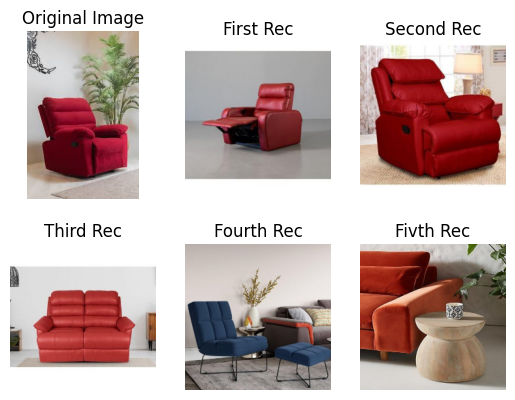

In [55]:
fig, axs = plt.subplots(2, 3)
# Display the images in the subplots
axs[0, 0].imshow(cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('First Rec')
axs[0, 2].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
axs[0, 2].axis('off')
axs[0, 2].set_title('Second Rec')
axs[1, 0].imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Third Rec')
axs[1, 1].imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Fourth Rec')
axs[1, 2].imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))
axs[1, 2].axis('off')
axs[1, 2].set_title('Fivth Rec')

# Show the plot
plt.show()


1/1 [==============================] - 0s 53ms/step


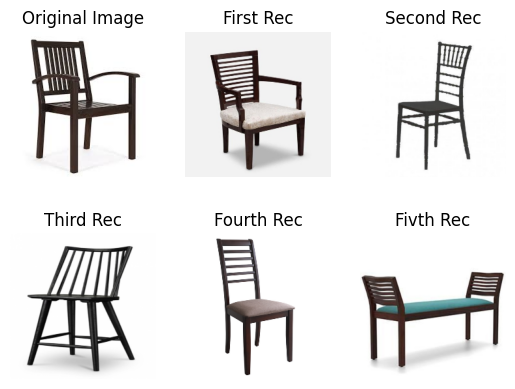

In [59]:

def get_best_matched(img_path):
  test_norm = extracted_features(img_path, model)
  distance, indices = neighbors.kneighbors(test_norm)

  images = []
  org_img = cv2.imread(img_path)
  for file in indices[0][:5]:
    #print(filename[file])
    img = cv2.imread(filename[file])
    images.append(img)

  fig, axs = plt.subplots(2, 3)
  # Display the images in the subplots
  axs[0, 0].imshow(cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB))
  axs[0, 0].axis('off')
  axs[0, 0].set_title('Original Image')
  axs[0, 1].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
  axs[0, 1].axis('off')
  axs[0, 1].set_title('First Rec')
  axs[0, 2].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
  axs[0, 2].axis('off')
  axs[0, 2].set_title('Second Rec')
  axs[1, 0].imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
  axs[1, 0].axis('off')
  axs[1, 0].set_title('Third Rec')
  axs[1, 1].imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
  axs[1, 1].axis('off')
  axs[1, 1].set_title('Fourth Rec')
  axs[1, 2].imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))
  axs[1, 2].axis('off')
  axs[1, 2].set_title('Fivth Rec')

  # Show the plot
  plt.show()


get_best_matched("/content/2.jpg")

1/1 [==============================] - 0s 56ms/step


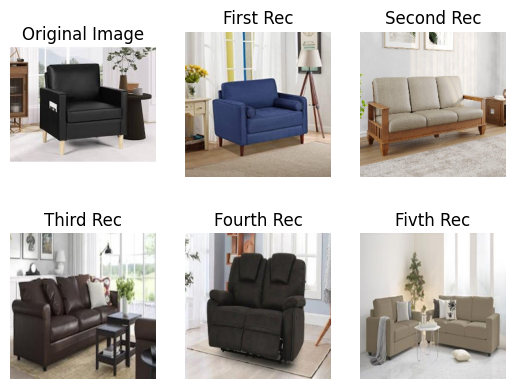

In [60]:
get_best_matched("/content/3.jpg")